# 数据分析

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import xgboost as xgb
from time import time
import missingno as msno

In [17]:
#read data
train = pd.read_csv('train.csv',parse_dates=[2])
test = pd.read_csv('test.csv',parse_dates=[3])
store = pd.read_csv('store.csv')

In [3]:
#check train_set
train.head().append(train.tail())

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [4]:
#查看测试集
test.head().append(test.tail())

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
0          1      1          4 2015-09-17   1.0      1            0   
1          2      3          4 2015-09-17   1.0      1            0   
2          3      7          4 2015-09-17   1.0      1            0   
3          4      8          4 2015-09-17   1.0      1            0   
4          5      9          4 2015-09-17   1.0      1            0   
41083  41084   1111          6 2015-08-01   1.0      0            0   
41084  41085   1112          6 2015-08-01   1.0      0            0   
41085  41086   1113          6 2015-08-01   1.0      0            0   
41086  41087   1114          6 2015-08-01   1.0      0            0   
41087  41088   1115          6 2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1

In [5]:
#查看店铺信息
store.head().append(store.tail())

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

# 缺失值处理

In [6]:
#查看数据缺失
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [7]:
#缺失数据分析
test[pd.isnull(test.Open)]

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
479      480    622          4 2015-09-17   NaN      1            0   
1335    1336    622          3 2015-09-16   NaN      1            0   
2191    2192    622          2 2015-09-15   NaN      1            0   
3047    3048    622          1 2015-09-14   NaN      1            0   
4759    4760    622          6 2015-09-12   NaN      0            0   
5615    5616    622          5 2015-09-11   NaN      0            0   
6471    6472    622          4 2015-09-10   NaN      0            0   
7327    7328    622          3 2015-09-09   NaN      0            0   
8183    8184    622          2 2015-09-08   NaN      0            0   
9039    9040    622          1 2015-09-07   NaN      0            0   
10751  10752    622          6 2015-09-05   NaN      0            0   

       SchoolHoliday  
479                0  
1335               0  
2191               0  
3047               0  
4759               0  
5615               0  
6471               0  
7327               0  
8183               0  
9039               0  
10751              0

In [8]:
#查看是否Promo2系列的缺失是否是因为没有参加促销
NoPW = store[pd.isnull(store.Promo2SinceWeek)]
NoPW[NoPW.Promo2 != 0].shape

(0, 10)

In [9]:
#缺失值处理
#我们将test中的open数据补为1，即营业状态
test.fillna(1, inplace=True)

#store中的缺失数据大多与竞争对手和促销有关，在实验中我们发现竞争对手信息的中值填充效果并不好，所以这里统一采用0填充
store.fillna(0, inplace=True)

In [10]:
#查看是否还存在缺失值
display(train.isnull().sum(),test.isnull().sum(),store.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [11]:
#因为销售额为0的记录不计入评分，所以只采用店铺为开，且销售额大于0的数据进行训练
train = train[train["Open"] != 0]
train = train[train["Sales"] > 0]

# 可视化探索

Text(0.5,0.98,'Fig. The box plot of Sales and Customers')

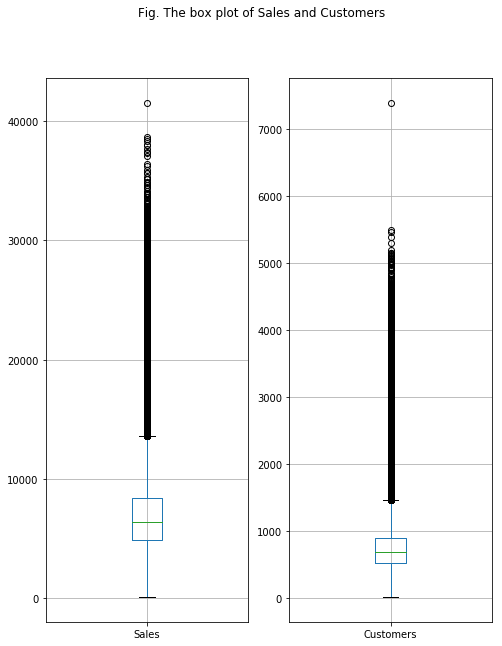

In [12]:
plt.figure(figsize=(8,10))
plt.subplot(1,2,1)
train[['Sales']].boxplot()
plt.subplot(1,2,2)
train[['Customers']].boxplot()
plt.suptitle('Fig. The box plot of Sales and Customers')

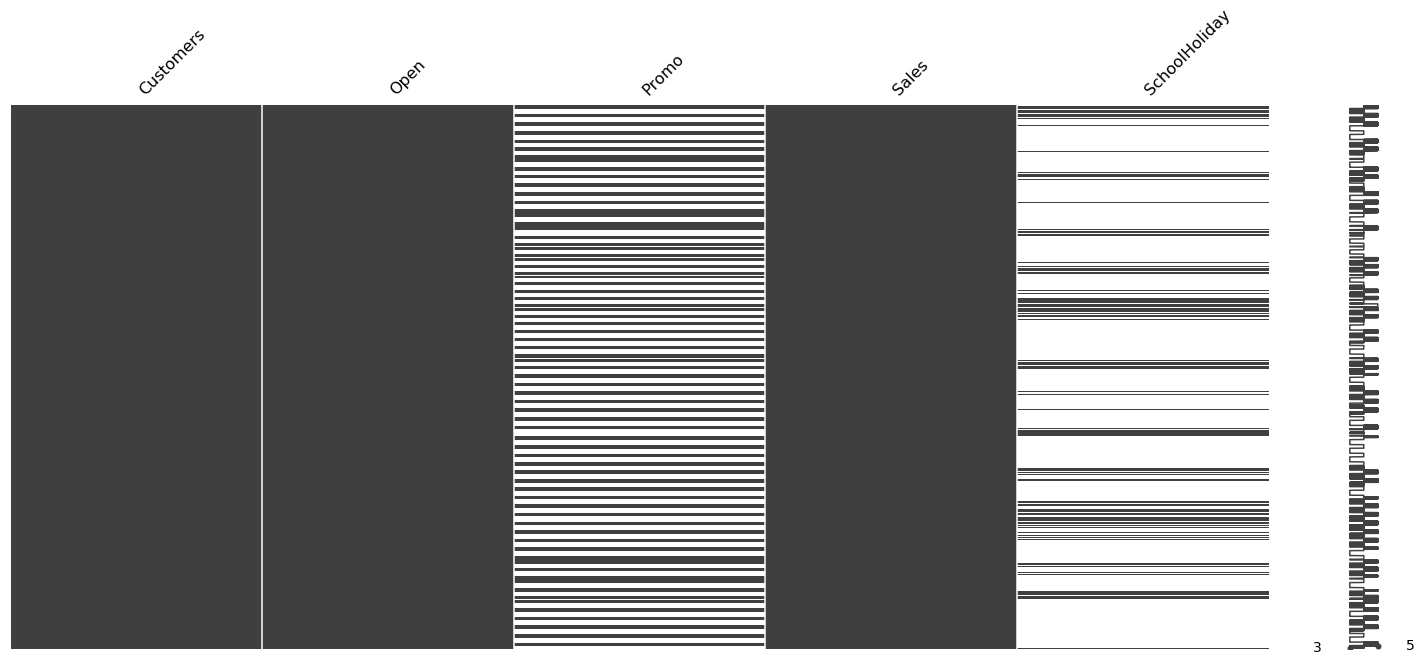

In [13]:
ts = train.Sales.values.tolist()
null_pattern = train[['Customers', 'Open', 'Promo', 'Sales', 'SchoolHoliday']].replace({False: None})
msno.matrix(null_pattern.set_index(train.Date.values) , freq='BQ')

In [18]:
train['SalesLog'] = np.log1p(train['Sales'])

Text(0.5, 0.98, 'Fig. The distribution of Sales and SalesLog')

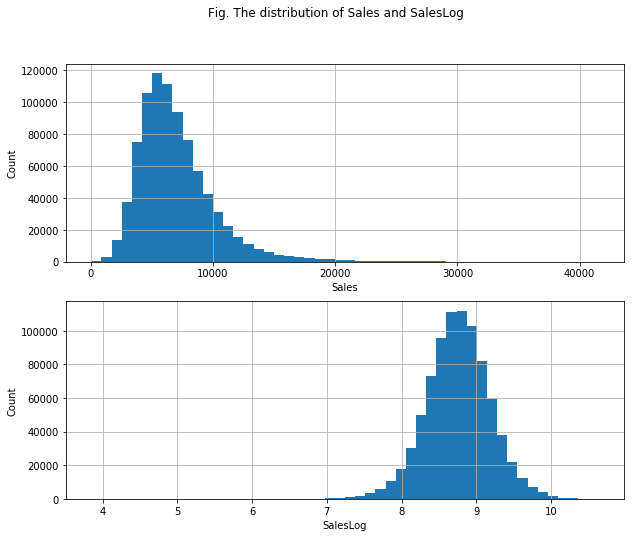

In [19]:
plt.figure(figsize=(10,8))
day = train.loc[(train['Open'] == 1)]
plt.subplot(2,1,1)
ax1 = day.loc[day.Sales > 0, 'Sales'].hist(bins = 50)
ax1.set_ylabel('Count')
ax1.set_xlabel('Sales')
plt.subplot(2,1,2)
ax2 = day.loc[day.Sales > 0, 'SalesLog'].hist(bins = 50)
ax2.set_ylabel('Count')
ax2.set_xlabel('SalesLog')
plt.suptitle('Fig. The distribution of Sales and SalesLog')

Text(0,0.5,'Customers')

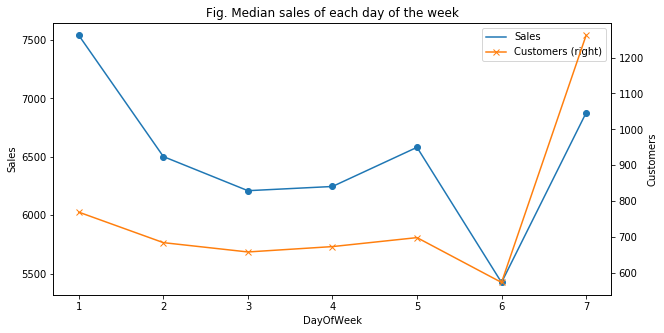

In [14]:
#每天的平均销量图
day = train.loc[(train['Open'] == 1)]
day_sales = day.groupby('DayOfWeek')['Sales'].median()
day_customers = day.groupby('DayOfWeek')['Customers'].median()

figure, axis1 = plt.subplots(1, 1, sharex=True, figsize=(10, 5))

ax1 = day_sales.plot(legend=True, ax=axis1, marker='o', title="Fig. Median sales of each day of the week")
ax1.set_xticks(day_sales.index)
ax1.set_ylabel('Sales')
tmp = ax1.set_xticklabels(day_sales.index.tolist(), rotation=90)

ax2 = day_customers.plot(legend=True, ax=axis1, marker='x', secondary_y=True)
ax2.set_ylabel('Customers')

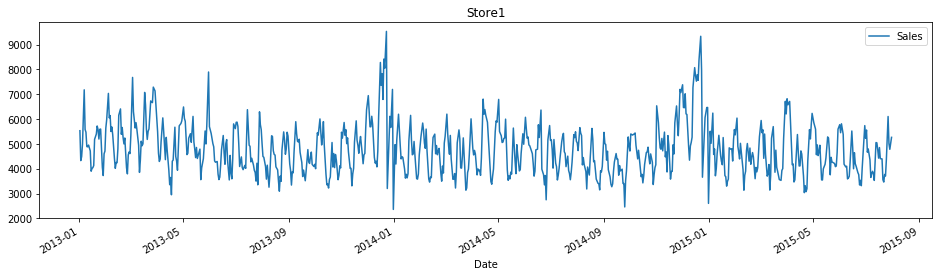

In [15]:
#分析店铺每年的销量随时间的变化
strain = train[train.Sales>0]
strain.loc[strain['Store']==1 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store1',figsize=(16,4))

In [16]:
#合并store信息
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

In [17]:
#留出最近的6周数据作为hold_out数据集进行测试
train = train.sort_values(['Date'],ascending = False)
ho_test = train[:6*7*1115]
ho_train = train[6*7*1115:]

In [18]:
ho_train.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
138703    186          6 2015-06-13   3966        393     1      0   
638783    846          6 2015-06-13   5822        517     1      0   
37134      50          6 2015-06-13   4303        393     1      0   
529191    701          6 2015-06-13   5626        616     1      0   
429901    569          6 2015-06-13   3091        455     1      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
138703            0              0         a          a                290.0   
638783            0              0         a          c               8860.0   
37134             0              0         d          a               6260.0   
529191            0              0         d          a               1450.0   
429901            0              0         a          a               1340.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
138703                       10.0                    2011.0       1   
638783                        4.0                    2004.0       1   
37134                        11.0                    2009.0       0   
529191                        3.0                    2012.0       1   
429901                        9.0                    2006.0       0   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
138703             40.0           2014.0  Jan,Apr,Jul,Oct  
638783             37.0           2009.0  Jan,Apr,Jul,Oct  
37134               0.0              0.0                0  
529191             14.0           2011.0  Jan,Apr,Jul,Oct  
429901              0.0              0.0                0

In [19]:
#因为销售额为0的记录不计入评分，所以只采用店铺为开，且销售额大于0的数据进行训练
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]

In [20]:
ho_train.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
138703    186          6 2015-06-13   3966        393     1      0   
638783    846          6 2015-06-13   5822        517     1      0   
37134      50          6 2015-06-13   4303        393     1      0   
529191    701          6 2015-06-13   5626        616     1      0   
429901    569          6 2015-06-13   3091        455     1      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
138703            0              0         a          a                290.0   
638783            0              0         a          c               8860.0   
37134             0              0         d          a               6260.0   
529191            0              0         d          a               1450.0   
429901            0              0         a          a               1340.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
138703                       10.0                    2011.0       1   
638783                        4.0                    2004.0       1   
37134                        11.0                    2009.0       0   
529191                        3.0                    2012.0       1   
429901                        9.0                    2006.0       0   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
138703             40.0           2014.0  Jan,Apr,Jul,Oct  
638783             37.0           2009.0  Jan,Apr,Jul,Oct  
37134               0.0              0.0                0  
529191             14.0           2011.0  Jan,Apr,Jul,Oct  
429901              0.0              0.0                0

In [21]:
#特征处理与转化，定义特征处理函数
def features_create(data):
    
    #将存在其他字符表示分类的特征转化为数字
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    #将时间特征进行拆分和转化，并加入'WeekOfYear'特征
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    #新增'CompetitionOpen'和'PromoOpen'特征,计算某天某店铺的竞争对手已营业时间和店铺已促销时间，用月为单位表示
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    #将'PromoInterval'特征转化为'IsPromoMonth'特征,表示某天某店铺是否处于促销月，1表示是，0表示否
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
 
    return data

In [22]:
#对训练，保留以及测试数据集进行特征转化
features_create(ho_train)
features_create(ho_test)
features_create(test)
print('Features creation finished')

Features creation finished


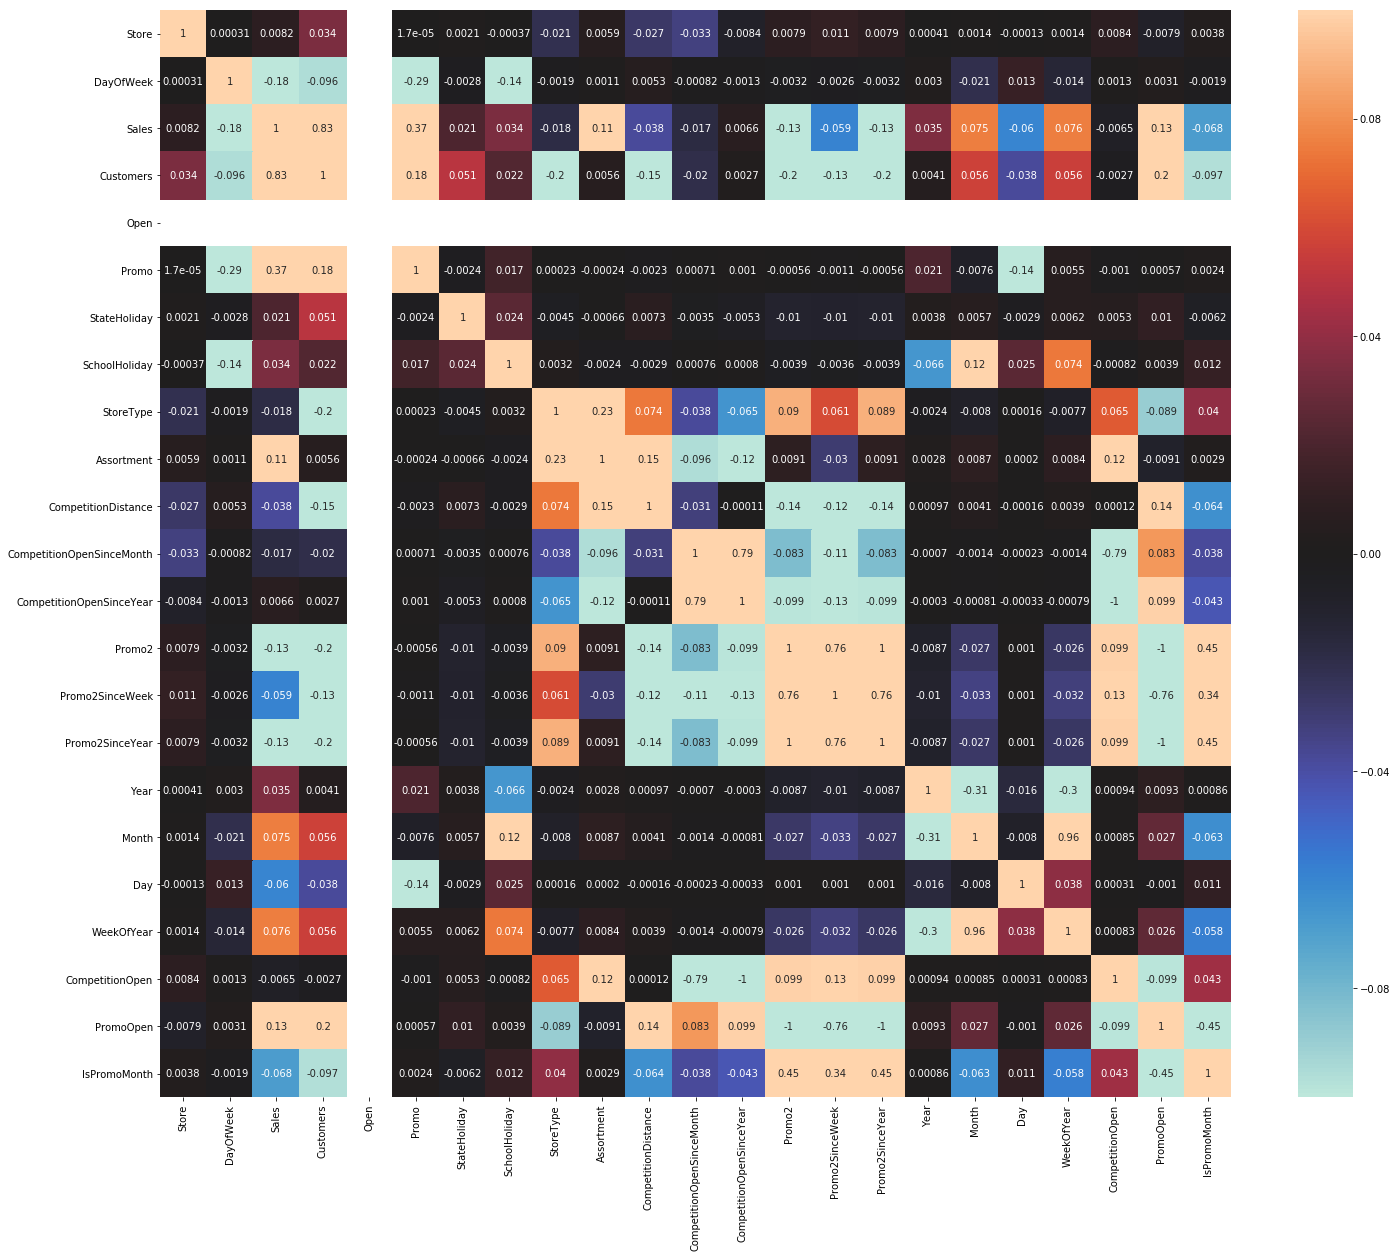

In [23]:
#分析训练数据集中特征相关性以及特征与'Sales'标签相关性
plt.subplots(figsize=(24,20))
sns.heatmap(ho_train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

In [24]:
#删掉训练和保留数据集中不需要的特征
ho_train.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)

In [25]:
#拆分特征与标签，并将标签取对数处理
ho_xtrain = ho_train.drop(['Sales'],axis=1 )
ho_ytrain = np.log1p(ho_train.Sales)
ho_xtest = ho_test.drop(['Sales'],axis=1 )
ho_ytest = np.log1p(ho_test.Sales)

In [26]:
ho_xtrain.head()

Store  DayOfWeek  Promo  StateHoliday  SchoolHoliday  StoreType  \
138703    186          5      0             0              0          1   
638783    846          5      0             0              0          1   
37134      50          5      0             0              0          4   
529191    701          5      0             0              0          4   
429901    569          5      0             0              0          1   

        Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
138703           1                290.0                       10.0   
638783           3               8860.0                        4.0   
37134            1               6260.0                       11.0   
529191           1               1450.0                        3.0   
429901           1               1340.0                        9.0   

        CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
138703                    2011.0       1             40.0           2014.0   
638783                    2004.0       1             37.0           2009.0   
37134                     2009.0       0              0.0              0.0   
529191                    2012.0       1             14.0           2011.0   
429901                    2006.0       0              0.0              0.0   

        Year  Month  Day  WeekOfYear  CompetitionOpen  PromoOpen  IsPromoMonth  
138703  2015      6   13          24             44.0       8.00             0  
638783  2015      6   13          24            134.0      68.75             0  
37134   2015      6   13          24             67.0   24186.00             0  
529191  2015      6   13          24             39.0      50.50             0  
429901  2015      6   13          24            105.0   24186.00             0

In [27]:
#删掉测试集中对应的特征与训练集保持一致
xtest =test.drop(['Id','Date','Open','PromoInterval','monthStr'],axis = 1)

In [28]:
#定义评价函数rmspe
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
 
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [29]:
#初始模型构建
#参数设定
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 10
          }
num_boost_round = 6000

In [30]:
dtrain = xgb.DMatrix(ho_xtrain, ho_ytrain)
dvalid = xgb.DMatrix(ho_xtest, ho_ytest)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [31]:
#模型训练
print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
  early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))


Train a XGBoost model
[0]	train-rmse:8.01954	eval-rmse:8.04788	train-rmspe:0.999808	eval-rmspe:0.999815
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.77944	eval-rmse:7.80736	train-rmspe:0.999711	eval-rmspe:0.99972
[2]	train-rmse:7.54655	eval-rmse:7.57416	train-rmspe:0.99959	eval-rmspe:0.999603
[3]	train-rmse:7.32064	eval-rmse:7.34796	train-rmspe:0.999444	eval-rmspe:0.999461
[4]	train-rmse:7.10151	eval-rmse:7.1285	train-rmspe:0.999267	eval-rmspe:0.999289
[5]	train-rmse:6.88898	eval-rmse:6.9157	train-rmspe:0.999053	eval-rmspe:0.999082
[6]	train-rmse:6.68282	eval-rmse:6.70951	train-rmspe:0.998799	eval-rmspe:0.998836
[7]	train-rmse:6.4829	eval-rmse:6.50886	train-rmspe:0.998497	eval-rmspe:0.998542
[8]	train-rmse:6.28902	eval-rmse:6.31472	train-rmspe:0.99814	eval-rmspe:0.998195
[9]	train-rmse:6.10088	eval-rmse:6.12667	train-rmspe:0.997724	eval-rmspe:0.997791
[10]	train-rmse:5.

[97]	train-rmse:0.487755	eval-rmse:0.484511	train-rmspe:0.378265	eval-rmspe:0.363891
[98]	train-rmse:0.476638	eval-rmse:0.473599	train-rmspe:0.372257	eval-rmspe:0.357462
[99]	train-rmse:0.466121	eval-rmse:0.462946	train-rmspe:0.366528	eval-rmspe:0.351183
[100]	train-rmse:0.455845	eval-rmse:0.452718	train-rmspe:0.360874	eval-rmspe:0.345134
[101]	train-rmse:0.445558	eval-rmse:0.442576	train-rmspe:0.355193	eval-rmspe:0.339103
[102]	train-rmse:0.436145	eval-rmse:0.433228	train-rmspe:0.350004	eval-rmspe:0.33352
[103]	train-rmse:0.427167	eval-rmse:0.424396	train-rmspe:0.34514	eval-rmspe:0.328241
[104]	train-rmse:0.418386	eval-rmse:0.415818	train-rmspe:0.340379	eval-rmspe:0.32314
[105]	train-rmse:0.41003	eval-rmse:0.407651	train-rmspe:0.335917	eval-rmspe:0.31829
[106]	train-rmse:0.401743	eval-rmse:0.398997	train-rmspe:0.33149	eval-rmspe:0.313121
[107]	train-rmse:0.393693	eval-rmse:0.391175	train-rmspe:0.327186	eval-rmspe:0.308457
[108]	train-rmse:0.38612	eval-rmse:0.383765	train-rmspe:0.32318

[193]	train-rmse:0.199133	eval-rmse:0.210418	train-rmspe:0.244934	eval-rmspe:0.222005
[194]	train-rmse:0.19821	eval-rmse:0.20974	train-rmspe:0.244321	eval-rmspe:0.221509
[195]	train-rmse:0.197163	eval-rmse:0.20878	train-rmspe:0.243487	eval-rmspe:0.220577
[196]	train-rmse:0.196717	eval-rmse:0.208586	train-rmspe:0.243287	eval-rmspe:0.220759
[197]	train-rmse:0.196088	eval-rmse:0.208014	train-rmspe:0.242944	eval-rmspe:0.220355
[198]	train-rmse:0.195558	eval-rmse:0.207564	train-rmspe:0.242663	eval-rmspe:0.219999
[199]	train-rmse:0.195321	eval-rmse:0.207467	train-rmspe:0.242595	eval-rmspe:0.220128
[200]	train-rmse:0.194836	eval-rmse:0.207008	train-rmspe:0.242324	eval-rmspe:0.219757
[201]	train-rmse:0.194557	eval-rmse:0.206876	train-rmspe:0.242245	eval-rmspe:0.219796
[202]	train-rmse:0.194358	eval-rmse:0.206732	train-rmspe:0.241279	eval-rmspe:0.219814
[203]	train-rmse:0.193439	eval-rmse:0.205941	train-rmspe:0.240577	eval-rmspe:0.219091
[204]	train-rmse:0.193234	eval-rmse:0.205807	train-rmspe:

[289]	train-rmse:0.158126	eval-rmse:0.175546	train-rmspe:0.205051	eval-rmspe:0.190291
[290]	train-rmse:0.157498	eval-rmse:0.174987	train-rmspe:0.204453	eval-rmspe:0.189667
[291]	train-rmse:0.157017	eval-rmse:0.174552	train-rmspe:0.20394	eval-rmspe:0.189183
[292]	train-rmse:0.156661	eval-rmse:0.174238	train-rmspe:0.203423	eval-rmspe:0.188836
[293]	train-rmse:0.156192	eval-rmse:0.17382	train-rmspe:0.203002	eval-rmspe:0.188386
[294]	train-rmse:0.155958	eval-rmse:0.173612	train-rmspe:0.202782	eval-rmspe:0.188163
[295]	train-rmse:0.155745	eval-rmse:0.173412	train-rmspe:0.202543	eval-rmspe:0.18795
[296]	train-rmse:0.155562	eval-rmse:0.17325	train-rmspe:0.201777	eval-rmspe:0.187756
[297]	train-rmse:0.155323	eval-rmse:0.173042	train-rmspe:0.20149	eval-rmspe:0.18755
[298]	train-rmse:0.154926	eval-rmse:0.172715	train-rmspe:0.201187	eval-rmspe:0.187217
[299]	train-rmse:0.154689	eval-rmse:0.172502	train-rmspe:0.200957	eval-rmspe:0.186977
[300]	train-rmse:0.154271	eval-rmse:0.172122	train-rmspe:0.2

[385]	train-rmse:0.132976	eval-rmse:0.153425	train-rmspe:0.175133	eval-rmspe:0.166108
[386]	train-rmse:0.132842	eval-rmse:0.153327	train-rmspe:0.175012	eval-rmspe:0.165992
[387]	train-rmse:0.132725	eval-rmse:0.153221	train-rmspe:0.174911	eval-rmspe:0.16586
[388]	train-rmse:0.132493	eval-rmse:0.153028	train-rmspe:0.174709	eval-rmspe:0.165644
[389]	train-rmse:0.132293	eval-rmse:0.15287	train-rmspe:0.174476	eval-rmspe:0.165485
[390]	train-rmse:0.132132	eval-rmse:0.152735	train-rmspe:0.174334	eval-rmspe:0.165345
[391]	train-rmse:0.131994	eval-rmse:0.152633	train-rmspe:0.174198	eval-rmspe:0.165234
[392]	train-rmse:0.131903	eval-rmse:0.152695	train-rmspe:0.174074	eval-rmspe:0.165344
[393]	train-rmse:0.131794	eval-rmse:0.152597	train-rmspe:0.173983	eval-rmspe:0.165238
[394]	train-rmse:0.131727	eval-rmse:0.152529	train-rmspe:0.173925	eval-rmspe:0.165163
[395]	train-rmse:0.131562	eval-rmse:0.152464	train-rmspe:0.173805	eval-rmspe:0.165141
[396]	train-rmse:0.131346	eval-rmse:0.152305	train-rmspe

[481]	train-rmse:0.119975	eval-rmse:0.143147	train-rmspe:0.161035	eval-rmspe:0.155017
[482]	train-rmse:0.119816	eval-rmse:0.143018	train-rmspe:0.160904	eval-rmspe:0.154865
[483]	train-rmse:0.119642	eval-rmse:0.142877	train-rmspe:0.16068	eval-rmspe:0.154657
[484]	train-rmse:0.11952	eval-rmse:0.142773	train-rmspe:0.160578	eval-rmspe:0.154537
[485]	train-rmse:0.119478	eval-rmse:0.14277	train-rmspe:0.160528	eval-rmspe:0.154549
[486]	train-rmse:0.119368	eval-rmse:0.142673	train-rmspe:0.160426	eval-rmspe:0.154446
[487]	train-rmse:0.119203	eval-rmse:0.142537	train-rmspe:0.160254	eval-rmspe:0.154296
[488]	train-rmse:0.11913	eval-rmse:0.142481	train-rmspe:0.160192	eval-rmspe:0.154234
[489]	train-rmse:0.119054	eval-rmse:0.142456	train-rmspe:0.160107	eval-rmspe:0.154214
[490]	train-rmse:0.119026	eval-rmse:0.142458	train-rmspe:0.160045	eval-rmspe:0.154226
[491]	train-rmse:0.118898	eval-rmse:0.142371	train-rmspe:0.159931	eval-rmspe:0.154139
[492]	train-rmse:0.11868	eval-rmse:0.142198	train-rmspe:0.

[577]	train-rmse:0.110625	eval-rmse:0.135737	train-rmspe:0.146326	eval-rmspe:0.146567
[578]	train-rmse:0.110598	eval-rmse:0.135722	train-rmspe:0.145563	eval-rmspe:0.14655
[579]	train-rmse:0.110496	eval-rmse:0.135596	train-rmspe:0.145471	eval-rmspe:0.146406
[580]	train-rmse:0.110385	eval-rmse:0.135525	train-rmspe:0.145371	eval-rmspe:0.146321
[581]	train-rmse:0.110335	eval-rmse:0.135476	train-rmspe:0.14542	eval-rmspe:0.146273
[582]	train-rmse:0.110126	eval-rmse:0.135311	train-rmspe:0.145225	eval-rmspe:0.146082
[583]	train-rmse:0.110072	eval-rmse:0.135269	train-rmspe:0.14517	eval-rmspe:0.146026
[584]	train-rmse:0.109991	eval-rmse:0.135219	train-rmspe:0.145098	eval-rmspe:0.145974
[585]	train-rmse:0.109836	eval-rmse:0.135088	train-rmspe:0.144945	eval-rmspe:0.145829
[586]	train-rmse:0.109776	eval-rmse:0.135005	train-rmspe:0.144876	eval-rmspe:0.145735
[587]	train-rmse:0.109744	eval-rmse:0.134983	train-rmspe:0.144849	eval-rmspe:0.145723
[588]	train-rmse:0.109689	eval-rmse:0.134925	train-rmspe:

[673]	train-rmse:0.10422	eval-rmse:0.130871	train-rmspe:0.135245	eval-rmspe:0.141123
[674]	train-rmse:0.104179	eval-rmse:0.130837	train-rmspe:0.135208	eval-rmspe:0.141086
[675]	train-rmse:0.104132	eval-rmse:0.130799	train-rmspe:0.135157	eval-rmspe:0.14103
[676]	train-rmse:0.104079	eval-rmse:0.130777	train-rmspe:0.135109	eval-rmspe:0.141015
[677]	train-rmse:0.104046	eval-rmse:0.130769	train-rmspe:0.135069	eval-rmspe:0.141021
[678]	train-rmse:0.104001	eval-rmse:0.130748	train-rmspe:0.13503	eval-rmspe:0.140997
[679]	train-rmse:0.103964	eval-rmse:0.130718	train-rmspe:0.134998	eval-rmspe:0.140967
[680]	train-rmse:0.103922	eval-rmse:0.130693	train-rmspe:0.134949	eval-rmspe:0.140945
[681]	train-rmse:0.10384	eval-rmse:0.130633	train-rmspe:0.134873	eval-rmspe:0.140877
[682]	train-rmse:0.103805	eval-rmse:0.130614	train-rmspe:0.134837	eval-rmspe:0.140858
[683]	train-rmse:0.103749	eval-rmse:0.130583	train-rmspe:0.134789	eval-rmspe:0.140825
[684]	train-rmse:0.103662	eval-rmse:0.130534	train-rmspe:0

[769]	train-rmse:0.099254	eval-rmse:0.127675	train-rmspe:0.130041	eval-rmspe:0.137608
[770]	train-rmse:0.099201	eval-rmse:0.12764	train-rmspe:0.12999	eval-rmspe:0.13757
[771]	train-rmse:0.099181	eval-rmse:0.127615	train-rmspe:0.129975	eval-rmspe:0.137533
[772]	train-rmse:0.099153	eval-rmse:0.127604	train-rmspe:0.129953	eval-rmspe:0.137521
[773]	train-rmse:0.099096	eval-rmse:0.12757	train-rmspe:0.12988	eval-rmspe:0.137484
[774]	train-rmse:0.099026	eval-rmse:0.127519	train-rmspe:0.129821	eval-rmspe:0.13743
[775]	train-rmse:0.098989	eval-rmse:0.127502	train-rmspe:0.129775	eval-rmspe:0.137409
[776]	train-rmse:0.098973	eval-rmse:0.127494	train-rmspe:0.12962	eval-rmspe:0.1374
[777]	train-rmse:0.098944	eval-rmse:0.127476	train-rmspe:0.129349	eval-rmspe:0.137383
[778]	train-rmse:0.098892	eval-rmse:0.127443	train-rmspe:0.129304	eval-rmspe:0.137349
[779]	train-rmse:0.098873	eval-rmse:0.127415	train-rmspe:0.129194	eval-rmspe:0.137314
[780]	train-rmse:0.09884	eval-rmse:0.127379	train-rmspe:0.12911

[865]	train-rmse:0.095388	eval-rmse:0.125159	train-rmspe:0.123694	eval-rmspe:0.134611
[866]	train-rmse:0.095351	eval-rmse:0.125136	train-rmspe:0.123659	eval-rmspe:0.134586
[867]	train-rmse:0.095301	eval-rmse:0.125106	train-rmspe:0.123591	eval-rmspe:0.134553
[868]	train-rmse:0.095266	eval-rmse:0.125098	train-rmspe:0.123547	eval-rmspe:0.134557
[869]	train-rmse:0.095237	eval-rmse:0.125056	train-rmspe:0.123494	eval-rmspe:0.134505
[870]	train-rmse:0.095199	eval-rmse:0.125064	train-rmspe:0.123436	eval-rmspe:0.134522
[871]	train-rmse:0.095177	eval-rmse:0.125049	train-rmspe:0.123421	eval-rmspe:0.134502
[872]	train-rmse:0.095118	eval-rmse:0.125012	train-rmspe:0.123365	eval-rmspe:0.134457
[873]	train-rmse:0.095074	eval-rmse:0.124983	train-rmspe:0.123315	eval-rmspe:0.134429
[874]	train-rmse:0.095045	eval-rmse:0.124971	train-rmspe:0.123206	eval-rmspe:0.134417
[875]	train-rmse:0.095003	eval-rmse:0.124948	train-rmspe:0.12315	eval-rmspe:0.134393
[876]	train-rmse:0.094955	eval-rmse:0.124923	train-rmsp

[961]	train-rmse:0.09227	eval-rmse:0.123494	train-rmspe:0.118622	eval-rmspe:0.132709
[962]	train-rmse:0.09225	eval-rmse:0.123489	train-rmspe:0.118604	eval-rmspe:0.132704
[963]	train-rmse:0.092221	eval-rmse:0.12347	train-rmspe:0.11857	eval-rmspe:0.132676
[964]	train-rmse:0.092196	eval-rmse:0.12345	train-rmspe:0.118547	eval-rmspe:0.132647
[965]	train-rmse:0.092155	eval-rmse:0.123421	train-rmspe:0.118516	eval-rmspe:0.132614
[966]	train-rmse:0.092143	eval-rmse:0.123411	train-rmspe:0.118501	eval-rmspe:0.132603
[967]	train-rmse:0.092106	eval-rmse:0.123396	train-rmspe:0.118465	eval-rmspe:0.132586
[968]	train-rmse:0.092098	eval-rmse:0.123386	train-rmspe:0.118462	eval-rmspe:0.132571
[969]	train-rmse:0.092062	eval-rmse:0.123358	train-rmspe:0.118425	eval-rmspe:0.13255
[970]	train-rmse:0.092026	eval-rmse:0.123337	train-rmspe:0.118395	eval-rmspe:0.132528
[971]	train-rmse:0.092004	eval-rmse:0.123333	train-rmspe:0.117907	eval-rmspe:0.132526
[972]	train-rmse:0.091963	eval-rmse:0.123308	train-rmspe:0.1

[1057]	train-rmse:0.089662	eval-rmse:0.122389	train-rmspe:0.112648	eval-rmspe:0.131483
[1058]	train-rmse:0.089627	eval-rmse:0.122374	train-rmspe:0.112616	eval-rmspe:0.131467
[1059]	train-rmse:0.089601	eval-rmse:0.122368	train-rmspe:0.112595	eval-rmspe:0.131462
[1060]	train-rmse:0.089573	eval-rmse:0.122351	train-rmspe:0.112573	eval-rmspe:0.131444
[1061]	train-rmse:0.089556	eval-rmse:0.122335	train-rmspe:0.112556	eval-rmspe:0.131422
[1062]	train-rmse:0.089529	eval-rmse:0.122324	train-rmspe:0.11253	eval-rmspe:0.13141
[1063]	train-rmse:0.089503	eval-rmse:0.12231	train-rmspe:0.112092	eval-rmspe:0.131396
[1064]	train-rmse:0.089476	eval-rmse:0.122301	train-rmspe:0.112066	eval-rmspe:0.131387
[1065]	train-rmse:0.089455	eval-rmse:0.122292	train-rmspe:0.112039	eval-rmspe:0.131379
[1066]	train-rmse:0.089424	eval-rmse:0.122274	train-rmspe:0.11201	eval-rmspe:0.131359
[1067]	train-rmse:0.089376	eval-rmse:0.122245	train-rmspe:0.111952	eval-rmspe:0.131332
[1068]	train-rmse:0.089364	eval-rmse:0.12224	tr

[1152]	train-rmse:0.08743	eval-rmse:0.12141	train-rmspe:0.107726	eval-rmspe:0.130454
[1153]	train-rmse:0.087415	eval-rmse:0.1214	train-rmspe:0.107714	eval-rmspe:0.130445
[1154]	train-rmse:0.087392	eval-rmse:0.121388	train-rmspe:0.10769	eval-rmspe:0.130432
[1155]	train-rmse:0.08737	eval-rmse:0.121373	train-rmspe:0.10767	eval-rmspe:0.130423
[1156]	train-rmse:0.087356	eval-rmse:0.121357	train-rmspe:0.107656	eval-rmspe:0.130403
[1157]	train-rmse:0.087337	eval-rmse:0.121352	train-rmspe:0.107638	eval-rmspe:0.130397
[1158]	train-rmse:0.087312	eval-rmse:0.121341	train-rmspe:0.107615	eval-rmspe:0.130386
[1159]	train-rmse:0.087295	eval-rmse:0.12134	train-rmspe:0.107593	eval-rmspe:0.130387
[1160]	train-rmse:0.087275	eval-rmse:0.121328	train-rmspe:0.107568	eval-rmspe:0.130357
[1161]	train-rmse:0.087261	eval-rmse:0.12132	train-rmspe:0.107432	eval-rmspe:0.130349
[1162]	train-rmse:0.087239	eval-rmse:0.121307	train-rmspe:0.107414	eval-rmspe:0.130336
[1163]	train-rmse:0.087232	eval-rmse:0.121306	train-

[1247]	train-rmse:0.085448	eval-rmse:0.120571	train-rmspe:0.104758	eval-rmspe:0.129557
[1248]	train-rmse:0.085429	eval-rmse:0.120564	train-rmspe:0.10474	eval-rmspe:0.12955
[1249]	train-rmse:0.085418	eval-rmse:0.120564	train-rmspe:0.104729	eval-rmspe:0.12955
[1250]	train-rmse:0.085404	eval-rmse:0.120559	train-rmspe:0.10471	eval-rmspe:0.129545
[1251]	train-rmse:0.085396	eval-rmse:0.120559	train-rmspe:0.104702	eval-rmspe:0.129539
[1252]	train-rmse:0.085373	eval-rmse:0.120549	train-rmspe:0.104682	eval-rmspe:0.129526
[1253]	train-rmse:0.085358	eval-rmse:0.120545	train-rmspe:0.104666	eval-rmspe:0.129521
[1254]	train-rmse:0.085336	eval-rmse:0.120553	train-rmspe:0.104628	eval-rmspe:0.129531
[1255]	train-rmse:0.085326	eval-rmse:0.120553	train-rmspe:0.104618	eval-rmspe:0.129532
[1256]	train-rmse:0.085304	eval-rmse:0.120546	train-rmspe:0.104593	eval-rmspe:0.129524
[1257]	train-rmse:0.08529	eval-rmse:0.120542	train-rmspe:0.104575	eval-rmspe:0.129518
[1258]	train-rmse:0.085262	eval-rmse:0.120546	tr

[1342]	train-rmse:0.083657	eval-rmse:0.119916	train-rmspe:0.100554	eval-rmspe:0.128832
[1343]	train-rmse:0.083639	eval-rmse:0.119887	train-rmspe:0.100521	eval-rmspe:0.128805
[1344]	train-rmse:0.083625	eval-rmse:0.119883	train-rmspe:0.10051	eval-rmspe:0.128803
[1345]	train-rmse:0.083607	eval-rmse:0.119874	train-rmspe:0.100493	eval-rmspe:0.128794
[1346]	train-rmse:0.083598	eval-rmse:0.119868	train-rmspe:0.100484	eval-rmspe:0.128786
[1347]	train-rmse:0.083576	eval-rmse:0.119851	train-rmspe:0.100464	eval-rmspe:0.128769
[1348]	train-rmse:0.083556	eval-rmse:0.119837	train-rmspe:0.100444	eval-rmspe:0.128752
[1349]	train-rmse:0.083544	eval-rmse:0.119831	train-rmspe:0.10043	eval-rmspe:0.128743
[1350]	train-rmse:0.083514	eval-rmse:0.119829	train-rmspe:0.100392	eval-rmspe:0.128745
[1351]	train-rmse:0.0835	eval-rmse:0.119825	train-rmspe:0.100373	eval-rmspe:0.128741
[1352]	train-rmse:0.083486	eval-rmse:0.119822	train-rmspe:0.100358	eval-rmspe:0.128738
[1353]	train-rmse:0.083472	eval-rmse:0.119823	t

[1437]	train-rmse:0.082093	eval-rmse:0.119354	train-rmspe:0.097648	eval-rmspe:0.128177
[1438]	train-rmse:0.082075	eval-rmse:0.119352	train-rmspe:0.097454	eval-rmspe:0.128178
[1439]	train-rmse:0.082049	eval-rmse:0.119339	train-rmspe:0.097417	eval-rmspe:0.128167
[1440]	train-rmse:0.082037	eval-rmse:0.119334	train-rmspe:0.0974	eval-rmspe:0.128159
[1441]	train-rmse:0.082029	eval-rmse:0.119337	train-rmspe:0.097393	eval-rmspe:0.12816
[1442]	train-rmse:0.082015	eval-rmse:0.119335	train-rmspe:0.097379	eval-rmspe:0.12816
[1443]	train-rmse:0.082001	eval-rmse:0.11933	train-rmspe:0.097367	eval-rmspe:0.128154
[1444]	train-rmse:0.081989	eval-rmse:0.119352	train-rmspe:0.097354	eval-rmspe:0.128172
[1445]	train-rmse:0.081975	eval-rmse:0.119352	train-rmspe:0.097336	eval-rmspe:0.128173
[1446]	train-rmse:0.081951	eval-rmse:0.119341	train-rmspe:0.097301	eval-rmspe:0.128163
[1447]	train-rmse:0.08193	eval-rmse:0.119334	train-rmspe:0.097282	eval-rmspe:0.128159
[1448]	train-rmse:0.081912	eval-rmse:0.119327	tra

[1532]	train-rmse:0.080666	eval-rmse:0.119025	train-rmspe:0.095476	eval-rmspe:0.127822
[1533]	train-rmse:0.080646	eval-rmse:0.11901	train-rmspe:0.095453	eval-rmspe:0.127805
[1534]	train-rmse:0.080637	eval-rmse:0.119011	train-rmspe:0.095445	eval-rmspe:0.127807
[1535]	train-rmse:0.080622	eval-rmse:0.119027	train-rmspe:0.095423	eval-rmspe:0.127822
[1536]	train-rmse:0.080605	eval-rmse:0.119024	train-rmspe:0.095404	eval-rmspe:0.127819
[1537]	train-rmse:0.080589	eval-rmse:0.119018	train-rmspe:0.09539	eval-rmspe:0.127812
[1538]	train-rmse:0.080572	eval-rmse:0.119012	train-rmspe:0.095371	eval-rmspe:0.127805
[1539]	train-rmse:0.080556	eval-rmse:0.119011	train-rmspe:0.095353	eval-rmspe:0.127807
[1540]	train-rmse:0.080545	eval-rmse:0.119008	train-rmspe:0.095342	eval-rmspe:0.127804
[1541]	train-rmse:0.080528	eval-rmse:0.119001	train-rmspe:0.095319	eval-rmspe:0.127797
[1542]	train-rmse:0.08052	eval-rmse:0.118996	train-rmspe:0.095307	eval-rmspe:0.127791
[1543]	train-rmse:0.080503	eval-rmse:0.118985	

[1627]	train-rmse:0.07941	eval-rmse:0.118734	train-rmspe:0.093097	eval-rmspe:0.127506
[1628]	train-rmse:0.0794	eval-rmse:0.118731	train-rmspe:0.093087	eval-rmspe:0.127502
[1629]	train-rmse:0.079388	eval-rmse:0.118748	train-rmspe:0.093047	eval-rmspe:0.127524
[1630]	train-rmse:0.079376	eval-rmse:0.118744	train-rmspe:0.093032	eval-rmspe:0.127523
[1631]	train-rmse:0.07937	eval-rmse:0.118738	train-rmspe:0.093027	eval-rmspe:0.127517
[1632]	train-rmse:0.079358	eval-rmse:0.118732	train-rmspe:0.09301	eval-rmspe:0.127511
[1633]	train-rmse:0.079353	eval-rmse:0.11873	train-rmspe:0.093004	eval-rmspe:0.127509
[1634]	train-rmse:0.079348	eval-rmse:0.118729	train-rmspe:0.092996	eval-rmspe:0.127509
[1635]	train-rmse:0.079334	eval-rmse:0.118722	train-rmspe:0.092983	eval-rmspe:0.127499
[1636]	train-rmse:0.079326	eval-rmse:0.118725	train-rmspe:0.092976	eval-rmspe:0.127501
[1637]	train-rmse:0.079316	eval-rmse:0.118714	train-rmspe:0.092966	eval-rmspe:0.127486
[1638]	train-rmse:0.079305	eval-rmse:0.118719	tra

[1722]	train-rmse:0.078255	eval-rmse:0.118472	train-rmspe:0.090145	eval-rmspe:0.127247
[1723]	train-rmse:0.078243	eval-rmse:0.118472	train-rmspe:0.090132	eval-rmspe:0.127248
[1724]	train-rmse:0.078226	eval-rmse:0.118465	train-rmspe:0.090114	eval-rmspe:0.127241
[1725]	train-rmse:0.078222	eval-rmse:0.118467	train-rmspe:0.09011	eval-rmspe:0.127243
[1726]	train-rmse:0.07821	eval-rmse:0.118462	train-rmspe:0.089844	eval-rmspe:0.127239
[1727]	train-rmse:0.078199	eval-rmse:0.118458	train-rmspe:0.08983	eval-rmspe:0.127236
[1728]	train-rmse:0.078197	eval-rmse:0.118457	train-rmspe:0.089828	eval-rmspe:0.127235
[1729]	train-rmse:0.078184	eval-rmse:0.118461	train-rmspe:0.089811	eval-rmspe:0.127242
[1730]	train-rmse:0.078169	eval-rmse:0.118462	train-rmspe:0.089791	eval-rmspe:0.12724
[1731]	train-rmse:0.078155	eval-rmse:0.118459	train-rmspe:0.089775	eval-rmspe:0.127237
[1732]	train-rmse:0.078138	eval-rmse:0.118455	train-rmspe:0.08976	eval-rmspe:0.127235
[1733]	train-rmse:0.078119	eval-rmse:0.118445	tr

[1817]	train-rmse:0.077103	eval-rmse:0.118286	train-rmspe:0.087624	eval-rmspe:0.127063
[1818]	train-rmse:0.077091	eval-rmse:0.118281	train-rmspe:0.087611	eval-rmspe:0.127057
[1819]	train-rmse:0.07708	eval-rmse:0.118281	train-rmspe:0.087599	eval-rmspe:0.127059
[1820]	train-rmse:0.077064	eval-rmse:0.118278	train-rmspe:0.087576	eval-rmspe:0.127058
[1821]	train-rmse:0.077054	eval-rmse:0.118275	train-rmspe:0.087565	eval-rmspe:0.127051
[1822]	train-rmse:0.077048	eval-rmse:0.118275	train-rmspe:0.08756	eval-rmspe:0.127049
[1823]	train-rmse:0.077041	eval-rmse:0.118272	train-rmspe:0.087552	eval-rmspe:0.127047
[1824]	train-rmse:0.077027	eval-rmse:0.118265	train-rmspe:0.087539	eval-rmspe:0.127039
[1825]	train-rmse:0.077006	eval-rmse:0.118254	train-rmspe:0.087509	eval-rmspe:0.127025
[1826]	train-rmse:0.076988	eval-rmse:0.118252	train-rmspe:0.087486	eval-rmspe:0.127026
[1827]	train-rmse:0.076974	eval-rmse:0.118249	train-rmspe:0.08747	eval-rmspe:0.127023
[1828]	train-rmse:0.076954	eval-rmse:0.118242	

[1912]	train-rmse:0.076031	eval-rmse:0.118025	train-rmspe:0.086176	eval-rmspe:0.126774
[1913]	train-rmse:0.076019	eval-rmse:0.118022	train-rmspe:0.086165	eval-rmspe:0.126771
[1914]	train-rmse:0.076007	eval-rmse:0.118025	train-rmspe:0.08615	eval-rmspe:0.126775
[1915]	train-rmse:0.075994	eval-rmse:0.118031	train-rmspe:0.086103	eval-rmspe:0.126783
[1916]	train-rmse:0.075986	eval-rmse:0.118033	train-rmspe:0.086095	eval-rmspe:0.126783
[1917]	train-rmse:0.075978	eval-rmse:0.11803	train-rmspe:0.086088	eval-rmspe:0.12678
[1918]	train-rmse:0.075966	eval-rmse:0.118034	train-rmspe:0.086066	eval-rmspe:0.126786
[1919]	train-rmse:0.075955	eval-rmse:0.11803	train-rmspe:0.086055	eval-rmspe:0.126782
[1920]	train-rmse:0.075944	eval-rmse:0.118025	train-rmspe:0.086009	eval-rmspe:0.126778
[1921]	train-rmse:0.07593	eval-rmse:0.118018	train-rmspe:0.085992	eval-rmspe:0.126772
[1922]	train-rmse:0.075922	eval-rmse:0.118019	train-rmspe:0.085983	eval-rmspe:0.126773
[1923]	train-rmse:0.075906	eval-rmse:0.118015	tr

[2007]	train-rmse:0.075018	eval-rmse:0.117759	train-rmspe:0.084668	eval-rmspe:0.126468
[2008]	train-rmse:0.075002	eval-rmse:0.117752	train-rmspe:0.084645	eval-rmspe:0.126462
[2009]	train-rmse:0.07499	eval-rmse:0.117751	train-rmspe:0.084633	eval-rmspe:0.126463
[2010]	train-rmse:0.074983	eval-rmse:0.11775	train-rmspe:0.084625	eval-rmspe:0.126461
[2011]	train-rmse:0.074973	eval-rmse:0.117747	train-rmspe:0.084603	eval-rmspe:0.126457
[2012]	train-rmse:0.074965	eval-rmse:0.117743	train-rmspe:0.084594	eval-rmspe:0.126453
[2013]	train-rmse:0.074959	eval-rmse:0.117744	train-rmspe:0.084588	eval-rmspe:0.126454
[2014]	train-rmse:0.074949	eval-rmse:0.117742	train-rmspe:0.084446	eval-rmspe:0.126452
[2015]	train-rmse:0.074938	eval-rmse:0.117737	train-rmspe:0.084436	eval-rmspe:0.126447
[2016]	train-rmse:0.074923	eval-rmse:0.11773	train-rmspe:0.08442	eval-rmspe:0.126438
[2017]	train-rmse:0.074915	eval-rmse:0.117729	train-rmspe:0.084411	eval-rmspe:0.126437
[2018]	train-rmse:0.074903	eval-rmse:0.117726	t

[2102]	train-rmse:0.074057	eval-rmse:0.117528	train-rmspe:0.082472	eval-rmspe:0.126207
[2103]	train-rmse:0.074049	eval-rmse:0.117527	train-rmspe:0.082463	eval-rmspe:0.126207
[2104]	train-rmse:0.074041	eval-rmse:0.11752	train-rmspe:0.082456	eval-rmspe:0.126201
[2105]	train-rmse:0.074036	eval-rmse:0.117517	train-rmspe:0.08245	eval-rmspe:0.1262
[2106]	train-rmse:0.074029	eval-rmse:0.117515	train-rmspe:0.082444	eval-rmspe:0.126197
[2107]	train-rmse:0.074022	eval-rmse:0.117515	train-rmspe:0.082431	eval-rmspe:0.126199
[2108]	train-rmse:0.074016	eval-rmse:0.117508	train-rmspe:0.082425	eval-rmspe:0.126187
[2109]	train-rmse:0.074008	eval-rmse:0.117502	train-rmspe:0.082412	eval-rmspe:0.126179
[2110]	train-rmse:0.073998	eval-rmse:0.117501	train-rmspe:0.082315	eval-rmspe:0.126178
[2111]	train-rmse:0.073992	eval-rmse:0.117501	train-rmspe:0.082309	eval-rmspe:0.126179
[2112]	train-rmse:0.073986	eval-rmse:0.1175	train-rmspe:0.082302	eval-rmspe:0.126178
[2113]	train-rmse:0.073978	eval-rmse:0.117499	tra

[2197]	train-rmse:0.073208	eval-rmse:0.117439	train-rmspe:0.081054	eval-rmspe:0.126123
[2198]	train-rmse:0.073194	eval-rmse:0.117442	train-rmspe:0.081029	eval-rmspe:0.12613
[2199]	train-rmse:0.073185	eval-rmse:0.117444	train-rmspe:0.081019	eval-rmspe:0.126133
[2200]	train-rmse:0.073178	eval-rmse:0.117444	train-rmspe:0.081011	eval-rmspe:0.126134
[2201]	train-rmse:0.073171	eval-rmse:0.117448	train-rmspe:0.081004	eval-rmspe:0.12614
[2202]	train-rmse:0.073159	eval-rmse:0.117461	train-rmspe:0.08099	eval-rmspe:0.126148
[2203]	train-rmse:0.073152	eval-rmse:0.117467	train-rmspe:0.080981	eval-rmspe:0.126155
[2204]	train-rmse:0.073147	eval-rmse:0.117466	train-rmspe:0.080975	eval-rmspe:0.126155
[2205]	train-rmse:0.073136	eval-rmse:0.117468	train-rmspe:0.080802	eval-rmspe:0.126157
[2206]	train-rmse:0.073128	eval-rmse:0.117484	train-rmspe:0.080794	eval-rmspe:0.126173
[2207]	train-rmse:0.073118	eval-rmse:0.117483	train-rmspe:0.080783	eval-rmspe:0.126174
[2208]	train-rmse:0.073101	eval-rmse:0.117475	

In [32]:
#采用保留数据集进行检测
print("validating")
ho_xtest.sort_index(inplace=True) 
ho_ytest.sort_index(inplace=True) 
yhat = gbm.predict(xgb.DMatrix(ho_xtest))
error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))
 
print('RMSPE: {:.6f}'.format(error))

validating
RMSPE: 0.126137


In [33]:
#构建保留数据集预测结果
res = pd.DataFrame(data = ho_ytest)
res['Prediction']=yhat
res = pd.merge(ho_xtest,res, left_index= True, right_index=True)
res['Ratio'] = res.Prediction/res.Sales
res['Error'] =abs(res.Ratio-1)
res['Weight'] = res.Sales/res.Prediction
res.head()

Store  DayOfWeek  Promo  StateHoliday  SchoolHoliday  StoreType  \
0      1          4      1             0              1          3   
1      1          3      1             0              1          3   
2      1          2      1             0              1          3   
3      1          1      1             0              1          3   
4      1          0      1             0              1          3   

   Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0           1               1270.0                        9.0   
1           1               1270.0                        9.0   
2           1               1270.0                        9.0   
3           1               1270.0                        9.0   
4           1               1270.0                        9.0   

   CompetitionOpenSinceYear    ...     Day  WeekOfYear  CompetitionOpen  \
0                    2008.0    ...      31          31             82.0   
1                    2008.0    ...      30          31             82.0   
2                    2008.0    ...      29          31             82.0   
3                    2008.0    ...      28          31             82.0   
4                    2008.0    ...      27          31             82.0   

   PromoOpen  IsPromoMonth     Sales  Prediction     Ratio     Error    Weight  
0   24187.75             0  8.568646    8.615046  1.005415  0.005415  0.994614  
1   24187.75             0  8.521384    8.570993  1.005822  0.005822  0.994212  
2   24187.75             0  8.472823    8.487703  1.001756  0.001756  0.998247  
3   24187.75             0  8.519590    8.450119  0.991846  0.008154  1.008221  
4   24187.75             0  8.716536    8.576993  0.983991  0.016009  1.016269  

[5 rows x 25 columns]

Mean Ratio of predition and real sales data is 1.0020891753019734: store all
Mean Ratio of predition and real sales data is 1.0065155430136798: store 176
Mean Ratio of predition and real sales data is 1.0048782676982777: store 240
Mean Ratio of predition and real sales data is 0.9986023952910178: store 1085


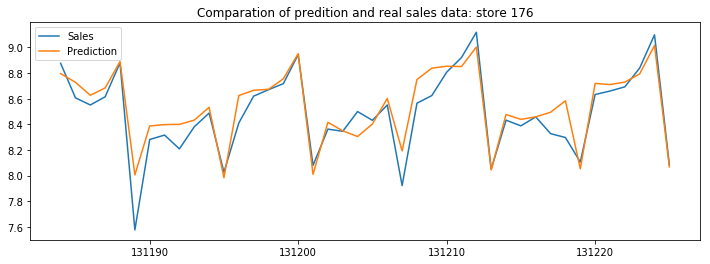

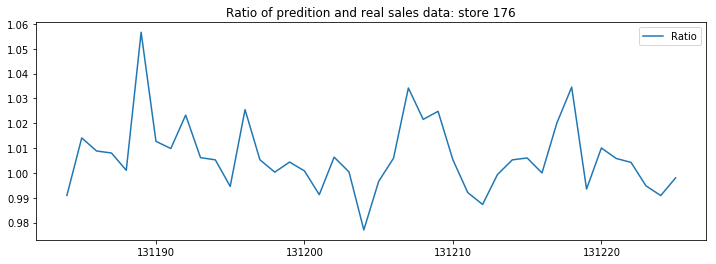

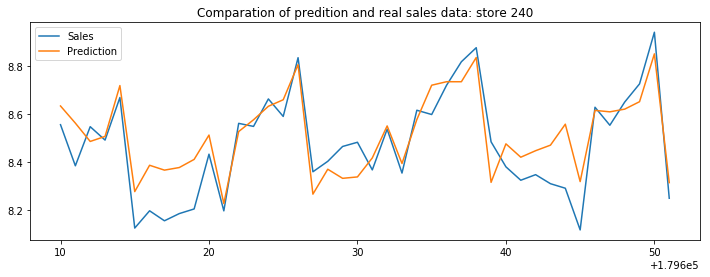

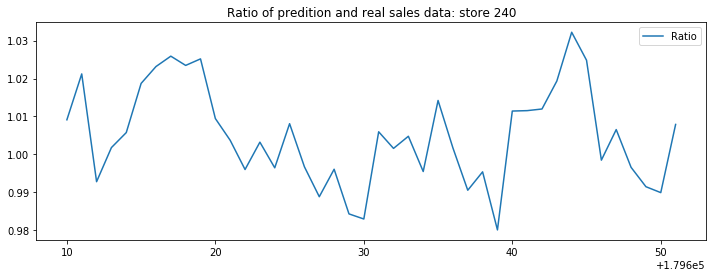

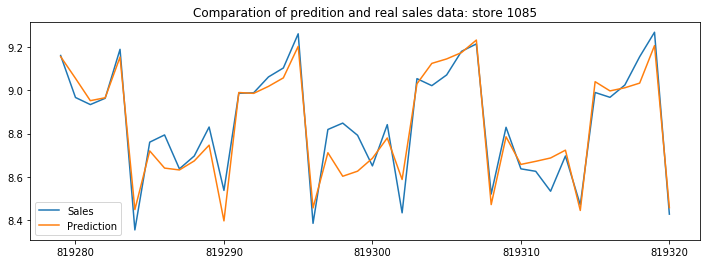

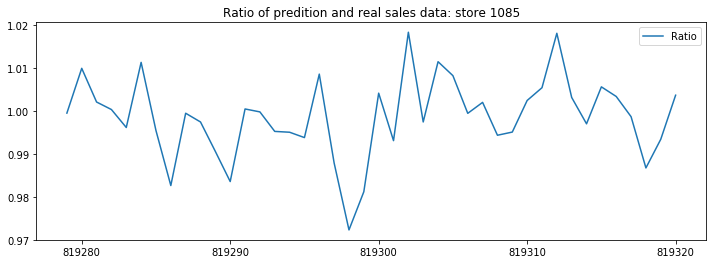

In [34]:
# #分析保留数据集中任意三个店铺的预测结果
col_1 = ['Sales','Prediction']
col_2 = ['Ratio']
L=np.random.randint( low=1,high = 1115, size = 3 ) 
print('Mean Ratio of predition and real sales data is {}: store all'.format(res.Ratio.mean()))
for i in L:
    s1 = pd.DataFrame(res[res['Store']==i],columns = col_1)
    s2 = pd.DataFrame(res[res['Store']==i],columns = col_2)
    s1.plot(title = 'Comparation of predition and real sales data: store {}'.format(i),figsize=(12,4))
    s2.plot(title = 'Ratio of predition and real sales data: store {}'.format(i),figsize=(12,4))
    print('Mean Ratio of predition and real sales data is {}: store {}'.format(s2.Ratio.mean(),i))

In [35]:
#分析偏差最大的10个预测结果
res.sort_values(['Error'],ascending=False,inplace= True)
res[:10]

Store  DayOfWeek  Promo  StateHoliday  SchoolHoliday  StoreType  \
843572    292          4      0             0              0          1   
590129    782          4      0             0              0          3   
685531    909          2      1             0              0          1   
685539    909          0      0             0              0          1   
842815    876          5      0             0              0          1   
843577    292          5      0             0              0          1   
843582    292          0      1             0              0          1   
842814    876          0      0             0              0          1   
685538    909          1      0             0              0          1   
590128    782          5      0             0              0          3   

        Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
843572           1               1100.0                        6.0   
590129           3               5390.0                        8.0   
685531           3               1680.0                        0.0   
685539           3               1680.0                        0.0   
842815           1              21790.0                        4.0   
843577           1               1100.0                        6.0   
843582           1               1100.0                        6.0   
842814           1              21790.0                        4.0   
685538           3               1680.0                        0.0   
590128           3               5390.0                        8.0   

        CompetitionOpenSinceYear    ...     Day  WeekOfYear  CompetitionOpen  \
843572                    2009.0    ...      10          28             73.0   
590129                    2003.0    ...      26          26            142.0   
685531                       0.0    ...       1          27          24187.0   
685539                       0.0    ...      22          26          24186.0   
842815                    2005.0    ...       4          27            123.0   
843577                    2009.0    ...       4          27             73.0   
843582                    2009.0    ...      29          27             72.0   
842814                    2005.0    ...       6          28            123.0   
685538                       0.0    ...      23          26          24186.0   
590128                    2003.0    ...      27          26            142.0   

        PromoOpen  IsPromoMonth      Sales  Prediction     Ratio     Error  \
843572   24187.00             0   6.920672    8.551723  1.235678  0.235678   
590129      42.25             0   7.260523    8.580822  1.181846  0.181846   
685531      67.50             0   8.174139    9.591308  1.173372  0.173372   
685539      67.25             0  10.634701    9.122061  0.857764  0.142236   
842815       2.25             0   9.596215    8.305877  0.865537  0.134463   
843577   24186.75             0   7.406711    8.302240  1.120908  0.120908   
843582   24186.75             0  10.280622    9.047655  0.880069  0.119931   
842814       2.50             0  10.215777    9.010431  0.882011  0.117989   
685538      67.25             0  10.310252    9.109990  0.883586  0.116414   
590128      42.25             0   7.714677    8.569721  1.110833  0.110833   

          Weight  
843572  0.809272  
590129  0.846134  
685531  0.852245  
685539  1.165822  
842815  1.155352  
843577  0.892134  
843582  1.136275  
842814  1.133772  
685538  1.131752  
590128  0.900225  

[10 rows x 25 columns]

weight correction
RMSPE for 0.990:0.130169
RMSPE for 0.991:0.127241
RMSPE for 0.992:0.124783
RMSPE for 0.993:0.122839
RMSPE for 0.994:0.121449
RMSPE for 0.995:0.120647
RMSPE for 0.996:0.120463
RMSPE for 0.997:0.120914
RMSPE for 0.998:0.122013
RMSPE for 0.999:0.123757
RMSPE for 1.000:0.126137
RMSPE for 1.001:0.129135
RMSPE for 1.002:0.132725
RMSPE for 1.003:0.136879
RMSPE for 1.004:0.141561
RMSPE for 1.005:0.146739
RMSPE for 1.006:0.152378
RMSPE for 1.007:0.158443
RMSPE for 1.008:0.164903
RMSPE for 1.009:0.171728
Best weight for Score:0.996    0.120463
dtype: float64


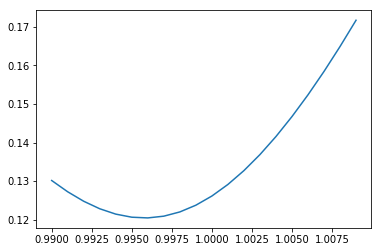

In [36]:
#偏差整体校正优化
print("weight correction")
W=[(0.990+(i/1000)) for i in range(20)]
S =[]
for w in W:
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat*w))
    print('RMSPE for {:.3f}:{:.6f}'.format(w,error))
    S.append(error)
Score = pd.Series(S,index=W)
Score.plot()
BS = Score[Score.values == Score.values.min()]
print ('Best weight for Score:{}'.format(BS))

L=range(1115)
W_ho=[]
W_test=[]
for i in L:
    s1 = pd.DataFrame(res[res['Store']==i+1],columns = col_1)
    s2 = pd.DataFrame(xtest[xtest['Store']==i+1])
    W1=[(0.990+(i/1000)) for i in range(20)]
    S =[]
    for w in W1:
        error = rmspe(np.expm1(s1.Sales), np.expm1(s1.Prediction*w))
        S.append(error)
    Score = pd.Series(S,index=W1)
    BS = Score[Score.values == Score.values.min()]
    a=np.array(BS.index.values)
    b_ho=a.repeat(len(s1))
    b_test=a.repeat(len(s2))
    W_ho.extend(b_ho.tolist())
    W_test.extend(b_test.tolist())

In [37]:
#计算校正后整体数据的RMSPE得分
# yhat_new = yhat*W_ho
# error = rmspe(np.expm1(ho_ytest), np.expm1(yhat_new))
# print ('RMSPE for weight corretion {:6f}'.format(error))

In [38]:
#用初始和校正后的模型对训练数据集进行预测
print("Make predictions on the test set")
dtest = xgb.DMatrix(xtest)
test_probs = gbm.predict(dtest)


Make predictions on the test set


In [39]:
#初始模型
result = pd.DataFrame({"Id": test['Id'], 'Sales': np.expm1(test_probs)})
result.to_csv("Rossmann_submission_1.csv", index=False)
 
#整体校正模型
result = pd.DataFrame({"Id": test['Id'], 'Sales': np.expm1(test_probs*0.995)})
result.to_csv("Rossmann_submission_2.csv", index=False)
 
#细致校正模型
result = pd.DataFrame({"Id": test['Id'], 'Sales': np.expm1(test_probs*W_test)})
result.to_csv("Rossmann_submission_3.csv", index=False)

In [40]:
#训练融合模型
print("Train an new ensemble XGBoost model")
start = time()
rounds = 10
preds_ho = np.zeros((len(ho_xtest.index), rounds))
preds_test = np.zeros((len(test.index), rounds))
B=[]
for r in range(rounds):
    print('round {}:'.format(r+1))
    
    params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": r+1
          }
    num_boost_round = 6000
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
                    early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
    
    yhat = gbm.predict(xgb.DMatrix(ho_xtest))
    
    L=range(1115)
    W_ho=[]
    W_test=[]
    for i in L:
        s1 = pd.DataFrame(res[res['Store']==i+1],columns = col_1)
        s2 = pd.DataFrame(xtest[xtest['Store']==i+1])
        W1=[(0.990+(i/1000)) for i in range(20)]
        S =[]
        for w in W1:
            error = rmspe(np.expm1(s1.Sales), np.expm1(s1.Prediction*w))
            S.append(error)
        Score = pd.Series(S,index=W1)
        BS = Score[Score.values == Score.values.min()]
        a=np.array(BS.index.values)
        b_ho=a.repeat(len(s1))
        b_test=a.repeat(len(s2))
        W_ho.extend(b_ho.tolist())
        W_test.extend(b_test.tolist())
    
 
    yhat_ho = yhat*W_ho
    yhat_test =gbm.predict(xgb.DMatrix(xtest))*W_test
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat_ho))
    B.append(error)
    preds_ho[:, r] = yhat_ho
    preds_test[:, r] = yhat_test
    print('round {} end'.format(r+1))
    
end = time()
time_elapsed = end-start
print('Training is end')
print('Training time is {} h.'.format(time_elapsed/3600)) 

Train an new ensemble XGBoost model
round 1:
[0]	train-rmse:8.01956	eval-rmse:8.04767	train-rmspe:0.999808	eval-rmspe:0.999815
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.77953	eval-rmse:7.80764	train-rmspe:0.99971	eval-rmspe:0.999719
[2]	train-rmse:7.54673	eval-rmse:7.57385	train-rmspe:0.999589	eval-rmspe:0.999602
[3]	train-rmse:7.32083	eval-rmse:7.34818	train-rmspe:0.999442	eval-rmspe:0.99946
[4]	train-rmse:7.10178	eval-rmse:7.12895	train-rmspe:0.999264	eval-rmspe:0.999287
[5]	train-rmse:6.88926	eval-rmse:6.91635	train-rmspe:0.999051	eval-rmspe:0.99908
[6]	train-rmse:6.68311	eval-rmse:6.71009	train-rmspe:0.998796	eval-rmspe:0.998833
[7]	train-rmse:6.48321	eval-rmse:6.50992	train-rmspe:0.998494	eval-rmspe:0.99854
[8]	train-rmse:6.28936	eval-rmse:6.31562	train-rmspe:0.998136	eval-rmspe:0.998192
[9]	train-rmse:6.10123	eval-rmse:6.12689	train-rmspe:0.997718	eval-rmspe:0.

[97]	train-rmse:0.488611	eval-rmse:0.48372	train-rmspe:0.378924	eval-rmspe:0.363534
[98]	train-rmse:0.477315	eval-rmse:0.472463	train-rmspe:0.37282	eval-rmspe:0.356975
[99]	train-rmse:0.46648	eval-rmse:0.461769	train-rmspe:0.36687	eval-rmspe:0.350679
[100]	train-rmse:0.456406	eval-rmse:0.451822	train-rmspe:0.361385	eval-rmspe:0.344772
[101]	train-rmse:0.446655	eval-rmse:0.441659	train-rmspe:0.356105	eval-rmspe:0.338739
[102]	train-rmse:0.437116	eval-rmse:0.43223	train-rmspe:0.350903	eval-rmspe:0.33315
[103]	train-rmse:0.428054	eval-rmse:0.4227	train-rmspe:0.345952	eval-rmspe:0.327453
[104]	train-rmse:0.419032	eval-rmse:0.413491	train-rmspe:0.341116	eval-rmspe:0.32195
[105]	train-rmse:0.410747	eval-rmse:0.405028	train-rmspe:0.336681	eval-rmspe:0.316931
[106]	train-rmse:0.40266	eval-rmse:0.397037	train-rmspe:0.33237	eval-rmspe:0.312201
[107]	train-rmse:0.394507	eval-rmse:0.389056	train-rmspe:0.32798	eval-rmspe:0.307418
[108]	train-rmse:0.386836	eval-rmse:0.381423	train-rmspe:0.323921	eva

[193]	train-rmse:0.196095	eval-rmse:0.205417	train-rmspe:0.243456	eval-rmspe:0.217377
[194]	train-rmse:0.195577	eval-rmse:0.204829	train-rmspe:0.241618	eval-rmspe:0.217039
[195]	train-rmse:0.19481	eval-rmse:0.204104	train-rmspe:0.241358	eval-rmspe:0.216519
[196]	train-rmse:0.194595	eval-rmse:0.203964	train-rmspe:0.241401	eval-rmspe:0.216609
[197]	train-rmse:0.194296	eval-rmse:0.203791	train-rmspe:0.241307	eval-rmspe:0.216619
[198]	train-rmse:0.19381	eval-rmse:0.203462	train-rmspe:0.241073	eval-rmspe:0.216418
[199]	train-rmse:0.192675	eval-rmse:0.202502	train-rmspe:0.240232	eval-rmspe:0.215542
[200]	train-rmse:0.192288	eval-rmse:0.202304	train-rmspe:0.240084	eval-rmspe:0.215575
[201]	train-rmse:0.191692	eval-rmse:0.201805	train-rmspe:0.239505	eval-rmspe:0.215166
[202]	train-rmse:0.191286	eval-rmse:0.201528	train-rmspe:0.237049	eval-rmspe:0.215042
[203]	train-rmse:0.19046	eval-rmse:0.200924	train-rmspe:0.236416	eval-rmspe:0.214522
[204]	train-rmse:0.190192	eval-rmse:0.200759	train-rmspe:

[289]	train-rmse:0.157799	eval-rmse:0.173472	train-rmspe:0.195724	eval-rmspe:0.189058
[290]	train-rmse:0.157699	eval-rmse:0.173492	train-rmspe:0.195586	eval-rmspe:0.189162
[291]	train-rmse:0.157104	eval-rmse:0.172961	train-rmspe:0.194931	eval-rmspe:0.18855
[292]	train-rmse:0.156792	eval-rmse:0.172674	train-rmspe:0.194664	eval-rmspe:0.188214
[293]	train-rmse:0.156575	eval-rmse:0.172488	train-rmspe:0.194483	eval-rmspe:0.188012
[294]	train-rmse:0.156034	eval-rmse:0.172048	train-rmspe:0.193988	eval-rmspe:0.187541
[295]	train-rmse:0.155842	eval-rmse:0.171882	train-rmspe:0.193819	eval-rmspe:0.187355
[296]	train-rmse:0.15564	eval-rmse:0.171727	train-rmspe:0.193543	eval-rmspe:0.187202
[297]	train-rmse:0.155449	eval-rmse:0.171587	train-rmspe:0.19244	eval-rmspe:0.187041
[298]	train-rmse:0.155153	eval-rmse:0.171309	train-rmspe:0.192185	eval-rmspe:0.186766
[299]	train-rmse:0.155031	eval-rmse:0.171296	train-rmspe:0.192058	eval-rmspe:0.186876
[300]	train-rmse:0.154774	eval-rmse:0.170839	train-rmspe:

[385]	train-rmse:0.13548	eval-rmse:0.155306	train-rmspe:0.168996	eval-rmspe:0.169206
[386]	train-rmse:0.135165	eval-rmse:0.155018	train-rmspe:0.168714	eval-rmspe:0.168884
[387]	train-rmse:0.135111	eval-rmse:0.15498	train-rmspe:0.16862	eval-rmspe:0.168844
[388]	train-rmse:0.134932	eval-rmse:0.154843	train-rmspe:0.168467	eval-rmspe:0.168684
[389]	train-rmse:0.134793	eval-rmse:0.154724	train-rmspe:0.168344	eval-rmspe:0.168558
[390]	train-rmse:0.134533	eval-rmse:0.154489	train-rmspe:0.16809	eval-rmspe:0.168299
[391]	train-rmse:0.134329	eval-rmse:0.154322	train-rmspe:0.167909	eval-rmspe:0.168098
[392]	train-rmse:0.134205	eval-rmse:0.154218	train-rmspe:0.167796	eval-rmspe:0.167988
[393]	train-rmse:0.134097	eval-rmse:0.154269	train-rmspe:0.167658	eval-rmspe:0.168069
[394]	train-rmse:0.133845	eval-rmse:0.154046	train-rmspe:0.167398	eval-rmspe:0.167823
[395]	train-rmse:0.13359	eval-rmse:0.153822	train-rmspe:0.167141	eval-rmspe:0.167588
[396]	train-rmse:0.1335	eval-rmse:0.153699	train-rmspe:0.16

[481]	train-rmse:0.121319	eval-rmse:0.144158	train-rmspe:0.154229	eval-rmspe:0.156783
[482]	train-rmse:0.121188	eval-rmse:0.144052	train-rmspe:0.154021	eval-rmspe:0.156667
[483]	train-rmse:0.121	eval-rmse:0.143879	train-rmspe:0.153854	eval-rmspe:0.156467
[484]	train-rmse:0.120871	eval-rmse:0.143782	train-rmspe:0.153738	eval-rmspe:0.156357
[485]	train-rmse:0.120707	eval-rmse:0.143635	train-rmspe:0.153592	eval-rmspe:0.156189
[486]	train-rmse:0.120617	eval-rmse:0.14361	train-rmspe:0.153421	eval-rmspe:0.156166
[487]	train-rmse:0.120492	eval-rmse:0.143528	train-rmspe:0.153343	eval-rmspe:0.156074
[488]	train-rmse:0.12033	eval-rmse:0.14339	train-rmspe:0.153114	eval-rmspe:0.15591
[489]	train-rmse:0.120147	eval-rmse:0.143273	train-rmspe:0.152943	eval-rmspe:0.155773
[490]	train-rmse:0.120104	eval-rmse:0.143245	train-rmspe:0.152859	eval-rmspe:0.155742
[491]	train-rmse:0.120042	eval-rmse:0.143187	train-rmspe:0.152439	eval-rmspe:0.155675
[492]	train-rmse:0.119898	eval-rmse:0.143061	train-rmspe:0.15

[577]	train-rmse:0.111493	eval-rmse:0.136932	train-rmspe:0.14209	eval-rmspe:0.148814
[578]	train-rmse:0.111367	eval-rmse:0.13683	train-rmspe:0.141976	eval-rmspe:0.148695
[579]	train-rmse:0.111337	eval-rmse:0.13681	train-rmspe:0.141934	eval-rmspe:0.148672
[580]	train-rmse:0.111308	eval-rmse:0.13679	train-rmspe:0.141999	eval-rmspe:0.148651
[581]	train-rmse:0.111259	eval-rmse:0.136773	train-rmspe:0.141959	eval-rmspe:0.148658
[582]	train-rmse:0.111167	eval-rmse:0.136719	train-rmspe:0.141766	eval-rmspe:0.148599
[583]	train-rmse:0.111056	eval-rmse:0.13666	train-rmspe:0.141641	eval-rmspe:0.148541
[584]	train-rmse:0.110958	eval-rmse:0.136594	train-rmspe:0.141548	eval-rmspe:0.148471
[585]	train-rmse:0.110839	eval-rmse:0.136515	train-rmspe:0.141437	eval-rmspe:0.148383
[586]	train-rmse:0.110792	eval-rmse:0.136487	train-rmspe:0.141284	eval-rmspe:0.14836
[587]	train-rmse:0.110746	eval-rmse:0.136476	train-rmspe:0.141255	eval-rmspe:0.148353
[588]	train-rmse:0.110695	eval-rmse:0.136577	train-rmspe:0.1

[673]	train-rmse:0.104873	eval-rmse:0.132495	train-rmspe:0.134567	eval-rmspe:0.143923
[674]	train-rmse:0.104835	eval-rmse:0.132478	train-rmspe:0.134423	eval-rmspe:0.143903
[675]	train-rmse:0.104763	eval-rmse:0.132419	train-rmspe:0.134013	eval-rmspe:0.143839
[676]	train-rmse:0.104682	eval-rmse:0.132365	train-rmspe:0.133938	eval-rmspe:0.143779
[677]	train-rmse:0.104644	eval-rmse:0.132338	train-rmspe:0.1339	eval-rmspe:0.143748
[678]	train-rmse:0.10463	eval-rmse:0.132336	train-rmspe:0.133898	eval-rmspe:0.143745
[679]	train-rmse:0.10458	eval-rmse:0.132291	train-rmspe:0.133847	eval-rmspe:0.143694
[680]	train-rmse:0.104554	eval-rmse:0.132271	train-rmspe:0.133823	eval-rmspe:0.143671
[681]	train-rmse:0.104464	eval-rmse:0.132214	train-rmspe:0.133697	eval-rmspe:0.143608
[682]	train-rmse:0.10439	eval-rmse:0.13217	train-rmspe:0.133631	eval-rmspe:0.143558
[683]	train-rmse:0.104347	eval-rmse:0.132146	train-rmspe:0.133598	eval-rmspe:0.143533
[684]	train-rmse:0.104333	eval-rmse:0.132085	train-rmspe:0.1

[769]	train-rmse:0.099522	eval-rmse:0.128893	train-rmspe:0.126712	eval-rmspe:0.139893
[770]	train-rmse:0.099508	eval-rmse:0.128886	train-rmspe:0.12664	eval-rmspe:0.139889
[771]	train-rmse:0.099454	eval-rmse:0.128833	train-rmspe:0.126386	eval-rmspe:0.139822
[772]	train-rmse:0.09943	eval-rmse:0.128815	train-rmspe:0.126362	eval-rmspe:0.139803
[773]	train-rmse:0.099385	eval-rmse:0.128706	train-rmspe:0.126316	eval-rmspe:0.139632
[774]	train-rmse:0.099339	eval-rmse:0.128679	train-rmspe:0.126271	eval-rmspe:0.139601
[775]	train-rmse:0.09932	eval-rmse:0.128659	train-rmspe:0.12626	eval-rmspe:0.13958
[776]	train-rmse:0.099291	eval-rmse:0.128628	train-rmspe:0.126235	eval-rmspe:0.139546
[777]	train-rmse:0.099234	eval-rmse:0.128595	train-rmspe:0.126181	eval-rmspe:0.139511
[778]	train-rmse:0.099161	eval-rmse:0.128528	train-rmspe:0.126104	eval-rmspe:0.139431
[779]	train-rmse:0.099142	eval-rmse:0.128516	train-rmspe:0.126091	eval-rmspe:0.139418
[780]	train-rmse:0.099068	eval-rmse:0.128456	train-rmspe:0.

[865]	train-rmse:0.095916	eval-rmse:0.126735	train-rmspe:0.120162	eval-rmspe:0.137487
[866]	train-rmse:0.095809	eval-rmse:0.126654	train-rmspe:0.120056	eval-rmspe:0.137389
[867]	train-rmse:0.095774	eval-rmse:0.126626	train-rmspe:0.120027	eval-rmspe:0.137356
[868]	train-rmse:0.095752	eval-rmse:0.126617	train-rmspe:0.12001	eval-rmspe:0.137346
[869]	train-rmse:0.095734	eval-rmse:0.126609	train-rmspe:0.119308	eval-rmspe:0.137338
[870]	train-rmse:0.095728	eval-rmse:0.126605	train-rmspe:0.119301	eval-rmspe:0.137334
[871]	train-rmse:0.095692	eval-rmse:0.126584	train-rmspe:0.11927	eval-rmspe:0.13731
[872]	train-rmse:0.095629	eval-rmse:0.126611	train-rmspe:0.119209	eval-rmspe:0.137351
[873]	train-rmse:0.095583	eval-rmse:0.12662	train-rmspe:0.119167	eval-rmspe:0.137372
[874]	train-rmse:0.095537	eval-rmse:0.126593	train-rmspe:0.119122	eval-rmspe:0.137343
[875]	train-rmse:0.095491	eval-rmse:0.126569	train-rmspe:0.119078	eval-rmspe:0.13732
[876]	train-rmse:0.095466	eval-rmse:0.126561	train-rmspe:0.

[961]	train-rmse:0.092723	eval-rmse:0.125318	train-rmspe:0.114004	eval-rmspe:0.135951
[962]	train-rmse:0.092697	eval-rmse:0.125308	train-rmspe:0.11398	eval-rmspe:0.135936
[963]	train-rmse:0.092659	eval-rmse:0.125283	train-rmspe:0.113939	eval-rmspe:0.135912
[964]	train-rmse:0.092603	eval-rmse:0.125221	train-rmspe:0.113835	eval-rmspe:0.13581
[965]	train-rmse:0.09258	eval-rmse:0.125229	train-rmspe:0.113812	eval-rmspe:0.13581
[966]	train-rmse:0.092556	eval-rmse:0.125239	train-rmspe:0.113789	eval-rmspe:0.135823
[967]	train-rmse:0.092526	eval-rmse:0.125226	train-rmspe:0.113763	eval-rmspe:0.135805
[968]	train-rmse:0.092517	eval-rmse:0.125226	train-rmspe:0.113753	eval-rmspe:0.135805
[969]	train-rmse:0.092476	eval-rmse:0.125227	train-rmspe:0.113646	eval-rmspe:0.135808
[970]	train-rmse:0.092458	eval-rmse:0.125227	train-rmspe:0.113623	eval-rmspe:0.135807
[971]	train-rmse:0.092442	eval-rmse:0.125221	train-rmspe:0.113607	eval-rmspe:0.135801
[972]	train-rmse:0.092402	eval-rmse:0.125196	train-rmspe:0

[1057]	train-rmse:0.090213	eval-rmse:0.124315	train-rmspe:0.110336	eval-rmspe:0.13474
[1058]	train-rmse:0.090168	eval-rmse:0.124334	train-rmspe:0.110269	eval-rmspe:0.134771
[1059]	train-rmse:0.090145	eval-rmse:0.124323	train-rmspe:0.110245	eval-rmspe:0.134758
[1060]	train-rmse:0.090125	eval-rmse:0.124323	train-rmspe:0.110226	eval-rmspe:0.134754
[1061]	train-rmse:0.090098	eval-rmse:0.124321	train-rmspe:0.1102	eval-rmspe:0.134752
[1062]	train-rmse:0.090082	eval-rmse:0.124315	train-rmspe:0.110185	eval-rmspe:0.134747
[1063]	train-rmse:0.090048	eval-rmse:0.12433	train-rmspe:0.110132	eval-rmspe:0.13476
[1064]	train-rmse:0.090036	eval-rmse:0.124337	train-rmspe:0.11012	eval-rmspe:0.134776
[1065]	train-rmse:0.089995	eval-rmse:0.124313	train-rmspe:0.11008	eval-rmspe:0.134751
[1066]	train-rmse:0.089974	eval-rmse:0.124302	train-rmspe:0.110061	eval-rmspe:0.134746
[1067]	train-rmse:0.089942	eval-rmse:0.124287	train-rmspe:0.110033	eval-rmspe:0.134733
[1068]	train-rmse:0.08992	eval-rmse:0.124273	train

[1152]	train-rmse:0.087867	eval-rmse:0.123367	train-rmspe:0.106723	eval-rmspe:0.133683
[1153]	train-rmse:0.087829	eval-rmse:0.123343	train-rmspe:0.106683	eval-rmspe:0.133657
[1154]	train-rmse:0.087819	eval-rmse:0.12334	train-rmspe:0.106674	eval-rmspe:0.133652
[1155]	train-rmse:0.087776	eval-rmse:0.123329	train-rmspe:0.106629	eval-rmspe:0.133643
[1156]	train-rmse:0.087754	eval-rmse:0.123325	train-rmspe:0.106609	eval-rmspe:0.133638
[1157]	train-rmse:0.087731	eval-rmse:0.12332	train-rmspe:0.106583	eval-rmspe:0.133636
[1158]	train-rmse:0.087693	eval-rmse:0.123347	train-rmspe:0.10651	eval-rmspe:0.133666
[1159]	train-rmse:0.087676	eval-rmse:0.123341	train-rmspe:0.106487	eval-rmspe:0.133661
[1160]	train-rmse:0.08765	eval-rmse:0.123327	train-rmspe:0.106464	eval-rmspe:0.133647
[1161]	train-rmse:0.08763	eval-rmse:0.123319	train-rmspe:0.10643	eval-rmspe:0.133637
[1162]	train-rmse:0.0876	eval-rmse:0.123303	train-rmspe:0.106396	eval-rmspe:0.133618
[1163]	train-rmse:0.087571	eval-rmse:0.123296	train

[1247]	train-rmse:0.085856	eval-rmse:0.122647	train-rmspe:0.103664	eval-rmspe:0.132919
[1248]	train-rmse:0.085835	eval-rmse:0.122641	train-rmspe:0.103645	eval-rmspe:0.132912
[1249]	train-rmse:0.085819	eval-rmse:0.122631	train-rmspe:0.103624	eval-rmspe:0.1329
[1250]	train-rmse:0.085792	eval-rmse:0.122612	train-rmspe:0.103596	eval-rmspe:0.13288
[1251]	train-rmse:0.085777	eval-rmse:0.122606	train-rmspe:0.103581	eval-rmspe:0.132873
[1252]	train-rmse:0.085738	eval-rmse:0.122638	train-rmspe:0.103527	eval-rmspe:0.132905
[1253]	train-rmse:0.085718	eval-rmse:0.12263	train-rmspe:0.103506	eval-rmspe:0.132895
[1254]	train-rmse:0.085697	eval-rmse:0.122621	train-rmspe:0.103485	eval-rmspe:0.132884
[1255]	train-rmse:0.085681	eval-rmse:0.122619	train-rmspe:0.10347	eval-rmspe:0.132882
[1256]	train-rmse:0.085656	eval-rmse:0.122606	train-rmspe:0.103406	eval-rmspe:0.132868
[1257]	train-rmse:0.085644	eval-rmse:0.122602	train-rmspe:0.103395	eval-rmspe:0.132864
[1258]	train-rmse:0.08563	eval-rmse:0.122602	tra

[1342]	train-rmse:0.084056	eval-rmse:0.12209	train-rmspe:0.100731	eval-rmspe:0.132281
[1343]	train-rmse:0.08403	eval-rmse:0.12211	train-rmspe:0.1007	eval-rmspe:0.132304
[1344]	train-rmse:0.084018	eval-rmse:0.122106	train-rmspe:0.10068	eval-rmspe:0.132301
[1345]	train-rmse:0.083999	eval-rmse:0.122108	train-rmspe:0.100565	eval-rmspe:0.132309
[1346]	train-rmse:0.083991	eval-rmse:0.122106	train-rmspe:0.10054	eval-rmspe:0.132308
[1347]	train-rmse:0.083974	eval-rmse:0.122096	train-rmspe:0.10052	eval-rmspe:0.132298
[1348]	train-rmse:0.083959	eval-rmse:0.122089	train-rmspe:0.100505	eval-rmspe:0.132292
[1349]	train-rmse:0.083942	eval-rmse:0.122076	train-rmspe:0.100489	eval-rmspe:0.132277
[1350]	train-rmse:0.083926	eval-rmse:0.122072	train-rmspe:0.100474	eval-rmspe:0.132271
[1351]	train-rmse:0.083909	eval-rmse:0.122067	train-rmspe:0.10044	eval-rmspe:0.132266
[1352]	train-rmse:0.083894	eval-rmse:0.122068	train-rmspe:0.100414	eval-rmspe:0.132269
[1353]	train-rmse:0.083874	eval-rmse:0.122058	train-

[1437]	train-rmse:0.082503	eval-rmse:0.121697	train-rmspe:0.098359	eval-rmspe:0.131849
[1438]	train-rmse:0.082479	eval-rmse:0.121685	train-rmspe:0.098328	eval-rmspe:0.131837
[1439]	train-rmse:0.082451	eval-rmse:0.121679	train-rmspe:0.098287	eval-rmspe:0.131831
[1440]	train-rmse:0.082428	eval-rmse:0.12167	train-rmspe:0.098262	eval-rmspe:0.131822
[1441]	train-rmse:0.082417	eval-rmse:0.121668	train-rmspe:0.098236	eval-rmspe:0.13182
[1442]	train-rmse:0.082401	eval-rmse:0.121664	train-rmspe:0.098221	eval-rmspe:0.131816
[1443]	train-rmse:0.082388	eval-rmse:0.121661	train-rmspe:0.098209	eval-rmspe:0.131811
[1444]	train-rmse:0.08238	eval-rmse:0.12166	train-rmspe:0.098194	eval-rmspe:0.13181
[1445]	train-rmse:0.082364	eval-rmse:0.121659	train-rmspe:0.098172	eval-rmspe:0.131809
[1446]	train-rmse:0.082343	eval-rmse:0.121688	train-rmspe:0.09814	eval-rmspe:0.131838
[1447]	train-rmse:0.082322	eval-rmse:0.121682	train-rmspe:0.098122	eval-rmspe:0.131832
[1448]	train-rmse:0.082289	eval-rmse:0.121668	tra

[1532]	train-rmse:0.081003	eval-rmse:0.121322	train-rmspe:0.094887	eval-rmspe:0.131451
[1533]	train-rmse:0.08099	eval-rmse:0.121326	train-rmspe:0.094875	eval-rmspe:0.131455
[1534]	train-rmse:0.080979	eval-rmse:0.121321	train-rmspe:0.094864	eval-rmspe:0.131449
[1535]	train-rmse:0.080961	eval-rmse:0.121313	train-rmspe:0.094841	eval-rmspe:0.131441
[1536]	train-rmse:0.080949	eval-rmse:0.12131	train-rmspe:0.094825	eval-rmspe:0.131437
[1537]	train-rmse:0.08094	eval-rmse:0.121308	train-rmspe:0.094817	eval-rmspe:0.131436
[1538]	train-rmse:0.080926	eval-rmse:0.121303	train-rmspe:0.094798	eval-rmspe:0.13143
[1539]	train-rmse:0.080918	eval-rmse:0.1213	train-rmspe:0.094794	eval-rmspe:0.131429
[1540]	train-rmse:0.080898	eval-rmse:0.121311	train-rmspe:0.094765	eval-rmspe:0.131448
[1541]	train-rmse:0.080876	eval-rmse:0.121302	train-rmspe:0.094739	eval-rmspe:0.131438
[1542]	train-rmse:0.080863	eval-rmse:0.121308	train-rmspe:0.094726	eval-rmspe:0.131444
[1543]	train-rmse:0.080855	eval-rmse:0.121306	tra

[1627]	train-rmse:0.079714	eval-rmse:0.121082	train-rmspe:0.09205	eval-rmspe:0.131214
[1628]	train-rmse:0.079702	eval-rmse:0.121079	train-rmspe:0.092035	eval-rmspe:0.13121
[1629]	train-rmse:0.079691	eval-rmse:0.121073	train-rmspe:0.092023	eval-rmspe:0.131206
[1630]	train-rmse:0.079678	eval-rmse:0.121076	train-rmspe:0.092003	eval-rmspe:0.131211
[1631]	train-rmse:0.079665	eval-rmse:0.12109	train-rmspe:0.091982	eval-rmspe:0.131221
[1632]	train-rmse:0.079641	eval-rmse:0.121079	train-rmspe:0.091949	eval-rmspe:0.131204
[1633]	train-rmse:0.079631	eval-rmse:0.121075	train-rmspe:0.091934	eval-rmspe:0.131202
[1634]	train-rmse:0.079609	eval-rmse:0.121071	train-rmspe:0.091906	eval-rmspe:0.131189
[1635]	train-rmse:0.079599	eval-rmse:0.121065	train-rmspe:0.091896	eval-rmspe:0.13118
[1636]	train-rmse:0.079581	eval-rmse:0.121076	train-rmspe:0.091854	eval-rmspe:0.131189
[1637]	train-rmse:0.07957	eval-rmse:0.121071	train-rmspe:0.091842	eval-rmspe:0.131183
[1638]	train-rmse:0.079567	eval-rmse:0.121076	tr

[1722]	train-rmse:0.078548	eval-rmse:0.120903	train-rmspe:0.089169	eval-rmspe:0.131004
[1723]	train-rmse:0.078536	eval-rmse:0.120899	train-rmspe:0.089156	eval-rmspe:0.130999
[1724]	train-rmse:0.078522	eval-rmse:0.120894	train-rmspe:0.089139	eval-rmspe:0.130991
[1725]	train-rmse:0.078515	eval-rmse:0.120903	train-rmspe:0.089151	eval-rmspe:0.131004
[1726]	train-rmse:0.078503	eval-rmse:0.120907	train-rmspe:0.089136	eval-rmspe:0.131008
[1727]	train-rmse:0.078497	eval-rmse:0.120907	train-rmspe:0.089133	eval-rmspe:0.131007
[1728]	train-rmse:0.078484	eval-rmse:0.120907	train-rmspe:0.089119	eval-rmspe:0.131011
[1729]	train-rmse:0.078476	eval-rmse:0.120908	train-rmspe:0.089112	eval-rmspe:0.131013
[1730]	train-rmse:0.07846	eval-rmse:0.120905	train-rmspe:0.089091	eval-rmspe:0.13101
[1731]	train-rmse:0.078443	eval-rmse:0.120894	train-rmspe:0.08898	eval-rmspe:0.130998
[1732]	train-rmse:0.078435	eval-rmse:0.120892	train-rmspe:0.08897	eval-rmspe:0.130994
[1733]	train-rmse:0.078423	eval-rmse:0.120887	t

[1817]	train-rmse:0.077385	eval-rmse:0.120714	train-rmspe:0.087479	eval-rmspe:0.130808
[1818]	train-rmse:0.077376	eval-rmse:0.120711	train-rmspe:0.087469	eval-rmspe:0.130806
[1819]	train-rmse:0.077356	eval-rmse:0.120707	train-rmspe:0.08745	eval-rmspe:0.130801
[1820]	train-rmse:0.077351	eval-rmse:0.120708	train-rmspe:0.087446	eval-rmspe:0.130803
[1821]	train-rmse:0.077338	eval-rmse:0.120706	train-rmspe:0.08743	eval-rmspe:0.130801
[1822]	train-rmse:0.077319	eval-rmse:0.120699	train-rmspe:0.087411	eval-rmspe:0.130794
[1823]	train-rmse:0.077314	eval-rmse:0.120702	train-rmspe:0.087406	eval-rmspe:0.130796
[1824]	train-rmse:0.0773	eval-rmse:0.120702	train-rmspe:0.087394	eval-rmspe:0.130796
[1825]	train-rmse:0.077294	eval-rmse:0.120702	train-rmspe:0.087387	eval-rmspe:0.130797
[1826]	train-rmse:0.077283	eval-rmse:0.120697	train-rmspe:0.087376	eval-rmspe:0.130792
[1827]	train-rmse:0.077261	eval-rmse:0.120697	train-rmspe:0.087341	eval-rmspe:0.130792
[1828]	train-rmse:0.077248	eval-rmse:0.120693	t

[1912]	train-rmse:0.076291	eval-rmse:0.120514	train-rmspe:0.085664	eval-rmspe:0.130563
[1913]	train-rmse:0.07628	eval-rmse:0.120511	train-rmspe:0.085653	eval-rmspe:0.13056
[1914]	train-rmse:0.07627	eval-rmse:0.120508	train-rmspe:0.085616	eval-rmspe:0.130556
[1915]	train-rmse:0.07626	eval-rmse:0.120509	train-rmspe:0.0856	eval-rmspe:0.130557
[1916]	train-rmse:0.076252	eval-rmse:0.120508	train-rmspe:0.085591	eval-rmspe:0.130556
[1917]	train-rmse:0.076235	eval-rmse:0.120504	train-rmspe:0.085569	eval-rmspe:0.130549
[1918]	train-rmse:0.076223	eval-rmse:0.120502	train-rmspe:0.085554	eval-rmspe:0.130549
[1919]	train-rmse:0.076216	eval-rmse:0.1205	train-rmspe:0.085546	eval-rmspe:0.130547
[1920]	train-rmse:0.076207	eval-rmse:0.120496	train-rmspe:0.085543	eval-rmspe:0.130543
[1921]	train-rmse:0.076201	eval-rmse:0.120492	train-rmspe:0.085537	eval-rmspe:0.130537
[1922]	train-rmse:0.076189	eval-rmse:0.120485	train-rmspe:0.085525	eval-rmspe:0.130528
[1923]	train-rmse:0.076167	eval-rmse:0.120483	train

[2007]	train-rmse:0.075252	eval-rmse:0.120307	train-rmspe:0.084242	eval-rmspe:0.130319
[2008]	train-rmse:0.075239	eval-rmse:0.120302	train-rmspe:0.084225	eval-rmspe:0.130312
[2009]	train-rmse:0.07523	eval-rmse:0.120297	train-rmspe:0.084217	eval-rmspe:0.130303
[2010]	train-rmse:0.075219	eval-rmse:0.120294	train-rmspe:0.084205	eval-rmspe:0.1303
[2011]	train-rmse:0.075201	eval-rmse:0.120285	train-rmspe:0.084187	eval-rmspe:0.130291
[2012]	train-rmse:0.075189	eval-rmse:0.120293	train-rmspe:0.084172	eval-rmspe:0.130299
[2013]	train-rmse:0.075174	eval-rmse:0.120278	train-rmspe:0.08414	eval-rmspe:0.130277
[2014]	train-rmse:0.075165	eval-rmse:0.120281	train-rmspe:0.084129	eval-rmspe:0.130281
[2015]	train-rmse:0.075153	eval-rmse:0.120277	train-rmspe:0.084111	eval-rmspe:0.130275
[2016]	train-rmse:0.075144	eval-rmse:0.120276	train-rmspe:0.084103	eval-rmspe:0.130275
[2017]	train-rmse:0.075138	eval-rmse:0.120277	train-rmspe:0.084097	eval-rmspe:0.130277
[2018]	train-rmse:0.075129	eval-rmse:0.120274	t

[2102]	train-rmse:0.074289	eval-rmse:0.120159	train-rmspe:0.082698	eval-rmspe:0.130147
[2103]	train-rmse:0.074271	eval-rmse:0.120153	train-rmspe:0.082669	eval-rmspe:0.130142
[2104]	train-rmse:0.074263	eval-rmse:0.120158	train-rmspe:0.082658	eval-rmspe:0.13015
[2105]	train-rmse:0.074255	eval-rmse:0.120155	train-rmspe:0.08265	eval-rmspe:0.130145
[2106]	train-rmse:0.074246	eval-rmse:0.120155	train-rmspe:0.082638	eval-rmspe:0.130146
[2107]	train-rmse:0.074231	eval-rmse:0.120151	train-rmspe:0.082622	eval-rmspe:0.130142
[2108]	train-rmse:0.074218	eval-rmse:0.12015	train-rmspe:0.082606	eval-rmspe:0.13014
[2109]	train-rmse:0.07421	eval-rmse:0.120147	train-rmspe:0.082594	eval-rmspe:0.130136
[2110]	train-rmse:0.074199	eval-rmse:0.120155	train-rmspe:0.08258	eval-rmspe:0.130147
[2111]	train-rmse:0.074192	eval-rmse:0.120154	train-rmspe:0.082573	eval-rmspe:0.130145
[2112]	train-rmse:0.074181	eval-rmse:0.120153	train-rmspe:0.082554	eval-rmspe:0.130145
[2113]	train-rmse:0.074173	eval-rmse:0.120151	tra

[2197]	train-rmse:0.073357	eval-rmse:0.120093	train-rmspe:0.080769	eval-rmspe:0.130097
[2198]	train-rmse:0.073344	eval-rmse:0.120082	train-rmspe:0.080733	eval-rmspe:0.130083
[2199]	train-rmse:0.073338	eval-rmse:0.120079	train-rmspe:0.080726	eval-rmspe:0.130079
[2200]	train-rmse:0.073331	eval-rmse:0.120077	train-rmspe:0.080717	eval-rmspe:0.130078
[2201]	train-rmse:0.073321	eval-rmse:0.120077	train-rmspe:0.080703	eval-rmspe:0.130078
[2202]	train-rmse:0.073315	eval-rmse:0.120076	train-rmspe:0.080696	eval-rmspe:0.130075
[2203]	train-rmse:0.0733	eval-rmse:0.120073	train-rmspe:0.080653	eval-rmspe:0.130072
[2204]	train-rmse:0.073288	eval-rmse:0.120067	train-rmspe:0.080639	eval-rmspe:0.130068
[2205]	train-rmse:0.07328	eval-rmse:0.120065	train-rmspe:0.080632	eval-rmspe:0.130066
[2206]	train-rmse:0.073273	eval-rmse:0.120067	train-rmspe:0.080623	eval-rmspe:0.130067
[2207]	train-rmse:0.073264	eval-rmse:0.120062	train-rmspe:0.080613	eval-rmspe:0.130061
[2208]	train-rmse:0.073254	eval-rmse:0.120059	

[2292]	train-rmse:0.072507	eval-rmse:0.119984	train-rmspe:0.079458	eval-rmspe:0.129992
[2293]	train-rmse:0.0725	eval-rmse:0.119984	train-rmspe:0.079451	eval-rmspe:0.129993
[2294]	train-rmse:0.072493	eval-rmse:0.119981	train-rmspe:0.07943	eval-rmspe:0.129991
[2295]	train-rmse:0.072483	eval-rmse:0.119984	train-rmspe:0.079376	eval-rmspe:0.129998
[2296]	train-rmse:0.072474	eval-rmse:0.119985	train-rmspe:0.079368	eval-rmspe:0.13
[2297]	train-rmse:0.072464	eval-rmse:0.119986	train-rmspe:0.079352	eval-rmspe:0.130005
[2298]	train-rmse:0.072452	eval-rmse:0.11998	train-rmspe:0.079337	eval-rmspe:0.129998
[2299]	train-rmse:0.072444	eval-rmse:0.119981	train-rmspe:0.079325	eval-rmspe:0.13
[2300]	train-rmse:0.072437	eval-rmse:0.119973	train-rmspe:0.079317	eval-rmspe:0.12999
[2301]	train-rmse:0.072428	eval-rmse:0.119974	train-rmspe:0.079308	eval-rmspe:0.129991
[2302]	train-rmse:0.072417	eval-rmse:0.119968	train-rmspe:0.079293	eval-rmspe:0.129985
[2303]	train-rmse:0.07241	eval-rmse:0.119967	train-rmspe

[2387]	train-rmse:0.071683	eval-rmse:0.119884	train-rmspe:0.078258	eval-rmspe:0.129904
[2388]	train-rmse:0.071674	eval-rmse:0.119881	train-rmspe:0.078243	eval-rmspe:0.129901
[2389]	train-rmse:0.071667	eval-rmse:0.119879	train-rmspe:0.078234	eval-rmspe:0.129899
[2390]	train-rmse:0.071657	eval-rmse:0.119878	train-rmspe:0.078219	eval-rmspe:0.129898
[2391]	train-rmse:0.07165	eval-rmse:0.119876	train-rmspe:0.078211	eval-rmspe:0.129895
[2392]	train-rmse:0.071642	eval-rmse:0.119878	train-rmspe:0.078202	eval-rmspe:0.1299
[2393]	train-rmse:0.071633	eval-rmse:0.119876	train-rmspe:0.078193	eval-rmspe:0.129898
[2394]	train-rmse:0.071626	eval-rmse:0.119873	train-rmspe:0.078185	eval-rmspe:0.129894
[2395]	train-rmse:0.071616	eval-rmse:0.119866	train-rmspe:0.078172	eval-rmspe:0.129884
[2396]	train-rmse:0.071608	eval-rmse:0.119867	train-rmspe:0.078161	eval-rmspe:0.129886
[2397]	train-rmse:0.071596	eval-rmse:0.119872	train-rmspe:0.078147	eval-rmspe:0.129892
[2398]	train-rmse:0.071586	eval-rmse:0.119872	

[2482]	train-rmse:0.070869	eval-rmse:0.119792	train-rmspe:0.076936	eval-rmspe:0.129804
[2483]	train-rmse:0.070863	eval-rmse:0.11979	train-rmspe:0.07693	eval-rmspe:0.129802
[2484]	train-rmse:0.070854	eval-rmse:0.11979	train-rmspe:0.076919	eval-rmspe:0.129803
[2485]	train-rmse:0.070848	eval-rmse:0.119787	train-rmspe:0.07691	eval-rmspe:0.129798
[2486]	train-rmse:0.070841	eval-rmse:0.119784	train-rmspe:0.076902	eval-rmspe:0.129794
[2487]	train-rmse:0.070835	eval-rmse:0.119787	train-rmspe:0.076895	eval-rmspe:0.1298
[2488]	train-rmse:0.070826	eval-rmse:0.119788	train-rmspe:0.076886	eval-rmspe:0.129805
[2489]	train-rmse:0.070816	eval-rmse:0.119785	train-rmspe:0.076867	eval-rmspe:0.1298
[2490]	train-rmse:0.070807	eval-rmse:0.119784	train-rmspe:0.076857	eval-rmspe:0.129799
[2491]	train-rmse:0.070802	eval-rmse:0.119786	train-rmspe:0.07685	eval-rmspe:0.129802
[2492]	train-rmse:0.070795	eval-rmse:0.119786	train-rmspe:0.076844	eval-rmspe:0.129801
[2493]	train-rmse:0.070783	eval-rmse:0.119784	train-

[2577]	train-rmse:0.070132	eval-rmse:0.119712	train-rmspe:0.075832	eval-rmspe:0.129698
[2578]	train-rmse:0.070125	eval-rmse:0.11971	train-rmspe:0.075826	eval-rmspe:0.129696
[2579]	train-rmse:0.07012	eval-rmse:0.119708	train-rmspe:0.07582	eval-rmspe:0.129695
[2580]	train-rmse:0.070114	eval-rmse:0.119708	train-rmspe:0.075813	eval-rmspe:0.129696
[2581]	train-rmse:0.070106	eval-rmse:0.119709	train-rmspe:0.075805	eval-rmspe:0.129698
[2582]	train-rmse:0.070101	eval-rmse:0.119711	train-rmspe:0.075799	eval-rmspe:0.129701
[2583]	train-rmse:0.070095	eval-rmse:0.119711	train-rmspe:0.075792	eval-rmspe:0.1297
[2584]	train-rmse:0.070087	eval-rmse:0.119708	train-rmspe:0.075785	eval-rmspe:0.129696
[2585]	train-rmse:0.070081	eval-rmse:0.119706	train-rmspe:0.075779	eval-rmspe:0.129692
[2586]	train-rmse:0.070076	eval-rmse:0.119703	train-rmspe:0.075772	eval-rmspe:0.129688
[2587]	train-rmse:0.070074	eval-rmse:0.119704	train-rmspe:0.07577	eval-rmspe:0.12969
[2588]	train-rmse:0.070062	eval-rmse:0.119705	trai

[2672]	train-rmse:0.069429	eval-rmse:0.119665	train-rmspe:0.074857	eval-rmspe:0.129652
[2673]	train-rmse:0.069423	eval-rmse:0.119666	train-rmspe:0.074851	eval-rmspe:0.129654
[2674]	train-rmse:0.069415	eval-rmse:0.119667	train-rmspe:0.074841	eval-rmspe:0.129655
[2675]	train-rmse:0.069405	eval-rmse:0.119664	train-rmspe:0.074828	eval-rmspe:0.129651
[2676]	train-rmse:0.069399	eval-rmse:0.119665	train-rmspe:0.074821	eval-rmspe:0.129653
[2677]	train-rmse:0.069388	eval-rmse:0.119672	train-rmspe:0.074807	eval-rmspe:0.129658
[2678]	train-rmse:0.069378	eval-rmse:0.11967	train-rmspe:0.074766	eval-rmspe:0.129655
[2679]	train-rmse:0.069373	eval-rmse:0.119675	train-rmspe:0.074761	eval-rmspe:0.129663
[2680]	train-rmse:0.069361	eval-rmse:0.119673	train-rmspe:0.074748	eval-rmspe:0.12966
[2681]	train-rmse:0.069351	eval-rmse:0.119667	train-rmspe:0.074736	eval-rmspe:0.129653
[2682]	train-rmse:0.069346	eval-rmse:0.119666	train-rmspe:0.074731	eval-rmspe:0.129652
[2683]	train-rmse:0.069336	eval-rmse:0.119667

[2767]	train-rmse:0.068724	eval-rmse:0.11962	train-rmspe:0.073756	eval-rmspe:0.129603
[2768]	train-rmse:0.068718	eval-rmse:0.11962	train-rmspe:0.073746	eval-rmspe:0.129603
[2769]	train-rmse:0.068709	eval-rmse:0.119622	train-rmspe:0.073734	eval-rmspe:0.129606
[2770]	train-rmse:0.068702	eval-rmse:0.119622	train-rmspe:0.073725	eval-rmspe:0.129608
[2771]	train-rmse:0.068692	eval-rmse:0.119619	train-rmspe:0.073715	eval-rmspe:0.129606
[2772]	train-rmse:0.068684	eval-rmse:0.119621	train-rmspe:0.073705	eval-rmspe:0.129609
[2773]	train-rmse:0.068676	eval-rmse:0.11962	train-rmspe:0.073695	eval-rmspe:0.129607
[2774]	train-rmse:0.068663	eval-rmse:0.119625	train-rmspe:0.073662	eval-rmspe:0.129615
[2775]	train-rmse:0.068655	eval-rmse:0.119623	train-rmspe:0.073649	eval-rmspe:0.129613
[2776]	train-rmse:0.068648	eval-rmse:0.119623	train-rmspe:0.073615	eval-rmspe:0.129613
[2777]	train-rmse:0.068642	eval-rmse:0.119624	train-rmspe:0.073609	eval-rmspe:0.129614
[2778]	train-rmse:0.068634	eval-rmse:0.119623	

[2862]	train-rmse:0.068049	eval-rmse:0.119572	train-rmspe:0.072749	eval-rmspe:0.129574
[2863]	train-rmse:0.06804	eval-rmse:0.119573	train-rmspe:0.072739	eval-rmspe:0.129576
[2864]	train-rmse:0.068033	eval-rmse:0.119569	train-rmspe:0.072732	eval-rmspe:0.129571
[2865]	train-rmse:0.068025	eval-rmse:0.119568	train-rmspe:0.072716	eval-rmspe:0.129569
[2866]	train-rmse:0.068019	eval-rmse:0.119568	train-rmspe:0.072709	eval-rmspe:0.12957
[2867]	train-rmse:0.06801	eval-rmse:0.11957	train-rmspe:0.072692	eval-rmspe:0.129571
[2868]	train-rmse:0.067999	eval-rmse:0.119572	train-rmspe:0.072678	eval-rmspe:0.129574
[2869]	train-rmse:0.067988	eval-rmse:0.11957	train-rmspe:0.072665	eval-rmspe:0.129572
[2870]	train-rmse:0.06798	eval-rmse:0.11957	train-rmspe:0.072656	eval-rmspe:0.129572
[2871]	train-rmse:0.067972	eval-rmse:0.119576	train-rmspe:0.072647	eval-rmspe:0.12958
[2872]	train-rmse:0.067969	eval-rmse:0.119578	train-rmspe:0.072643	eval-rmspe:0.129581
[2873]	train-rmse:0.067963	eval-rmse:0.119578	train

[2957]	train-rmse:0.067402	eval-rmse:0.11956	train-rmspe:0.071861	eval-rmspe:0.129581
[2958]	train-rmse:0.067398	eval-rmse:0.119559	train-rmspe:0.071857	eval-rmspe:0.12958
[2959]	train-rmse:0.067393	eval-rmse:0.119559	train-rmspe:0.071852	eval-rmspe:0.12958
[2960]	train-rmse:0.067386	eval-rmse:0.119559	train-rmspe:0.071828	eval-rmspe:0.12958
[2961]	train-rmse:0.067377	eval-rmse:0.119573	train-rmspe:0.071819	eval-rmspe:0.129591
[2962]	train-rmse:0.067371	eval-rmse:0.119575	train-rmspe:0.071814	eval-rmspe:0.129593
[2963]	train-rmse:0.067363	eval-rmse:0.119573	train-rmspe:0.071805	eval-rmspe:0.129591
[2964]	train-rmse:0.067354	eval-rmse:0.119572	train-rmspe:0.071792	eval-rmspe:0.12959
[2965]	train-rmse:0.067347	eval-rmse:0.119576	train-rmspe:0.071784	eval-rmspe:0.129595
[2966]	train-rmse:0.067338	eval-rmse:0.119575	train-rmspe:0.071774	eval-rmspe:0.129595
[2967]	train-rmse:0.067332	eval-rmse:0.119574	train-rmspe:0.071767	eval-rmspe:0.129595
[2968]	train-rmse:0.067326	eval-rmse:0.119574	tr

[36]	train-rmse:2.69496	eval-rmse:2.71298	train-rmspe:0.927995	eval-rmspe:0.929418
[37]	train-rmse:2.61505	eval-rmse:2.63257	train-rmspe:0.922045	eval-rmspe:0.923531
[38]	train-rmse:2.53763	eval-rmse:2.55451	train-rmspe:0.915799	eval-rmspe:0.91734
[39]	train-rmse:2.46255	eval-rmse:2.47899	train-rmspe:0.909269	eval-rmspe:0.910873
[40]	train-rmse:2.38974	eval-rmse:2.40588	train-rmspe:0.902458	eval-rmspe:0.904137
[41]	train-rmse:2.31913	eval-rmse:2.33509	train-rmspe:0.895367	eval-rmspe:0.897132
[42]	train-rmse:2.25063	eval-rmse:2.26623	train-rmspe:0.88801	eval-rmspe:0.889841
[43]	train-rmse:2.18411	eval-rmse:2.19934	train-rmspe:0.880412	eval-rmspe:0.882306
[44]	train-rmse:2.11976	eval-rmse:2.13438	train-rmspe:0.872517	eval-rmspe:0.874428
[45]	train-rmse:2.05724	eval-rmse:2.07187	train-rmspe:0.864394	eval-rmspe:0.866407
[46]	train-rmse:1.99677	eval-rmse:2.00995	train-rmspe:0.855991	eval-rmspe:0.857875
[47]	train-rmse:1.93814	eval-rmse:1.949	train-rmspe:0.84735	eval-rmspe:0.848937
[48]	trai

[134]	train-rmse:0.261426	eval-rmse:0.263745	train-rmspe:0.264323	eval-rmspe:0.236471
[135]	train-rmse:0.259012	eval-rmse:0.261641	train-rmspe:0.26347	eval-rmspe:0.235727
[136]	train-rmse:0.256361	eval-rmse:0.259179	train-rmspe:0.262457	eval-rmspe:0.234491
[137]	train-rmse:0.25388	eval-rmse:0.256862	train-rmspe:0.261542	eval-rmspe:0.2334
[138]	train-rmse:0.251893	eval-rmse:0.254841	train-rmspe:0.261026	eval-rmspe:0.232876
[139]	train-rmse:0.24993	eval-rmse:0.253126	train-rmspe:0.26047	eval-rmspe:0.232319
[140]	train-rmse:0.247471	eval-rmse:0.251001	train-rmspe:0.259472	eval-rmspe:0.231368
[141]	train-rmse:0.245653	eval-rmse:0.249328	train-rmspe:0.259044	eval-rmspe:0.230848
[142]	train-rmse:0.243008	eval-rmse:0.246978	train-rmspe:0.257853	eval-rmspe:0.229591
[143]	train-rmse:0.240959	eval-rmse:0.245125	train-rmspe:0.257064	eval-rmspe:0.228747
[144]	train-rmse:0.239322	eval-rmse:0.243543	train-rmspe:0.256676	eval-rmspe:0.2282
[145]	train-rmse:0.237715	eval-rmse:0.242082	train-rmspe:0.256

[230]	train-rmse:0.177746	eval-rmse:0.19208	train-rmspe:0.226219	eval-rmspe:0.20588
[231]	train-rmse:0.176627	eval-rmse:0.19107	train-rmspe:0.225237	eval-rmspe:0.204914
[232]	train-rmse:0.176238	eval-rmse:0.190771	train-rmspe:0.224952	eval-rmspe:0.204696
[233]	train-rmse:0.175672	eval-rmse:0.190354	train-rmspe:0.223726	eval-rmspe:0.204343
[234]	train-rmse:0.174887	eval-rmse:0.189665	train-rmspe:0.223099	eval-rmspe:0.203687
[235]	train-rmse:0.174355	eval-rmse:0.18921	train-rmspe:0.222702	eval-rmspe:0.203265
[236]	train-rmse:0.173696	eval-rmse:0.188692	train-rmspe:0.222192	eval-rmspe:0.202807
[237]	train-rmse:0.172474	eval-rmse:0.187577	train-rmspe:0.221198	eval-rmspe:0.201608
[238]	train-rmse:0.172274	eval-rmse:0.187455	train-rmspe:0.221001	eval-rmspe:0.201533
[239]	train-rmse:0.17201	eval-rmse:0.18717	train-rmspe:0.220826	eval-rmspe:0.201241
[240]	train-rmse:0.170856	eval-rmse:0.186134	train-rmspe:0.219915	eval-rmspe:0.200142
[241]	train-rmse:0.170285	eval-rmse:0.185707	train-rmspe:0.2

[326]	train-rmse:0.144128	eval-rmse:0.163753	train-rmspe:0.185006	eval-rmspe:0.17742
[327]	train-rmse:0.143877	eval-rmse:0.163564	train-rmspe:0.184789	eval-rmspe:0.177208
[328]	train-rmse:0.143829	eval-rmse:0.163524	train-rmspe:0.184775	eval-rmspe:0.177168
[329]	train-rmse:0.143749	eval-rmse:0.163436	train-rmspe:0.18472	eval-rmspe:0.177093
[330]	train-rmse:0.143447	eval-rmse:0.163185	train-rmspe:0.184226	eval-rmspe:0.176818
[331]	train-rmse:0.143265	eval-rmse:0.163022	train-rmspe:0.184058	eval-rmspe:0.176634
[332]	train-rmse:0.143094	eval-rmse:0.162882	train-rmspe:0.183741	eval-rmspe:0.176485
[333]	train-rmse:0.142942	eval-rmse:0.162592	train-rmspe:0.183532	eval-rmspe:0.176202
[334]	train-rmse:0.142753	eval-rmse:0.162461	train-rmspe:0.183312	eval-rmspe:0.176077
[335]	train-rmse:0.142453	eval-rmse:0.162222	train-rmspe:0.18301	eval-rmspe:0.175822
[336]	train-rmse:0.142298	eval-rmse:0.162079	train-rmspe:0.182722	eval-rmspe:0.175664
[337]	train-rmse:0.142133	eval-rmse:0.16193	train-rmspe:0

[422]	train-rmse:0.12772	eval-rmse:0.14959	train-rmspe:0.163495	eval-rmspe:0.161963
[423]	train-rmse:0.127471	eval-rmse:0.149394	train-rmspe:0.16334	eval-rmspe:0.161764
[424]	train-rmse:0.127263	eval-rmse:0.149216	train-rmspe:0.163155	eval-rmspe:0.161558
[425]	train-rmse:0.127188	eval-rmse:0.149166	train-rmspe:0.16304	eval-rmspe:0.16151
[426]	train-rmse:0.127066	eval-rmse:0.149045	train-rmspe:0.16283	eval-rmspe:0.161396
[427]	train-rmse:0.126943	eval-rmse:0.148936	train-rmspe:0.162718	eval-rmspe:0.161289
[428]	train-rmse:0.126851	eval-rmse:0.148848	train-rmspe:0.162586	eval-rmspe:0.161144
[429]	train-rmse:0.126609	eval-rmse:0.148658	train-rmspe:0.16238	eval-rmspe:0.160926
[430]	train-rmse:0.12648	eval-rmse:0.148549	train-rmspe:0.162265	eval-rmspe:0.160802
[431]	train-rmse:0.126262	eval-rmse:0.148371	train-rmspe:0.162071	eval-rmspe:0.160601
[432]	train-rmse:0.126165	eval-rmse:0.148294	train-rmspe:0.161977	eval-rmspe:0.160537
[433]	train-rmse:0.125862	eval-rmse:0.148063	train-rmspe:0.161

[518]	train-rmse:0.11582	eval-rmse:0.140584	train-rmspe:0.150047	eval-rmspe:0.152073
[519]	train-rmse:0.115573	eval-rmse:0.140391	train-rmspe:0.149778	eval-rmspe:0.151855
[520]	train-rmse:0.115517	eval-rmse:0.140346	train-rmspe:0.14973	eval-rmspe:0.151802
[521]	train-rmse:0.115445	eval-rmse:0.140287	train-rmspe:0.14967	eval-rmspe:0.151741
[522]	train-rmse:0.11532	eval-rmse:0.140194	train-rmspe:0.149574	eval-rmspe:0.151647
[523]	train-rmse:0.115225	eval-rmse:0.140128	train-rmspe:0.149468	eval-rmspe:0.151581
[524]	train-rmse:0.11516	eval-rmse:0.14005	train-rmspe:0.149407	eval-rmspe:0.151485
[525]	train-rmse:0.115001	eval-rmse:0.13992	train-rmspe:0.149266	eval-rmspe:0.151337
[526]	train-rmse:0.114828	eval-rmse:0.139786	train-rmspe:0.149178	eval-rmspe:0.151182
[527]	train-rmse:0.114732	eval-rmse:0.139753	train-rmspe:0.149069	eval-rmspe:0.151168
[528]	train-rmse:0.114653	eval-rmse:0.139691	train-rmspe:0.149001	eval-rmspe:0.151102
[529]	train-rmse:0.114584	eval-rmse:0.139532	train-rmspe:0.14

[614]	train-rmse:0.107618	eval-rmse:0.13483	train-rmspe:0.140906	eval-rmspe:0.145863
[615]	train-rmse:0.107533	eval-rmse:0.134815	train-rmspe:0.140836	eval-rmspe:0.14588
[616]	train-rmse:0.107438	eval-rmse:0.13474	train-rmspe:0.140758	eval-rmspe:0.145793
[617]	train-rmse:0.107369	eval-rmse:0.134687	train-rmspe:0.1407	eval-rmspe:0.145739
[618]	train-rmse:0.107283	eval-rmse:0.134619	train-rmspe:0.14063	eval-rmspe:0.14567
[619]	train-rmse:0.10721	eval-rmse:0.134564	train-rmspe:0.140565	eval-rmspe:0.145608
[620]	train-rmse:0.107147	eval-rmse:0.134547	train-rmspe:0.140499	eval-rmspe:0.145591
[621]	train-rmse:0.10706	eval-rmse:0.134471	train-rmspe:0.140429	eval-rmspe:0.145509
[622]	train-rmse:0.106993	eval-rmse:0.134435	train-rmspe:0.139278	eval-rmspe:0.14548
[623]	train-rmse:0.106937	eval-rmse:0.134386	train-rmspe:0.13923	eval-rmspe:0.145424
[624]	train-rmse:0.10686	eval-rmse:0.134318	train-rmspe:0.139166	eval-rmspe:0.145352
[625]	train-rmse:0.10683	eval-rmse:0.13425	train-rmspe:0.139139	ev

[710]	train-rmse:0.101598	eval-rmse:0.130767	train-rmspe:0.133732	eval-rmspe:0.141513
[711]	train-rmse:0.101536	eval-rmse:0.130731	train-rmspe:0.133672	eval-rmspe:0.141472
[712]	train-rmse:0.101486	eval-rmse:0.130703	train-rmspe:0.133619	eval-rmspe:0.14144
[713]	train-rmse:0.101433	eval-rmse:0.130669	train-rmspe:0.133546	eval-rmspe:0.141407
[714]	train-rmse:0.10139	eval-rmse:0.130647	train-rmspe:0.133486	eval-rmspe:0.141393
[715]	train-rmse:0.101338	eval-rmse:0.130612	train-rmspe:0.133434	eval-rmspe:0.141353
[716]	train-rmse:0.101287	eval-rmse:0.130575	train-rmspe:0.133333	eval-rmspe:0.141311
[717]	train-rmse:0.101264	eval-rmse:0.130571	train-rmspe:0.133308	eval-rmspe:0.141318
[718]	train-rmse:0.101182	eval-rmse:0.130531	train-rmspe:0.133224	eval-rmspe:0.141274
[719]	train-rmse:0.101127	eval-rmse:0.130529	train-rmspe:0.133165	eval-rmspe:0.141285
[720]	train-rmse:0.101077	eval-rmse:0.1305	train-rmspe:0.133119	eval-rmspe:0.141252
[721]	train-rmse:0.101031	eval-rmse:0.130591	train-rmspe:0

[806]	train-rmse:0.097497	eval-rmse:0.128489	train-rmspe:0.127867	eval-rmspe:0.139129
[807]	train-rmse:0.097463	eval-rmse:0.128471	train-rmspe:0.127596	eval-rmspe:0.139111
[808]	train-rmse:0.097412	eval-rmse:0.128447	train-rmspe:0.127546	eval-rmspe:0.139084
[809]	train-rmse:0.097347	eval-rmse:0.128447	train-rmspe:0.127357	eval-rmspe:0.139121
[810]	train-rmse:0.097323	eval-rmse:0.128438	train-rmspe:0.127334	eval-rmspe:0.139109
[811]	train-rmse:0.097268	eval-rmse:0.128427	train-rmspe:0.126932	eval-rmspe:0.139102
[812]	train-rmse:0.097253	eval-rmse:0.128416	train-rmspe:0.126625	eval-rmspe:0.139091
[813]	train-rmse:0.09724	eval-rmse:0.1284	train-rmspe:0.126602	eval-rmspe:0.139071
[814]	train-rmse:0.097223	eval-rmse:0.128389	train-rmspe:0.125857	eval-rmspe:0.139063
[815]	train-rmse:0.097168	eval-rmse:0.128356	train-rmspe:0.125527	eval-rmspe:0.139026
[816]	train-rmse:0.097142	eval-rmse:0.128314	train-rmspe:0.125499	eval-rmspe:0.138973
[817]	train-rmse:0.097087	eval-rmse:0.128282	train-rmspe:

[902]	train-rmse:0.09399	eval-rmse:0.126741	train-rmspe:0.121359	eval-rmspe:0.137325
[903]	train-rmse:0.09398	eval-rmse:0.126737	train-rmspe:0.121332	eval-rmspe:0.137323
[904]	train-rmse:0.09395	eval-rmse:0.126726	train-rmspe:0.121307	eval-rmspe:0.137311
[905]	train-rmse:0.093923	eval-rmse:0.126718	train-rmspe:0.121281	eval-rmspe:0.137303
[906]	train-rmse:0.093882	eval-rmse:0.126695	train-rmspe:0.121205	eval-rmspe:0.137311
[907]	train-rmse:0.093847	eval-rmse:0.126671	train-rmspe:0.121163	eval-rmspe:0.137282
[908]	train-rmse:0.093833	eval-rmse:0.126664	train-rmspe:0.12115	eval-rmspe:0.13727
[909]	train-rmse:0.093805	eval-rmse:0.126661	train-rmspe:0.121106	eval-rmspe:0.137268
[910]	train-rmse:0.093787	eval-rmse:0.126687	train-rmspe:0.121088	eval-rmspe:0.13732
[911]	train-rmse:0.093776	eval-rmse:0.126679	train-rmspe:0.121077	eval-rmspe:0.137315
[912]	train-rmse:0.093769	eval-rmse:0.126673	train-rmspe:0.121072	eval-rmspe:0.137308
[913]	train-rmse:0.093739	eval-rmse:0.126657	train-rmspe:0.1

[998]	train-rmse:0.091129	eval-rmse:0.125537	train-rmspe:0.117329	eval-rmspe:0.136102
[999]	train-rmse:0.091109	eval-rmse:0.125524	train-rmspe:0.117314	eval-rmspe:0.136088
[1000]	train-rmse:0.091098	eval-rmse:0.125518	train-rmspe:0.117301	eval-rmspe:0.136081
[1001]	train-rmse:0.091076	eval-rmse:0.125511	train-rmspe:0.117253	eval-rmspe:0.136073
[1002]	train-rmse:0.091061	eval-rmse:0.125503	train-rmspe:0.117237	eval-rmspe:0.136062
[1003]	train-rmse:0.091034	eval-rmse:0.125511	train-rmspe:0.117184	eval-rmspe:0.136075
[1004]	train-rmse:0.091008	eval-rmse:0.125508	train-rmspe:0.117167	eval-rmspe:0.136083
[1005]	train-rmse:0.09098	eval-rmse:0.125492	train-rmspe:0.117142	eval-rmspe:0.136065
[1006]	train-rmse:0.090967	eval-rmse:0.125484	train-rmspe:0.117126	eval-rmspe:0.13605
[1007]	train-rmse:0.090941	eval-rmse:0.125477	train-rmspe:0.117103	eval-rmspe:0.136043
[1008]	train-rmse:0.090918	eval-rmse:0.125467	train-rmspe:0.117083	eval-rmspe:0.136032
[1009]	train-rmse:0.090895	eval-rmse:0.125455	t

[1093]	train-rmse:0.088905	eval-rmse:0.124833	train-rmspe:0.113182	eval-rmspe:0.135399
[1094]	train-rmse:0.088888	eval-rmse:0.124827	train-rmspe:0.111877	eval-rmspe:0.135394
[1095]	train-rmse:0.088856	eval-rmse:0.124811	train-rmspe:0.111843	eval-rmspe:0.135369
[1096]	train-rmse:0.088839	eval-rmse:0.12481	train-rmspe:0.111822	eval-rmspe:0.135369
[1097]	train-rmse:0.08879	eval-rmse:0.124792	train-rmspe:0.111776	eval-rmspe:0.135343
[1098]	train-rmse:0.088776	eval-rmse:0.124779	train-rmspe:0.111764	eval-rmspe:0.135326
[1099]	train-rmse:0.088742	eval-rmse:0.12478	train-rmspe:0.111693	eval-rmspe:0.135329
[1100]	train-rmse:0.088709	eval-rmse:0.12476	train-rmspe:0.111654	eval-rmspe:0.135302
[1101]	train-rmse:0.088695	eval-rmse:0.124746	train-rmspe:0.111642	eval-rmspe:0.135271
[1102]	train-rmse:0.088681	eval-rmse:0.12474	train-rmspe:0.111628	eval-rmspe:0.135264
[1103]	train-rmse:0.08866	eval-rmse:0.124745	train-rmspe:0.111605	eval-rmspe:0.135278
[1104]	train-rmse:0.088642	eval-rmse:0.124719	tra

[1188]	train-rmse:0.086667	eval-rmse:0.124076	train-rmspe:0.109042	eval-rmspe:0.134552
[1189]	train-rmse:0.086652	eval-rmse:0.124072	train-rmspe:0.10902	eval-rmspe:0.134547
[1190]	train-rmse:0.086628	eval-rmse:0.124123	train-rmspe:0.108983	eval-rmspe:0.134613
[1191]	train-rmse:0.086615	eval-rmse:0.124118	train-rmspe:0.108743	eval-rmspe:0.134607
[1192]	train-rmse:0.086591	eval-rmse:0.12411	train-rmspe:0.108721	eval-rmspe:0.134597
[1193]	train-rmse:0.08658	eval-rmse:0.124105	train-rmspe:0.108709	eval-rmspe:0.134592
[1194]	train-rmse:0.086554	eval-rmse:0.124091	train-rmspe:0.108678	eval-rmspe:0.134578
[1195]	train-rmse:0.086536	eval-rmse:0.124085	train-rmspe:0.108658	eval-rmspe:0.134571
[1196]	train-rmse:0.086492	eval-rmse:0.124081	train-rmspe:0.108607	eval-rmspe:0.134563
[1197]	train-rmse:0.086463	eval-rmse:0.124067	train-rmspe:0.108578	eval-rmspe:0.134546
[1198]	train-rmse:0.086448	eval-rmse:0.124065	train-rmspe:0.108565	eval-rmspe:0.134542
[1199]	train-rmse:0.086419	eval-rmse:0.124061	

[1283]	train-rmse:0.084737	eval-rmse:0.123504	train-rmspe:0.102727	eval-rmspe:0.133966
[1284]	train-rmse:0.084723	eval-rmse:0.12352	train-rmspe:0.102631	eval-rmspe:0.13399
[1285]	train-rmse:0.08471	eval-rmse:0.123506	train-rmspe:0.10262	eval-rmspe:0.133973
[1286]	train-rmse:0.084701	eval-rmse:0.123502	train-rmspe:0.102607	eval-rmspe:0.133963
[1287]	train-rmse:0.084679	eval-rmse:0.123519	train-rmspe:0.102578	eval-rmspe:0.133989
[1288]	train-rmse:0.084666	eval-rmse:0.123518	train-rmspe:0.102563	eval-rmspe:0.133988
[1289]	train-rmse:0.084644	eval-rmse:0.123515	train-rmspe:0.102479	eval-rmspe:0.13399
[1290]	train-rmse:0.084633	eval-rmse:0.123515	train-rmspe:0.102471	eval-rmspe:0.13399
[1291]	train-rmse:0.084614	eval-rmse:0.123508	train-rmspe:0.102453	eval-rmspe:0.133982
[1292]	train-rmse:0.084577	eval-rmse:0.123486	train-rmspe:0.102419	eval-rmspe:0.133957
[1293]	train-rmse:0.084556	eval-rmse:0.12348	train-rmspe:0.102396	eval-rmspe:0.133949
[1294]	train-rmse:0.084538	eval-rmse:0.123481	trai

[1378]	train-rmse:0.083089	eval-rmse:0.123113	train-rmspe:0.098937	eval-rmspe:0.13356
[1379]	train-rmse:0.083078	eval-rmse:0.123115	train-rmspe:0.098927	eval-rmspe:0.133561
[1380]	train-rmse:0.083055	eval-rmse:0.123108	train-rmspe:0.098842	eval-rmspe:0.13355
[1381]	train-rmse:0.083042	eval-rmse:0.123107	train-rmspe:0.098828	eval-rmspe:0.133548
[1382]	train-rmse:0.083025	eval-rmse:0.123103	train-rmspe:0.098801	eval-rmspe:0.133545
[1383]	train-rmse:0.083015	eval-rmse:0.123103	train-rmspe:0.098789	eval-rmspe:0.133543
[1384]	train-rmse:0.083001	eval-rmse:0.123102	train-rmspe:0.098772	eval-rmspe:0.133541
[1385]	train-rmse:0.082991	eval-rmse:0.123101	train-rmspe:0.09876	eval-rmspe:0.133541
[1386]	train-rmse:0.08298	eval-rmse:0.123101	train-rmspe:0.098744	eval-rmspe:0.133541
[1387]	train-rmse:0.082969	eval-rmse:0.123097	train-rmspe:0.098731	eval-rmspe:0.133538
[1388]	train-rmse:0.082955	eval-rmse:0.12309	train-rmspe:0.098716	eval-rmspe:0.133529
[1389]	train-rmse:0.082938	eval-rmse:0.123085	tr

[1473]	train-rmse:0.081603	eval-rmse:0.122735	train-rmspe:0.096995	eval-rmspe:0.133163
[1474]	train-rmse:0.081584	eval-rmse:0.122728	train-rmspe:0.096977	eval-rmspe:0.133158
[1475]	train-rmse:0.08157	eval-rmse:0.122728	train-rmspe:0.096961	eval-rmspe:0.133157
[1476]	train-rmse:0.081555	eval-rmse:0.122729	train-rmspe:0.096943	eval-rmspe:0.133159
[1477]	train-rmse:0.081535	eval-rmse:0.122718	train-rmspe:0.096923	eval-rmspe:0.133147
[1478]	train-rmse:0.081523	eval-rmse:0.122713	train-rmspe:0.096907	eval-rmspe:0.133143
[1479]	train-rmse:0.081499	eval-rmse:0.122704	train-rmspe:0.096885	eval-rmspe:0.133135
[1480]	train-rmse:0.081487	eval-rmse:0.122697	train-rmspe:0.096868	eval-rmspe:0.133128
[1481]	train-rmse:0.081455	eval-rmse:0.122654	train-rmspe:0.096816	eval-rmspe:0.133065
[1482]	train-rmse:0.081446	eval-rmse:0.122655	train-rmspe:0.0968	eval-rmspe:0.133066
[1483]	train-rmse:0.08143	eval-rmse:0.122657	train-rmspe:0.096784	eval-rmspe:0.133068
[1484]	train-rmse:0.081418	eval-rmse:0.122658	t

[1568]	train-rmse:0.08018	eval-rmse:0.122433	train-rmspe:0.093243	eval-rmspe:0.13286
[1569]	train-rmse:0.080169	eval-rmse:0.122443	train-rmspe:0.093226	eval-rmspe:0.132874
[1570]	train-rmse:0.080156	eval-rmse:0.122437	train-rmspe:0.093212	eval-rmspe:0.132869
[1571]	train-rmse:0.080138	eval-rmse:0.12243	train-rmspe:0.093194	eval-rmspe:0.132863
[1572]	train-rmse:0.080125	eval-rmse:0.122431	train-rmspe:0.093144	eval-rmspe:0.132863
[1573]	train-rmse:0.080117	eval-rmse:0.122428	train-rmspe:0.093134	eval-rmspe:0.132859
[1574]	train-rmse:0.080107	eval-rmse:0.122429	train-rmspe:0.09312	eval-rmspe:0.13286
[1575]	train-rmse:0.080094	eval-rmse:0.122427	train-rmspe:0.093018	eval-rmspe:0.132859
[1576]	train-rmse:0.080079	eval-rmse:0.122432	train-rmspe:0.092998	eval-rmspe:0.132864
[1577]	train-rmse:0.080059	eval-rmse:0.122446	train-rmspe:0.092962	eval-rmspe:0.132881
[1578]	train-rmse:0.080044	eval-rmse:0.122444	train-rmspe:0.092946	eval-rmspe:0.132878
[1579]	train-rmse:0.080034	eval-rmse:0.122441	tr

[1663]	train-rmse:0.078948	eval-rmse:0.122369	train-rmspe:0.090316	eval-rmspe:0.132818
[1664]	train-rmse:0.07893	eval-rmse:0.122382	train-rmspe:0.090287	eval-rmspe:0.132823
[1665]	train-rmse:0.078918	eval-rmse:0.122374	train-rmspe:0.090265	eval-rmspe:0.132811
[1666]	train-rmse:0.078904	eval-rmse:0.12237	train-rmspe:0.089956	eval-rmspe:0.132805
[1667]	train-rmse:0.078893	eval-rmse:0.122379	train-rmspe:0.089935	eval-rmspe:0.13282
[1668]	train-rmse:0.078876	eval-rmse:0.122376	train-rmspe:0.08991	eval-rmspe:0.132817
[1669]	train-rmse:0.078861	eval-rmse:0.122371	train-rmspe:0.089895	eval-rmspe:0.132813
[1670]	train-rmse:0.078846	eval-rmse:0.122367	train-rmspe:0.089871	eval-rmspe:0.132807
[1671]	train-rmse:0.078837	eval-rmse:0.122363	train-rmspe:0.089862	eval-rmspe:0.132802
[1672]	train-rmse:0.078826	eval-rmse:0.122361	train-rmspe:0.089846	eval-rmspe:0.132801
[1673]	train-rmse:0.078815	eval-rmse:0.122357	train-rmspe:0.089843	eval-rmspe:0.132795
[1674]	train-rmse:0.078804	eval-rmse:0.122355	t

[1758]	train-rmse:0.07779	eval-rmse:0.122115	train-rmspe:0.087977	eval-rmspe:0.132535
[1759]	train-rmse:0.077782	eval-rmse:0.122111	train-rmspe:0.087969	eval-rmspe:0.132532
[1760]	train-rmse:0.077772	eval-rmse:0.122111	train-rmspe:0.087957	eval-rmspe:0.132532
[1761]	train-rmse:0.077762	eval-rmse:0.12209	train-rmspe:0.087946	eval-rmspe:0.1325
[1762]	train-rmse:0.077743	eval-rmse:0.122081	train-rmspe:0.087926	eval-rmspe:0.13249
[1763]	train-rmse:0.077731	eval-rmse:0.122083	train-rmspe:0.087914	eval-rmspe:0.132498
[1764]	train-rmse:0.077711	eval-rmse:0.122072	train-rmspe:0.08788	eval-rmspe:0.132485
[1765]	train-rmse:0.077696	eval-rmse:0.12207	train-rmspe:0.087865	eval-rmspe:0.132483
[1766]	train-rmse:0.077687	eval-rmse:0.122073	train-rmspe:0.087854	eval-rmspe:0.132487
[1767]	train-rmse:0.077677	eval-rmse:0.122072	train-rmspe:0.087839	eval-rmspe:0.132484
[1768]	train-rmse:0.077666	eval-rmse:0.122067	train-rmspe:0.087824	eval-rmspe:0.132476
[1769]	train-rmse:0.077656	eval-rmse:0.122062	trai

[1853]	train-rmse:0.076658	eval-rmse:0.121894	train-rmspe:0.086084	eval-rmspe:0.132297
[1854]	train-rmse:0.076647	eval-rmse:0.121892	train-rmspe:0.08605	eval-rmspe:0.132295
[1855]	train-rmse:0.076636	eval-rmse:0.121891	train-rmspe:0.086032	eval-rmspe:0.132294
[1856]	train-rmse:0.076622	eval-rmse:0.121889	train-rmspe:0.085987	eval-rmspe:0.132293
[1857]	train-rmse:0.076616	eval-rmse:0.12189	train-rmspe:0.085982	eval-rmspe:0.132295
[1858]	train-rmse:0.076603	eval-rmse:0.121891	train-rmspe:0.085771	eval-rmspe:0.132297
[1859]	train-rmse:0.076595	eval-rmse:0.121888	train-rmspe:0.08576	eval-rmspe:0.132294
[1860]	train-rmse:0.076583	eval-rmse:0.121887	train-rmspe:0.085746	eval-rmspe:0.132294
[1861]	train-rmse:0.076567	eval-rmse:0.121894	train-rmspe:0.085727	eval-rmspe:0.132301
[1862]	train-rmse:0.076558	eval-rmse:0.121887	train-rmspe:0.085714	eval-rmspe:0.132294
[1863]	train-rmse:0.076546	eval-rmse:0.121887	train-rmspe:0.085701	eval-rmspe:0.132297
[1864]	train-rmse:0.076537	eval-rmse:0.121886	

[1948]	train-rmse:0.075604	eval-rmse:0.121802	train-rmspe:0.084142	eval-rmspe:0.132208
[1949]	train-rmse:0.075593	eval-rmse:0.121799	train-rmspe:0.084131	eval-rmspe:0.132204
[1950]	train-rmse:0.075583	eval-rmse:0.121794	train-rmspe:0.08412	eval-rmspe:0.132198
[1951]	train-rmse:0.075575	eval-rmse:0.121794	train-rmspe:0.084112	eval-rmspe:0.132196
[1952]	train-rmse:0.075568	eval-rmse:0.121794	train-rmspe:0.0841	eval-rmspe:0.132194
[1953]	train-rmse:0.075563	eval-rmse:0.12179	train-rmspe:0.084095	eval-rmspe:0.132187
[1954]	train-rmse:0.075553	eval-rmse:0.121786	train-rmspe:0.084085	eval-rmspe:0.132182
[1955]	train-rmse:0.075547	eval-rmse:0.121788	train-rmspe:0.084078	eval-rmspe:0.132184
[1956]	train-rmse:0.075531	eval-rmse:0.121778	train-rmspe:0.08406	eval-rmspe:0.132179
[1957]	train-rmse:0.075525	eval-rmse:0.121784	train-rmspe:0.084055	eval-rmspe:0.132188
[1958]	train-rmse:0.075514	eval-rmse:0.121784	train-rmspe:0.084032	eval-rmspe:0.132188
[1959]	train-rmse:0.075505	eval-rmse:0.121785	tr

[2043]	train-rmse:0.07467	eval-rmse:0.121671	train-rmspe:0.082652	eval-rmspe:0.132043
[2044]	train-rmse:0.074649	eval-rmse:0.121667	train-rmspe:0.082614	eval-rmspe:0.13204
[2045]	train-rmse:0.074636	eval-rmse:0.121666	train-rmspe:0.0826	eval-rmspe:0.132038
[2046]	train-rmse:0.074632	eval-rmse:0.121665	train-rmspe:0.082597	eval-rmspe:0.132038
[2047]	train-rmse:0.074618	eval-rmse:0.121662	train-rmspe:0.08258	eval-rmspe:0.132035
[2048]	train-rmse:0.074605	eval-rmse:0.121662	train-rmspe:0.082557	eval-rmspe:0.132036
[2049]	train-rmse:0.074592	eval-rmse:0.121653	train-rmspe:0.082539	eval-rmspe:0.132026
[2050]	train-rmse:0.074581	eval-rmse:0.12165	train-rmspe:0.082523	eval-rmspe:0.132022
[2051]	train-rmse:0.074568	eval-rmse:0.121646	train-rmspe:0.082506	eval-rmspe:0.132018
[2052]	train-rmse:0.07456	eval-rmse:0.121648	train-rmspe:0.082499	eval-rmspe:0.132021
[2053]	train-rmse:0.074555	eval-rmse:0.121648	train-rmspe:0.082491	eval-rmspe:0.13202
[2054]	train-rmse:0.074541	eval-rmse:0.121645	train

[2138]	train-rmse:0.073729	eval-rmse:0.121558	train-rmspe:0.08098	eval-rmspe:0.131914
[2139]	train-rmse:0.073718	eval-rmse:0.121556	train-rmspe:0.080968	eval-rmspe:0.131912
[2140]	train-rmse:0.073708	eval-rmse:0.121554	train-rmspe:0.080957	eval-rmspe:0.13191
[2141]	train-rmse:0.073694	eval-rmse:0.12155	train-rmspe:0.080931	eval-rmspe:0.131906
[2142]	train-rmse:0.073684	eval-rmse:0.121548	train-rmspe:0.080918	eval-rmspe:0.131904
[2143]	train-rmse:0.073675	eval-rmse:0.121545	train-rmspe:0.080905	eval-rmspe:0.131901
[2144]	train-rmse:0.073665	eval-rmse:0.121539	train-rmspe:0.080892	eval-rmspe:0.131894
[2145]	train-rmse:0.073653	eval-rmse:0.121537	train-rmspe:0.080876	eval-rmspe:0.131892
[2146]	train-rmse:0.073642	eval-rmse:0.121537	train-rmspe:0.080859	eval-rmspe:0.131893
[2147]	train-rmse:0.073624	eval-rmse:0.121532	train-rmspe:0.080841	eval-rmspe:0.131888
[2148]	train-rmse:0.073618	eval-rmse:0.12153	train-rmspe:0.080832	eval-rmspe:0.131886
[2149]	train-rmse:0.073615	eval-rmse:0.121528	t

[2233]	train-rmse:0.07282	eval-rmse:0.121362	train-rmspe:0.079652	eval-rmspe:0.1317
[2234]	train-rmse:0.072813	eval-rmse:0.121362	train-rmspe:0.079644	eval-rmspe:0.1317
[2235]	train-rmse:0.072804	eval-rmse:0.121359	train-rmspe:0.079622	eval-rmspe:0.131696
[2236]	train-rmse:0.072796	eval-rmse:0.121359	train-rmspe:0.079614	eval-rmspe:0.131696
[2237]	train-rmse:0.072787	eval-rmse:0.121358	train-rmspe:0.079603	eval-rmspe:0.131695
[2238]	train-rmse:0.072774	eval-rmse:0.121353	train-rmspe:0.079588	eval-rmspe:0.13169
[2239]	train-rmse:0.072766	eval-rmse:0.121349	train-rmspe:0.079578	eval-rmspe:0.131686
[2240]	train-rmse:0.07276	eval-rmse:0.121348	train-rmspe:0.079571	eval-rmspe:0.131687
[2241]	train-rmse:0.072746	eval-rmse:0.121344	train-rmspe:0.079554	eval-rmspe:0.131681
[2242]	train-rmse:0.07274	eval-rmse:0.12134	train-rmspe:0.079546	eval-rmspe:0.131674
[2243]	train-rmse:0.072731	eval-rmse:0.121338	train-rmspe:0.079533	eval-rmspe:0.131672
[2244]	train-rmse:0.072722	eval-rmse:0.121334	train-

[2328]	train-rmse:0.071952	eval-rmse:0.121205	train-rmspe:0.078397	eval-rmspe:0.13151
[2329]	train-rmse:0.071945	eval-rmse:0.121202	train-rmspe:0.078387	eval-rmspe:0.131506
[2330]	train-rmse:0.071939	eval-rmse:0.121203	train-rmspe:0.078378	eval-rmspe:0.131509
[2331]	train-rmse:0.071926	eval-rmse:0.121203	train-rmspe:0.078356	eval-rmspe:0.131509
[2332]	train-rmse:0.071915	eval-rmse:0.121201	train-rmspe:0.078339	eval-rmspe:0.131508
[2333]	train-rmse:0.071903	eval-rmse:0.121203	train-rmspe:0.078321	eval-rmspe:0.131511
[2334]	train-rmse:0.071898	eval-rmse:0.121204	train-rmspe:0.078316	eval-rmspe:0.131515
[2335]	train-rmse:0.071889	eval-rmse:0.121207	train-rmspe:0.078305	eval-rmspe:0.131518
[2336]	train-rmse:0.071882	eval-rmse:0.121204	train-rmspe:0.078298	eval-rmspe:0.131516
[2337]	train-rmse:0.071878	eval-rmse:0.121204	train-rmspe:0.078293	eval-rmspe:0.131515
[2338]	train-rmse:0.071872	eval-rmse:0.121207	train-rmspe:0.078286	eval-rmspe:0.131519
[2339]	train-rmse:0.071861	eval-rmse:0.12120

[2423]	train-rmse:0.071149	eval-rmse:0.121122	train-rmspe:0.077143	eval-rmspe:0.13144
[2424]	train-rmse:0.071136	eval-rmse:0.121116	train-rmspe:0.077133	eval-rmspe:0.131434
[2425]	train-rmse:0.071123	eval-rmse:0.121116	train-rmspe:0.077109	eval-rmspe:0.131434
[2426]	train-rmse:0.071115	eval-rmse:0.121116	train-rmspe:0.077098	eval-rmspe:0.131434
[2427]	train-rmse:0.071105	eval-rmse:0.121126	train-rmspe:0.077086	eval-rmspe:0.131443
[2428]	train-rmse:0.071101	eval-rmse:0.121126	train-rmspe:0.077081	eval-rmspe:0.131443
[2429]	train-rmse:0.071092	eval-rmse:0.121123	train-rmspe:0.077068	eval-rmspe:0.131439
[2430]	train-rmse:0.071082	eval-rmse:0.121122	train-rmspe:0.077052	eval-rmspe:0.131439
[2431]	train-rmse:0.071077	eval-rmse:0.121119	train-rmspe:0.077047	eval-rmspe:0.131435
[2432]	train-rmse:0.071061	eval-rmse:0.121115	train-rmspe:0.077026	eval-rmspe:0.131428
[2433]	train-rmse:0.071058	eval-rmse:0.121114	train-rmspe:0.077022	eval-rmspe:0.131426
[2434]	train-rmse:0.071051	eval-rmse:0.12111

[2518]	train-rmse:0.070355	eval-rmse:0.121058	train-rmspe:0.076094	eval-rmspe:0.131367
[2519]	train-rmse:0.070349	eval-rmse:0.121055	train-rmspe:0.076088	eval-rmspe:0.131365
[2520]	train-rmse:0.070343	eval-rmse:0.121055	train-rmspe:0.076072	eval-rmspe:0.131366
[2521]	train-rmse:0.070337	eval-rmse:0.121054	train-rmspe:0.076064	eval-rmspe:0.131364
[2522]	train-rmse:0.070329	eval-rmse:0.121055	train-rmspe:0.076053	eval-rmspe:0.131366
[2523]	train-rmse:0.070317	eval-rmse:0.12105	train-rmspe:0.076038	eval-rmspe:0.131363
[2524]	train-rmse:0.070306	eval-rmse:0.121047	train-rmspe:0.076027	eval-rmspe:0.131359
[2525]	train-rmse:0.070298	eval-rmse:0.121044	train-rmspe:0.076018	eval-rmspe:0.131356
[2526]	train-rmse:0.070293	eval-rmse:0.121042	train-rmspe:0.076014	eval-rmspe:0.131353
[2527]	train-rmse:0.070289	eval-rmse:0.12104	train-rmspe:0.076008	eval-rmspe:0.131351
[2528]	train-rmse:0.070281	eval-rmse:0.121041	train-rmspe:0.075998	eval-rmspe:0.131351
[2529]	train-rmse:0.070271	eval-rmse:0.121044

[2613]	train-rmse:0.069627	eval-rmse:0.121005	train-rmspe:0.074996	eval-rmspe:0.131325
[2614]	train-rmse:0.069616	eval-rmse:0.121004	train-rmspe:0.074979	eval-rmspe:0.131325
[2615]	train-rmse:0.069609	eval-rmse:0.121003	train-rmspe:0.074969	eval-rmspe:0.131326
[2616]	train-rmse:0.069602	eval-rmse:0.121008	train-rmspe:0.074962	eval-rmspe:0.131331
[2617]	train-rmse:0.069598	eval-rmse:0.121006	train-rmspe:0.074958	eval-rmspe:0.131329
[2618]	train-rmse:0.069591	eval-rmse:0.121007	train-rmspe:0.07495	eval-rmspe:0.13133
[2619]	train-rmse:0.069582	eval-rmse:0.12101	train-rmspe:0.07494	eval-rmspe:0.131336
[2620]	train-rmse:0.06957	eval-rmse:0.121005	train-rmspe:0.074927	eval-rmspe:0.131331
[2621]	train-rmse:0.069562	eval-rmse:0.121007	train-rmspe:0.074914	eval-rmspe:0.131334
[2622]	train-rmse:0.069551	eval-rmse:0.121016	train-rmspe:0.074899	eval-rmspe:0.13134
[2623]	train-rmse:0.06954	eval-rmse:0.121019	train-rmspe:0.074882	eval-rmspe:0.131344
[2624]	train-rmse:0.069534	eval-rmse:0.121018	trai

[2708]	train-rmse:0.068896	eval-rmse:0.120901	train-rmspe:0.074002	eval-rmspe:0.131227
[2709]	train-rmse:0.068893	eval-rmse:0.120902	train-rmspe:0.073999	eval-rmspe:0.131227
[2710]	train-rmse:0.068885	eval-rmse:0.120901	train-rmspe:0.073991	eval-rmspe:0.131225
[2711]	train-rmse:0.068881	eval-rmse:0.120902	train-rmspe:0.073986	eval-rmspe:0.131227
[2712]	train-rmse:0.068874	eval-rmse:0.120901	train-rmspe:0.073979	eval-rmspe:0.131228
[2713]	train-rmse:0.068868	eval-rmse:0.120899	train-rmspe:0.073965	eval-rmspe:0.131225
[2714]	train-rmse:0.068857	eval-rmse:0.120903	train-rmspe:0.073949	eval-rmspe:0.131229
[2715]	train-rmse:0.068849	eval-rmse:0.120904	train-rmspe:0.073941	eval-rmspe:0.131233
[2716]	train-rmse:0.068842	eval-rmse:0.120904	train-rmspe:0.073933	eval-rmspe:0.131232
[2717]	train-rmse:0.068837	eval-rmse:0.120903	train-rmspe:0.073928	eval-rmspe:0.131231
[2718]	train-rmse:0.068831	eval-rmse:0.120902	train-rmspe:0.073916	eval-rmspe:0.131231
[2719]	train-rmse:0.068827	eval-rmse:0.1208

[2803]	train-rmse:0.068235	eval-rmse:0.120859	train-rmspe:0.073052	eval-rmspe:0.131185
[2804]	train-rmse:0.06823	eval-rmse:0.120859	train-rmspe:0.073047	eval-rmspe:0.131185
[2805]	train-rmse:0.068225	eval-rmse:0.120857	train-rmspe:0.073041	eval-rmspe:0.131183
[2806]	train-rmse:0.068218	eval-rmse:0.120855	train-rmspe:0.073032	eval-rmspe:0.13118
[2807]	train-rmse:0.068213	eval-rmse:0.120857	train-rmspe:0.073025	eval-rmspe:0.131183
[2808]	train-rmse:0.068207	eval-rmse:0.120847	train-rmspe:0.073019	eval-rmspe:0.131173
[2809]	train-rmse:0.068205	eval-rmse:0.120846	train-rmspe:0.073017	eval-rmspe:0.131172
[2810]	train-rmse:0.068196	eval-rmse:0.120845	train-rmspe:0.073007	eval-rmspe:0.131172
[2811]	train-rmse:0.06819	eval-rmse:0.120845	train-rmspe:0.072999	eval-rmspe:0.131172
[2812]	train-rmse:0.068183	eval-rmse:0.120855	train-rmspe:0.07299	eval-rmspe:0.131178
[2813]	train-rmse:0.068179	eval-rmse:0.120856	train-rmspe:0.072986	eval-rmspe:0.131179
[2814]	train-rmse:0.068171	eval-rmse:0.120854	t

[2898]	train-rmse:0.067582	eval-rmse:0.120791	train-rmspe:0.072164	eval-rmspe:0.131118
[2899]	train-rmse:0.067577	eval-rmse:0.120795	train-rmspe:0.072158	eval-rmspe:0.131124
[2900]	train-rmse:0.067571	eval-rmse:0.120797	train-rmspe:0.072152	eval-rmspe:0.131128
[2901]	train-rmse:0.067568	eval-rmse:0.120794	train-rmspe:0.072147	eval-rmspe:0.131123
[2902]	train-rmse:0.067561	eval-rmse:0.120792	train-rmspe:0.072137	eval-rmspe:0.131122
[2903]	train-rmse:0.067552	eval-rmse:0.120793	train-rmspe:0.072127	eval-rmspe:0.131124
[2904]	train-rmse:0.067543	eval-rmse:0.120793	train-rmspe:0.072116	eval-rmspe:0.131127
[2905]	train-rmse:0.067535	eval-rmse:0.120795	train-rmspe:0.072106	eval-rmspe:0.131129
[2906]	train-rmse:0.067528	eval-rmse:0.12079	train-rmspe:0.072098	eval-rmspe:0.131123
[2907]	train-rmse:0.06752	eval-rmse:0.120787	train-rmspe:0.07209	eval-rmspe:0.131119
[2908]	train-rmse:0.067511	eval-rmse:0.120787	train-rmspe:0.072078	eval-rmspe:0.131117
[2909]	train-rmse:0.067506	eval-rmse:0.120786	

[2993]	train-rmse:0.066936	eval-rmse:0.120734	train-rmspe:0.071285	eval-rmspe:0.131065
[2994]	train-rmse:0.066931	eval-rmse:0.120734	train-rmspe:0.071277	eval-rmspe:0.131067
[2995]	train-rmse:0.066925	eval-rmse:0.120737	train-rmspe:0.07127	eval-rmspe:0.131072
[2996]	train-rmse:0.066919	eval-rmse:0.12074	train-rmspe:0.071264	eval-rmspe:0.131076
[2997]	train-rmse:0.066913	eval-rmse:0.120739	train-rmspe:0.071244	eval-rmspe:0.131075
[2998]	train-rmse:0.066908	eval-rmse:0.120738	train-rmspe:0.07123	eval-rmspe:0.131075
[2999]	train-rmse:0.066902	eval-rmse:0.12074	train-rmspe:0.071223	eval-rmspe:0.131076
[3000]	train-rmse:0.066895	eval-rmse:0.120741	train-rmspe:0.071216	eval-rmspe:0.131077
[3001]	train-rmse:0.066888	eval-rmse:0.12074	train-rmspe:0.07121	eval-rmspe:0.131078
[3002]	train-rmse:0.06688	eval-rmse:0.120737	train-rmspe:0.071199	eval-rmspe:0.131074
[3003]	train-rmse:0.066877	eval-rmse:0.120737	train-rmspe:0.071194	eval-rmspe:0.131074
[3004]	train-rmse:0.06687	eval-rmse:0.120738	train

[12]	train-rmse:5.5697	eval-rmse:5.59501	train-rmspe:0.996025	eval-rmspe:0.99614
[13]	train-rmse:5.40322	eval-rmse:5.42847	train-rmspe:0.995279	eval-rmspe:0.995415
[14]	train-rmse:5.24171	eval-rmse:5.26669	train-rmspe:0.994427	eval-rmspe:0.994587
[15]	train-rmse:5.08509	eval-rmse:5.10933	train-rmspe:0.993459	eval-rmspe:0.993642
[16]	train-rmse:4.93316	eval-rmse:4.95711	train-rmspe:0.992365	eval-rmspe:0.992577
[17]	train-rmse:4.78583	eval-rmse:4.80932	train-rmspe:0.991132	eval-rmspe:0.991373
[18]	train-rmse:4.64298	eval-rmse:4.6657	train-rmspe:0.989749	eval-rmspe:0.990019
[19]	train-rmse:4.5044	eval-rmse:4.52649	train-rmspe:0.988208	eval-rmspe:0.98851
[20]	train-rmse:4.37	eval-rmse:4.3919	train-rmspe:0.986494	eval-rmspe:0.986836
[21]	train-rmse:4.23961	eval-rmse:4.26123	train-rmspe:0.984603	eval-rmspe:0.984987
[22]	train-rmse:4.11314	eval-rmse:4.13466	train-rmspe:0.982518	eval-rmspe:0.982953
[23]	train-rmse:3.99046	eval-rmse:4.0119	train-rmspe:0.98023	eval-rmspe:0.98072
[24]	train-rmse:

[111]	train-rmse:0.367795	eval-rmse:0.366584	train-rmspe:0.314957	eval-rmspe:0.294453
[112]	train-rmse:0.36129	eval-rmse:0.360233	train-rmspe:0.311695	eval-rmspe:0.290807
[113]	train-rmse:0.355339	eval-rmse:0.354372	train-rmspe:0.308782	eval-rmspe:0.28749
[114]	train-rmse:0.349632	eval-rmse:0.348872	train-rmspe:0.306005	eval-rmspe:0.284472
[115]	train-rmse:0.342907	eval-rmse:0.342362	train-rmspe:0.302604	eval-rmspe:0.280669
[116]	train-rmse:0.337456	eval-rmse:0.337209	train-rmspe:0.299764	eval-rmspe:0.277803
[117]	train-rmse:0.332341	eval-rmse:0.332165	train-rmspe:0.297408	eval-rmspe:0.275125
[118]	train-rmse:0.32737	eval-rmse:0.32725	train-rmspe:0.295104	eval-rmspe:0.272429
[119]	train-rmse:0.322416	eval-rmse:0.322486	train-rmspe:0.292816	eval-rmspe:0.269807
[120]	train-rmse:0.317045	eval-rmse:0.317304	train-rmspe:0.289355	eval-rmspe:0.266849
[121]	train-rmse:0.312318	eval-rmse:0.312759	train-rmspe:0.28708	eval-rmspe:0.264326
[122]	train-rmse:0.307875	eval-rmse:0.308452	train-rmspe:0.

[207]	train-rmse:0.193067	eval-rmse:0.206132	train-rmspe:0.234413	eval-rmspe:0.219668
[208]	train-rmse:0.192758	eval-rmse:0.205881	train-rmspe:0.234249	eval-rmspe:0.219532
[209]	train-rmse:0.19191	eval-rmse:0.205196	train-rmspe:0.233581	eval-rmspe:0.218893
[210]	train-rmse:0.191615	eval-rmse:0.204916	train-rmspe:0.23342	eval-rmspe:0.218729
[211]	train-rmse:0.190548	eval-rmse:0.203946	train-rmspe:0.232577	eval-rmspe:0.217855
[212]	train-rmse:0.19023	eval-rmse:0.203725	train-rmspe:0.232376	eval-rmspe:0.217766
[213]	train-rmse:0.190088	eval-rmse:0.20364	train-rmspe:0.232304	eval-rmspe:0.217802
[214]	train-rmse:0.189746	eval-rmse:0.203405	train-rmspe:0.231388	eval-rmspe:0.217681
[215]	train-rmse:0.189456	eval-rmse:0.203176	train-rmspe:0.23118	eval-rmspe:0.217524
[216]	train-rmse:0.189087	eval-rmse:0.202867	train-rmspe:0.230885	eval-rmspe:0.217308
[217]	train-rmse:0.188625	eval-rmse:0.202452	train-rmspe:0.230521	eval-rmspe:0.21698
[218]	train-rmse:0.18828	eval-rmse:0.202202	train-rmspe:0.23

[303]	train-rmse:0.157346	eval-rmse:0.174681	train-rmspe:0.197518	eval-rmspe:0.18935
[304]	train-rmse:0.157074	eval-rmse:0.174427	train-rmspe:0.197259	eval-rmspe:0.189058
[305]	train-rmse:0.156864	eval-rmse:0.17424	train-rmspe:0.196995	eval-rmspe:0.188853
[306]	train-rmse:0.156671	eval-rmse:0.174085	train-rmspe:0.196602	eval-rmspe:0.188701
[307]	train-rmse:0.156217	eval-rmse:0.173699	train-rmspe:0.196213	eval-rmspe:0.188298
[308]	train-rmse:0.156083	eval-rmse:0.173568	train-rmspe:0.196069	eval-rmspe:0.188158
[309]	train-rmse:0.155803	eval-rmse:0.173301	train-rmspe:0.195818	eval-rmspe:0.187857
[310]	train-rmse:0.155638	eval-rmse:0.173336	train-rmspe:0.195415	eval-rmspe:0.187962
[311]	train-rmse:0.155346	eval-rmse:0.173083	train-rmspe:0.195161	eval-rmspe:0.187723
[312]	train-rmse:0.155133	eval-rmse:0.172885	train-rmspe:0.1949	eval-rmspe:0.1875
[313]	train-rmse:0.154915	eval-rmse:0.172604	train-rmspe:0.194641	eval-rmspe:0.187176
[314]	train-rmse:0.154773	eval-rmse:0.172393	train-rmspe:0.1

[399]	train-rmse:0.135291	eval-rmse:0.156102	train-rmspe:0.171832	eval-rmspe:0.169388
[400]	train-rmse:0.135147	eval-rmse:0.155965	train-rmspe:0.171654	eval-rmspe:0.169238
[401]	train-rmse:0.134918	eval-rmse:0.155791	train-rmspe:0.171453	eval-rmspe:0.169049
[402]	train-rmse:0.134795	eval-rmse:0.155703	train-rmspe:0.171013	eval-rmspe:0.168956
[403]	train-rmse:0.134681	eval-rmse:0.155613	train-rmspe:0.170907	eval-rmspe:0.168853
[404]	train-rmse:0.134613	eval-rmse:0.155557	train-rmspe:0.170848	eval-rmspe:0.168795
[405]	train-rmse:0.134541	eval-rmse:0.155504	train-rmspe:0.169658	eval-rmspe:0.168733
[406]	train-rmse:0.134371	eval-rmse:0.155374	train-rmspe:0.168344	eval-rmspe:0.168595
[407]	train-rmse:0.134014	eval-rmse:0.15506	train-rmspe:0.167996	eval-rmspe:0.168245
[408]	train-rmse:0.133642	eval-rmse:0.154762	train-rmspe:0.167496	eval-rmspe:0.167879
[409]	train-rmse:0.133421	eval-rmse:0.154587	train-rmspe:0.167291	eval-rmspe:0.167713
[410]	train-rmse:0.133306	eval-rmse:0.154555	train-rmsp

[495]	train-rmse:0.120639	eval-rmse:0.144246	train-rmspe:0.15159	eval-rmspe:0.156144
[496]	train-rmse:0.120527	eval-rmse:0.144176	train-rmspe:0.15148	eval-rmspe:0.156059
[497]	train-rmse:0.120421	eval-rmse:0.144088	train-rmspe:0.151366	eval-rmspe:0.155953
[498]	train-rmse:0.120281	eval-rmse:0.143975	train-rmspe:0.151238	eval-rmspe:0.155831
[499]	train-rmse:0.120149	eval-rmse:0.143883	train-rmspe:0.150435	eval-rmspe:0.155732
[500]	train-rmse:0.12009	eval-rmse:0.143838	train-rmspe:0.150383	eval-rmspe:0.155686
[501]	train-rmse:0.119956	eval-rmse:0.143738	train-rmspe:0.150262	eval-rmspe:0.155567
[502]	train-rmse:0.11983	eval-rmse:0.143636	train-rmspe:0.149518	eval-rmspe:0.155457
[503]	train-rmse:0.119764	eval-rmse:0.143584	train-rmspe:0.149457	eval-rmspe:0.155402
[504]	train-rmse:0.119657	eval-rmse:0.143568	train-rmspe:0.148863	eval-rmspe:0.155416
[505]	train-rmse:0.119496	eval-rmse:0.143427	train-rmspe:0.148717	eval-rmspe:0.155253
[506]	train-rmse:0.119435	eval-rmse:0.143375	train-rmspe:0

[591]	train-rmse:0.111282	eval-rmse:0.137306	train-rmspe:0.136861	eval-rmspe:0.148374
[592]	train-rmse:0.111224	eval-rmse:0.137293	train-rmspe:0.136527	eval-rmspe:0.148384
[593]	train-rmse:0.111099	eval-rmse:0.137215	train-rmspe:0.136383	eval-rmspe:0.148299
[594]	train-rmse:0.110989	eval-rmse:0.137137	train-rmspe:0.136279	eval-rmspe:0.148219
[595]	train-rmse:0.110877	eval-rmse:0.137046	train-rmspe:0.136177	eval-rmspe:0.148114
[596]	train-rmse:0.110814	eval-rmse:0.137007	train-rmspe:0.136119	eval-rmspe:0.148069
[597]	train-rmse:0.110716	eval-rmse:0.136924	train-rmspe:0.136024	eval-rmspe:0.147978
[598]	train-rmse:0.110626	eval-rmse:0.136861	train-rmspe:0.135944	eval-rmspe:0.147907
[599]	train-rmse:0.110594	eval-rmse:0.136834	train-rmspe:0.135918	eval-rmspe:0.147881
[600]	train-rmse:0.11056	eval-rmse:0.136813	train-rmspe:0.135882	eval-rmspe:0.147864
[601]	train-rmse:0.110444	eval-rmse:0.136725	train-rmspe:0.135767	eval-rmspe:0.147758
[602]	train-rmse:0.110412	eval-rmse:0.136702	train-rmsp

[687]	train-rmse:0.104644	eval-rmse:0.13237	train-rmspe:0.127211	eval-rmspe:0.142904
[688]	train-rmse:0.104632	eval-rmse:0.132365	train-rmspe:0.127011	eval-rmspe:0.142897
[689]	train-rmse:0.104562	eval-rmse:0.132302	train-rmspe:0.126923	eval-rmspe:0.142845
[690]	train-rmse:0.104494	eval-rmse:0.132256	train-rmspe:0.126863	eval-rmspe:0.142797
[691]	train-rmse:0.10439	eval-rmse:0.132177	train-rmspe:0.126763	eval-rmspe:0.142713
[692]	train-rmse:0.104315	eval-rmse:0.132078	train-rmspe:0.126691	eval-rmspe:0.142581
[693]	train-rmse:0.104276	eval-rmse:0.13205	train-rmspe:0.126656	eval-rmspe:0.142555
[694]	train-rmse:0.104256	eval-rmse:0.132035	train-rmspe:0.126638	eval-rmspe:0.142536
[695]	train-rmse:0.104192	eval-rmse:0.132	train-rmspe:0.126553	eval-rmspe:0.142495
[696]	train-rmse:0.104121	eval-rmse:0.131991	train-rmspe:0.126468	eval-rmspe:0.142498
[697]	train-rmse:0.104056	eval-rmse:0.131942	train-rmspe:0.126395	eval-rmspe:0.142447
[698]	train-rmse:0.10403	eval-rmse:0.131901	train-rmspe:0.12

[783]	train-rmse:0.099549	eval-rmse:0.128946	train-rmspe:0.120475	eval-rmspe:0.138908
[784]	train-rmse:0.09949	eval-rmse:0.128915	train-rmspe:0.120412	eval-rmspe:0.138874
[785]	train-rmse:0.099463	eval-rmse:0.12891	train-rmspe:0.120387	eval-rmspe:0.138865
[786]	train-rmse:0.09945	eval-rmse:0.128902	train-rmspe:0.120366	eval-rmspe:0.138856
[787]	train-rmse:0.099404	eval-rmse:0.128875	train-rmspe:0.120322	eval-rmspe:0.138824
[788]	train-rmse:0.099369	eval-rmse:0.128834	train-rmspe:0.120271	eval-rmspe:0.138776
[789]	train-rmse:0.099351	eval-rmse:0.128827	train-rmspe:0.120253	eval-rmspe:0.138769
[790]	train-rmse:0.099304	eval-rmse:0.128801	train-rmspe:0.120203	eval-rmspe:0.13874
[791]	train-rmse:0.099273	eval-rmse:0.128781	train-rmspe:0.120176	eval-rmspe:0.138719
[792]	train-rmse:0.099245	eval-rmse:0.128767	train-rmspe:0.120148	eval-rmspe:0.138704
[793]	train-rmse:0.099215	eval-rmse:0.128744	train-rmspe:0.120129	eval-rmspe:0.138679
[794]	train-rmse:0.099194	eval-rmse:0.128726	train-rmspe:0

[879]	train-rmse:0.095502	eval-rmse:0.126396	train-rmspe:0.116002	eval-rmspe:0.135911
[880]	train-rmse:0.09547	eval-rmse:0.126388	train-rmspe:0.115941	eval-rmspe:0.135902
[881]	train-rmse:0.095417	eval-rmse:0.126348	train-rmspe:0.115889	eval-rmspe:0.135867
[882]	train-rmse:0.095387	eval-rmse:0.126331	train-rmspe:0.115854	eval-rmspe:0.135847
[883]	train-rmse:0.095337	eval-rmse:0.126293	train-rmspe:0.11579	eval-rmspe:0.135803
[884]	train-rmse:0.095322	eval-rmse:0.126293	train-rmspe:0.115766	eval-rmspe:0.135803
[885]	train-rmse:0.095295	eval-rmse:0.126261	train-rmspe:0.115733	eval-rmspe:0.135764
[886]	train-rmse:0.095272	eval-rmse:0.126248	train-rmspe:0.115711	eval-rmspe:0.135748
[887]	train-rmse:0.095249	eval-rmse:0.126245	train-rmspe:0.115691	eval-rmspe:0.135747
[888]	train-rmse:0.095222	eval-rmse:0.126232	train-rmspe:0.115666	eval-rmspe:0.135733
[889]	train-rmse:0.095184	eval-rmse:0.12621	train-rmspe:0.115631	eval-rmspe:0.135707
[890]	train-rmse:0.095158	eval-rmse:0.126182	train-rmspe:

[975]	train-rmse:0.092418	eval-rmse:0.124914	train-rmspe:0.11069	eval-rmspe:0.134344
[976]	train-rmse:0.092403	eval-rmse:0.124918	train-rmspe:0.110674	eval-rmspe:0.134353
[977]	train-rmse:0.092386	eval-rmse:0.124913	train-rmspe:0.110653	eval-rmspe:0.134348
[978]	train-rmse:0.092345	eval-rmse:0.124893	train-rmspe:0.110602	eval-rmspe:0.134327
[979]	train-rmse:0.092303	eval-rmse:0.124875	train-rmspe:0.110549	eval-rmspe:0.134306
[980]	train-rmse:0.092257	eval-rmse:0.124846	train-rmspe:0.110503	eval-rmspe:0.134277
[981]	train-rmse:0.092233	eval-rmse:0.124834	train-rmspe:0.110475	eval-rmspe:0.134263
[982]	train-rmse:0.092193	eval-rmse:0.124815	train-rmspe:0.11042	eval-rmspe:0.134242
[983]	train-rmse:0.092167	eval-rmse:0.12481	train-rmspe:0.110397	eval-rmspe:0.134234
[984]	train-rmse:0.092149	eval-rmse:0.124813	train-rmspe:0.109944	eval-rmspe:0.134242
[985]	train-rmse:0.092121	eval-rmse:0.124799	train-rmspe:0.109903	eval-rmspe:0.134225
[986]	train-rmse:0.092091	eval-rmse:0.124785	train-rmspe:

[1070]	train-rmse:0.089626	eval-rmse:0.123875	train-rmspe:0.106216	eval-rmspe:0.133196
[1071]	train-rmse:0.089575	eval-rmse:0.123849	train-rmspe:0.106136	eval-rmspe:0.133166
[1072]	train-rmse:0.089538	eval-rmse:0.123832	train-rmspe:0.106092	eval-rmspe:0.13315
[1073]	train-rmse:0.089522	eval-rmse:0.12382	train-rmspe:0.10607	eval-rmspe:0.133138
[1074]	train-rmse:0.089509	eval-rmse:0.123813	train-rmspe:0.106067	eval-rmspe:0.133133
[1075]	train-rmse:0.089489	eval-rmse:0.123815	train-rmspe:0.106046	eval-rmspe:0.13313
[1076]	train-rmse:0.089459	eval-rmse:0.123817	train-rmspe:0.105961	eval-rmspe:0.133136
[1077]	train-rmse:0.08944	eval-rmse:0.123798	train-rmspe:0.105937	eval-rmspe:0.133109
[1078]	train-rmse:0.089417	eval-rmse:0.123787	train-rmspe:0.105912	eval-rmspe:0.133098
[1079]	train-rmse:0.089401	eval-rmse:0.123784	train-rmspe:0.105898	eval-rmspe:0.133095
[1080]	train-rmse:0.089384	eval-rmse:0.123769	train-rmspe:0.105869	eval-rmspe:0.133076
[1081]	train-rmse:0.089361	eval-rmse:0.123762	tr

[1165]	train-rmse:0.087493	eval-rmse:0.123224	train-rmspe:0.102084	eval-rmspe:0.132466
[1166]	train-rmse:0.087466	eval-rmse:0.123204	train-rmspe:0.102053	eval-rmspe:0.132441
[1167]	train-rmse:0.087446	eval-rmse:0.123195	train-rmspe:0.102031	eval-rmspe:0.132432
[1168]	train-rmse:0.087431	eval-rmse:0.123201	train-rmspe:0.101933	eval-rmspe:0.132437
[1169]	train-rmse:0.087403	eval-rmse:0.123189	train-rmspe:0.101834	eval-rmspe:0.132429
[1170]	train-rmse:0.087386	eval-rmse:0.123186	train-rmspe:0.101817	eval-rmspe:0.132426
[1171]	train-rmse:0.087352	eval-rmse:0.123172	train-rmspe:0.101772	eval-rmspe:0.132409
[1172]	train-rmse:0.087311	eval-rmse:0.123146	train-rmspe:0.101733	eval-rmspe:0.132381
[1173]	train-rmse:0.087275	eval-rmse:0.123139	train-rmspe:0.101569	eval-rmspe:0.132358
[1174]	train-rmse:0.087256	eval-rmse:0.123132	train-rmspe:0.101548	eval-rmspe:0.132353
[1175]	train-rmse:0.087251	eval-rmse:0.123131	train-rmspe:0.101543	eval-rmspe:0.132354
[1176]	train-rmse:0.087206	eval-rmse:0.1230

[1260]	train-rmse:0.085525	eval-rmse:0.122382	train-rmspe:0.099542	eval-rmspe:0.131534
[1261]	train-rmse:0.085509	eval-rmse:0.122372	train-rmspe:0.099526	eval-rmspe:0.131523
[1262]	train-rmse:0.085491	eval-rmse:0.122365	train-rmspe:0.099496	eval-rmspe:0.131515
[1263]	train-rmse:0.085483	eval-rmse:0.122362	train-rmspe:0.099489	eval-rmspe:0.131512
[1264]	train-rmse:0.085476	eval-rmse:0.122363	train-rmspe:0.099298	eval-rmspe:0.131513
[1265]	train-rmse:0.085464	eval-rmse:0.122352	train-rmspe:0.099287	eval-rmspe:0.131493
[1266]	train-rmse:0.085449	eval-rmse:0.122354	train-rmspe:0.099261	eval-rmspe:0.131492
[1267]	train-rmse:0.085424	eval-rmse:0.122343	train-rmspe:0.099236	eval-rmspe:0.131481
[1268]	train-rmse:0.0854	eval-rmse:0.122279	train-rmspe:0.099209	eval-rmspe:0.131389
[1269]	train-rmse:0.085384	eval-rmse:0.122273	train-rmspe:0.098898	eval-rmspe:0.131383
[1270]	train-rmse:0.085362	eval-rmse:0.122257	train-rmspe:0.098877	eval-rmspe:0.131359
[1271]	train-rmse:0.085349	eval-rmse:0.122247

[1355]	train-rmse:0.08384	eval-rmse:0.121858	train-rmspe:0.095579	eval-rmspe:0.130977
[1356]	train-rmse:0.083822	eval-rmse:0.121844	train-rmspe:0.095561	eval-rmspe:0.130958
[1357]	train-rmse:0.083787	eval-rmse:0.121832	train-rmspe:0.095516	eval-rmspe:0.130944
[1358]	train-rmse:0.083772	eval-rmse:0.121831	train-rmspe:0.095501	eval-rmspe:0.130943
[1359]	train-rmse:0.08376	eval-rmse:0.121827	train-rmspe:0.095491	eval-rmspe:0.130939
[1360]	train-rmse:0.083742	eval-rmse:0.121819	train-rmspe:0.095467	eval-rmspe:0.130928
[1361]	train-rmse:0.083737	eval-rmse:0.121818	train-rmspe:0.095439	eval-rmspe:0.130927
[1362]	train-rmse:0.083725	eval-rmse:0.12182	train-rmspe:0.095427	eval-rmspe:0.130926
[1363]	train-rmse:0.083712	eval-rmse:0.121814	train-rmspe:0.095309	eval-rmspe:0.130918
[1364]	train-rmse:0.083698	eval-rmse:0.121807	train-rmspe:0.095287	eval-rmspe:0.13091
[1365]	train-rmse:0.083679	eval-rmse:0.1218	train-rmspe:0.095266	eval-rmspe:0.130902
[1366]	train-rmse:0.083655	eval-rmse:0.121789	tra

[1450]	train-rmse:0.082254	eval-rmse:0.121256	train-rmspe:0.093105	eval-rmspe:0.130292
[1451]	train-rmse:0.082235	eval-rmse:0.121251	train-rmspe:0.093083	eval-rmspe:0.130287
[1452]	train-rmse:0.082216	eval-rmse:0.121245	train-rmspe:0.093063	eval-rmspe:0.130281
[1453]	train-rmse:0.0822	eval-rmse:0.121237	train-rmspe:0.093044	eval-rmspe:0.130273
[1454]	train-rmse:0.082178	eval-rmse:0.121226	train-rmspe:0.093021	eval-rmspe:0.130262
[1455]	train-rmse:0.082162	eval-rmse:0.121233	train-rmspe:0.092996	eval-rmspe:0.130274
[1456]	train-rmse:0.082148	eval-rmse:0.121235	train-rmspe:0.092981	eval-rmspe:0.130275
[1457]	train-rmse:0.082131	eval-rmse:0.121231	train-rmspe:0.092877	eval-rmspe:0.13027
[1458]	train-rmse:0.082115	eval-rmse:0.121227	train-rmspe:0.092861	eval-rmspe:0.130266
[1459]	train-rmse:0.082094	eval-rmse:0.12123	train-rmspe:0.092824	eval-rmspe:0.130297
[1460]	train-rmse:0.082071	eval-rmse:0.121225	train-rmspe:0.092797	eval-rmspe:0.130299
[1461]	train-rmse:0.082059	eval-rmse:0.121221	t

[1545]	train-rmse:0.08076	eval-rmse:0.120866	train-rmspe:0.090708	eval-rmspe:0.129892
[1546]	train-rmse:0.080744	eval-rmse:0.120863	train-rmspe:0.090692	eval-rmspe:0.129888
[1547]	train-rmse:0.080735	eval-rmse:0.120873	train-rmspe:0.090682	eval-rmspe:0.129883
[1548]	train-rmse:0.08073	eval-rmse:0.120876	train-rmspe:0.090677	eval-rmspe:0.129877
[1549]	train-rmse:0.080719	eval-rmse:0.120872	train-rmspe:0.090663	eval-rmspe:0.129873
[1550]	train-rmse:0.080702	eval-rmse:0.120867	train-rmspe:0.090646	eval-rmspe:0.129867
[1551]	train-rmse:0.080691	eval-rmse:0.120868	train-rmspe:0.090633	eval-rmspe:0.12987
[1552]	train-rmse:0.080681	eval-rmse:0.120867	train-rmspe:0.09056	eval-rmspe:0.12987
[1553]	train-rmse:0.080669	eval-rmse:0.120862	train-rmspe:0.090546	eval-rmspe:0.129868
[1554]	train-rmse:0.080651	eval-rmse:0.120838	train-rmspe:0.090528	eval-rmspe:0.129843
[1555]	train-rmse:0.08064	eval-rmse:0.120831	train-rmspe:0.090515	eval-rmspe:0.12983
[1556]	train-rmse:0.080629	eval-rmse:0.120826	trai

[1640]	train-rmse:0.079413	eval-rmse:0.120605	train-rmspe:0.088544	eval-rmspe:0.129579
[1641]	train-rmse:0.079393	eval-rmse:0.120603	train-rmspe:0.088521	eval-rmspe:0.129579
[1642]	train-rmse:0.079382	eval-rmse:0.120598	train-rmspe:0.088508	eval-rmspe:0.129574
[1643]	train-rmse:0.07936	eval-rmse:0.120575	train-rmspe:0.088478	eval-rmspe:0.129534
[1644]	train-rmse:0.079342	eval-rmse:0.120568	train-rmspe:0.088452	eval-rmspe:0.129528
[1645]	train-rmse:0.07933	eval-rmse:0.120562	train-rmspe:0.088438	eval-rmspe:0.129522
[1646]	train-rmse:0.079321	eval-rmse:0.12056	train-rmspe:0.088426	eval-rmspe:0.12952
[1647]	train-rmse:0.079303	eval-rmse:0.120534	train-rmspe:0.088405	eval-rmspe:0.1295
[1648]	train-rmse:0.079291	eval-rmse:0.120547	train-rmspe:0.088393	eval-rmspe:0.129518
[1649]	train-rmse:0.079279	eval-rmse:0.12054	train-rmspe:0.088376	eval-rmspe:0.129509
[1650]	train-rmse:0.079265	eval-rmse:0.120535	train-rmspe:0.088321	eval-rmspe:0.129502
[1651]	train-rmse:0.079256	eval-rmse:0.120542	trai

[1735]	train-rmse:0.078217	eval-rmse:0.120376	train-rmspe:0.08674	eval-rmspe:0.129329
[1736]	train-rmse:0.078207	eval-rmse:0.120369	train-rmspe:0.086724	eval-rmspe:0.129322
[1737]	train-rmse:0.078189	eval-rmse:0.120364	train-rmspe:0.086692	eval-rmspe:0.129316
[1738]	train-rmse:0.078179	eval-rmse:0.120363	train-rmspe:0.086678	eval-rmspe:0.129315
[1739]	train-rmse:0.078174	eval-rmse:0.120362	train-rmspe:0.086673	eval-rmspe:0.129314
[1740]	train-rmse:0.078158	eval-rmse:0.120366	train-rmspe:0.086654	eval-rmspe:0.129322
[1741]	train-rmse:0.078144	eval-rmse:0.120378	train-rmspe:0.086636	eval-rmspe:0.129331
[1742]	train-rmse:0.078136	eval-rmse:0.120377	train-rmspe:0.086629	eval-rmspe:0.129332
[1743]	train-rmse:0.078128	eval-rmse:0.120377	train-rmspe:0.086622	eval-rmspe:0.129333
[1744]	train-rmse:0.078113	eval-rmse:0.120372	train-rmspe:0.086607	eval-rmspe:0.129328
[1745]	train-rmse:0.078101	eval-rmse:0.120366	train-rmspe:0.086593	eval-rmspe:0.129321
[1746]	train-rmse:0.078093	eval-rmse:0.12035

[1830]	train-rmse:0.07708	eval-rmse:0.120205	train-rmspe:0.084909	eval-rmspe:0.129116
[1831]	train-rmse:0.077069	eval-rmse:0.120203	train-rmspe:0.084894	eval-rmspe:0.129115
[1832]	train-rmse:0.077055	eval-rmse:0.1202	train-rmspe:0.084879	eval-rmspe:0.129112
[1833]	train-rmse:0.077045	eval-rmse:0.120203	train-rmspe:0.084866	eval-rmspe:0.129114
[1834]	train-rmse:0.077038	eval-rmse:0.120202	train-rmspe:0.084859	eval-rmspe:0.129112
[1835]	train-rmse:0.077025	eval-rmse:0.120203	train-rmspe:0.084837	eval-rmspe:0.129114
[1836]	train-rmse:0.077014	eval-rmse:0.120198	train-rmspe:0.084826	eval-rmspe:0.129109
[1837]	train-rmse:0.077005	eval-rmse:0.120196	train-rmspe:0.084816	eval-rmspe:0.129105
[1838]	train-rmse:0.076996	eval-rmse:0.120193	train-rmspe:0.084805	eval-rmspe:0.129102
[1839]	train-rmse:0.076987	eval-rmse:0.120188	train-rmspe:0.084792	eval-rmspe:0.129096
[1840]	train-rmse:0.076982	eval-rmse:0.120188	train-rmspe:0.084787	eval-rmspe:0.129095
[1841]	train-rmse:0.076977	eval-rmse:0.120188	

[1925]	train-rmse:0.076065	eval-rmse:0.120022	train-rmspe:0.083442	eval-rmspe:0.12893
[1926]	train-rmse:0.076055	eval-rmse:0.120029	train-rmspe:0.083431	eval-rmspe:0.128939
[1927]	train-rmse:0.076044	eval-rmse:0.120032	train-rmspe:0.083404	eval-rmspe:0.128942
[1928]	train-rmse:0.076034	eval-rmse:0.120028	train-rmspe:0.083393	eval-rmspe:0.128938
[1929]	train-rmse:0.076018	eval-rmse:0.120027	train-rmspe:0.083366	eval-rmspe:0.128935
[1930]	train-rmse:0.076009	eval-rmse:0.120023	train-rmspe:0.083357	eval-rmspe:0.128931
[1931]	train-rmse:0.076001	eval-rmse:0.120024	train-rmspe:0.083348	eval-rmspe:0.128934
[1932]	train-rmse:0.075984	eval-rmse:0.120016	train-rmspe:0.083329	eval-rmspe:0.128925
[1933]	train-rmse:0.075977	eval-rmse:0.120018	train-rmspe:0.083323	eval-rmspe:0.12893
[1934]	train-rmse:0.075967	eval-rmse:0.120021	train-rmspe:0.08331	eval-rmspe:0.128935
[1935]	train-rmse:0.075955	eval-rmse:0.120015	train-rmspe:0.083297	eval-rmspe:0.128929
[1936]	train-rmse:0.075941	eval-rmse:0.120013	

[2020]	train-rmse:0.075052	eval-rmse:0.119805	train-rmspe:0.082097	eval-rmspe:0.128662
[2021]	train-rmse:0.075046	eval-rmse:0.119801	train-rmspe:0.082088	eval-rmspe:0.128656
[2022]	train-rmse:0.075037	eval-rmse:0.1198	train-rmspe:0.082078	eval-rmspe:0.128655
[2023]	train-rmse:0.075026	eval-rmse:0.119797	train-rmspe:0.082065	eval-rmspe:0.128651
[2024]	train-rmse:0.07502	eval-rmse:0.119795	train-rmspe:0.082058	eval-rmspe:0.12865
[2025]	train-rmse:0.075003	eval-rmse:0.1198	train-rmspe:0.082006	eval-rmspe:0.128658
[2026]	train-rmse:0.074994	eval-rmse:0.119797	train-rmspe:0.081995	eval-rmspe:0.128655
[2027]	train-rmse:0.074983	eval-rmse:0.119792	train-rmspe:0.081982	eval-rmspe:0.128649
[2028]	train-rmse:0.074978	eval-rmse:0.119789	train-rmspe:0.081977	eval-rmspe:0.128648
[2029]	train-rmse:0.074969	eval-rmse:0.119788	train-rmspe:0.081969	eval-rmspe:0.128645
[2030]	train-rmse:0.074958	eval-rmse:0.119786	train-rmspe:0.081956	eval-rmspe:0.128646
[2031]	train-rmse:0.074946	eval-rmse:0.119778	tra

[2115]	train-rmse:0.0741	eval-rmse:0.11967	train-rmspe:0.080618	eval-rmspe:0.128532
[2116]	train-rmse:0.074095	eval-rmse:0.119665	train-rmspe:0.080613	eval-rmspe:0.12852
[2117]	train-rmse:0.074088	eval-rmse:0.119666	train-rmspe:0.080606	eval-rmspe:0.128521
[2118]	train-rmse:0.074081	eval-rmse:0.119666	train-rmspe:0.080596	eval-rmspe:0.128521
[2119]	train-rmse:0.074073	eval-rmse:0.119665	train-rmspe:0.080586	eval-rmspe:0.12852
[2120]	train-rmse:0.074067	eval-rmse:0.119665	train-rmspe:0.080577	eval-rmspe:0.128518
[2121]	train-rmse:0.074059	eval-rmse:0.119661	train-rmspe:0.080568	eval-rmspe:0.128514
[2122]	train-rmse:0.074047	eval-rmse:0.119646	train-rmspe:0.080549	eval-rmspe:0.128494
[2123]	train-rmse:0.074038	eval-rmse:0.119645	train-rmspe:0.080537	eval-rmspe:0.128492
[2124]	train-rmse:0.074027	eval-rmse:0.119648	train-rmspe:0.080523	eval-rmspe:0.128494
[2125]	train-rmse:0.074015	eval-rmse:0.11964	train-rmspe:0.080504	eval-rmspe:0.128493
[2126]	train-rmse:0.073999	eval-rmse:0.119644	tra

[2210]	train-rmse:0.073123	eval-rmse:0.119516	train-rmspe:0.079245	eval-rmspe:0.128382
[2211]	train-rmse:0.073114	eval-rmse:0.119514	train-rmspe:0.079235	eval-rmspe:0.128382
[2212]	train-rmse:0.0731	eval-rmse:0.119524	train-rmspe:0.079215	eval-rmspe:0.128396
[2213]	train-rmse:0.073093	eval-rmse:0.119528	train-rmspe:0.079205	eval-rmspe:0.128406
[2214]	train-rmse:0.073083	eval-rmse:0.119524	train-rmspe:0.079192	eval-rmspe:0.128402
[2215]	train-rmse:0.073075	eval-rmse:0.11952	train-rmspe:0.079184	eval-rmspe:0.128397
[2216]	train-rmse:0.073067	eval-rmse:0.119517	train-rmspe:0.079176	eval-rmspe:0.128394
[2217]	train-rmse:0.073051	eval-rmse:0.119516	train-rmspe:0.079151	eval-rmspe:0.128393
[2218]	train-rmse:0.073039	eval-rmse:0.119515	train-rmspe:0.079133	eval-rmspe:0.128392
[2219]	train-rmse:0.073032	eval-rmse:0.119514	train-rmspe:0.079124	eval-rmspe:0.128391
[2220]	train-rmse:0.073027	eval-rmse:0.119515	train-rmspe:0.079118	eval-rmspe:0.128394
[2221]	train-rmse:0.073013	eval-rmse:0.119504	

[2305]	train-rmse:0.072228	eval-rmse:0.119406	train-rmspe:0.078036	eval-rmspe:0.128242
[2306]	train-rmse:0.072218	eval-rmse:0.119408	train-rmspe:0.078025	eval-rmspe:0.128246
[2307]	train-rmse:0.072212	eval-rmse:0.119406	train-rmspe:0.078019	eval-rmspe:0.128244
[2308]	train-rmse:0.072198	eval-rmse:0.119402	train-rmspe:0.078005	eval-rmspe:0.128241
[2309]	train-rmse:0.072185	eval-rmse:0.119419	train-rmspe:0.077989	eval-rmspe:0.128266
[2310]	train-rmse:0.072175	eval-rmse:0.119418	train-rmspe:0.077978	eval-rmspe:0.128265
[2311]	train-rmse:0.072168	eval-rmse:0.119419	train-rmspe:0.077971	eval-rmspe:0.128265
[2312]	train-rmse:0.072158	eval-rmse:0.119416	train-rmspe:0.077962	eval-rmspe:0.128262
[2313]	train-rmse:0.072146	eval-rmse:0.119414	train-rmspe:0.077947	eval-rmspe:0.128262
[2314]	train-rmse:0.072136	eval-rmse:0.119416	train-rmspe:0.077933	eval-rmspe:0.128262
[2315]	train-rmse:0.072128	eval-rmse:0.119414	train-rmspe:0.07792	eval-rmspe:0.128259
[2316]	train-rmse:0.072112	eval-rmse:0.11940

[2400]	train-rmse:0.071371	eval-rmse:0.119363	train-rmspe:0.076894	eval-rmspe:0.128186
[2401]	train-rmse:0.071365	eval-rmse:0.119361	train-rmspe:0.076887	eval-rmspe:0.128185
[2402]	train-rmse:0.071353	eval-rmse:0.119361	train-rmspe:0.07687	eval-rmspe:0.128185
[2403]	train-rmse:0.071347	eval-rmse:0.119359	train-rmspe:0.076861	eval-rmspe:0.128181
[2404]	train-rmse:0.071337	eval-rmse:0.119356	train-rmspe:0.076848	eval-rmspe:0.128181
[2405]	train-rmse:0.071326	eval-rmse:0.119354	train-rmspe:0.076833	eval-rmspe:0.128179
[2406]	train-rmse:0.071318	eval-rmse:0.119352	train-rmspe:0.076825	eval-rmspe:0.128175
[2407]	train-rmse:0.071311	eval-rmse:0.119348	train-rmspe:0.076815	eval-rmspe:0.128168
[2408]	train-rmse:0.071304	eval-rmse:0.119347	train-rmspe:0.076808	eval-rmspe:0.128167
[2409]	train-rmse:0.071293	eval-rmse:0.119343	train-rmspe:0.076789	eval-rmspe:0.128164
[2410]	train-rmse:0.071283	eval-rmse:0.119342	train-rmspe:0.076774	eval-rmspe:0.128161
[2411]	train-rmse:0.071274	eval-rmse:0.11934

[2495]	train-rmse:0.070575	eval-rmse:0.119281	train-rmspe:0.075795	eval-rmspe:0.128092
[2496]	train-rmse:0.070564	eval-rmse:0.119279	train-rmspe:0.075781	eval-rmspe:0.128091
[2497]	train-rmse:0.070553	eval-rmse:0.119278	train-rmspe:0.075764	eval-rmspe:0.12809
[2498]	train-rmse:0.070545	eval-rmse:0.119283	train-rmspe:0.075755	eval-rmspe:0.128097
[2499]	train-rmse:0.070527	eval-rmse:0.119279	train-rmspe:0.075731	eval-rmspe:0.128092
[2500]	train-rmse:0.070519	eval-rmse:0.119274	train-rmspe:0.075723	eval-rmspe:0.128093
[2501]	train-rmse:0.07051	eval-rmse:0.119273	train-rmspe:0.07571	eval-rmspe:0.128091
[2502]	train-rmse:0.070505	eval-rmse:0.119274	train-rmspe:0.075704	eval-rmspe:0.128091
[2503]	train-rmse:0.070499	eval-rmse:0.119273	train-rmspe:0.075697	eval-rmspe:0.12809
[2504]	train-rmse:0.070489	eval-rmse:0.119272	train-rmspe:0.075686	eval-rmspe:0.128093
[2505]	train-rmse:0.070484	eval-rmse:0.11927	train-rmspe:0.075681	eval-rmspe:0.128089
[2506]	train-rmse:0.070478	eval-rmse:0.119273	tr

[2590]	train-rmse:0.069814	eval-rmse:0.119182	train-rmspe:0.074796	eval-rmspe:0.128012
[2591]	train-rmse:0.069801	eval-rmse:0.119172	train-rmspe:0.074779	eval-rmspe:0.127996
[2592]	train-rmse:0.069791	eval-rmse:0.119172	train-rmspe:0.074768	eval-rmspe:0.127995
[2593]	train-rmse:0.069784	eval-rmse:0.119173	train-rmspe:0.07476	eval-rmspe:0.127996
[2594]	train-rmse:0.069777	eval-rmse:0.119171	train-rmspe:0.074753	eval-rmspe:0.127993
[2595]	train-rmse:0.06977	eval-rmse:0.119172	train-rmspe:0.074747	eval-rmspe:0.127993
[2596]	train-rmse:0.069761	eval-rmse:0.119169	train-rmspe:0.07473	eval-rmspe:0.127991
[2597]	train-rmse:0.069757	eval-rmse:0.11917	train-rmspe:0.074725	eval-rmspe:0.127991
[2598]	train-rmse:0.069748	eval-rmse:0.119168	train-rmspe:0.074715	eval-rmspe:0.127989
[2599]	train-rmse:0.069738	eval-rmse:0.119165	train-rmspe:0.074704	eval-rmspe:0.127987
[2600]	train-rmse:0.069729	eval-rmse:0.119164	train-rmspe:0.074694	eval-rmspe:0.127986
[2601]	train-rmse:0.069722	eval-rmse:0.11917	tr

[2685]	train-rmse:0.069092	eval-rmse:0.119107	train-rmspe:0.073848	eval-rmspe:0.127927
[2686]	train-rmse:0.069087	eval-rmse:0.119108	train-rmspe:0.073843	eval-rmspe:0.127928
[2687]	train-rmse:0.069079	eval-rmse:0.11911	train-rmspe:0.073827	eval-rmspe:0.12793
[2688]	train-rmse:0.069074	eval-rmse:0.119116	train-rmspe:0.07382	eval-rmspe:0.127944
[2689]	train-rmse:0.069066	eval-rmse:0.119119	train-rmspe:0.073811	eval-rmspe:0.127947
[2690]	train-rmse:0.069058	eval-rmse:0.119119	train-rmspe:0.073804	eval-rmspe:0.127948
[2691]	train-rmse:0.069053	eval-rmse:0.11912	train-rmspe:0.073797	eval-rmspe:0.127953
[2692]	train-rmse:0.069043	eval-rmse:0.119119	train-rmspe:0.073783	eval-rmspe:0.127949
[2693]	train-rmse:0.069035	eval-rmse:0.119118	train-rmspe:0.073774	eval-rmspe:0.127949
[2694]	train-rmse:0.069031	eval-rmse:0.119119	train-rmspe:0.073768	eval-rmspe:0.127949
[2695]	train-rmse:0.069023	eval-rmse:0.119116	train-rmspe:0.07376	eval-rmspe:0.127946
[2696]	train-rmse:0.069015	eval-rmse:0.119118	tr

[2780]	train-rmse:0.068422	eval-rmse:0.119104	train-rmspe:0.072937	eval-rmspe:0.12794
[2781]	train-rmse:0.068417	eval-rmse:0.119103	train-rmspe:0.072932	eval-rmspe:0.127938
[2782]	train-rmse:0.068409	eval-rmse:0.119097	train-rmspe:0.072922	eval-rmspe:0.127936
[2783]	train-rmse:0.068399	eval-rmse:0.119098	train-rmspe:0.072908	eval-rmspe:0.127935
[2784]	train-rmse:0.06839	eval-rmse:0.119111	train-rmspe:0.072894	eval-rmspe:0.127955
[2785]	train-rmse:0.068383	eval-rmse:0.11911	train-rmspe:0.072886	eval-rmspe:0.127954
[2786]	train-rmse:0.068377	eval-rmse:0.11911	train-rmspe:0.072879	eval-rmspe:0.127954
[2787]	train-rmse:0.068367	eval-rmse:0.119107	train-rmspe:0.072867	eval-rmspe:0.12795
[2788]	train-rmse:0.068356	eval-rmse:0.119105	train-rmspe:0.072851	eval-rmspe:0.127948
[2789]	train-rmse:0.068351	eval-rmse:0.119086	train-rmspe:0.072846	eval-rmspe:0.127919
[2790]	train-rmse:0.068345	eval-rmse:0.119088	train-rmspe:0.072839	eval-rmspe:0.12792
[2791]	train-rmse:0.068337	eval-rmse:0.119087	tra

[2875]	train-rmse:0.067774	eval-rmse:0.119066	train-rmspe:0.072123	eval-rmspe:0.127911
[2876]	train-rmse:0.067767	eval-rmse:0.119064	train-rmspe:0.072117	eval-rmspe:0.12791
[2877]	train-rmse:0.067762	eval-rmse:0.119065	train-rmspe:0.07211	eval-rmspe:0.127912
[2878]	train-rmse:0.067751	eval-rmse:0.11906	train-rmspe:0.072099	eval-rmspe:0.127906
[2879]	train-rmse:0.067747	eval-rmse:0.11906	train-rmspe:0.072092	eval-rmspe:0.127906
[2880]	train-rmse:0.067742	eval-rmse:0.119061	train-rmspe:0.072088	eval-rmspe:0.127907
[2881]	train-rmse:0.067733	eval-rmse:0.119057	train-rmspe:0.072078	eval-rmspe:0.127903
[2882]	train-rmse:0.06773	eval-rmse:0.119056	train-rmspe:0.072075	eval-rmspe:0.127902
[2883]	train-rmse:0.067725	eval-rmse:0.119058	train-rmspe:0.072069	eval-rmspe:0.127904
[2884]	train-rmse:0.067721	eval-rmse:0.119058	train-rmspe:0.072065	eval-rmspe:0.127904
[2885]	train-rmse:0.067713	eval-rmse:0.119056	train-rmspe:0.072057	eval-rmspe:0.127902
[2886]	train-rmse:0.067706	eval-rmse:0.119051	tr

[2970]	train-rmse:0.067113	eval-rmse:0.119011	train-rmspe:0.071248	eval-rmspe:0.127828
[2971]	train-rmse:0.067107	eval-rmse:0.11901	train-rmspe:0.071243	eval-rmspe:0.127827
[2972]	train-rmse:0.067099	eval-rmse:0.119007	train-rmspe:0.071233	eval-rmspe:0.127824
[2973]	train-rmse:0.067093	eval-rmse:0.119006	train-rmspe:0.071224	eval-rmspe:0.127824
[2974]	train-rmse:0.067082	eval-rmse:0.119004	train-rmspe:0.071203	eval-rmspe:0.127822
[2975]	train-rmse:0.067074	eval-rmse:0.119006	train-rmspe:0.071194	eval-rmspe:0.127825
[2976]	train-rmse:0.067063	eval-rmse:0.119003	train-rmspe:0.071184	eval-rmspe:0.127821
[2977]	train-rmse:0.067056	eval-rmse:0.119003	train-rmspe:0.071169	eval-rmspe:0.127821
[2978]	train-rmse:0.067048	eval-rmse:0.119002	train-rmspe:0.071156	eval-rmspe:0.12782
[2979]	train-rmse:0.067041	eval-rmse:0.119003	train-rmspe:0.071149	eval-rmspe:0.12782
[2980]	train-rmse:0.067035	eval-rmse:0.119	train-rmspe:0.071142	eval-rmspe:0.127817
[2981]	train-rmse:0.067028	eval-rmse:0.119001	tra

[3065]	train-rmse:0.066475	eval-rmse:0.118973	train-rmspe:0.070404	eval-rmspe:0.12777
[3066]	train-rmse:0.06647	eval-rmse:0.11897	train-rmspe:0.070398	eval-rmspe:0.127767
[3067]	train-rmse:0.066462	eval-rmse:0.11897	train-rmspe:0.07039	eval-rmspe:0.127767
[3068]	train-rmse:0.066458	eval-rmse:0.118969	train-rmspe:0.070385	eval-rmspe:0.127766
[3069]	train-rmse:0.066453	eval-rmse:0.11897	train-rmspe:0.07038	eval-rmspe:0.127767
[3070]	train-rmse:0.066445	eval-rmse:0.118971	train-rmspe:0.07037	eval-rmspe:0.127768
[3071]	train-rmse:0.066438	eval-rmse:0.11897	train-rmspe:0.070362	eval-rmspe:0.127767
[3072]	train-rmse:0.066436	eval-rmse:0.118968	train-rmspe:0.070359	eval-rmspe:0.127765
[3073]	train-rmse:0.066425	eval-rmse:0.118968	train-rmspe:0.070345	eval-rmspe:0.127764
[3074]	train-rmse:0.066419	eval-rmse:0.118965	train-rmspe:0.070337	eval-rmspe:0.127762
[3075]	train-rmse:0.066414	eval-rmse:0.118967	train-rmspe:0.070323	eval-rmspe:0.127764
[3076]	train-rmse:0.066406	eval-rmse:0.118964	train-

[3160]	train-rmse:0.065881	eval-rmse:0.118961	train-rmspe:0.069635	eval-rmspe:0.127759
[3161]	train-rmse:0.065872	eval-rmse:0.118964	train-rmspe:0.069616	eval-rmspe:0.127761
[3162]	train-rmse:0.065864	eval-rmse:0.118962	train-rmspe:0.069605	eval-rmspe:0.12776
[3163]	train-rmse:0.065859	eval-rmse:0.118963	train-rmspe:0.0696	eval-rmspe:0.12776
[3164]	train-rmse:0.065853	eval-rmse:0.118961	train-rmspe:0.069593	eval-rmspe:0.127753
[3165]	train-rmse:0.065848	eval-rmse:0.118961	train-rmspe:0.069586	eval-rmspe:0.127752
[3166]	train-rmse:0.065843	eval-rmse:0.118963	train-rmspe:0.069581	eval-rmspe:0.127754
[3167]	train-rmse:0.065839	eval-rmse:0.118963	train-rmspe:0.069576	eval-rmspe:0.127753
[3168]	train-rmse:0.065832	eval-rmse:0.118965	train-rmspe:0.069565	eval-rmspe:0.127755
[3169]	train-rmse:0.065824	eval-rmse:0.118963	train-rmspe:0.069557	eval-rmspe:0.127752
[3170]	train-rmse:0.065819	eval-rmse:0.118964	train-rmspe:0.069541	eval-rmspe:0.127752
[3171]	train-rmse:0.065812	eval-rmse:0.118968	t

[3255]	train-rmse:0.065307	eval-rmse:0.119	train-rmspe:0.068909	eval-rmspe:0.127815
[3256]	train-rmse:0.065302	eval-rmse:0.119	train-rmspe:0.068901	eval-rmspe:0.127816
Stopping. Best iteration:
[3156]	train-rmse:0.065903	eval-rmse:0.118956	train-rmspe:0.069661	eval-rmspe:0.127751

round 3 end
round 4:
[0]	train-rmse:8.01962	eval-rmse:8.04804	train-rmspe:0.999808	eval-rmspe:0.999814
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.77949	eval-rmse:7.80756	train-rmspe:0.99971	eval-rmspe:0.999719
[2]	train-rmse:7.54656	eval-rmse:7.57425	train-rmspe:0.99959	eval-rmspe:0.999603
[3]	train-rmse:7.32071	eval-rmse:7.3486	train-rmspe:0.999443	eval-rmspe:0.999461
[4]	train-rmse:7.10163	eval-rmse:7.12889	train-rmspe:0.999266	eval-rmspe:0.999288
[5]	train-rmse:6.8891	eval-rmse:6.91616	train-rmspe:0.999053	eval-rmspe:0.999082
[6]	train-rmse:6.683	eval-rmse:6.70985	train-rmspe:0.998798	eva

[94]	train-rmse:0.523348	eval-rmse:0.520556	train-rmspe:0.398491	eval-rmspe:0.384944
[95]	train-rmse:0.51106	eval-rmse:0.508428	train-rmspe:0.391935	eval-rmspe:0.377932
[96]	train-rmse:0.499042	eval-rmse:0.49647	train-rmspe:0.385434	eval-rmspe:0.371018
[97]	train-rmse:0.487529	eval-rmse:0.485018	train-rmspe:0.37923	eval-rmspe:0.364349
[98]	train-rmse:0.476633	eval-rmse:0.474317	train-rmspe:0.373333	eval-rmspe:0.358042
[99]	train-rmse:0.46589	eval-rmse:0.463666	train-rmspe:0.367534	eval-rmspe:0.351769
[100]	train-rmse:0.455766	eval-rmse:0.45349	train-rmspe:0.362076	eval-rmspe:0.345706
[101]	train-rmse:0.445868	eval-rmse:0.443644	train-rmspe:0.356752	eval-rmspe:0.339861
[102]	train-rmse:0.436456	eval-rmse:0.434286	train-rmspe:0.351613	eval-rmspe:0.334299
[103]	train-rmse:0.427446	eval-rmse:0.425589	train-rmspe:0.346787	eval-rmspe:0.32911
[104]	train-rmse:0.418781	eval-rmse:0.417121	train-rmspe:0.342158	eval-rmspe:0.324058
[105]	train-rmse:0.410072	eval-rmse:0.408452	train-rmspe:0.337524	

[190]	train-rmse:0.199414	eval-rmse:0.208848	train-rmspe:0.247294	eval-rmspe:0.21864
[191]	train-rmse:0.198304	eval-rmse:0.207821	train-rmspe:0.246617	eval-rmspe:0.217824
[192]	train-rmse:0.198118	eval-rmse:0.207688	train-rmspe:0.245844	eval-rmspe:0.217914
[193]	train-rmse:0.197604	eval-rmse:0.206727	train-rmspe:0.245563	eval-rmspe:0.217122
[194]	train-rmse:0.197203	eval-rmse:0.206399	train-rmspe:0.245288	eval-rmspe:0.216925
[195]	train-rmse:0.195838	eval-rmse:0.205168	train-rmspe:0.244266	eval-rmspe:0.215741
[196]	train-rmse:0.194816	eval-rmse:0.204323	train-rmspe:0.243566	eval-rmspe:0.21506
[197]	train-rmse:0.19389	eval-rmse:0.203528	train-rmspe:0.242927	eval-rmspe:0.214383
[198]	train-rmse:0.193429	eval-rmse:0.202793	train-rmspe:0.242715	eval-rmspe:0.213861
[199]	train-rmse:0.193096	eval-rmse:0.20255	train-rmspe:0.242107	eval-rmspe:0.213747
[200]	train-rmse:0.192366	eval-rmse:0.201934	train-rmspe:0.241559	eval-rmspe:0.213212
[201]	train-rmse:0.192223	eval-rmse:0.20184	train-rmspe:0.

[286]	train-rmse:0.156713	eval-rmse:0.171339	train-rmspe:0.200432	eval-rmspe:0.185069
[287]	train-rmse:0.156376	eval-rmse:0.171049	train-rmspe:0.200154	eval-rmspe:0.184733
[288]	train-rmse:0.155975	eval-rmse:0.170672	train-rmspe:0.199748	eval-rmspe:0.184318
[289]	train-rmse:0.155686	eval-rmse:0.170427	train-rmspe:0.199497	eval-rmspe:0.184031
[290]	train-rmse:0.155376	eval-rmse:0.170166	train-rmspe:0.199234	eval-rmspe:0.183724
[291]	train-rmse:0.155238	eval-rmse:0.170038	train-rmspe:0.199107	eval-rmspe:0.183592
[292]	train-rmse:0.154744	eval-rmse:0.169619	train-rmspe:0.19868	eval-rmspe:0.183147
[293]	train-rmse:0.154292	eval-rmse:0.169257	train-rmspe:0.198288	eval-rmspe:0.182765
[294]	train-rmse:0.15407	eval-rmse:0.169067	train-rmspe:0.198065	eval-rmspe:0.182578
[295]	train-rmse:0.153883	eval-rmse:0.168954	train-rmspe:0.19784	eval-rmspe:0.182487
[296]	train-rmse:0.153679	eval-rmse:0.168619	train-rmspe:0.197647	eval-rmspe:0.182187
[297]	train-rmse:0.153529	eval-rmse:0.168566	train-rmspe:

[382]	train-rmse:0.133317	eval-rmse:0.151601	train-rmspe:0.175331	eval-rmspe:0.163764
[383]	train-rmse:0.133128	eval-rmse:0.151425	train-rmspe:0.175171	eval-rmspe:0.163572
[384]	train-rmse:0.133035	eval-rmse:0.151349	train-rmspe:0.175085	eval-rmspe:0.163502
[385]	train-rmse:0.13289	eval-rmse:0.151264	train-rmspe:0.174959	eval-rmspe:0.163411
[386]	train-rmse:0.132477	eval-rmse:0.150916	train-rmspe:0.174585	eval-rmspe:0.163022
[387]	train-rmse:0.132216	eval-rmse:0.150718	train-rmspe:0.174284	eval-rmspe:0.162738
[388]	train-rmse:0.132089	eval-rmse:0.150702	train-rmspe:0.173703	eval-rmspe:0.162691
[389]	train-rmse:0.131931	eval-rmse:0.150572	train-rmspe:0.173566	eval-rmspe:0.162556
[390]	train-rmse:0.131729	eval-rmse:0.150398	train-rmspe:0.173394	eval-rmspe:0.162356
[391]	train-rmse:0.131654	eval-rmse:0.150485	train-rmspe:0.173233	eval-rmspe:0.162506
[392]	train-rmse:0.131523	eval-rmse:0.150388	train-rmspe:0.173121	eval-rmspe:0.162407
[393]	train-rmse:0.131338	eval-rmse:0.150227	train-rmsp

[478]	train-rmse:0.120284	eval-rmse:0.141632	train-rmspe:0.158426	eval-rmspe:0.152765
[479]	train-rmse:0.120234	eval-rmse:0.141609	train-rmspe:0.158373	eval-rmspe:0.15275
[480]	train-rmse:0.12005	eval-rmse:0.141467	train-rmspe:0.158199	eval-rmspe:0.152582
[481]	train-rmse:0.11989	eval-rmse:0.141311	train-rmspe:0.158064	eval-rmspe:0.152397
[482]	train-rmse:0.119743	eval-rmse:0.141194	train-rmspe:0.15794	eval-rmspe:0.152266
[483]	train-rmse:0.119659	eval-rmse:0.141127	train-rmspe:0.157987	eval-rmspe:0.152185
[484]	train-rmse:0.119573	eval-rmse:0.141073	train-rmspe:0.157915	eval-rmspe:0.152126
[485]	train-rmse:0.119496	eval-rmse:0.141021	train-rmspe:0.157853	eval-rmspe:0.152063
[486]	train-rmse:0.119412	eval-rmse:0.140957	train-rmspe:0.157759	eval-rmspe:0.151997
[487]	train-rmse:0.119303	eval-rmse:0.140881	train-rmspe:0.157576	eval-rmspe:0.151917
[488]	train-rmse:0.119214	eval-rmse:0.140812	train-rmspe:0.157498	eval-rmspe:0.151841
[489]	train-rmse:0.119052	eval-rmse:0.140689	train-rmspe:0

[574]	train-rmse:0.110366	eval-rmse:0.134334	train-rmspe:0.146259	eval-rmspe:0.144671
[575]	train-rmse:0.110231	eval-rmse:0.134233	train-rmspe:0.14614	eval-rmspe:0.144553
[576]	train-rmse:0.110186	eval-rmse:0.134202	train-rmspe:0.146095	eval-rmspe:0.144532
[577]	train-rmse:0.110094	eval-rmse:0.134129	train-rmspe:0.146017	eval-rmspe:0.144448
[578]	train-rmse:0.110047	eval-rmse:0.134107	train-rmspe:0.145972	eval-rmspe:0.144422
[579]	train-rmse:0.109975	eval-rmse:0.134047	train-rmspe:0.145912	eval-rmspe:0.144358
[580]	train-rmse:0.109921	eval-rmse:0.134007	train-rmspe:0.145863	eval-rmspe:0.144317
[581]	train-rmse:0.109851	eval-rmse:0.133912	train-rmspe:0.145786	eval-rmspe:0.144214
[582]	train-rmse:0.109797	eval-rmse:0.133883	train-rmspe:0.145718	eval-rmspe:0.14418
[583]	train-rmse:0.109756	eval-rmse:0.133863	train-rmspe:0.145679	eval-rmspe:0.144155
[584]	train-rmse:0.10969	eval-rmse:0.133817	train-rmspe:0.145618	eval-rmspe:0.14408
[585]	train-rmse:0.109667	eval-rmse:0.133799	train-rmspe:0

[670]	train-rmse:0.103869	eval-rmse:0.129706	train-rmspe:0.134369	eval-rmspe:0.139609
[671]	train-rmse:0.103811	eval-rmse:0.129672	train-rmspe:0.134312	eval-rmspe:0.139568
[672]	train-rmse:0.103764	eval-rmse:0.12964	train-rmspe:0.134272	eval-rmspe:0.139533
[673]	train-rmse:0.103735	eval-rmse:0.129623	train-rmspe:0.134279	eval-rmspe:0.139515
[674]	train-rmse:0.103683	eval-rmse:0.129507	train-rmspe:0.13423	eval-rmspe:0.139369
[675]	train-rmse:0.103642	eval-rmse:0.129482	train-rmspe:0.13262	eval-rmspe:0.139345
[676]	train-rmse:0.103586	eval-rmse:0.129447	train-rmspe:0.132573	eval-rmspe:0.139302
[677]	train-rmse:0.103528	eval-rmse:0.129415	train-rmspe:0.132524	eval-rmspe:0.139268
[678]	train-rmse:0.103493	eval-rmse:0.129351	train-rmspe:0.132468	eval-rmspe:0.139189
[679]	train-rmse:0.103442	eval-rmse:0.129315	train-rmspe:0.132428	eval-rmspe:0.139152
[680]	train-rmse:0.103366	eval-rmse:0.12926	train-rmspe:0.132363	eval-rmspe:0.139087
[681]	train-rmse:0.103311	eval-rmse:0.129223	train-rmspe:0

[766]	train-rmse:0.099154	eval-rmse:0.126435	train-rmspe:0.123989	eval-rmspe:0.135972
[767]	train-rmse:0.099139	eval-rmse:0.126428	train-rmspe:0.122875	eval-rmspe:0.135965
[768]	train-rmse:0.0991	eval-rmse:0.126408	train-rmspe:0.122839	eval-rmspe:0.135943
[769]	train-rmse:0.099079	eval-rmse:0.126387	train-rmspe:0.122822	eval-rmspe:0.135921
[770]	train-rmse:0.099056	eval-rmse:0.126379	train-rmspe:0.122554	eval-rmspe:0.13591
[771]	train-rmse:0.098966	eval-rmse:0.126319	train-rmspe:0.122475	eval-rmspe:0.135845
[772]	train-rmse:0.098894	eval-rmse:0.126276	train-rmspe:0.122374	eval-rmspe:0.1358
[773]	train-rmse:0.098832	eval-rmse:0.126339	train-rmspe:0.122238	eval-rmspe:0.135919
[774]	train-rmse:0.098775	eval-rmse:0.12635	train-rmspe:0.122171	eval-rmspe:0.135925
[775]	train-rmse:0.098755	eval-rmse:0.126328	train-rmspe:0.122143	eval-rmspe:0.135896
[776]	train-rmse:0.098638	eval-rmse:0.126257	train-rmspe:0.122035	eval-rmspe:0.135816
[777]	train-rmse:0.098611	eval-rmse:0.126256	train-rmspe:0.1

[862]	train-rmse:0.095237	eval-rmse:0.124472	train-rmspe:0.117911	eval-rmspe:0.133951
[863]	train-rmse:0.095184	eval-rmse:0.12444	train-rmspe:0.117841	eval-rmspe:0.133911
[864]	train-rmse:0.095156	eval-rmse:0.124424	train-rmspe:0.117816	eval-rmspe:0.133891
[865]	train-rmse:0.095114	eval-rmse:0.124392	train-rmspe:0.11777	eval-rmspe:0.133855
[866]	train-rmse:0.095068	eval-rmse:0.124386	train-rmspe:0.117723	eval-rmspe:0.133853
[867]	train-rmse:0.095019	eval-rmse:0.124342	train-rmspe:0.117675	eval-rmspe:0.133806
[868]	train-rmse:0.094983	eval-rmse:0.124326	train-rmspe:0.117634	eval-rmspe:0.133789
[869]	train-rmse:0.094937	eval-rmse:0.124302	train-rmspe:0.117344	eval-rmspe:0.133767
[870]	train-rmse:0.094866	eval-rmse:0.12428	train-rmspe:0.117276	eval-rmspe:0.133732
[871]	train-rmse:0.094817	eval-rmse:0.124243	train-rmspe:0.117226	eval-rmspe:0.13367
[872]	train-rmse:0.094776	eval-rmse:0.124223	train-rmspe:0.117177	eval-rmspe:0.133647
[873]	train-rmse:0.094736	eval-rmse:0.124205	train-rmspe:0

[958]	train-rmse:0.092001	eval-rmse:0.122896	train-rmspe:0.11227	eval-rmspe:0.132166
[959]	train-rmse:0.091981	eval-rmse:0.122894	train-rmspe:0.112251	eval-rmspe:0.132161
[960]	train-rmse:0.091963	eval-rmse:0.122897	train-rmspe:0.111688	eval-rmspe:0.13216
[961]	train-rmse:0.09194	eval-rmse:0.122887	train-rmspe:0.111632	eval-rmspe:0.13215
[962]	train-rmse:0.091894	eval-rmse:0.122928	train-rmspe:0.111543	eval-rmspe:0.132165
[963]	train-rmse:0.09187	eval-rmse:0.12292	train-rmspe:0.111522	eval-rmspe:0.13216
[964]	train-rmse:0.091845	eval-rmse:0.122911	train-rmspe:0.1115	eval-rmspe:0.132154
[965]	train-rmse:0.091791	eval-rmse:0.122879	train-rmspe:0.111448	eval-rmspe:0.132119
[966]	train-rmse:0.091747	eval-rmse:0.122869	train-rmspe:0.111333	eval-rmspe:0.132109
[967]	train-rmse:0.091711	eval-rmse:0.122856	train-rmspe:0.111279	eval-rmspe:0.132098
[968]	train-rmse:0.091686	eval-rmse:0.122859	train-rmspe:0.111245	eval-rmspe:0.1321
[969]	train-rmse:0.09162	eval-rmse:0.122814	train-rmspe:0.111183	

[1054]	train-rmse:0.089202	eval-rmse:0.12191	train-rmspe:0.108003	eval-rmspe:0.131089
[1055]	train-rmse:0.089175	eval-rmse:0.121898	train-rmspe:0.107977	eval-rmspe:0.131076
[1056]	train-rmse:0.08914	eval-rmse:0.121882	train-rmspe:0.107946	eval-rmspe:0.131058
[1057]	train-rmse:0.089124	eval-rmse:0.121878	train-rmspe:0.107931	eval-rmspe:0.131054
[1058]	train-rmse:0.089097	eval-rmse:0.121873	train-rmspe:0.107881	eval-rmspe:0.131046
[1059]	train-rmse:0.089067	eval-rmse:0.121866	train-rmspe:0.107845	eval-rmspe:0.131037
[1060]	train-rmse:0.089041	eval-rmse:0.121852	train-rmspe:0.107819	eval-rmspe:0.131027
[1061]	train-rmse:0.08903	eval-rmse:0.121843	train-rmspe:0.107809	eval-rmspe:0.13102
[1062]	train-rmse:0.089005	eval-rmse:0.121828	train-rmspe:0.107786	eval-rmspe:0.131003
[1063]	train-rmse:0.088985	eval-rmse:0.121823	train-rmspe:0.107766	eval-rmspe:0.130998
[1064]	train-rmse:0.08897	eval-rmse:0.121822	train-rmspe:0.107751	eval-rmspe:0.131003
[1065]	train-rmse:0.088954	eval-rmse:0.121814	tr

[1149]	train-rmse:0.087027	eval-rmse:0.121163	train-rmspe:0.103098	eval-rmspe:0.13031
[1150]	train-rmse:0.086979	eval-rmse:0.12116	train-rmspe:0.102978	eval-rmspe:0.130295
[1151]	train-rmse:0.086954	eval-rmse:0.121149	train-rmspe:0.102954	eval-rmspe:0.130283
[1152]	train-rmse:0.086927	eval-rmse:0.12114	train-rmspe:0.10292	eval-rmspe:0.130273
[1153]	train-rmse:0.086911	eval-rmse:0.121132	train-rmspe:0.102898	eval-rmspe:0.130263
[1154]	train-rmse:0.086887	eval-rmse:0.121108	train-rmspe:0.10287	eval-rmspe:0.130233
[1155]	train-rmse:0.086848	eval-rmse:0.121114	train-rmspe:0.102737	eval-rmspe:0.130248
[1156]	train-rmse:0.08683	eval-rmse:0.121107	train-rmspe:0.102714	eval-rmspe:0.13024
[1157]	train-rmse:0.086806	eval-rmse:0.121098	train-rmspe:0.102689	eval-rmspe:0.13023
[1158]	train-rmse:0.086796	eval-rmse:0.121089	train-rmspe:0.102678	eval-rmspe:0.130222
[1159]	train-rmse:0.086786	eval-rmse:0.121091	train-rmspe:0.102669	eval-rmspe:0.130225
[1160]	train-rmse:0.08677	eval-rmse:0.121081	train-

[1244]	train-rmse:0.08519	eval-rmse:0.120597	train-rmspe:0.098893	eval-rmspe:0.129702
[1245]	train-rmse:0.085179	eval-rmse:0.120588	train-rmspe:0.098875	eval-rmspe:0.129693
[1246]	train-rmse:0.085161	eval-rmse:0.120604	train-rmspe:0.098856	eval-rmspe:0.129723
[1247]	train-rmse:0.085143	eval-rmse:0.120597	train-rmspe:0.098448	eval-rmspe:0.129717
[1248]	train-rmse:0.085129	eval-rmse:0.120594	train-rmspe:0.098433	eval-rmspe:0.129715
[1249]	train-rmse:0.085117	eval-rmse:0.120589	train-rmspe:0.098421	eval-rmspe:0.129712
[1250]	train-rmse:0.085107	eval-rmse:0.120583	train-rmspe:0.098408	eval-rmspe:0.129705
[1251]	train-rmse:0.085075	eval-rmse:0.120568	train-rmspe:0.098369	eval-rmspe:0.129689
[1252]	train-rmse:0.085066	eval-rmse:0.120567	train-rmspe:0.098359	eval-rmspe:0.129688
[1253]	train-rmse:0.085053	eval-rmse:0.12056	train-rmspe:0.098327	eval-rmspe:0.129679
[1254]	train-rmse:0.085036	eval-rmse:0.120553	train-rmspe:0.098298	eval-rmspe:0.129671
[1255]	train-rmse:0.085013	eval-rmse:0.120548

[1339]	train-rmse:0.083534	eval-rmse:0.120243	train-rmspe:0.095854	eval-rmspe:0.12941
[1340]	train-rmse:0.083525	eval-rmse:0.120243	train-rmspe:0.095743	eval-rmspe:0.129409
[1341]	train-rmse:0.083513	eval-rmse:0.120251	train-rmspe:0.095729	eval-rmspe:0.12942
[1342]	train-rmse:0.083502	eval-rmse:0.120248	train-rmspe:0.095718	eval-rmspe:0.129417
[1343]	train-rmse:0.083487	eval-rmse:0.120247	train-rmspe:0.095681	eval-rmspe:0.129415
[1344]	train-rmse:0.083471	eval-rmse:0.120241	train-rmspe:0.095605	eval-rmspe:0.129409
[1345]	train-rmse:0.083444	eval-rmse:0.120231	train-rmspe:0.095562	eval-rmspe:0.1294
[1346]	train-rmse:0.083422	eval-rmse:0.120224	train-rmspe:0.09554	eval-rmspe:0.129392
[1347]	train-rmse:0.083404	eval-rmse:0.120223	train-rmspe:0.095521	eval-rmspe:0.129384
[1348]	train-rmse:0.083375	eval-rmse:0.120163	train-rmspe:0.095475	eval-rmspe:0.129304
[1349]	train-rmse:0.08335	eval-rmse:0.120159	train-rmspe:0.095443	eval-rmspe:0.129301
[1350]	train-rmse:0.083311	eval-rmse:0.120141	tra

[1434]	train-rmse:0.082026	eval-rmse:0.119802	train-rmspe:0.093579	eval-rmspe:0.128925
[1435]	train-rmse:0.082014	eval-rmse:0.1198	train-rmspe:0.093566	eval-rmspe:0.128925
[1436]	train-rmse:0.082001	eval-rmse:0.119797	train-rmspe:0.09355	eval-rmspe:0.128921
[1437]	train-rmse:0.081993	eval-rmse:0.119799	train-rmspe:0.093543	eval-rmspe:0.128928
[1438]	train-rmse:0.081982	eval-rmse:0.119799	train-rmspe:0.093532	eval-rmspe:0.128928
[1439]	train-rmse:0.081962	eval-rmse:0.119795	train-rmspe:0.093494	eval-rmspe:0.128926
[1440]	train-rmse:0.081955	eval-rmse:0.119794	train-rmspe:0.093487	eval-rmspe:0.128924
[1441]	train-rmse:0.081937	eval-rmse:0.119787	train-rmspe:0.093467	eval-rmspe:0.128921
[1442]	train-rmse:0.08192	eval-rmse:0.119781	train-rmspe:0.09345	eval-rmspe:0.128915
[1443]	train-rmse:0.081893	eval-rmse:0.119774	train-rmspe:0.093415	eval-rmspe:0.128909
[1444]	train-rmse:0.081879	eval-rmse:0.119767	train-rmspe:0.093396	eval-rmspe:0.128901
[1445]	train-rmse:0.081868	eval-rmse:0.119764	tr

[1529]	train-rmse:0.080567	eval-rmse:0.119485	train-rmspe:0.091233	eval-rmspe:0.128622
[1530]	train-rmse:0.080555	eval-rmse:0.119482	train-rmspe:0.09122	eval-rmspe:0.128619
[1531]	train-rmse:0.080534	eval-rmse:0.119476	train-rmspe:0.091182	eval-rmspe:0.128615
[1532]	train-rmse:0.080526	eval-rmse:0.119471	train-rmspe:0.091174	eval-rmspe:0.12861
[1533]	train-rmse:0.080517	eval-rmse:0.119472	train-rmspe:0.091147	eval-rmspe:0.128612
[1534]	train-rmse:0.080507	eval-rmse:0.11947	train-rmspe:0.091135	eval-rmspe:0.12861
[1535]	train-rmse:0.080493	eval-rmse:0.119463	train-rmspe:0.091098	eval-rmspe:0.128575
[1536]	train-rmse:0.080476	eval-rmse:0.119463	train-rmspe:0.091077	eval-rmspe:0.128574
[1537]	train-rmse:0.080463	eval-rmse:0.11946	train-rmspe:0.091059	eval-rmspe:0.128571
[1538]	train-rmse:0.08045	eval-rmse:0.119482	train-rmspe:0.091042	eval-rmspe:0.128606
[1539]	train-rmse:0.080441	eval-rmse:0.119481	train-rmspe:0.091035	eval-rmspe:0.128605
[1540]	train-rmse:0.08043	eval-rmse:0.119477	trai

[1624]	train-rmse:0.079294	eval-rmse:0.119233	train-rmspe:0.089262	eval-rmspe:0.128266
[1625]	train-rmse:0.079277	eval-rmse:0.119224	train-rmspe:0.089244	eval-rmspe:0.128256
[1626]	train-rmse:0.079268	eval-rmse:0.119222	train-rmspe:0.089225	eval-rmspe:0.128254
[1627]	train-rmse:0.079259	eval-rmse:0.119222	train-rmspe:0.089185	eval-rmspe:0.128252
[1628]	train-rmse:0.079241	eval-rmse:0.119216	train-rmspe:0.089158	eval-rmspe:0.128245
[1629]	train-rmse:0.079234	eval-rmse:0.119215	train-rmspe:0.08915	eval-rmspe:0.128245
[1630]	train-rmse:0.079221	eval-rmse:0.119215	train-rmspe:0.089138	eval-rmspe:0.128243
[1631]	train-rmse:0.079205	eval-rmse:0.119205	train-rmspe:0.089122	eval-rmspe:0.128232
[1632]	train-rmse:0.079194	eval-rmse:0.1192	train-rmspe:0.089111	eval-rmspe:0.128227
[1633]	train-rmse:0.079185	eval-rmse:0.119203	train-rmspe:0.089103	eval-rmspe:0.12823
[1634]	train-rmse:0.079173	eval-rmse:0.119201	train-rmspe:0.089089	eval-rmspe:0.128227
[1635]	train-rmse:0.079151	eval-rmse:0.119194	t

[1719]	train-rmse:0.078052	eval-rmse:0.118959	train-rmspe:0.087449	eval-rmspe:0.127947
[1720]	train-rmse:0.078035	eval-rmse:0.118951	train-rmspe:0.087431	eval-rmspe:0.127937
[1721]	train-rmse:0.078021	eval-rmse:0.118957	train-rmspe:0.087413	eval-rmspe:0.127945
[1722]	train-rmse:0.078007	eval-rmse:0.118954	train-rmspe:0.0874	eval-rmspe:0.127943
[1723]	train-rmse:0.077993	eval-rmse:0.118949	train-rmspe:0.087385	eval-rmspe:0.127937
[1724]	train-rmse:0.077988	eval-rmse:0.118947	train-rmspe:0.08738	eval-rmspe:0.127934
[1725]	train-rmse:0.077972	eval-rmse:0.118945	train-rmspe:0.087342	eval-rmspe:0.127933
[1726]	train-rmse:0.077964	eval-rmse:0.118944	train-rmspe:0.087283	eval-rmspe:0.127931
[1727]	train-rmse:0.077957	eval-rmse:0.118944	train-rmspe:0.087272	eval-rmspe:0.127933
[1728]	train-rmse:0.077955	eval-rmse:0.118942	train-rmspe:0.087271	eval-rmspe:0.127931
[1729]	train-rmse:0.077944	eval-rmse:0.118938	train-rmspe:0.087264	eval-rmspe:0.127925
[1730]	train-rmse:0.077926	eval-rmse:0.118935	

[1814]	train-rmse:0.076964	eval-rmse:0.118741	train-rmspe:0.085704	eval-rmspe:0.127718
[1815]	train-rmse:0.076951	eval-rmse:0.118732	train-rmspe:0.085682	eval-rmspe:0.127707
[1816]	train-rmse:0.076948	eval-rmse:0.118733	train-rmspe:0.08568	eval-rmspe:0.127708
[1817]	train-rmse:0.076925	eval-rmse:0.118725	train-rmspe:0.085656	eval-rmspe:0.127699
[1818]	train-rmse:0.076913	eval-rmse:0.118717	train-rmspe:0.085643	eval-rmspe:0.12769
[1819]	train-rmse:0.076899	eval-rmse:0.118713	train-rmspe:0.085618	eval-rmspe:0.127685
[1820]	train-rmse:0.076885	eval-rmse:0.118711	train-rmspe:0.085603	eval-rmspe:0.127682
[1821]	train-rmse:0.076875	eval-rmse:0.118711	train-rmspe:0.085592	eval-rmspe:0.12768
[1822]	train-rmse:0.076865	eval-rmse:0.118707	train-rmspe:0.08558	eval-rmspe:0.127676
[1823]	train-rmse:0.07686	eval-rmse:0.118709	train-rmspe:0.085573	eval-rmspe:0.127678
[1824]	train-rmse:0.076849	eval-rmse:0.118704	train-rmspe:0.085562	eval-rmspe:0.127673
[1825]	train-rmse:0.076845	eval-rmse:0.118718	tr

[1909]	train-rmse:0.075945	eval-rmse:0.1186	train-rmspe:0.08401	eval-rmspe:0.127547
[1910]	train-rmse:0.075939	eval-rmse:0.1186	train-rmspe:0.084004	eval-rmspe:0.127549
[1911]	train-rmse:0.075928	eval-rmse:0.118593	train-rmspe:0.083993	eval-rmspe:0.127539
[1912]	train-rmse:0.075915	eval-rmse:0.118586	train-rmspe:0.08398	eval-rmspe:0.127534
[1913]	train-rmse:0.075904	eval-rmse:0.118583	train-rmspe:0.083966	eval-rmspe:0.127533
[1914]	train-rmse:0.075893	eval-rmse:0.118582	train-rmspe:0.08395	eval-rmspe:0.127533
[1915]	train-rmse:0.075879	eval-rmse:0.118581	train-rmspe:0.083934	eval-rmspe:0.127531
[1916]	train-rmse:0.075873	eval-rmse:0.11858	train-rmspe:0.083929	eval-rmspe:0.12753
[1917]	train-rmse:0.075862	eval-rmse:0.118581	train-rmspe:0.083917	eval-rmspe:0.127531
[1918]	train-rmse:0.075852	eval-rmse:0.118578	train-rmspe:0.083902	eval-rmspe:0.127528
[1919]	train-rmse:0.075841	eval-rmse:0.118576	train-rmspe:0.083871	eval-rmspe:0.127525
[1920]	train-rmse:0.075826	eval-rmse:0.118575	train-

[2004]	train-rmse:0.074919	eval-rmse:0.118412	train-rmspe:0.082313	eval-rmspe:0.127371
[2005]	train-rmse:0.074912	eval-rmse:0.118412	train-rmspe:0.082306	eval-rmspe:0.127371
[2006]	train-rmse:0.074902	eval-rmse:0.118408	train-rmspe:0.082285	eval-rmspe:0.127367
[2007]	train-rmse:0.07489	eval-rmse:0.118407	train-rmspe:0.082258	eval-rmspe:0.127364
[2008]	train-rmse:0.074885	eval-rmse:0.118407	train-rmspe:0.082253	eval-rmspe:0.127365
[2009]	train-rmse:0.074878	eval-rmse:0.118403	train-rmspe:0.082246	eval-rmspe:0.127357
[2010]	train-rmse:0.074861	eval-rmse:0.118408	train-rmspe:0.08221	eval-rmspe:0.127364
[2011]	train-rmse:0.07485	eval-rmse:0.118423	train-rmspe:0.082198	eval-rmspe:0.127378
[2012]	train-rmse:0.074843	eval-rmse:0.118419	train-rmspe:0.082189	eval-rmspe:0.127374
[2013]	train-rmse:0.074834	eval-rmse:0.118417	train-rmspe:0.082178	eval-rmspe:0.127372
[2014]	train-rmse:0.07482	eval-rmse:0.118414	train-rmspe:0.082162	eval-rmspe:0.127368
[2015]	train-rmse:0.07481	eval-rmse:0.11841	tra

[2099]	train-rmse:0.073991	eval-rmse:0.118291	train-rmspe:0.081017	eval-rmspe:0.127236
[2100]	train-rmse:0.073977	eval-rmse:0.118285	train-rmspe:0.081002	eval-rmspe:0.12723
[2101]	train-rmse:0.073965	eval-rmse:0.11828	train-rmspe:0.080989	eval-rmspe:0.127224
[2102]	train-rmse:0.073953	eval-rmse:0.118273	train-rmspe:0.080887	eval-rmspe:0.127216
[2103]	train-rmse:0.073947	eval-rmse:0.118274	train-rmspe:0.08088	eval-rmspe:0.127216
[2104]	train-rmse:0.073941	eval-rmse:0.118273	train-rmspe:0.080872	eval-rmspe:0.127216
[2105]	train-rmse:0.073931	eval-rmse:0.118271	train-rmspe:0.08086	eval-rmspe:0.127215
[2106]	train-rmse:0.073925	eval-rmse:0.11827	train-rmspe:0.080854	eval-rmspe:0.127214
[2107]	train-rmse:0.07391	eval-rmse:0.118269	train-rmspe:0.080826	eval-rmspe:0.127214
[2108]	train-rmse:0.073903	eval-rmse:0.118272	train-rmspe:0.080814	eval-rmspe:0.127214
[2109]	train-rmse:0.073888	eval-rmse:0.118269	train-rmspe:0.08079	eval-rmspe:0.127211
[2110]	train-rmse:0.073881	eval-rmse:0.118267	trai

[2194]	train-rmse:0.073103	eval-rmse:0.118151	train-rmspe:0.079747	eval-rmspe:0.127106
[2195]	train-rmse:0.073095	eval-rmse:0.118148	train-rmspe:0.079738	eval-rmspe:0.127104
[2196]	train-rmse:0.073088	eval-rmse:0.118146	train-rmspe:0.079732	eval-rmspe:0.127103
[2197]	train-rmse:0.073081	eval-rmse:0.118145	train-rmspe:0.079722	eval-rmspe:0.127101
[2198]	train-rmse:0.073072	eval-rmse:0.118143	train-rmspe:0.079709	eval-rmspe:0.127099
[2199]	train-rmse:0.07306	eval-rmse:0.118141	train-rmspe:0.079693	eval-rmspe:0.127097
[2200]	train-rmse:0.073053	eval-rmse:0.118141	train-rmspe:0.079682	eval-rmspe:0.127096
[2201]	train-rmse:0.073041	eval-rmse:0.118137	train-rmspe:0.079663	eval-rmspe:0.127093
[2202]	train-rmse:0.073022	eval-rmse:0.118134	train-rmspe:0.079616	eval-rmspe:0.12709
[2203]	train-rmse:0.073015	eval-rmse:0.118128	train-rmspe:0.079606	eval-rmspe:0.12708
[2204]	train-rmse:0.072998	eval-rmse:0.118127	train-rmspe:0.079582	eval-rmspe:0.12708
[2205]	train-rmse:0.072988	eval-rmse:0.118124	t

[2289]	train-rmse:0.072257	eval-rmse:0.11811	train-rmspe:0.07863	eval-rmspe:0.127053
[2290]	train-rmse:0.072251	eval-rmse:0.11811	train-rmspe:0.078624	eval-rmspe:0.127054
[2291]	train-rmse:0.072246	eval-rmse:0.118109	train-rmspe:0.078607	eval-rmspe:0.127052
[2292]	train-rmse:0.072237	eval-rmse:0.11811	train-rmspe:0.078598	eval-rmspe:0.127054
[2293]	train-rmse:0.072231	eval-rmse:0.118109	train-rmspe:0.078591	eval-rmspe:0.127052
[2294]	train-rmse:0.072224	eval-rmse:0.118108	train-rmspe:0.078584	eval-rmspe:0.12705
[2295]	train-rmse:0.07222	eval-rmse:0.118105	train-rmspe:0.078579	eval-rmspe:0.127047
[2296]	train-rmse:0.072209	eval-rmse:0.118102	train-rmspe:0.078567	eval-rmspe:0.127044
[2297]	train-rmse:0.072198	eval-rmse:0.118099	train-rmspe:0.078555	eval-rmspe:0.127041
[2298]	train-rmse:0.072189	eval-rmse:0.118097	train-rmspe:0.078545	eval-rmspe:0.12704
[2299]	train-rmse:0.072181	eval-rmse:0.118096	train-rmspe:0.078537	eval-rmspe:0.12704
[2300]	train-rmse:0.072166	eval-rmse:0.118094	train

[2384]	train-rmse:0.071446	eval-rmse:0.118088	train-rmspe:0.077354	eval-rmspe:0.12704
[2385]	train-rmse:0.071436	eval-rmse:0.118086	train-rmspe:0.077344	eval-rmspe:0.127038
[2386]	train-rmse:0.07143	eval-rmse:0.118073	train-rmspe:0.077336	eval-rmspe:0.127019
[2387]	train-rmse:0.07142	eval-rmse:0.118071	train-rmspe:0.077319	eval-rmspe:0.127017
[2388]	train-rmse:0.071407	eval-rmse:0.118065	train-rmspe:0.077303	eval-rmspe:0.12701
[2389]	train-rmse:0.071398	eval-rmse:0.118064	train-rmspe:0.077291	eval-rmspe:0.127009
[2390]	train-rmse:0.071392	eval-rmse:0.118063	train-rmspe:0.077285	eval-rmspe:0.12701
[2391]	train-rmse:0.071384	eval-rmse:0.118049	train-rmspe:0.077276	eval-rmspe:0.126988
[2392]	train-rmse:0.071378	eval-rmse:0.11805	train-rmspe:0.077269	eval-rmspe:0.126988
[2393]	train-rmse:0.071365	eval-rmse:0.118046	train-rmspe:0.077253	eval-rmspe:0.126984
[2394]	train-rmse:0.07136	eval-rmse:0.118043	train-rmspe:0.077246	eval-rmspe:0.126977
[2395]	train-rmse:0.071351	eval-rmse:0.118043	trai

[2479]	train-rmse:0.070674	eval-rmse:0.117987	train-rmspe:0.076184	eval-rmspe:0.126925
[2480]	train-rmse:0.070662	eval-rmse:0.117985	train-rmspe:0.076171	eval-rmspe:0.126924
[2481]	train-rmse:0.070653	eval-rmse:0.117985	train-rmspe:0.076161	eval-rmspe:0.126924
[2482]	train-rmse:0.070644	eval-rmse:0.117982	train-rmspe:0.076151	eval-rmspe:0.126919
[2483]	train-rmse:0.070638	eval-rmse:0.117984	train-rmspe:0.076145	eval-rmspe:0.126924
[2484]	train-rmse:0.070631	eval-rmse:0.117982	train-rmspe:0.076137	eval-rmspe:0.126921
[2485]	train-rmse:0.070624	eval-rmse:0.117982	train-rmspe:0.076129	eval-rmspe:0.126923
[2486]	train-rmse:0.070619	eval-rmse:0.117983	train-rmspe:0.076121	eval-rmspe:0.126924
[2487]	train-rmse:0.070611	eval-rmse:0.117982	train-rmspe:0.076113	eval-rmspe:0.126923
[2488]	train-rmse:0.070608	eval-rmse:0.117984	train-rmspe:0.07611	eval-rmspe:0.126926
[2489]	train-rmse:0.070597	eval-rmse:0.117982	train-rmspe:0.076099	eval-rmspe:0.126924
[2490]	train-rmse:0.07059	eval-rmse:0.117981

[2574]	train-rmse:0.069934	eval-rmse:0.117895	train-rmspe:0.075147	eval-rmspe:0.126815
[2575]	train-rmse:0.069928	eval-rmse:0.117895	train-rmspe:0.075141	eval-rmspe:0.126813
[2576]	train-rmse:0.069922	eval-rmse:0.117894	train-rmspe:0.075134	eval-rmspe:0.126812
[2577]	train-rmse:0.06991	eval-rmse:0.117888	train-rmspe:0.075111	eval-rmspe:0.126804
[2578]	train-rmse:0.069903	eval-rmse:0.117887	train-rmspe:0.075104	eval-rmspe:0.126803
[2579]	train-rmse:0.069895	eval-rmse:0.117886	train-rmspe:0.07509	eval-rmspe:0.126802
[2580]	train-rmse:0.069889	eval-rmse:0.117905	train-rmspe:0.075083	eval-rmspe:0.126831
[2581]	train-rmse:0.06988	eval-rmse:0.117906	train-rmspe:0.075072	eval-rmspe:0.126832
[2582]	train-rmse:0.069873	eval-rmse:0.117906	train-rmspe:0.075064	eval-rmspe:0.126832
[2583]	train-rmse:0.069866	eval-rmse:0.117907	train-rmspe:0.075055	eval-rmspe:0.126833
[2584]	train-rmse:0.069859	eval-rmse:0.117907	train-rmspe:0.075048	eval-rmspe:0.126833
[2585]	train-rmse:0.069853	eval-rmse:0.117912	

[2669]	train-rmse:0.069254	eval-rmse:0.117908	train-rmspe:0.074238	eval-rmspe:0.126835
[2670]	train-rmse:0.069249	eval-rmse:0.117909	train-rmspe:0.07423	eval-rmspe:0.126837
[2671]	train-rmse:0.069236	eval-rmse:0.117903	train-rmspe:0.074206	eval-rmspe:0.126831
[2672]	train-rmse:0.069224	eval-rmse:0.1179	train-rmspe:0.074192	eval-rmspe:0.126827
[2673]	train-rmse:0.069214	eval-rmse:0.117898	train-rmspe:0.074177	eval-rmspe:0.126826
[2674]	train-rmse:0.06921	eval-rmse:0.117898	train-rmspe:0.074171	eval-rmspe:0.126826
[2675]	train-rmse:0.069205	eval-rmse:0.117898	train-rmspe:0.074165	eval-rmspe:0.126826
[2676]	train-rmse:0.069198	eval-rmse:0.117904	train-rmspe:0.074156	eval-rmspe:0.126831
[2677]	train-rmse:0.069189	eval-rmse:0.117903	train-rmspe:0.074145	eval-rmspe:0.12683
[2678]	train-rmse:0.069183	eval-rmse:0.117906	train-rmspe:0.074139	eval-rmspe:0.126835
[2679]	train-rmse:0.069177	eval-rmse:0.117901	train-rmspe:0.074133	eval-rmspe:0.126828
Stopping. Best iteration:
[2579]	train-rmse:0.06

[85]	train-rmse:0.657233	eval-rmse:0.655746	train-rmspe:0.466798	eval-rmspe:0.458879
[86]	train-rmse:0.640521	eval-rmse:0.638624	train-rmspe:0.458397	eval-rmspe:0.44987
[87]	train-rmse:0.624355	eval-rmse:0.621366	train-rmspe:0.450219	eval-rmspe:0.440628
[88]	train-rmse:0.608668	eval-rmse:0.605965	train-rmspe:0.442248	eval-rmspe:0.432359
[89]	train-rmse:0.59312	eval-rmse:0.590409	train-rmspe:0.43435	eval-rmspe:0.424016
[90]	train-rmse:0.578605	eval-rmse:0.575009	train-rmspe:0.426762	eval-rmspe:0.415448
[91]	train-rmse:0.56439	eval-rmse:0.560991	train-rmspe:0.419354	eval-rmspe:0.407627
[92]	train-rmse:0.550678	eval-rmse:0.547299	train-rmspe:0.412122	eval-rmspe:0.399965
[93]	train-rmse:0.537638	eval-rmse:0.534248	train-rmspe:0.405166	eval-rmspe:0.39254
[94]	train-rmse:0.52482	eval-rmse:0.521452	train-rmspe:0.398345	eval-rmspe:0.385257
[95]	train-rmse:0.512673	eval-rmse:0.509449	train-rmspe:0.391841	eval-rmspe:0.378344
[96]	train-rmse:0.500926	eval-rmse:0.497489	train-rmspe:0.38555	eval-rm

[181]	train-rmse:0.202917	eval-rmse:0.211974	train-rmspe:0.240122	eval-rmspe:0.22021
[182]	train-rmse:0.202539	eval-rmse:0.211766	train-rmspe:0.240128	eval-rmspe:0.220361
[183]	train-rmse:0.202007	eval-rmse:0.211363	train-rmspe:0.23995	eval-rmspe:0.220224
[184]	train-rmse:0.201586	eval-rmse:0.211016	train-rmspe:0.239803	eval-rmspe:0.220186
[185]	train-rmse:0.200792	eval-rmse:0.210344	train-rmspe:0.239368	eval-rmspe:0.219733
[186]	train-rmse:0.200544	eval-rmse:0.210246	train-rmspe:0.239406	eval-rmspe:0.219998
[187]	train-rmse:0.199982	eval-rmse:0.209789	train-rmspe:0.239104	eval-rmspe:0.219706
[188]	train-rmse:0.199741	eval-rmse:0.209664	train-rmspe:0.239149	eval-rmspe:0.219866
[189]	train-rmse:0.199314	eval-rmse:0.209336	train-rmspe:0.238687	eval-rmspe:0.21983
[190]	train-rmse:0.19859	eval-rmse:0.208168	train-rmspe:0.238282	eval-rmspe:0.218752
[191]	train-rmse:0.198262	eval-rmse:0.207927	train-rmspe:0.238219	eval-rmspe:0.218796
[192]	train-rmse:0.197387	eval-rmse:0.207216	train-rmspe:0

[277]	train-rmse:0.160605	eval-rmse:0.177117	train-rmspe:0.200227	eval-rmspe:0.192177
[278]	train-rmse:0.160146	eval-rmse:0.176736	train-rmspe:0.199722	eval-rmspe:0.191722
[279]	train-rmse:0.159844	eval-rmse:0.17649	train-rmspe:0.199452	eval-rmspe:0.191497
[280]	train-rmse:0.159395	eval-rmse:0.176144	train-rmspe:0.19902	eval-rmspe:0.191158
[281]	train-rmse:0.159322	eval-rmse:0.176091	train-rmspe:0.198964	eval-rmspe:0.191105
[282]	train-rmse:0.159039	eval-rmse:0.175966	train-rmspe:0.198717	eval-rmspe:0.19091
[283]	train-rmse:0.158763	eval-rmse:0.175722	train-rmspe:0.198342	eval-rmspe:0.190657
[284]	train-rmse:0.158517	eval-rmse:0.175533	train-rmspe:0.198136	eval-rmspe:0.190471
[285]	train-rmse:0.158236	eval-rmse:0.175346	train-rmspe:0.196873	eval-rmspe:0.190254
[286]	train-rmse:0.158001	eval-rmse:0.175282	train-rmspe:0.19666	eval-rmspe:0.190234
[287]	train-rmse:0.157743	eval-rmse:0.175021	train-rmspe:0.196371	eval-rmspe:0.189945
[288]	train-rmse:0.157178	eval-rmse:0.174528	train-rmspe:0

[373]	train-rmse:0.136994	eval-rmse:0.156434	train-rmspe:0.171408	eval-rmspe:0.169484
[374]	train-rmse:0.136656	eval-rmse:0.156162	train-rmspe:0.171052	eval-rmspe:0.169162
[375]	train-rmse:0.136469	eval-rmse:0.156002	train-rmspe:0.170781	eval-rmspe:0.168987
[376]	train-rmse:0.13623	eval-rmse:0.155833	train-rmspe:0.170574	eval-rmspe:0.168823
[377]	train-rmse:0.136128	eval-rmse:0.15588	train-rmspe:0.170477	eval-rmspe:0.168976
[378]	train-rmse:0.135942	eval-rmse:0.155742	train-rmspe:0.170312	eval-rmspe:0.168831
[379]	train-rmse:0.135821	eval-rmse:0.155658	train-rmspe:0.170128	eval-rmspe:0.168746
[380]	train-rmse:0.135756	eval-rmse:0.155609	train-rmspe:0.169748	eval-rmspe:0.16869
[381]	train-rmse:0.135394	eval-rmse:0.155313	train-rmspe:0.169309	eval-rmspe:0.168346
[382]	train-rmse:0.135259	eval-rmse:0.155207	train-rmspe:0.167695	eval-rmspe:0.168241
[383]	train-rmse:0.13514	eval-rmse:0.15504	train-rmspe:0.167505	eval-rmspe:0.168038
[384]	train-rmse:0.134742	eval-rmse:0.154716	train-rmspe:0.

[469]	train-rmse:0.121801	eval-rmse:0.144077	train-rmspe:0.149839	eval-rmspe:0.156026
[470]	train-rmse:0.121571	eval-rmse:0.143904	train-rmspe:0.149623	eval-rmspe:0.155841
[471]	train-rmse:0.121524	eval-rmse:0.1439	train-rmspe:0.149569	eval-rmspe:0.155855
[472]	train-rmse:0.121485	eval-rmse:0.143877	train-rmspe:0.14914	eval-rmspe:0.15583
[473]	train-rmse:0.121302	eval-rmse:0.143698	train-rmspe:0.148967	eval-rmspe:0.155621
[474]	train-rmse:0.12115	eval-rmse:0.143585	train-rmspe:0.148827	eval-rmspe:0.155504
[475]	train-rmse:0.121012	eval-rmse:0.143484	train-rmspe:0.148645	eval-rmspe:0.155392
[476]	train-rmse:0.120961	eval-rmse:0.143416	train-rmspe:0.148593	eval-rmspe:0.155341
[477]	train-rmse:0.120854	eval-rmse:0.143332	train-rmspe:0.148481	eval-rmspe:0.155243
[478]	train-rmse:0.120735	eval-rmse:0.143259	train-rmspe:0.148329	eval-rmspe:0.155165
[479]	train-rmse:0.12064	eval-rmse:0.143199	train-rmspe:0.148235	eval-rmspe:0.155095
[480]	train-rmse:0.120601	eval-rmse:0.143163	train-rmspe:0.1

[565]	train-rmse:0.111747	eval-rmse:0.136572	train-rmspe:0.136993	eval-rmspe:0.14761
[566]	train-rmse:0.111671	eval-rmse:0.136509	train-rmspe:0.136921	eval-rmspe:0.147533
[567]	train-rmse:0.111578	eval-rmse:0.136466	train-rmspe:0.136822	eval-rmspe:0.147484
[568]	train-rmse:0.111536	eval-rmse:0.136481	train-rmspe:0.136714	eval-rmspe:0.147529
[569]	train-rmse:0.11146	eval-rmse:0.136356	train-rmspe:0.136634	eval-rmspe:0.147335
[570]	train-rmse:0.11141	eval-rmse:0.136314	train-rmspe:0.136587	eval-rmspe:0.14728
[571]	train-rmse:0.111354	eval-rmse:0.136275	train-rmspe:0.136538	eval-rmspe:0.147246
[572]	train-rmse:0.111284	eval-rmse:0.136234	train-rmspe:0.136473	eval-rmspe:0.147203
[573]	train-rmse:0.111166	eval-rmse:0.136175	train-rmspe:0.136357	eval-rmspe:0.147137
[574]	train-rmse:0.111085	eval-rmse:0.13612	train-rmspe:0.13628	eval-rmspe:0.147076
[575]	train-rmse:0.110956	eval-rmse:0.136031	train-rmspe:0.136165	eval-rmspe:0.146969
[576]	train-rmse:0.110822	eval-rmse:0.135928	train-rmspe:0.1

[661]	train-rmse:0.10503	eval-rmse:0.131499	train-rmspe:0.12789	eval-rmspe:0.141729
[662]	train-rmse:0.104986	eval-rmse:0.131482	train-rmspe:0.127852	eval-rmspe:0.141701
[663]	train-rmse:0.104946	eval-rmse:0.131488	train-rmspe:0.127809	eval-rmspe:0.141715
[664]	train-rmse:0.104934	eval-rmse:0.131484	train-rmspe:0.1278	eval-rmspe:0.141693
[665]	train-rmse:0.104882	eval-rmse:0.131456	train-rmspe:0.127742	eval-rmspe:0.141665
[666]	train-rmse:0.104841	eval-rmse:0.131435	train-rmspe:0.127696	eval-rmspe:0.141642
[667]	train-rmse:0.10479	eval-rmse:0.131399	train-rmspe:0.127646	eval-rmspe:0.141602
[668]	train-rmse:0.104695	eval-rmse:0.13133	train-rmspe:0.127556	eval-rmspe:0.141529
[669]	train-rmse:0.104619	eval-rmse:0.131286	train-rmspe:0.12749	eval-rmspe:0.141481
[670]	train-rmse:0.104545	eval-rmse:0.131243	train-rmspe:0.127422	eval-rmspe:0.141437
[671]	train-rmse:0.104527	eval-rmse:0.131214	train-rmspe:0.127401	eval-rmspe:0.141393
[672]	train-rmse:0.104495	eval-rmse:0.131192	train-rmspe:0.12

[757]	train-rmse:0.099989	eval-rmse:0.128573	train-rmspe:0.120954	eval-rmspe:0.138514
[758]	train-rmse:0.099962	eval-rmse:0.128554	train-rmspe:0.120912	eval-rmspe:0.138495
[759]	train-rmse:0.099905	eval-rmse:0.128529	train-rmspe:0.120852	eval-rmspe:0.138469
[760]	train-rmse:0.099854	eval-rmse:0.128501	train-rmspe:0.120775	eval-rmspe:0.138445
[761]	train-rmse:0.099829	eval-rmse:0.128488	train-rmspe:0.119968	eval-rmspe:0.13843
[762]	train-rmse:0.099763	eval-rmse:0.128448	train-rmspe:0.11991	eval-rmspe:0.138382
[763]	train-rmse:0.099711	eval-rmse:0.128398	train-rmspe:0.119824	eval-rmspe:0.13832
[764]	train-rmse:0.099676	eval-rmse:0.128382	train-rmspe:0.119789	eval-rmspe:0.138307
[765]	train-rmse:0.099653	eval-rmse:0.128362	train-rmspe:0.119765	eval-rmspe:0.138283
[766]	train-rmse:0.099629	eval-rmse:0.128335	train-rmspe:0.119737	eval-rmspe:0.138249
[767]	train-rmse:0.099577	eval-rmse:0.128302	train-rmspe:0.119674	eval-rmspe:0.138205
[768]	train-rmse:0.099566	eval-rmse:0.128289	train-rmspe:

[853]	train-rmse:0.096235	eval-rmse:0.126554	train-rmspe:0.11461	eval-rmspe:0.136255
[854]	train-rmse:0.096217	eval-rmse:0.126555	train-rmspe:0.114592	eval-rmspe:0.136261
[855]	train-rmse:0.096203	eval-rmse:0.126557	train-rmspe:0.114575	eval-rmspe:0.136266
[856]	train-rmse:0.096169	eval-rmse:0.126538	train-rmspe:0.114538	eval-rmspe:0.136245
[857]	train-rmse:0.096128	eval-rmse:0.126511	train-rmspe:0.114497	eval-rmspe:0.136212
[858]	train-rmse:0.096108	eval-rmse:0.126492	train-rmspe:0.114466	eval-rmspe:0.136184
[859]	train-rmse:0.096081	eval-rmse:0.126482	train-rmspe:0.114439	eval-rmspe:0.136176
[860]	train-rmse:0.096063	eval-rmse:0.126481	train-rmspe:0.114419	eval-rmspe:0.136179
[861]	train-rmse:0.096027	eval-rmse:0.126459	train-rmspe:0.114385	eval-rmspe:0.136152
[862]	train-rmse:0.096011	eval-rmse:0.126451	train-rmspe:0.114258	eval-rmspe:0.136143
[863]	train-rmse:0.095969	eval-rmse:0.126385	train-rmspe:0.114179	eval-rmspe:0.136022
[864]	train-rmse:0.095947	eval-rmse:0.126371	train-rmsp

[949]	train-rmse:0.093036	eval-rmse:0.125049	train-rmspe:0.110274	eval-rmspe:0.134564
[950]	train-rmse:0.093001	eval-rmse:0.125031	train-rmspe:0.110236	eval-rmspe:0.13455
[951]	train-rmse:0.092946	eval-rmse:0.124921	train-rmspe:0.110146	eval-rmspe:0.134379
[952]	train-rmse:0.092915	eval-rmse:0.12494	train-rmspe:0.110105	eval-rmspe:0.134391
[953]	train-rmse:0.092868	eval-rmse:0.124911	train-rmspe:0.110031	eval-rmspe:0.134362
[954]	train-rmse:0.09285	eval-rmse:0.124893	train-rmspe:0.110006	eval-rmspe:0.134342
[955]	train-rmse:0.092828	eval-rmse:0.124885	train-rmspe:0.109981	eval-rmspe:0.134333
[956]	train-rmse:0.092795	eval-rmse:0.12487	train-rmspe:0.109947	eval-rmspe:0.134315
[957]	train-rmse:0.092734	eval-rmse:0.124833	train-rmspe:0.109888	eval-rmspe:0.134274
[958]	train-rmse:0.092702	eval-rmse:0.124812	train-rmspe:0.109859	eval-rmspe:0.13425
[959]	train-rmse:0.092683	eval-rmse:0.124798	train-rmspe:0.109841	eval-rmspe:0.134235
[960]	train-rmse:0.092649	eval-rmse:0.124718	train-rmspe:0.

[1045]	train-rmse:0.09029	eval-rmse:0.123845	train-rmspe:0.106831	eval-rmspe:0.133113
[1046]	train-rmse:0.090269	eval-rmse:0.123843	train-rmspe:0.106809	eval-rmspe:0.133113
[1047]	train-rmse:0.090239	eval-rmse:0.12383	train-rmspe:0.106779	eval-rmspe:0.133099
[1048]	train-rmse:0.090218	eval-rmse:0.123825	train-rmspe:0.106756	eval-rmspe:0.133094
[1049]	train-rmse:0.090165	eval-rmse:0.123808	train-rmspe:0.106671	eval-rmspe:0.13307
[1050]	train-rmse:0.090114	eval-rmse:0.123771	train-rmspe:0.106616	eval-rmspe:0.133029
[1051]	train-rmse:0.090087	eval-rmse:0.123754	train-rmspe:0.106588	eval-rmspe:0.133012
[1052]	train-rmse:0.090059	eval-rmse:0.12374	train-rmspe:0.106561	eval-rmspe:0.132995
[1053]	train-rmse:0.090031	eval-rmse:0.123752	train-rmspe:0.106528	eval-rmspe:0.133013
[1054]	train-rmse:0.090016	eval-rmse:0.123747	train-rmspe:0.106513	eval-rmspe:0.133008
[1055]	train-rmse:0.089987	eval-rmse:0.123732	train-rmspe:0.106467	eval-rmspe:0.13299
[1056]	train-rmse:0.089935	eval-rmse:0.123701	tr

[1140]	train-rmse:0.087988	eval-rmse:0.12287	train-rmspe:0.103157	eval-rmspe:0.131959
[1141]	train-rmse:0.08796	eval-rmse:0.122902	train-rmspe:0.103083	eval-rmspe:0.131988
[1142]	train-rmse:0.087932	eval-rmse:0.122885	train-rmspe:0.103045	eval-rmspe:0.131971
[1143]	train-rmse:0.087911	eval-rmse:0.122871	train-rmspe:0.103024	eval-rmspe:0.131953
[1144]	train-rmse:0.087873	eval-rmse:0.122853	train-rmspe:0.102977	eval-rmspe:0.131933
[1145]	train-rmse:0.087855	eval-rmse:0.122897	train-rmspe:0.102957	eval-rmspe:0.131987
[1146]	train-rmse:0.08784	eval-rmse:0.122895	train-rmspe:0.102942	eval-rmspe:0.131985
[1147]	train-rmse:0.087825	eval-rmse:0.122898	train-rmspe:0.102927	eval-rmspe:0.131988
[1148]	train-rmse:0.087795	eval-rmse:0.122886	train-rmspe:0.102894	eval-rmspe:0.131976
[1149]	train-rmse:0.087762	eval-rmse:0.122868	train-rmspe:0.10286	eval-rmspe:0.131959
[1150]	train-rmse:0.087756	eval-rmse:0.122847	train-rmspe:0.102849	eval-rmspe:0.131922
[1151]	train-rmse:0.087728	eval-rmse:0.122835	t

[1235]	train-rmse:0.085984	eval-rmse:0.122265	train-rmspe:0.098995	eval-rmspe:0.131233
[1236]	train-rmse:0.085964	eval-rmse:0.122245	train-rmspe:0.098973	eval-rmspe:0.131201
[1237]	train-rmse:0.085949	eval-rmse:0.122276	train-rmspe:0.098957	eval-rmspe:0.131244
[1238]	train-rmse:0.085925	eval-rmse:0.12226	train-rmspe:0.098934	eval-rmspe:0.131225
[1239]	train-rmse:0.08591	eval-rmse:0.12226	train-rmspe:0.098915	eval-rmspe:0.131224
[1240]	train-rmse:0.085899	eval-rmse:0.122257	train-rmspe:0.098905	eval-rmspe:0.131226
[1241]	train-rmse:0.085876	eval-rmse:0.122246	train-rmspe:0.09888	eval-rmspe:0.131213
[1242]	train-rmse:0.085855	eval-rmse:0.122236	train-rmspe:0.098857	eval-rmspe:0.131203
[1243]	train-rmse:0.085836	eval-rmse:0.122234	train-rmspe:0.098835	eval-rmspe:0.1312
[1244]	train-rmse:0.085805	eval-rmse:0.12219	train-rmspe:0.098766	eval-rmspe:0.131137
[1245]	train-rmse:0.085789	eval-rmse:0.122189	train-rmspe:0.098749	eval-rmspe:0.131134
[1246]	train-rmse:0.08577	eval-rmse:0.122182	train

[1330]	train-rmse:0.084245	eval-rmse:0.121627	train-rmspe:0.096385	eval-rmspe:0.130495
[1331]	train-rmse:0.08422	eval-rmse:0.121611	train-rmspe:0.096352	eval-rmspe:0.130476
[1332]	train-rmse:0.084201	eval-rmse:0.121608	train-rmspe:0.096322	eval-rmspe:0.130472
[1333]	train-rmse:0.084181	eval-rmse:0.1216	train-rmspe:0.0963	eval-rmspe:0.130464
[1334]	train-rmse:0.084171	eval-rmse:0.121601	train-rmspe:0.096252	eval-rmspe:0.130465
[1335]	train-rmse:0.084155	eval-rmse:0.121595	train-rmspe:0.096225	eval-rmspe:0.130455
[1336]	train-rmse:0.084134	eval-rmse:0.121584	train-rmspe:0.096206	eval-rmspe:0.130443
[1337]	train-rmse:0.084117	eval-rmse:0.121575	train-rmspe:0.096183	eval-rmspe:0.130433
[1338]	train-rmse:0.084092	eval-rmse:0.121564	train-rmspe:0.096156	eval-rmspe:0.130421
[1339]	train-rmse:0.084073	eval-rmse:0.121555	train-rmspe:0.096137	eval-rmspe:0.13041
[1340]	train-rmse:0.08406	eval-rmse:0.121551	train-rmspe:0.096124	eval-rmspe:0.130405
[1341]	train-rmse:0.084049	eval-rmse:0.121552	trai

[1425]	train-rmse:0.082638	eval-rmse:0.121063	train-rmspe:0.093621	eval-rmspe:0.129818
[1426]	train-rmse:0.082621	eval-rmse:0.121057	train-rmspe:0.093604	eval-rmspe:0.129809
[1427]	train-rmse:0.08261	eval-rmse:0.121052	train-rmspe:0.093592	eval-rmspe:0.129806
[1428]	train-rmse:0.082597	eval-rmse:0.121049	train-rmspe:0.093576	eval-rmspe:0.129802
[1429]	train-rmse:0.082588	eval-rmse:0.121044	train-rmspe:0.093567	eval-rmspe:0.129798
[1430]	train-rmse:0.082567	eval-rmse:0.121034	train-rmspe:0.093548	eval-rmspe:0.129788
[1431]	train-rmse:0.082548	eval-rmse:0.121023	train-rmspe:0.093528	eval-rmspe:0.129776
[1432]	train-rmse:0.082529	eval-rmse:0.121014	train-rmspe:0.093506	eval-rmspe:0.129766
[1433]	train-rmse:0.082511	eval-rmse:0.121006	train-rmspe:0.093483	eval-rmspe:0.129757
[1434]	train-rmse:0.08249	eval-rmse:0.121001	train-rmspe:0.093418	eval-rmspe:0.129751
[1435]	train-rmse:0.082472	eval-rmse:0.120997	train-rmspe:0.093388	eval-rmspe:0.129746
[1436]	train-rmse:0.082464	eval-rmse:0.120994

[1520]	train-rmse:0.081165	eval-rmse:0.120649	train-rmspe:0.091525	eval-rmspe:0.129407
[1521]	train-rmse:0.08115	eval-rmse:0.120647	train-rmspe:0.091506	eval-rmspe:0.129407
[1522]	train-rmse:0.081128	eval-rmse:0.120654	train-rmspe:0.091483	eval-rmspe:0.129411
[1523]	train-rmse:0.081115	eval-rmse:0.120652	train-rmspe:0.091466	eval-rmspe:0.12941
[1524]	train-rmse:0.081105	eval-rmse:0.120654	train-rmspe:0.091452	eval-rmspe:0.129413
[1525]	train-rmse:0.081081	eval-rmse:0.12064	train-rmspe:0.091429	eval-rmspe:0.129399
[1526]	train-rmse:0.081069	eval-rmse:0.120636	train-rmspe:0.091417	eval-rmspe:0.129395
[1527]	train-rmse:0.081055	eval-rmse:0.120631	train-rmspe:0.091398	eval-rmspe:0.129391
[1528]	train-rmse:0.081039	eval-rmse:0.120628	train-rmspe:0.091377	eval-rmspe:0.129388
[1529]	train-rmse:0.081016	eval-rmse:0.120614	train-rmspe:0.09134	eval-rmspe:0.12938
[1530]	train-rmse:0.081007	eval-rmse:0.120613	train-rmspe:0.091321	eval-rmspe:0.129382
[1531]	train-rmse:0.080996	eval-rmse:0.120616	tr

[1615]	train-rmse:0.079799	eval-rmse:0.120249	train-rmspe:0.089613	eval-rmspe:0.128991
[1616]	train-rmse:0.07979	eval-rmse:0.120244	train-rmspe:0.089602	eval-rmspe:0.128986
[1617]	train-rmse:0.079778	eval-rmse:0.120239	train-rmspe:0.089591	eval-rmspe:0.128978
[1618]	train-rmse:0.079764	eval-rmse:0.120235	train-rmspe:0.089576	eval-rmspe:0.128975
[1619]	train-rmse:0.079753	eval-rmse:0.120237	train-rmspe:0.089563	eval-rmspe:0.128977
[1620]	train-rmse:0.079743	eval-rmse:0.120234	train-rmspe:0.089548	eval-rmspe:0.128975
[1621]	train-rmse:0.079737	eval-rmse:0.120232	train-rmspe:0.089541	eval-rmspe:0.128973
[1622]	train-rmse:0.079726	eval-rmse:0.120231	train-rmspe:0.089531	eval-rmspe:0.128972
[1623]	train-rmse:0.079717	eval-rmse:0.12023	train-rmspe:0.089521	eval-rmspe:0.128971
[1624]	train-rmse:0.079706	eval-rmse:0.120247	train-rmspe:0.08951	eval-rmspe:0.128968
[1625]	train-rmse:0.0797	eval-rmse:0.120242	train-rmspe:0.089504	eval-rmspe:0.128965
[1626]	train-rmse:0.07969	eval-rmse:0.120259	tra

[1710]	train-rmse:0.078606	eval-rmse:0.119992	train-rmspe:0.088113	eval-rmspe:0.128682
[1711]	train-rmse:0.078599	eval-rmse:0.119992	train-rmspe:0.088105	eval-rmspe:0.128682
[1712]	train-rmse:0.07858	eval-rmse:0.119966	train-rmspe:0.088077	eval-rmspe:0.12864
[1713]	train-rmse:0.078571	eval-rmse:0.119961	train-rmspe:0.088065	eval-rmspe:0.128636
[1714]	train-rmse:0.078558	eval-rmse:0.119958	train-rmspe:0.08805	eval-rmspe:0.128634
[1715]	train-rmse:0.078535	eval-rmse:0.119946	train-rmspe:0.088027	eval-rmspe:0.128621
[1716]	train-rmse:0.078519	eval-rmse:0.119941	train-rmspe:0.088026	eval-rmspe:0.128616
[1717]	train-rmse:0.078504	eval-rmse:0.119941	train-rmspe:0.088004	eval-rmspe:0.128617
[1718]	train-rmse:0.07849	eval-rmse:0.119944	train-rmspe:0.087987	eval-rmspe:0.128621
[1719]	train-rmse:0.078478	eval-rmse:0.119942	train-rmspe:0.087975	eval-rmspe:0.128618
[1720]	train-rmse:0.078465	eval-rmse:0.119936	train-rmspe:0.087962	eval-rmspe:0.128613
[1721]	train-rmse:0.078452	eval-rmse:0.119929	t

[1805]	train-rmse:0.077361	eval-rmse:0.119696	train-rmspe:0.086373	eval-rmspe:0.128353
[1806]	train-rmse:0.077346	eval-rmse:0.119694	train-rmspe:0.086354	eval-rmspe:0.12835
[1807]	train-rmse:0.077327	eval-rmse:0.119686	train-rmspe:0.08633	eval-rmspe:0.128341
[1808]	train-rmse:0.077301	eval-rmse:0.119677	train-rmspe:0.086294	eval-rmspe:0.128336
[1809]	train-rmse:0.077292	eval-rmse:0.119678	train-rmspe:0.086282	eval-rmspe:0.128337
[1810]	train-rmse:0.077277	eval-rmse:0.119673	train-rmspe:0.086267	eval-rmspe:0.128332
[1811]	train-rmse:0.077266	eval-rmse:0.119676	train-rmspe:0.086251	eval-rmspe:0.128334
[1812]	train-rmse:0.077252	eval-rmse:0.119672	train-rmspe:0.086235	eval-rmspe:0.12833
[1813]	train-rmse:0.077242	eval-rmse:0.119661	train-rmspe:0.086186	eval-rmspe:0.128322
[1814]	train-rmse:0.077229	eval-rmse:0.119661	train-rmspe:0.086149	eval-rmspe:0.128323
[1815]	train-rmse:0.077224	eval-rmse:0.11966	train-rmspe:0.086144	eval-rmspe:0.128321
[1816]	train-rmse:0.077209	eval-rmse:0.119658	t

[1900]	train-rmse:0.076249	eval-rmse:0.119406	train-rmspe:0.084437	eval-rmspe:0.12801
[1901]	train-rmse:0.076234	eval-rmse:0.119404	train-rmspe:0.084415	eval-rmspe:0.128007
[1902]	train-rmse:0.076223	eval-rmse:0.119401	train-rmspe:0.084403	eval-rmspe:0.128004
[1903]	train-rmse:0.076216	eval-rmse:0.119404	train-rmspe:0.084395	eval-rmspe:0.128009
[1904]	train-rmse:0.076207	eval-rmse:0.119404	train-rmspe:0.084384	eval-rmspe:0.128009
[1905]	train-rmse:0.076196	eval-rmse:0.1194	train-rmspe:0.084372	eval-rmspe:0.128005
[1906]	train-rmse:0.07619	eval-rmse:0.119395	train-rmspe:0.084365	eval-rmspe:0.128
[1907]	train-rmse:0.076183	eval-rmse:0.119396	train-rmspe:0.08436	eval-rmspe:0.128003
[1908]	train-rmse:0.076175	eval-rmse:0.119392	train-rmspe:0.084349	eval-rmspe:0.128003
[1909]	train-rmse:0.076166	eval-rmse:0.119393	train-rmspe:0.084339	eval-rmspe:0.128003
[1910]	train-rmse:0.076155	eval-rmse:0.119399	train-rmspe:0.084328	eval-rmspe:0.128012
[1911]	train-rmse:0.076144	eval-rmse:0.119399	train

[1995]	train-rmse:0.075237	eval-rmse:0.119184	train-rmspe:0.082934	eval-rmspe:0.127738
[1996]	train-rmse:0.075224	eval-rmse:0.11918	train-rmspe:0.082918	eval-rmspe:0.127734
[1997]	train-rmse:0.075215	eval-rmse:0.119181	train-rmspe:0.082906	eval-rmspe:0.127735
[1998]	train-rmse:0.075194	eval-rmse:0.119173	train-rmspe:0.082869	eval-rmspe:0.127726
[1999]	train-rmse:0.075184	eval-rmse:0.119172	train-rmspe:0.082854	eval-rmspe:0.127723
[2000]	train-rmse:0.075175	eval-rmse:0.119171	train-rmspe:0.082845	eval-rmspe:0.127722
[2001]	train-rmse:0.075163	eval-rmse:0.119174	train-rmspe:0.082806	eval-rmspe:0.127727
[2002]	train-rmse:0.075156	eval-rmse:0.119173	train-rmspe:0.08278	eval-rmspe:0.127725
[2003]	train-rmse:0.075148	eval-rmse:0.11917	train-rmspe:0.082772	eval-rmspe:0.127722
[2004]	train-rmse:0.075132	eval-rmse:0.119162	train-rmspe:0.082754	eval-rmspe:0.127713
[2005]	train-rmse:0.075115	eval-rmse:0.119163	train-rmspe:0.082712	eval-rmspe:0.127715
[2006]	train-rmse:0.075108	eval-rmse:0.119164	

[2090]	train-rmse:0.074307	eval-rmse:0.119076	train-rmspe:0.081344	eval-rmspe:0.127629
[2091]	train-rmse:0.074289	eval-rmse:0.119066	train-rmspe:0.081326	eval-rmspe:0.127622
[2092]	train-rmse:0.074277	eval-rmse:0.119065	train-rmspe:0.081314	eval-rmspe:0.127621
[2093]	train-rmse:0.074265	eval-rmse:0.119061	train-rmspe:0.081301	eval-rmspe:0.127613
[2094]	train-rmse:0.074258	eval-rmse:0.119057	train-rmspe:0.081293	eval-rmspe:0.12761
[2095]	train-rmse:0.07425	eval-rmse:0.119056	train-rmspe:0.081284	eval-rmspe:0.127607
[2096]	train-rmse:0.074244	eval-rmse:0.119056	train-rmspe:0.081259	eval-rmspe:0.127609
[2097]	train-rmse:0.074238	eval-rmse:0.119055	train-rmspe:0.081252	eval-rmspe:0.127609
[2098]	train-rmse:0.074227	eval-rmse:0.119053	train-rmspe:0.081234	eval-rmspe:0.127607
[2099]	train-rmse:0.074216	eval-rmse:0.11905	train-rmspe:0.081216	eval-rmspe:0.127605
[2100]	train-rmse:0.074204	eval-rmse:0.119061	train-rmspe:0.081201	eval-rmspe:0.127617
[2101]	train-rmse:0.074195	eval-rmse:0.11906	t

[2185]	train-rmse:0.0734	eval-rmse:0.118994	train-rmspe:0.080136	eval-rmspe:0.127534
[2186]	train-rmse:0.073384	eval-rmse:0.118991	train-rmspe:0.080104	eval-rmspe:0.127531
[2187]	train-rmse:0.073371	eval-rmse:0.11899	train-rmspe:0.080085	eval-rmspe:0.127531
[2188]	train-rmse:0.073361	eval-rmse:0.118989	train-rmspe:0.080072	eval-rmspe:0.127531
[2189]	train-rmse:0.073358	eval-rmse:0.118992	train-rmspe:0.080069	eval-rmspe:0.127534
[2190]	train-rmse:0.073347	eval-rmse:0.118993	train-rmspe:0.080054	eval-rmspe:0.127536
[2191]	train-rmse:0.073335	eval-rmse:0.118995	train-rmspe:0.080037	eval-rmspe:0.127538
[2192]	train-rmse:0.073325	eval-rmse:0.11899	train-rmspe:0.080024	eval-rmspe:0.127533
[2193]	train-rmse:0.073317	eval-rmse:0.119	train-rmspe:0.08001	eval-rmspe:0.127549
[2194]	train-rmse:0.073309	eval-rmse:0.118995	train-rmspe:0.080001	eval-rmspe:0.127543
[2195]	train-rmse:0.073299	eval-rmse:0.118992	train-rmspe:0.079984	eval-rmspe:0.127539
[2196]	train-rmse:0.073289	eval-rmse:0.118996	train

[2280]	train-rmse:0.072491	eval-rmse:0.11891	train-rmspe:0.078867	eval-rmspe:0.127447
[2281]	train-rmse:0.072479	eval-rmse:0.118908	train-rmspe:0.078843	eval-rmspe:0.127443
[2282]	train-rmse:0.07247	eval-rmse:0.118909	train-rmspe:0.078831	eval-rmspe:0.127444
[2283]	train-rmse:0.072462	eval-rmse:0.118907	train-rmspe:0.078822	eval-rmspe:0.127442
[2284]	train-rmse:0.072455	eval-rmse:0.118905	train-rmspe:0.078814	eval-rmspe:0.12744
[2285]	train-rmse:0.072441	eval-rmse:0.118898	train-rmspe:0.078799	eval-rmspe:0.127432
[2286]	train-rmse:0.072432	eval-rmse:0.118895	train-rmspe:0.078789	eval-rmspe:0.127429
[2287]	train-rmse:0.072421	eval-rmse:0.118896	train-rmspe:0.078776	eval-rmspe:0.127431
[2288]	train-rmse:0.072413	eval-rmse:0.118899	train-rmspe:0.078764	eval-rmspe:0.127437
[2289]	train-rmse:0.072405	eval-rmse:0.118896	train-rmspe:0.078752	eval-rmspe:0.127434
[2290]	train-rmse:0.072397	eval-rmse:0.118898	train-rmspe:0.078742	eval-rmspe:0.127437
[2291]	train-rmse:0.07239	eval-rmse:0.118896	t

[2375]	train-rmse:0.071688	eval-rmse:0.118793	train-rmspe:0.077603	eval-rmspe:0.127322
[2376]	train-rmse:0.071674	eval-rmse:0.11879	train-rmspe:0.077583	eval-rmspe:0.127318
[2377]	train-rmse:0.071663	eval-rmse:0.118787	train-rmspe:0.077572	eval-rmspe:0.127315
[2378]	train-rmse:0.071658	eval-rmse:0.118787	train-rmspe:0.077566	eval-rmspe:0.127315
[2379]	train-rmse:0.07165	eval-rmse:0.118787	train-rmspe:0.077552	eval-rmspe:0.127316
[2380]	train-rmse:0.071641	eval-rmse:0.118785	train-rmspe:0.077536	eval-rmspe:0.127315
[2381]	train-rmse:0.071627	eval-rmse:0.118791	train-rmspe:0.077509	eval-rmspe:0.127323
[2382]	train-rmse:0.071621	eval-rmse:0.11879	train-rmspe:0.077505	eval-rmspe:0.127322
[2383]	train-rmse:0.071613	eval-rmse:0.118784	train-rmspe:0.077494	eval-rmspe:0.127319
[2384]	train-rmse:0.071607	eval-rmse:0.118789	train-rmspe:0.077488	eval-rmspe:0.127323
[2385]	train-rmse:0.071594	eval-rmse:0.118787	train-rmspe:0.077475	eval-rmspe:0.127321
[2386]	train-rmse:0.071588	eval-rmse:0.118788	

[2470]	train-rmse:0.07089	eval-rmse:0.11873	train-rmspe:0.076456	eval-rmspe:0.127245
[2471]	train-rmse:0.070885	eval-rmse:0.11873	train-rmspe:0.076449	eval-rmspe:0.127245
[2472]	train-rmse:0.070875	eval-rmse:0.118729	train-rmspe:0.076438	eval-rmspe:0.127243
[2473]	train-rmse:0.07087	eval-rmse:0.118725	train-rmspe:0.076432	eval-rmspe:0.127237
[2474]	train-rmse:0.070861	eval-rmse:0.118727	train-rmspe:0.076421	eval-rmspe:0.127239
[2475]	train-rmse:0.070855	eval-rmse:0.118726	train-rmspe:0.076414	eval-rmspe:0.127239
[2476]	train-rmse:0.070841	eval-rmse:0.118723	train-rmspe:0.076399	eval-rmspe:0.127238
[2477]	train-rmse:0.07083	eval-rmse:0.118723	train-rmspe:0.076379	eval-rmspe:0.127235
[2478]	train-rmse:0.070825	eval-rmse:0.118724	train-rmspe:0.076373	eval-rmspe:0.127237
[2479]	train-rmse:0.070817	eval-rmse:0.118721	train-rmspe:0.076365	eval-rmspe:0.127235
[2480]	train-rmse:0.070808	eval-rmse:0.11872	train-rmspe:0.076356	eval-rmspe:0.127234
[2481]	train-rmse:0.070797	eval-rmse:0.118715	tra

[2565]	train-rmse:0.070172	eval-rmse:0.118701	train-rmspe:0.075497	eval-rmspe:0.127254
[2566]	train-rmse:0.070165	eval-rmse:0.118701	train-rmspe:0.07549	eval-rmspe:0.127254
[2567]	train-rmse:0.070157	eval-rmse:0.1187	train-rmspe:0.075477	eval-rmspe:0.127252
[2568]	train-rmse:0.070151	eval-rmse:0.118699	train-rmspe:0.075471	eval-rmspe:0.127251
[2569]	train-rmse:0.070141	eval-rmse:0.118697	train-rmspe:0.075459	eval-rmspe:0.127249
[2570]	train-rmse:0.070134	eval-rmse:0.118696	train-rmspe:0.075449	eval-rmspe:0.127249
[2571]	train-rmse:0.07013	eval-rmse:0.118698	train-rmspe:0.075444	eval-rmspe:0.12725
[2572]	train-rmse:0.070124	eval-rmse:0.118699	train-rmspe:0.075436	eval-rmspe:0.127252
[2573]	train-rmse:0.070117	eval-rmse:0.118699	train-rmspe:0.075429	eval-rmspe:0.127251
[2574]	train-rmse:0.070109	eval-rmse:0.118699	train-rmspe:0.075421	eval-rmspe:0.12725
[2575]	train-rmse:0.0701	eval-rmse:0.118696	train-rmspe:0.075404	eval-rmspe:0.127246
[2576]	train-rmse:0.070091	eval-rmse:0.118697	train

[2660]	train-rmse:0.069425	eval-rmse:0.118617	train-rmspe:0.074442	eval-rmspe:0.127167
[2661]	train-rmse:0.069418	eval-rmse:0.118616	train-rmspe:0.074436	eval-rmspe:0.127167
[2662]	train-rmse:0.06941	eval-rmse:0.118615	train-rmspe:0.07442	eval-rmspe:0.127169
[2663]	train-rmse:0.069402	eval-rmse:0.118614	train-rmspe:0.074409	eval-rmspe:0.127167
[2664]	train-rmse:0.069397	eval-rmse:0.118616	train-rmspe:0.074404	eval-rmspe:0.127171
[2665]	train-rmse:0.069388	eval-rmse:0.118619	train-rmspe:0.074388	eval-rmspe:0.127176
[2666]	train-rmse:0.06938	eval-rmse:0.118615	train-rmspe:0.074379	eval-rmspe:0.127171
[2667]	train-rmse:0.069368	eval-rmse:0.118612	train-rmspe:0.074359	eval-rmspe:0.127167
[2668]	train-rmse:0.069357	eval-rmse:0.118611	train-rmspe:0.074336	eval-rmspe:0.12717
[2669]	train-rmse:0.069349	eval-rmse:0.118605	train-rmspe:0.074327	eval-rmspe:0.127163
[2670]	train-rmse:0.069342	eval-rmse:0.118603	train-rmspe:0.074319	eval-rmspe:0.127159
[2671]	train-rmse:0.069337	eval-rmse:0.118603	t

[2755]	train-rmse:0.068723	eval-rmse:0.118583	train-rmspe:0.073521	eval-rmspe:0.127158
[2756]	train-rmse:0.068708	eval-rmse:0.118581	train-rmspe:0.07349	eval-rmspe:0.127157
[2757]	train-rmse:0.068701	eval-rmse:0.118581	train-rmspe:0.073482	eval-rmspe:0.127158
[2758]	train-rmse:0.068694	eval-rmse:0.118579	train-rmspe:0.073473	eval-rmspe:0.127155
[2759]	train-rmse:0.068687	eval-rmse:0.118578	train-rmspe:0.073465	eval-rmspe:0.127153
[2760]	train-rmse:0.068681	eval-rmse:0.118577	train-rmspe:0.073458	eval-rmspe:0.127153
[2761]	train-rmse:0.068676	eval-rmse:0.118575	train-rmspe:0.073453	eval-rmspe:0.127152
[2762]	train-rmse:0.06867	eval-rmse:0.118574	train-rmspe:0.073447	eval-rmspe:0.127151
[2763]	train-rmse:0.06866	eval-rmse:0.118567	train-rmspe:0.073429	eval-rmspe:0.127142
[2764]	train-rmse:0.068653	eval-rmse:0.118567	train-rmspe:0.07342	eval-rmspe:0.127142
[2765]	train-rmse:0.068648	eval-rmse:0.118568	train-rmspe:0.073414	eval-rmspe:0.127143
[2766]	train-rmse:0.068638	eval-rmse:0.118566	t

[22]	train-rmse:4.11309	eval-rmse:4.13607	train-rmspe:0.982524	eval-rmspe:0.982981
[23]	train-rmse:3.99045	eval-rmse:4.01276	train-rmspe:0.980233	eval-rmspe:0.980735
[24]	train-rmse:3.87154	eval-rmse:3.89359	train-rmspe:0.977725	eval-rmspe:0.978281
[25]	train-rmse:3.75613	eval-rmse:3.77801	train-rmspe:0.975	eval-rmspe:0.975619
[26]	train-rmse:3.64422	eval-rmse:3.66605	train-rmspe:0.972039	eval-rmspe:0.972729
[27]	train-rmse:3.5357	eval-rmse:3.5576	train-rmspe:0.968833	eval-rmspe:0.969601
[28]	train-rmse:3.43049	eval-rmse:3.45209	train-rmspe:0.965374	eval-rmspe:0.966211
[29]	train-rmse:3.32836	eval-rmse:3.3498	train-rmspe:0.961666	eval-rmspe:0.962584
[30]	train-rmse:3.22934	eval-rmse:3.25057	train-rmspe:0.957693	eval-rmspe:0.958692
[31]	train-rmse:3.13329	eval-rmse:3.1544	train-rmspe:0.953446	eval-rmspe:0.954538
[32]	train-rmse:3.04022	eval-rmse:3.06121	train-rmspe:0.948914	eval-rmspe:0.9501
[33]	train-rmse:2.94995	eval-rmse:2.97075	train-rmspe:0.944101	eval-rmspe:0.94538
[34]	train-rms

[120]	train-rmse:0.314124	eval-rmse:0.31733	train-rmspe:0.287853	eval-rmspe:0.265609
[121]	train-rmse:0.309281	eval-rmse:0.312595	train-rmspe:0.285475	eval-rmspe:0.262878
[122]	train-rmse:0.30476	eval-rmse:0.308146	train-rmspe:0.283292	eval-rmspe:0.260369
[123]	train-rmse:0.300635	eval-rmse:0.304274	train-rmspe:0.281525	eval-rmspe:0.258352
[124]	train-rmse:0.296327	eval-rmse:0.300084	train-rmspe:0.279465	eval-rmspe:0.255991
[125]	train-rmse:0.292536	eval-rmse:0.296463	train-rmspe:0.277821	eval-rmspe:0.254165
[126]	train-rmse:0.288929	eval-rmse:0.292673	train-rmspe:0.276377	eval-rmspe:0.252255
[127]	train-rmse:0.285619	eval-rmse:0.289427	train-rmspe:0.274956	eval-rmspe:0.250758
[128]	train-rmse:0.282501	eval-rmse:0.286355	train-rmspe:0.273821	eval-rmspe:0.249427
[129]	train-rmse:0.279527	eval-rmse:0.2835	train-rmspe:0.272753	eval-rmspe:0.248157
[130]	train-rmse:0.276514	eval-rmse:0.280721	train-rmspe:0.271671	eval-rmspe:0.246939
[131]	train-rmse:0.27347	eval-rmse:0.277817	train-rmspe:0.

[216]	train-rmse:0.185547	eval-rmse:0.198225	train-rmspe:0.237075	eval-rmspe:0.209688
[217]	train-rmse:0.18523	eval-rmse:0.197953	train-rmspe:0.236776	eval-rmspe:0.209508
[218]	train-rmse:0.185146	eval-rmse:0.197885	train-rmspe:0.236827	eval-rmspe:0.209532
[219]	train-rmse:0.184862	eval-rmse:0.197373	train-rmspe:0.236678	eval-rmspe:0.209178
[220]	train-rmse:0.184156	eval-rmse:0.196789	train-rmspe:0.236163	eval-rmspe:0.208631
[221]	train-rmse:0.183919	eval-rmse:0.196577	train-rmspe:0.235921	eval-rmspe:0.20851
[222]	train-rmse:0.183735	eval-rmse:0.196522	train-rmspe:0.235831	eval-rmspe:0.20866
[223]	train-rmse:0.182699	eval-rmse:0.195562	train-rmspe:0.234925	eval-rmspe:0.207757
[224]	train-rmse:0.181978	eval-rmse:0.19483	train-rmspe:0.234379	eval-rmspe:0.207025
[225]	train-rmse:0.181806	eval-rmse:0.194716	train-rmspe:0.234268	eval-rmspe:0.206881
[226]	train-rmse:0.180956	eval-rmse:0.193879	train-rmspe:0.233589	eval-rmspe:0.206052
[227]	train-rmse:0.180291	eval-rmse:0.193381	train-rmspe:0

[312]	train-rmse:0.151172	eval-rmse:0.16722	train-rmspe:0.204505	eval-rmspe:0.179695
[313]	train-rmse:0.151078	eval-rmse:0.167153	train-rmspe:0.204385	eval-rmspe:0.179641
[314]	train-rmse:0.150952	eval-rmse:0.167037	train-rmspe:0.204283	eval-rmspe:0.179505
[315]	train-rmse:0.150558	eval-rmse:0.166715	train-rmspe:0.20396	eval-rmspe:0.179182
[316]	train-rmse:0.150097	eval-rmse:0.166303	train-rmspe:0.203576	eval-rmspe:0.178703
[317]	train-rmse:0.149735	eval-rmse:0.166022	train-rmspe:0.203273	eval-rmspe:0.178413
[318]	train-rmse:0.149463	eval-rmse:0.165809	train-rmspe:0.201053	eval-rmspe:0.178186
[319]	train-rmse:0.149297	eval-rmse:0.165753	train-rmspe:0.200901	eval-rmspe:0.178081
[320]	train-rmse:0.149061	eval-rmse:0.165565	train-rmspe:0.200814	eval-rmspe:0.177886
[321]	train-rmse:0.149014	eval-rmse:0.165527	train-rmspe:0.200769	eval-rmspe:0.177849
[322]	train-rmse:0.14858	eval-rmse:0.165057	train-rmspe:0.200434	eval-rmspe:0.177342
[323]	train-rmse:0.148414	eval-rmse:0.164896	train-rmspe:

[408]	train-rmse:0.132087	eval-rmse:0.150973	train-rmspe:0.171598	eval-rmspe:0.162289
[409]	train-rmse:0.131987	eval-rmse:0.150884	train-rmspe:0.171516	eval-rmspe:0.162194
[410]	train-rmse:0.13191	eval-rmse:0.150801	train-rmspe:0.171374	eval-rmspe:0.162127
[411]	train-rmse:0.131719	eval-rmse:0.150636	train-rmspe:0.171199	eval-rmspe:0.161945
[412]	train-rmse:0.131465	eval-rmse:0.150411	train-rmspe:0.170972	eval-rmspe:0.161708
[413]	train-rmse:0.131385	eval-rmse:0.150392	train-rmspe:0.170874	eval-rmspe:0.161691
[414]	train-rmse:0.131252	eval-rmse:0.150276	train-rmspe:0.170749	eval-rmspe:0.16158
[415]	train-rmse:0.13122	eval-rmse:0.150257	train-rmspe:0.170717	eval-rmspe:0.161561
[416]	train-rmse:0.130932	eval-rmse:0.149979	train-rmspe:0.170462	eval-rmspe:0.16125
[417]	train-rmse:0.130798	eval-rmse:0.149859	train-rmspe:0.170346	eval-rmspe:0.161113
[418]	train-rmse:0.13061	eval-rmse:0.149778	train-rmspe:0.170168	eval-rmspe:0.161081
[419]	train-rmse:0.130204	eval-rmse:0.149423	train-rmspe:0.

[504]	train-rmse:0.11885	eval-rmse:0.13993	train-rmspe:0.154959	eval-rmspe:0.150218
[505]	train-rmse:0.118684	eval-rmse:0.13979	train-rmspe:0.154799	eval-rmspe:0.150057
[506]	train-rmse:0.118596	eval-rmse:0.139725	train-rmspe:0.154736	eval-rmspe:0.149988
[507]	train-rmse:0.118574	eval-rmse:0.13971	train-rmspe:0.154707	eval-rmspe:0.149974
[508]	train-rmse:0.118372	eval-rmse:0.139526	train-rmspe:0.15453	eval-rmspe:0.149765
[509]	train-rmse:0.118304	eval-rmse:0.139473	train-rmspe:0.154473	eval-rmspe:0.14971
[510]	train-rmse:0.118264	eval-rmse:0.139438	train-rmspe:0.154511	eval-rmspe:0.149676
[511]	train-rmse:0.118126	eval-rmse:0.139337	train-rmspe:0.154374	eval-rmspe:0.149566
[512]	train-rmse:0.118062	eval-rmse:0.13933	train-rmspe:0.154295	eval-rmspe:0.149573
[513]	train-rmse:0.118023	eval-rmse:0.139292	train-rmspe:0.154327	eval-rmspe:0.149533
[514]	train-rmse:0.117944	eval-rmse:0.139223	train-rmspe:0.154261	eval-rmspe:0.149464
[515]	train-rmse:0.117887	eval-rmse:0.139176	train-rmspe:0.15

[600]	train-rmse:0.109856	eval-rmse:0.132937	train-rmspe:0.145304	eval-rmspe:0.142392
[601]	train-rmse:0.109836	eval-rmse:0.132922	train-rmspe:0.145001	eval-rmspe:0.142378
[602]	train-rmse:0.109719	eval-rmse:0.132833	train-rmspe:0.144894	eval-rmspe:0.142272
[603]	train-rmse:0.10962	eval-rmse:0.132762	train-rmspe:0.144807	eval-rmspe:0.142192
[604]	train-rmse:0.109496	eval-rmse:0.132663	train-rmspe:0.144688	eval-rmspe:0.142075
[605]	train-rmse:0.109443	eval-rmse:0.132621	train-rmspe:0.144642	eval-rmspe:0.142031
[606]	train-rmse:0.109381	eval-rmse:0.132576	train-rmspe:0.144588	eval-rmspe:0.141984
[607]	train-rmse:0.109304	eval-rmse:0.132634	train-rmspe:0.144488	eval-rmspe:0.141966
[608]	train-rmse:0.109233	eval-rmse:0.132568	train-rmspe:0.144428	eval-rmspe:0.141896
[609]	train-rmse:0.10919	eval-rmse:0.132525	train-rmspe:0.144392	eval-rmspe:0.14185
[610]	train-rmse:0.10916	eval-rmse:0.132492	train-rmspe:0.144354	eval-rmspe:0.141815
[611]	train-rmse:0.109106	eval-rmse:0.132443	train-rmspe:0

[696]	train-rmse:0.103859	eval-rmse:0.128672	train-rmspe:0.133831	eval-rmspe:0.137667
[697]	train-rmse:0.10382	eval-rmse:0.128644	train-rmspe:0.13384	eval-rmspe:0.137636
[698]	train-rmse:0.103777	eval-rmse:0.12861	train-rmspe:0.133803	eval-rmspe:0.137596
[699]	train-rmse:0.103718	eval-rmse:0.128568	train-rmspe:0.133747	eval-rmspe:0.137548
[700]	train-rmse:0.103673	eval-rmse:0.128578	train-rmspe:0.133688	eval-rmspe:0.137568
[701]	train-rmse:0.103576	eval-rmse:0.128508	train-rmspe:0.133588	eval-rmspe:0.137489
[702]	train-rmse:0.103537	eval-rmse:0.128489	train-rmspe:0.13355	eval-rmspe:0.137469
[703]	train-rmse:0.103495	eval-rmse:0.128466	train-rmspe:0.133512	eval-rmspe:0.137444
[704]	train-rmse:0.10344	eval-rmse:0.128421	train-rmspe:0.133467	eval-rmspe:0.137406
[705]	train-rmse:0.103395	eval-rmse:0.128387	train-rmspe:0.133421	eval-rmspe:0.137368
[706]	train-rmse:0.103272	eval-rmse:0.12833	train-rmspe:0.133315	eval-rmspe:0.137323
[707]	train-rmse:0.103255	eval-rmse:0.128283	train-rmspe:0.1

[792]	train-rmse:0.098949	eval-rmse:0.125429	train-rmspe:0.125412	eval-rmspe:0.13402
[793]	train-rmse:0.098887	eval-rmse:0.125383	train-rmspe:0.125367	eval-rmspe:0.133969
[794]	train-rmse:0.098845	eval-rmse:0.125356	train-rmspe:0.125332	eval-rmspe:0.133934
[795]	train-rmse:0.098785	eval-rmse:0.125338	train-rmspe:0.125115	eval-rmspe:0.133923
[796]	train-rmse:0.098728	eval-rmse:0.125329	train-rmspe:0.125056	eval-rmspe:0.133925
[797]	train-rmse:0.098698	eval-rmse:0.125318	train-rmspe:0.125028	eval-rmspe:0.133917
[798]	train-rmse:0.098626	eval-rmse:0.125265	train-rmspe:0.12496	eval-rmspe:0.133853
[799]	train-rmse:0.098571	eval-rmse:0.125296	train-rmspe:0.124903	eval-rmspe:0.133923
[800]	train-rmse:0.098543	eval-rmse:0.125282	train-rmspe:0.124744	eval-rmspe:0.133907
[801]	train-rmse:0.098516	eval-rmse:0.125262	train-rmspe:0.124719	eval-rmspe:0.13389
[802]	train-rmse:0.098464	eval-rmse:0.125233	train-rmspe:0.124641	eval-rmspe:0.13386
[803]	train-rmse:0.098441	eval-rmse:0.12523	train-rmspe:0.

[888]	train-rmse:0.095183	eval-rmse:0.123253	train-rmspe:0.118793	eval-rmspe:0.131803
[889]	train-rmse:0.095143	eval-rmse:0.123222	train-rmspe:0.118758	eval-rmspe:0.131768
[890]	train-rmse:0.095109	eval-rmse:0.123196	train-rmspe:0.118721	eval-rmspe:0.131738
[891]	train-rmse:0.095093	eval-rmse:0.123191	train-rmspe:0.118684	eval-rmspe:0.131731
[892]	train-rmse:0.095057	eval-rmse:0.123142	train-rmspe:0.118651	eval-rmspe:0.131664
[893]	train-rmse:0.095007	eval-rmse:0.123109	train-rmspe:0.118615	eval-rmspe:0.131629
[894]	train-rmse:0.094965	eval-rmse:0.123088	train-rmspe:0.118569	eval-rmspe:0.131604
[895]	train-rmse:0.094937	eval-rmse:0.123073	train-rmspe:0.118545	eval-rmspe:0.131588
[896]	train-rmse:0.094919	eval-rmse:0.123047	train-rmspe:0.118529	eval-rmspe:0.131564
[897]	train-rmse:0.094874	eval-rmse:0.12304	train-rmspe:0.118474	eval-rmspe:0.131561
[898]	train-rmse:0.094833	eval-rmse:0.123006	train-rmspe:0.118444	eval-rmspe:0.131522
[899]	train-rmse:0.094791	eval-rmse:0.122971	train-rmsp

[984]	train-rmse:0.092102	eval-rmse:0.121525	train-rmspe:0.113902	eval-rmspe:0.12985
[985]	train-rmse:0.092079	eval-rmse:0.121474	train-rmspe:0.113875	eval-rmspe:0.129778
[986]	train-rmse:0.092055	eval-rmse:0.121456	train-rmspe:0.113589	eval-rmspe:0.129759
[987]	train-rmse:0.092014	eval-rmse:0.121435	train-rmspe:0.113544	eval-rmspe:0.12974
[988]	train-rmse:0.091994	eval-rmse:0.121432	train-rmspe:0.113525	eval-rmspe:0.129737
[989]	train-rmse:0.091958	eval-rmse:0.121408	train-rmspe:0.11349	eval-rmspe:0.129709
[990]	train-rmse:0.091934	eval-rmse:0.121413	train-rmspe:0.113469	eval-rmspe:0.129716
[991]	train-rmse:0.091915	eval-rmse:0.121406	train-rmspe:0.113452	eval-rmspe:0.129711
[992]	train-rmse:0.091897	eval-rmse:0.121362	train-rmspe:0.113479	eval-rmspe:0.129652
[993]	train-rmse:0.091855	eval-rmse:0.12134	train-rmspe:0.113437	eval-rmspe:0.129626
[994]	train-rmse:0.091845	eval-rmse:0.121336	train-rmspe:0.113428	eval-rmspe:0.129622
[995]	train-rmse:0.09181	eval-rmse:0.121335	train-rmspe:0.

[1079]	train-rmse:0.089531	eval-rmse:0.12016	train-rmspe:0.109939	eval-rmspe:0.128369
[1080]	train-rmse:0.089485	eval-rmse:0.120133	train-rmspe:0.109897	eval-rmspe:0.128341
[1081]	train-rmse:0.089456	eval-rmse:0.120121	train-rmspe:0.10987	eval-rmspe:0.128329
[1082]	train-rmse:0.089427	eval-rmse:0.120116	train-rmspe:0.109795	eval-rmspe:0.128325
[1083]	train-rmse:0.089391	eval-rmse:0.120089	train-rmspe:0.109749	eval-rmspe:0.128299
[1084]	train-rmse:0.089361	eval-rmse:0.120088	train-rmspe:0.109625	eval-rmspe:0.128297
[1085]	train-rmse:0.089342	eval-rmse:0.120077	train-rmspe:0.109608	eval-rmspe:0.128286
[1086]	train-rmse:0.089305	eval-rmse:0.120062	train-rmspe:0.109553	eval-rmspe:0.12827
[1087]	train-rmse:0.089301	eval-rmse:0.120055	train-rmspe:0.109551	eval-rmspe:0.128256
[1088]	train-rmse:0.089293	eval-rmse:0.120051	train-rmspe:0.109543	eval-rmspe:0.128253
[1089]	train-rmse:0.089265	eval-rmse:0.120049	train-rmspe:0.109493	eval-rmspe:0.12825
[1090]	train-rmse:0.089248	eval-rmse:0.120038	t

[1174]	train-rmse:0.087263	eval-rmse:0.119137	train-rmspe:0.105478	eval-rmspe:0.127212
[1175]	train-rmse:0.087238	eval-rmse:0.119125	train-rmspe:0.105448	eval-rmspe:0.1272
[1176]	train-rmse:0.08722	eval-rmse:0.119079	train-rmspe:0.105425	eval-rmspe:0.127128
[1177]	train-rmse:0.0872	eval-rmse:0.119072	train-rmspe:0.105398	eval-rmspe:0.12712
[1178]	train-rmse:0.087177	eval-rmse:0.11906	train-rmspe:0.105373	eval-rmspe:0.127107
[1179]	train-rmse:0.087153	eval-rmse:0.119043	train-rmspe:0.105352	eval-rmspe:0.127082
[1180]	train-rmse:0.087113	eval-rmse:0.11906	train-rmspe:0.105262	eval-rmspe:0.127108
[1181]	train-rmse:0.087079	eval-rmse:0.11908	train-rmspe:0.105193	eval-rmspe:0.127128
[1182]	train-rmse:0.087049	eval-rmse:0.119086	train-rmspe:0.105141	eval-rmspe:0.127124
[1183]	train-rmse:0.087026	eval-rmse:0.119057	train-rmspe:0.105111	eval-rmspe:0.127087
[1184]	train-rmse:0.087006	eval-rmse:0.119049	train-rmspe:0.105086	eval-rmspe:0.127077
[1185]	train-rmse:0.086981	eval-rmse:0.119027	train-

[1269]	train-rmse:0.085227	eval-rmse:0.118278	train-rmspe:0.102715	eval-rmspe:0.126235
[1270]	train-rmse:0.085205	eval-rmse:0.118265	train-rmspe:0.102692	eval-rmspe:0.126222
[1271]	train-rmse:0.085192	eval-rmse:0.118259	train-rmspe:0.102679	eval-rmspe:0.126215
[1272]	train-rmse:0.085179	eval-rmse:0.118255	train-rmspe:0.10266	eval-rmspe:0.126209
[1273]	train-rmse:0.085163	eval-rmse:0.118253	train-rmspe:0.102639	eval-rmspe:0.126208
[1274]	train-rmse:0.085148	eval-rmse:0.118243	train-rmspe:0.102621	eval-rmspe:0.126197
[1275]	train-rmse:0.08513	eval-rmse:0.118224	train-rmspe:0.102602	eval-rmspe:0.126166
[1276]	train-rmse:0.08511	eval-rmse:0.11822	train-rmspe:0.102583	eval-rmspe:0.126166
[1277]	train-rmse:0.08509	eval-rmse:0.11822	train-rmspe:0.102564	eval-rmspe:0.12617
[1278]	train-rmse:0.08507	eval-rmse:0.11821	train-rmspe:0.102542	eval-rmspe:0.126159
[1279]	train-rmse:0.085056	eval-rmse:0.118209	train-rmspe:0.10252	eval-rmspe:0.126158
[1280]	train-rmse:0.085037	eval-rmse:0.118214	train-r

[1364]	train-rmse:0.083562	eval-rmse:0.117683	train-rmspe:0.100056	eval-rmspe:0.125553
[1365]	train-rmse:0.083542	eval-rmse:0.117675	train-rmspe:0.100034	eval-rmspe:0.125544
[1366]	train-rmse:0.083531	eval-rmse:0.11767	train-rmspe:0.10002	eval-rmspe:0.125537
[1367]	train-rmse:0.083513	eval-rmse:0.117664	train-rmspe:0.099999	eval-rmspe:0.125529
[1368]	train-rmse:0.083492	eval-rmse:0.117656	train-rmspe:0.099977	eval-rmspe:0.125522
[1369]	train-rmse:0.083483	eval-rmse:0.117652	train-rmspe:0.099968	eval-rmspe:0.125518
[1370]	train-rmse:0.083467	eval-rmse:0.117643	train-rmspe:0.099953	eval-rmspe:0.125506
[1371]	train-rmse:0.083444	eval-rmse:0.117634	train-rmspe:0.099929	eval-rmspe:0.1255
[1372]	train-rmse:0.083424	eval-rmse:0.117628	train-rmspe:0.099901	eval-rmspe:0.125495
[1373]	train-rmse:0.083405	eval-rmse:0.117615	train-rmspe:0.099882	eval-rmspe:0.125481
[1374]	train-rmse:0.0834	eval-rmse:0.117619	train-rmspe:0.099878	eval-rmspe:0.125484
[1375]	train-rmse:0.083385	eval-rmse:0.11762	trai

[1459]	train-rmse:0.082044	eval-rmse:0.11718	train-rmspe:0.097002	eval-rmspe:0.125059
[1460]	train-rmse:0.082034	eval-rmse:0.117182	train-rmspe:0.096987	eval-rmspe:0.125063
[1461]	train-rmse:0.082021	eval-rmse:0.117188	train-rmspe:0.096967	eval-rmspe:0.12507
[1462]	train-rmse:0.082003	eval-rmse:0.117199	train-rmspe:0.096949	eval-rmspe:0.125086
[1463]	train-rmse:0.081996	eval-rmse:0.117196	train-rmspe:0.096943	eval-rmspe:0.125085
[1464]	train-rmse:0.08198	eval-rmse:0.117189	train-rmspe:0.096922	eval-rmspe:0.125077
[1465]	train-rmse:0.081968	eval-rmse:0.117188	train-rmspe:0.09691	eval-rmspe:0.125075
[1466]	train-rmse:0.081955	eval-rmse:0.117182	train-rmspe:0.096897	eval-rmspe:0.12507
[1467]	train-rmse:0.081939	eval-rmse:0.117175	train-rmspe:0.096882	eval-rmspe:0.125062
[1468]	train-rmse:0.081927	eval-rmse:0.117173	train-rmspe:0.096864	eval-rmspe:0.125062
[1469]	train-rmse:0.081916	eval-rmse:0.117169	train-rmspe:0.096851	eval-rmspe:0.125057
[1470]	train-rmse:0.081901	eval-rmse:0.117166	tr

[1554]	train-rmse:0.080611	eval-rmse:0.116723	train-rmspe:0.093452	eval-rmspe:0.124566
[1555]	train-rmse:0.0806	eval-rmse:0.116722	train-rmspe:0.093241	eval-rmspe:0.124564
[1556]	train-rmse:0.080587	eval-rmse:0.116715	train-rmspe:0.093229	eval-rmspe:0.124554
[1557]	train-rmse:0.080577	eval-rmse:0.116723	train-rmspe:0.093219	eval-rmspe:0.124565
[1558]	train-rmse:0.080566	eval-rmse:0.116717	train-rmspe:0.093208	eval-rmspe:0.124558
[1559]	train-rmse:0.080552	eval-rmse:0.116713	train-rmspe:0.093189	eval-rmspe:0.124554
[1560]	train-rmse:0.080538	eval-rmse:0.116706	train-rmspe:0.09317	eval-rmspe:0.124543
[1561]	train-rmse:0.080517	eval-rmse:0.116696	train-rmspe:0.09315	eval-rmspe:0.124534
[1562]	train-rmse:0.080509	eval-rmse:0.116693	train-rmspe:0.093139	eval-rmspe:0.12453
[1563]	train-rmse:0.080495	eval-rmse:0.116687	train-rmspe:0.093123	eval-rmspe:0.124525
[1564]	train-rmse:0.080491	eval-rmse:0.116686	train-rmspe:0.093118	eval-rmspe:0.124523
[1565]	train-rmse:0.08047	eval-rmse:0.116683	tra

[1649]	train-rmse:0.079299	eval-rmse:0.116499	train-rmspe:0.090858	eval-rmspe:0.12431
[1650]	train-rmse:0.079293	eval-rmse:0.116501	train-rmspe:0.090846	eval-rmspe:0.124311
[1651]	train-rmse:0.079288	eval-rmse:0.116502	train-rmspe:0.090841	eval-rmspe:0.124311
[1652]	train-rmse:0.079278	eval-rmse:0.1165	train-rmspe:0.090832	eval-rmspe:0.124307
[1653]	train-rmse:0.079274	eval-rmse:0.116501	train-rmspe:0.090826	eval-rmspe:0.124309
[1654]	train-rmse:0.079262	eval-rmse:0.116493	train-rmspe:0.090814	eval-rmspe:0.124301
[1655]	train-rmse:0.079252	eval-rmse:0.116491	train-rmspe:0.090797	eval-rmspe:0.124297
[1656]	train-rmse:0.079241	eval-rmse:0.116486	train-rmspe:0.090784	eval-rmspe:0.124291
[1657]	train-rmse:0.079225	eval-rmse:0.116484	train-rmspe:0.090758	eval-rmspe:0.124291
[1658]	train-rmse:0.079211	eval-rmse:0.116485	train-rmspe:0.090679	eval-rmspe:0.124292
[1659]	train-rmse:0.079197	eval-rmse:0.116477	train-rmspe:0.090664	eval-rmspe:0.124285
[1660]	train-rmse:0.079181	eval-rmse:0.11647	t

[1744]	train-rmse:0.078153	eval-rmse:0.116177	train-rmspe:0.08858	eval-rmspe:0.123938
[1745]	train-rmse:0.078141	eval-rmse:0.116178	train-rmspe:0.088559	eval-rmspe:0.12394
[1746]	train-rmse:0.078126	eval-rmse:0.116184	train-rmspe:0.088543	eval-rmspe:0.123947
[1747]	train-rmse:0.078119	eval-rmse:0.116189	train-rmspe:0.088533	eval-rmspe:0.123953
[1748]	train-rmse:0.078095	eval-rmse:0.116178	train-rmspe:0.088455	eval-rmspe:0.123937
[1749]	train-rmse:0.078083	eval-rmse:0.116173	train-rmspe:0.088438	eval-rmspe:0.12393
[1750]	train-rmse:0.078069	eval-rmse:0.116173	train-rmspe:0.088423	eval-rmspe:0.123928
[1751]	train-rmse:0.078059	eval-rmse:0.116171	train-rmspe:0.088412	eval-rmspe:0.123927
[1752]	train-rmse:0.078048	eval-rmse:0.116169	train-rmspe:0.088402	eval-rmspe:0.123927
[1753]	train-rmse:0.078033	eval-rmse:0.116164	train-rmspe:0.088331	eval-rmspe:0.123922
[1754]	train-rmse:0.078029	eval-rmse:0.116164	train-rmspe:0.088327	eval-rmspe:0.123923
[1755]	train-rmse:0.078017	eval-rmse:0.116163	

[1839]	train-rmse:0.077008	eval-rmse:0.115908	train-rmspe:0.086478	eval-rmspe:0.123598
[1840]	train-rmse:0.076999	eval-rmse:0.115907	train-rmspe:0.086467	eval-rmspe:0.123597
[1841]	train-rmse:0.076989	eval-rmse:0.115907	train-rmspe:0.086453	eval-rmspe:0.123594
[1842]	train-rmse:0.076979	eval-rmse:0.115904	train-rmspe:0.086424	eval-rmspe:0.123592
[1843]	train-rmse:0.076966	eval-rmse:0.115903	train-rmspe:0.086403	eval-rmspe:0.12359
[1844]	train-rmse:0.07696	eval-rmse:0.115897	train-rmspe:0.086396	eval-rmspe:0.123581
[1845]	train-rmse:0.076949	eval-rmse:0.115897	train-rmspe:0.086379	eval-rmspe:0.123576
[1846]	train-rmse:0.076933	eval-rmse:0.115891	train-rmspe:0.08636	eval-rmspe:0.12357
[1847]	train-rmse:0.076924	eval-rmse:0.11589	train-rmspe:0.086352	eval-rmspe:0.123569
[1848]	train-rmse:0.076915	eval-rmse:0.115889	train-rmspe:0.08634	eval-rmspe:0.123567
[1849]	train-rmse:0.076912	eval-rmse:0.115886	train-rmspe:0.086336	eval-rmspe:0.123563
[1850]	train-rmse:0.076896	eval-rmse:0.115886	tra

[1934]	train-rmse:0.075945	eval-rmse:0.115696	train-rmspe:0.084802	eval-rmspe:0.123337
[1935]	train-rmse:0.075941	eval-rmse:0.115696	train-rmspe:0.084797	eval-rmspe:0.123337
[1936]	train-rmse:0.075932	eval-rmse:0.115692	train-rmspe:0.084788	eval-rmspe:0.123335
[1937]	train-rmse:0.075922	eval-rmse:0.115691	train-rmspe:0.084772	eval-rmspe:0.123334
[1938]	train-rmse:0.075913	eval-rmse:0.115692	train-rmspe:0.084762	eval-rmspe:0.123339
[1939]	train-rmse:0.075901	eval-rmse:0.115687	train-rmspe:0.084744	eval-rmspe:0.123334
[1940]	train-rmse:0.075889	eval-rmse:0.115686	train-rmspe:0.084726	eval-rmspe:0.123333
[1941]	train-rmse:0.075875	eval-rmse:0.11569	train-rmspe:0.084712	eval-rmspe:0.123337
[1942]	train-rmse:0.075869	eval-rmse:0.115691	train-rmspe:0.084705	eval-rmspe:0.123338
[1943]	train-rmse:0.075856	eval-rmse:0.115692	train-rmspe:0.084687	eval-rmspe:0.12334
[1944]	train-rmse:0.075845	eval-rmse:0.115688	train-rmspe:0.084675	eval-rmspe:0.123336
[1945]	train-rmse:0.075831	eval-rmse:0.115681

[2029]	train-rmse:0.074954	eval-rmse:0.115578	train-rmspe:0.083235	eval-rmspe:0.123206
[2030]	train-rmse:0.074944	eval-rmse:0.115577	train-rmspe:0.083225	eval-rmspe:0.123206
[2031]	train-rmse:0.074931	eval-rmse:0.115582	train-rmspe:0.083208	eval-rmspe:0.123217
[2032]	train-rmse:0.074921	eval-rmse:0.115577	train-rmspe:0.083195	eval-rmspe:0.123209
[2033]	train-rmse:0.074915	eval-rmse:0.115573	train-rmspe:0.083186	eval-rmspe:0.123202
[2034]	train-rmse:0.074905	eval-rmse:0.11557	train-rmspe:0.083175	eval-rmspe:0.123199
[2035]	train-rmse:0.074891	eval-rmse:0.115577	train-rmspe:0.08316	eval-rmspe:0.123209
[2036]	train-rmse:0.074882	eval-rmse:0.115577	train-rmspe:0.083146	eval-rmspe:0.123209
[2037]	train-rmse:0.074869	eval-rmse:0.115574	train-rmspe:0.083128	eval-rmspe:0.123206
[2038]	train-rmse:0.07486	eval-rmse:0.115573	train-rmspe:0.083121	eval-rmspe:0.123205
[2039]	train-rmse:0.074854	eval-rmse:0.115574	train-rmspe:0.083114	eval-rmspe:0.123206
[2040]	train-rmse:0.074843	eval-rmse:0.115569	

[2124]	train-rmse:0.074005	eval-rmse:0.115425	train-rmspe:0.081846	eval-rmspe:0.122992
[2125]	train-rmse:0.073995	eval-rmse:0.115423	train-rmspe:0.081835	eval-rmspe:0.122991
[2126]	train-rmse:0.073986	eval-rmse:0.115425	train-rmspe:0.08182	eval-rmspe:0.122992
[2127]	train-rmse:0.073977	eval-rmse:0.11542	train-rmspe:0.081735	eval-rmspe:0.122986
[2128]	train-rmse:0.07396	eval-rmse:0.115415	train-rmspe:0.081718	eval-rmspe:0.122982
[2129]	train-rmse:0.073951	eval-rmse:0.115416	train-rmspe:0.08171	eval-rmspe:0.122983
[2130]	train-rmse:0.073943	eval-rmse:0.115416	train-rmspe:0.081702	eval-rmspe:0.122984
[2131]	train-rmse:0.073933	eval-rmse:0.115413	train-rmspe:0.081692	eval-rmspe:0.122983
[2132]	train-rmse:0.073927	eval-rmse:0.115416	train-rmspe:0.081681	eval-rmspe:0.122986
[2133]	train-rmse:0.073919	eval-rmse:0.115415	train-rmspe:0.081673	eval-rmspe:0.122985
[2134]	train-rmse:0.073908	eval-rmse:0.115414	train-rmspe:0.081663	eval-rmspe:0.122985
[2135]	train-rmse:0.073893	eval-rmse:0.115407	t

[2219]	train-rmse:0.073077	eval-rmse:0.115272	train-rmspe:0.080465	eval-rmspe:0.122836
[2220]	train-rmse:0.073068	eval-rmse:0.115274	train-rmspe:0.080451	eval-rmspe:0.122839
[2221]	train-rmse:0.07306	eval-rmse:0.115272	train-rmspe:0.080441	eval-rmspe:0.122833
[2222]	train-rmse:0.073051	eval-rmse:0.115274	train-rmspe:0.080428	eval-rmspe:0.122835
[2223]	train-rmse:0.073044	eval-rmse:0.115277	train-rmspe:0.080416	eval-rmspe:0.122838
[2224]	train-rmse:0.073035	eval-rmse:0.115276	train-rmspe:0.080405	eval-rmspe:0.122836
[2225]	train-rmse:0.073021	eval-rmse:0.115267	train-rmspe:0.080381	eval-rmspe:0.122825
[2226]	train-rmse:0.073006	eval-rmse:0.115263	train-rmspe:0.080366	eval-rmspe:0.122821
[2227]	train-rmse:0.073001	eval-rmse:0.115263	train-rmspe:0.080359	eval-rmspe:0.12282
[2228]	train-rmse:0.072994	eval-rmse:0.115261	train-rmspe:0.080352	eval-rmspe:0.122819
[2229]	train-rmse:0.072987	eval-rmse:0.115259	train-rmspe:0.080345	eval-rmspe:0.122819
[2230]	train-rmse:0.072972	eval-rmse:0.11526	

[2314]	train-rmse:0.072239	eval-rmse:0.115174	train-rmspe:0.079312	eval-rmspe:0.122745
[2315]	train-rmse:0.072232	eval-rmse:0.115172	train-rmspe:0.079305	eval-rmspe:0.122743
[2316]	train-rmse:0.072222	eval-rmse:0.115172	train-rmspe:0.079284	eval-rmspe:0.122742
[2317]	train-rmse:0.072211	eval-rmse:0.115169	train-rmspe:0.079272	eval-rmspe:0.122739
[2318]	train-rmse:0.072204	eval-rmse:0.115167	train-rmspe:0.079261	eval-rmspe:0.122737
[2319]	train-rmse:0.072196	eval-rmse:0.115165	train-rmspe:0.079253	eval-rmspe:0.122734
[2320]	train-rmse:0.072185	eval-rmse:0.115162	train-rmspe:0.079238	eval-rmspe:0.122731
[2321]	train-rmse:0.072175	eval-rmse:0.115164	train-rmspe:0.079145	eval-rmspe:0.122734
[2322]	train-rmse:0.072167	eval-rmse:0.11516	train-rmspe:0.079137	eval-rmspe:0.12273
[2323]	train-rmse:0.072154	eval-rmse:0.11516	train-rmspe:0.079118	eval-rmspe:0.12273
[2324]	train-rmse:0.072145	eval-rmse:0.115159	train-rmspe:0.079106	eval-rmspe:0.122729
[2325]	train-rmse:0.072132	eval-rmse:0.115155	t

[2409]	train-rmse:0.071404	eval-rmse:0.115099	train-rmspe:0.077885	eval-rmspe:0.122657
[2410]	train-rmse:0.071396	eval-rmse:0.115098	train-rmspe:0.077875	eval-rmspe:0.122657
[2411]	train-rmse:0.071387	eval-rmse:0.115098	train-rmspe:0.077865	eval-rmspe:0.122657
[2412]	train-rmse:0.071377	eval-rmse:0.115091	train-rmspe:0.077854	eval-rmspe:0.122656
[2413]	train-rmse:0.07137	eval-rmse:0.115093	train-rmspe:0.077847	eval-rmspe:0.12266
[2414]	train-rmse:0.071359	eval-rmse:0.115091	train-rmspe:0.077835	eval-rmspe:0.122659
[2415]	train-rmse:0.07135	eval-rmse:0.115089	train-rmspe:0.077823	eval-rmspe:0.122657
[2416]	train-rmse:0.07134	eval-rmse:0.115089	train-rmspe:0.077813	eval-rmspe:0.122658
[2417]	train-rmse:0.071329	eval-rmse:0.115085	train-rmspe:0.077798	eval-rmspe:0.122654
[2418]	train-rmse:0.071318	eval-rmse:0.115091	train-rmspe:0.077786	eval-rmspe:0.12266
[2419]	train-rmse:0.071311	eval-rmse:0.11509	train-rmspe:0.077776	eval-rmspe:0.12266
[2420]	train-rmse:0.071301	eval-rmse:0.115088	trai

[2504]	train-rmse:0.070612	eval-rmse:0.115029	train-rmspe:0.076587	eval-rmspe:0.122621
[2505]	train-rmse:0.070609	eval-rmse:0.115029	train-rmspe:0.076585	eval-rmspe:0.122621
[2506]	train-rmse:0.070603	eval-rmse:0.115029	train-rmspe:0.076578	eval-rmspe:0.122622
[2507]	train-rmse:0.070591	eval-rmse:0.115031	train-rmspe:0.076565	eval-rmspe:0.122623
[2508]	train-rmse:0.070586	eval-rmse:0.115032	train-rmspe:0.07656	eval-rmspe:0.122624
[2509]	train-rmse:0.070579	eval-rmse:0.115033	train-rmspe:0.076547	eval-rmspe:0.122625
[2510]	train-rmse:0.07057	eval-rmse:0.115038	train-rmspe:0.076534	eval-rmspe:0.122633
[2511]	train-rmse:0.070563	eval-rmse:0.115037	train-rmspe:0.076527	eval-rmspe:0.122634
[2512]	train-rmse:0.070556	eval-rmse:0.115035	train-rmspe:0.076521	eval-rmspe:0.122632
[2513]	train-rmse:0.070551	eval-rmse:0.115035	train-rmspe:0.076515	eval-rmspe:0.122632
[2514]	train-rmse:0.070547	eval-rmse:0.115033	train-rmspe:0.076511	eval-rmspe:0.122631
[2515]	train-rmse:0.070539	eval-rmse:0.115031

[2599]	train-rmse:0.069901	eval-rmse:0.11498	train-rmspe:0.075637	eval-rmspe:0.122566
[2600]	train-rmse:0.069892	eval-rmse:0.114978	train-rmspe:0.075627	eval-rmspe:0.122565
[2601]	train-rmse:0.069884	eval-rmse:0.114978	train-rmspe:0.075613	eval-rmspe:0.122565
[2602]	train-rmse:0.069878	eval-rmse:0.114975	train-rmspe:0.075605	eval-rmspe:0.122561
[2603]	train-rmse:0.069873	eval-rmse:0.11497	train-rmspe:0.0756	eval-rmspe:0.122556
[2604]	train-rmse:0.069859	eval-rmse:0.114966	train-rmspe:0.07555	eval-rmspe:0.122552
[2605]	train-rmse:0.069849	eval-rmse:0.114965	train-rmspe:0.075511	eval-rmspe:0.122551
[2606]	train-rmse:0.069842	eval-rmse:0.114963	train-rmspe:0.075504	eval-rmspe:0.12255
[2607]	train-rmse:0.069829	eval-rmse:0.114959	train-rmspe:0.075482	eval-rmspe:0.122546
[2608]	train-rmse:0.069822	eval-rmse:0.114959	train-rmspe:0.075475	eval-rmspe:0.122547
[2609]	train-rmse:0.069814	eval-rmse:0.114959	train-rmspe:0.075464	eval-rmspe:0.122541
[2610]	train-rmse:0.069808	eval-rmse:0.11496	trai

[2694]	train-rmse:0.06917	eval-rmse:0.114898	train-rmspe:0.074499	eval-rmspe:0.122464
[2695]	train-rmse:0.069167	eval-rmse:0.114895	train-rmspe:0.074496	eval-rmspe:0.122461
[2696]	train-rmse:0.069163	eval-rmse:0.114899	train-rmspe:0.074489	eval-rmspe:0.122464
[2697]	train-rmse:0.069159	eval-rmse:0.114898	train-rmspe:0.074486	eval-rmspe:0.122464
[2698]	train-rmse:0.069151	eval-rmse:0.114901	train-rmspe:0.074476	eval-rmspe:0.122468
[2699]	train-rmse:0.069145	eval-rmse:0.1149	train-rmspe:0.074471	eval-rmspe:0.122466
[2700]	train-rmse:0.069135	eval-rmse:0.114898	train-rmspe:0.074457	eval-rmspe:0.122463
[2701]	train-rmse:0.069127	eval-rmse:0.1149	train-rmspe:0.074417	eval-rmspe:0.122464
[2702]	train-rmse:0.069117	eval-rmse:0.1149	train-rmspe:0.074392	eval-rmspe:0.122464
[2703]	train-rmse:0.06911	eval-rmse:0.114899	train-rmspe:0.074385	eval-rmspe:0.122458
[2704]	train-rmse:0.069098	eval-rmse:0.114895	train-rmspe:0.074366	eval-rmspe:0.122456
[2705]	train-rmse:0.069091	eval-rmse:0.114894	train

[2789]	train-rmse:0.068508	eval-rmse:0.114866	train-rmspe:0.073453	eval-rmspe:0.122406
[2790]	train-rmse:0.068504	eval-rmse:0.114866	train-rmspe:0.073447	eval-rmspe:0.122407
[2791]	train-rmse:0.068496	eval-rmse:0.114868	train-rmspe:0.073438	eval-rmspe:0.122409
[2792]	train-rmse:0.068488	eval-rmse:0.114867	train-rmspe:0.073429	eval-rmspe:0.122408
[2793]	train-rmse:0.06848	eval-rmse:0.114869	train-rmspe:0.073413	eval-rmspe:0.122412
[2794]	train-rmse:0.068469	eval-rmse:0.114871	train-rmspe:0.073395	eval-rmspe:0.122411
[2795]	train-rmse:0.068462	eval-rmse:0.114871	train-rmspe:0.073386	eval-rmspe:0.122411
[2796]	train-rmse:0.068455	eval-rmse:0.114868	train-rmspe:0.073375	eval-rmspe:0.122406
[2797]	train-rmse:0.068448	eval-rmse:0.114869	train-rmspe:0.073366	eval-rmspe:0.122407
[2798]	train-rmse:0.068443	eval-rmse:0.114868	train-rmspe:0.073361	eval-rmspe:0.122406
[2799]	train-rmse:0.068435	eval-rmse:0.114866	train-rmspe:0.073352	eval-rmspe:0.122403
[2800]	train-rmse:0.068432	eval-rmse:0.11486

[2884]	train-rmse:0.06784	eval-rmse:0.114862	train-rmspe:0.072524	eval-rmspe:0.122408
[2885]	train-rmse:0.067833	eval-rmse:0.114861	train-rmspe:0.072516	eval-rmspe:0.122407
[2886]	train-rmse:0.067832	eval-rmse:0.114862	train-rmspe:0.072515	eval-rmspe:0.122408
[2887]	train-rmse:0.067825	eval-rmse:0.114863	train-rmspe:0.072507	eval-rmspe:0.122409
[2888]	train-rmse:0.067819	eval-rmse:0.114864	train-rmspe:0.0725	eval-rmspe:0.12241
[2889]	train-rmse:0.067815	eval-rmse:0.114863	train-rmspe:0.072496	eval-rmspe:0.12241
[2890]	train-rmse:0.067806	eval-rmse:0.114862	train-rmspe:0.072484	eval-rmspe:0.12241
[2891]	train-rmse:0.0678	eval-rmse:0.114861	train-rmspe:0.072478	eval-rmspe:0.122409
[2892]	train-rmse:0.067792	eval-rmse:0.114857	train-rmspe:0.072468	eval-rmspe:0.122405
[2893]	train-rmse:0.067787	eval-rmse:0.114857	train-rmspe:0.072461	eval-rmspe:0.122405
[2894]	train-rmse:0.067781	eval-rmse:0.114857	train-rmspe:0.072455	eval-rmspe:0.122405
[2895]	train-rmse:0.067774	eval-rmse:0.114857	train

[2979]	train-rmse:0.067196	eval-rmse:0.114801	train-rmspe:0.071678	eval-rmspe:0.122337
[2980]	train-rmse:0.067189	eval-rmse:0.1148	train-rmspe:0.071668	eval-rmspe:0.122336
[2981]	train-rmse:0.067182	eval-rmse:0.114805	train-rmspe:0.071661	eval-rmspe:0.122343
[2982]	train-rmse:0.067175	eval-rmse:0.114801	train-rmspe:0.071653	eval-rmspe:0.122339
[2983]	train-rmse:0.067171	eval-rmse:0.114802	train-rmspe:0.071648	eval-rmspe:0.122339
[2984]	train-rmse:0.067162	eval-rmse:0.114802	train-rmspe:0.071639	eval-rmspe:0.122339
[2985]	train-rmse:0.067157	eval-rmse:0.114805	train-rmspe:0.071633	eval-rmspe:0.122342
[2986]	train-rmse:0.067148	eval-rmse:0.114802	train-rmspe:0.071622	eval-rmspe:0.12234
[2987]	train-rmse:0.067142	eval-rmse:0.114802	train-rmspe:0.071613	eval-rmspe:0.12234
[2988]	train-rmse:0.067139	eval-rmse:0.114802	train-rmspe:0.07161	eval-rmspe:0.122341
[2989]	train-rmse:0.067132	eval-rmse:0.114802	train-rmspe:0.071601	eval-rmspe:0.122341
[2990]	train-rmse:0.067125	eval-rmse:0.114803	tr

[3074]	train-rmse:0.066567	eval-rmse:0.114753	train-rmspe:0.070824	eval-rmspe:0.122283
[3075]	train-rmse:0.06656	eval-rmse:0.114754	train-rmspe:0.070802	eval-rmspe:0.122282
[3076]	train-rmse:0.066557	eval-rmse:0.114754	train-rmspe:0.070799	eval-rmspe:0.122282
[3077]	train-rmse:0.066548	eval-rmse:0.114756	train-rmspe:0.070787	eval-rmspe:0.122284
[3078]	train-rmse:0.066541	eval-rmse:0.114754	train-rmspe:0.070777	eval-rmspe:0.122282
[3079]	train-rmse:0.066533	eval-rmse:0.114753	train-rmspe:0.070768	eval-rmspe:0.122282
[3080]	train-rmse:0.06653	eval-rmse:0.114752	train-rmspe:0.070764	eval-rmspe:0.122281
[3081]	train-rmse:0.066521	eval-rmse:0.114753	train-rmspe:0.070752	eval-rmspe:0.122283
[3082]	train-rmse:0.066517	eval-rmse:0.114751	train-rmspe:0.070746	eval-rmspe:0.12228
[3083]	train-rmse:0.066509	eval-rmse:0.114751	train-rmspe:0.070738	eval-rmspe:0.122282
[3084]	train-rmse:0.066501	eval-rmse:0.114755	train-rmspe:0.070728	eval-rmspe:0.122286
[3085]	train-rmse:0.066497	eval-rmse:0.114754	

[3169]	train-rmse:0.06599	eval-rmse:0.11472	train-rmspe:0.070093	eval-rmspe:0.122232
[3170]	train-rmse:0.065982	eval-rmse:0.114718	train-rmspe:0.070083	eval-rmspe:0.12223
[3171]	train-rmse:0.065975	eval-rmse:0.114725	train-rmspe:0.070076	eval-rmspe:0.122236
[3172]	train-rmse:0.065969	eval-rmse:0.114725	train-rmspe:0.070068	eval-rmspe:0.122235
[3173]	train-rmse:0.065964	eval-rmse:0.114725	train-rmspe:0.070061	eval-rmspe:0.122236
[3174]	train-rmse:0.065955	eval-rmse:0.114724	train-rmspe:0.070051	eval-rmspe:0.122235
[3175]	train-rmse:0.065952	eval-rmse:0.114722	train-rmspe:0.070047	eval-rmspe:0.122225
[3176]	train-rmse:0.065943	eval-rmse:0.11472	train-rmspe:0.070035	eval-rmspe:0.122223
[3177]	train-rmse:0.065939	eval-rmse:0.114721	train-rmspe:0.070029	eval-rmspe:0.122223
[3178]	train-rmse:0.065931	eval-rmse:0.114723	train-rmspe:0.07002	eval-rmspe:0.122225
[3179]	train-rmse:0.065923	eval-rmse:0.114721	train-rmspe:0.070012	eval-rmspe:0.122224
[3180]	train-rmse:0.065918	eval-rmse:0.114721	tr

[4]	train-rmse:7.10153	eval-rmse:7.12888	train-rmspe:0.999267	eval-rmspe:0.999289
[5]	train-rmse:6.88899	eval-rmse:6.91593	train-rmspe:0.999053	eval-rmspe:0.999083
[6]	train-rmse:6.68282	eval-rmse:6.70941	train-rmspe:0.9988	eval-rmspe:0.998836
[7]	train-rmse:6.4829	eval-rmse:6.50934	train-rmspe:0.998497	eval-rmspe:0.998543
[8]	train-rmse:6.28892	eval-rmse:6.31518	train-rmspe:0.998142	eval-rmspe:0.998198
[9]	train-rmse:6.10081	eval-rmse:6.12677	train-rmspe:0.997725	eval-rmspe:0.997793
[10]	train-rmse:5.91833	eval-rmse:5.94437	train-rmspe:0.997238	eval-rmspe:0.997321
[11]	train-rmse:5.74134	eval-rmse:5.76717	train-rmspe:0.996675	eval-rmspe:0.996774
[12]	train-rmse:5.56968	eval-rmse:5.59556	train-rmspe:0.996024	eval-rmspe:0.996142
[13]	train-rmse:5.40318	eval-rmse:5.42878	train-rmspe:0.995279	eval-rmspe:0.995418
[14]	train-rmse:5.24169	eval-rmse:5.26711	train-rmspe:0.994427	eval-rmspe:0.994589
[15]	train-rmse:5.08505	eval-rmse:5.11016	train-rmspe:0.99346	eval-rmspe:0.993648
[16]	train-rms

[103]	train-rmse:0.427639	eval-rmse:0.429122	train-rmspe:0.345916	eval-rmspe:0.33093
[104]	train-rmse:0.418605	eval-rmse:0.419769	train-rmspe:0.340998	eval-rmspe:0.325302
[105]	train-rmse:0.410119	eval-rmse:0.411407	train-rmspe:0.336453	eval-rmspe:0.320293
[106]	train-rmse:0.402029	eval-rmse:0.403544	train-rmspe:0.332162	eval-rmspe:0.31558
[107]	train-rmse:0.394091	eval-rmse:0.395653	train-rmspe:0.327911	eval-rmspe:0.310871
[108]	train-rmse:0.386669	eval-rmse:0.388183	train-rmspe:0.323927	eval-rmspe:0.306416
[109]	train-rmse:0.379599	eval-rmse:0.381008	train-rmspe:0.320258	eval-rmspe:0.302172
[110]	train-rmse:0.372241	eval-rmse:0.373357	train-rmspe:0.316418	eval-rmspe:0.297547
[111]	train-rmse:0.365715	eval-rmse:0.366915	train-rmspe:0.313095	eval-rmspe:0.293784
[112]	train-rmse:0.359353	eval-rmse:0.360096	train-rmspe:0.309796	eval-rmspe:0.289796
[113]	train-rmse:0.35329	eval-rmse:0.354231	train-rmspe:0.306755	eval-rmspe:0.286403
[114]	train-rmse:0.3469	eval-rmse:0.347804	train-rmspe:0.

[199]	train-rmse:0.19654	eval-rmse:0.208455	train-rmspe:0.243169	eval-rmspe:0.219193
[200]	train-rmse:0.19599	eval-rmse:0.207958	train-rmspe:0.242894	eval-rmspe:0.218902
[201]	train-rmse:0.195868	eval-rmse:0.207866	train-rmspe:0.242938	eval-rmspe:0.219056
[202]	train-rmse:0.194992	eval-rmse:0.207118	train-rmspe:0.242235	eval-rmspe:0.218397
[203]	train-rmse:0.194476	eval-rmse:0.206692	train-rmspe:0.241841	eval-rmspe:0.218086
[204]	train-rmse:0.193402	eval-rmse:0.205722	train-rmspe:0.240888	eval-rmspe:0.217156
[205]	train-rmse:0.193192	eval-rmse:0.205601	train-rmspe:0.240893	eval-rmspe:0.21722
[206]	train-rmse:0.193025	eval-rmse:0.205536	train-rmspe:0.240928	eval-rmspe:0.21731
[207]	train-rmse:0.192615	eval-rmse:0.205186	train-rmspe:0.239492	eval-rmspe:0.217079
[208]	train-rmse:0.191757	eval-rmse:0.204405	train-rmspe:0.238811	eval-rmspe:0.21633
[209]	train-rmse:0.191264	eval-rmse:0.203952	train-rmspe:0.238523	eval-rmspe:0.215994
[210]	train-rmse:0.190503	eval-rmse:0.203261	train-rmspe:0.

[295]	train-rmse:0.155999	eval-rmse:0.173422	train-rmspe:0.204421	eval-rmspe:0.186242
[296]	train-rmse:0.155557	eval-rmse:0.173024	train-rmspe:0.204042	eval-rmspe:0.185845
[297]	train-rmse:0.155018	eval-rmse:0.17258	train-rmspe:0.203613	eval-rmspe:0.185343
[298]	train-rmse:0.154507	eval-rmse:0.17213	train-rmspe:0.203139	eval-rmspe:0.184831
[299]	train-rmse:0.154232	eval-rmse:0.171654	train-rmspe:0.202797	eval-rmspe:0.184359
[300]	train-rmse:0.154099	eval-rmse:0.171547	train-rmspe:0.202698	eval-rmspe:0.18425
[301]	train-rmse:0.153508	eval-rmse:0.171055	train-rmspe:0.20217	eval-rmspe:0.183704
[302]	train-rmse:0.153319	eval-rmse:0.170869	train-rmspe:0.201999	eval-rmspe:0.183511
[303]	train-rmse:0.153146	eval-rmse:0.170745	train-rmspe:0.201855	eval-rmspe:0.183403
[304]	train-rmse:0.152902	eval-rmse:0.170498	train-rmspe:0.201663	eval-rmspe:0.183121
[305]	train-rmse:0.152804	eval-rmse:0.170516	train-rmspe:0.20089	eval-rmspe:0.183201
[306]	train-rmse:0.15217	eval-rmse:0.169953	train-rmspe:0.2

[391]	train-rmse:0.133208	eval-rmse:0.152802	train-rmspe:0.172637	eval-rmspe:0.164074
[392]	train-rmse:0.133053	eval-rmse:0.152674	train-rmspe:0.172474	eval-rmspe:0.163954
[393]	train-rmse:0.132984	eval-rmse:0.152598	train-rmspe:0.172392	eval-rmspe:0.163889
[394]	train-rmse:0.132765	eval-rmse:0.15243	train-rmspe:0.172201	eval-rmspe:0.163691
[395]	train-rmse:0.132642	eval-rmse:0.152322	train-rmspe:0.172082	eval-rmspe:0.163565
[396]	train-rmse:0.132617	eval-rmse:0.152302	train-rmspe:0.17207	eval-rmspe:0.163541
[397]	train-rmse:0.132429	eval-rmse:0.152159	train-rmspe:0.171847	eval-rmspe:0.163391
[398]	train-rmse:0.132326	eval-rmse:0.152105	train-rmspe:0.171789	eval-rmspe:0.163362
[399]	train-rmse:0.132046	eval-rmse:0.151827	train-rmspe:0.171492	eval-rmspe:0.163056
[400]	train-rmse:0.131959	eval-rmse:0.15176	train-rmspe:0.17141	eval-rmspe:0.162992
[401]	train-rmse:0.13176	eval-rmse:0.15161	train-rmspe:0.171176	eval-rmspe:0.162827
[402]	train-rmse:0.131698	eval-rmse:0.151546	train-rmspe:0.1

[487]	train-rmse:0.121309	eval-rmse:0.143208	train-rmspe:0.159157	eval-rmspe:0.153638
[488]	train-rmse:0.121194	eval-rmse:0.143143	train-rmspe:0.158346	eval-rmspe:0.153549
[489]	train-rmse:0.121046	eval-rmse:0.14302	train-rmspe:0.158185	eval-rmspe:0.153412
[490]	train-rmse:0.120878	eval-rmse:0.142895	train-rmspe:0.158029	eval-rmspe:0.153272
[491]	train-rmse:0.120778	eval-rmse:0.142797	train-rmspe:0.157941	eval-rmspe:0.153164
[492]	train-rmse:0.120722	eval-rmse:0.142808	train-rmspe:0.157849	eval-rmspe:0.153187
[493]	train-rmse:0.120641	eval-rmse:0.142754	train-rmspe:0.157738	eval-rmspe:0.153127
[494]	train-rmse:0.120474	eval-rmse:0.14263	train-rmspe:0.157589	eval-rmspe:0.152989
[495]	train-rmse:0.120382	eval-rmse:0.142553	train-rmspe:0.157511	eval-rmspe:0.152906
[496]	train-rmse:0.120291	eval-rmse:0.142486	train-rmspe:0.157429	eval-rmspe:0.15283
[497]	train-rmse:0.120126	eval-rmse:0.142383	train-rmspe:0.15727	eval-rmspe:0.152694
[498]	train-rmse:0.119977	eval-rmse:0.14226	train-rmspe:0.

[583]	train-rmse:0.112007	eval-rmse:0.135783	train-rmspe:0.145597	eval-rmspe:0.145349
[584]	train-rmse:0.111946	eval-rmse:0.135729	train-rmspe:0.145539	eval-rmspe:0.145289
[585]	train-rmse:0.111827	eval-rmse:0.135641	train-rmspe:0.145433	eval-rmspe:0.145192
[586]	train-rmse:0.111751	eval-rmse:0.13559	train-rmspe:0.145326	eval-rmspe:0.145142
[587]	train-rmse:0.111682	eval-rmse:0.135513	train-rmspe:0.145274	eval-rmspe:0.145048
[588]	train-rmse:0.111612	eval-rmse:0.13546	train-rmspe:0.145211	eval-rmspe:0.144985
[589]	train-rmse:0.111501	eval-rmse:0.135378	train-rmspe:0.145113	eval-rmspe:0.14487
[590]	train-rmse:0.111442	eval-rmse:0.135286	train-rmspe:0.145018	eval-rmspe:0.144704
[591]	train-rmse:0.111368	eval-rmse:0.135256	train-rmspe:0.144933	eval-rmspe:0.144677
[592]	train-rmse:0.111356	eval-rmse:0.13525	train-rmspe:0.144923	eval-rmspe:0.144672
[593]	train-rmse:0.111274	eval-rmse:0.135196	train-rmspe:0.144607	eval-rmspe:0.144611
[594]	train-rmse:0.111241	eval-rmse:0.135171	train-rmspe:0

[679]	train-rmse:0.105143	eval-rmse:0.130548	train-rmspe:0.13712	eval-rmspe:0.139525
[680]	train-rmse:0.105085	eval-rmse:0.130524	train-rmspe:0.136393	eval-rmspe:0.139504
[681]	train-rmse:0.105	eval-rmse:0.13048	train-rmspe:0.136309	eval-rmspe:0.139452
[682]	train-rmse:0.104909	eval-rmse:0.130426	train-rmspe:0.136227	eval-rmspe:0.139389
[683]	train-rmse:0.104822	eval-rmse:0.130467	train-rmspe:0.13613	eval-rmspe:0.13944
[684]	train-rmse:0.104791	eval-rmse:0.130449	train-rmspe:0.136168	eval-rmspe:0.139424
[685]	train-rmse:0.104726	eval-rmse:0.130403	train-rmspe:0.136112	eval-rmspe:0.139369
[686]	train-rmse:0.104682	eval-rmse:0.130372	train-rmspe:0.136071	eval-rmspe:0.139335
[687]	train-rmse:0.10462	eval-rmse:0.130325	train-rmspe:0.136012	eval-rmspe:0.139282
[688]	train-rmse:0.104576	eval-rmse:0.130295	train-rmspe:0.135969	eval-rmspe:0.139249
[689]	train-rmse:0.104546	eval-rmse:0.130233	train-rmspe:0.135942	eval-rmspe:0.13917
[690]	train-rmse:0.104474	eval-rmse:0.130192	train-rmspe:0.1358

[775]	train-rmse:0.100131	eval-rmse:0.127292	train-rmspe:0.131415	eval-rmspe:0.135914
[776]	train-rmse:0.100096	eval-rmse:0.127273	train-rmspe:0.131383	eval-rmspe:0.135894
[777]	train-rmse:0.100064	eval-rmse:0.127247	train-rmspe:0.131354	eval-rmspe:0.135865
[778]	train-rmse:0.100021	eval-rmse:0.127213	train-rmspe:0.131297	eval-rmspe:0.13583
[779]	train-rmse:0.099973	eval-rmse:0.127183	train-rmspe:0.131256	eval-rmspe:0.1358
[780]	train-rmse:0.099924	eval-rmse:0.127159	train-rmspe:0.131173	eval-rmspe:0.13578
[781]	train-rmse:0.099813	eval-rmse:0.127085	train-rmspe:0.131072	eval-rmspe:0.1357
[782]	train-rmse:0.099762	eval-rmse:0.127062	train-rmspe:0.131028	eval-rmspe:0.135676
[783]	train-rmse:0.099675	eval-rmse:0.127007	train-rmspe:0.130944	eval-rmspe:0.135595
[784]	train-rmse:0.099634	eval-rmse:0.126983	train-rmspe:0.130907	eval-rmspe:0.135568
[785]	train-rmse:0.099543	eval-rmse:0.126921	train-rmspe:0.130823	eval-rmspe:0.135498
[786]	train-rmse:0.099522	eval-rmse:0.126911	train-rmspe:0.1

[871]	train-rmse:0.095939	eval-rmse:0.124907	train-rmspe:0.127188	eval-rmspe:0.133238
[872]	train-rmse:0.095913	eval-rmse:0.124851	train-rmspe:0.127169	eval-rmspe:0.133152
[873]	train-rmse:0.095874	eval-rmse:0.124817	train-rmspe:0.127133	eval-rmspe:0.133117
[874]	train-rmse:0.095859	eval-rmse:0.124803	train-rmspe:0.12712	eval-rmspe:0.133093
[875]	train-rmse:0.095814	eval-rmse:0.124778	train-rmspe:0.127081	eval-rmspe:0.133068
[876]	train-rmse:0.095792	eval-rmse:0.124762	train-rmspe:0.127057	eval-rmspe:0.133046
[877]	train-rmse:0.095749	eval-rmse:0.124733	train-rmspe:0.127022	eval-rmspe:0.133016
[878]	train-rmse:0.09571	eval-rmse:0.124678	train-rmspe:0.126949	eval-rmspe:0.132917
[879]	train-rmse:0.095678	eval-rmse:0.124671	train-rmspe:0.126873	eval-rmspe:0.132917
[880]	train-rmse:0.095629	eval-rmse:0.124644	train-rmspe:0.126811	eval-rmspe:0.132884
[881]	train-rmse:0.095591	eval-rmse:0.124619	train-rmspe:0.126805	eval-rmspe:0.132856
[882]	train-rmse:0.095546	eval-rmse:0.124589	train-rmspe

[967]	train-rmse:0.092515	eval-rmse:0.123252	train-rmspe:0.123668	eval-rmspe:0.131406
[968]	train-rmse:0.092505	eval-rmse:0.123254	train-rmspe:0.12366	eval-rmspe:0.1314
[969]	train-rmse:0.092456	eval-rmse:0.123278	train-rmspe:0.123585	eval-rmspe:0.131446
[970]	train-rmse:0.092434	eval-rmse:0.123269	train-rmspe:0.123551	eval-rmspe:0.131439
[971]	train-rmse:0.092421	eval-rmse:0.123265	train-rmspe:0.123541	eval-rmspe:0.131436
[972]	train-rmse:0.09241	eval-rmse:0.123261	train-rmspe:0.123519	eval-rmspe:0.131431
[973]	train-rmse:0.092375	eval-rmse:0.123241	train-rmspe:0.12347	eval-rmspe:0.131412
[974]	train-rmse:0.092331	eval-rmse:0.12322	train-rmspe:0.123428	eval-rmspe:0.131388
[975]	train-rmse:0.092306	eval-rmse:0.123216	train-rmspe:0.123404	eval-rmspe:0.13138
[976]	train-rmse:0.092285	eval-rmse:0.123211	train-rmspe:0.123386	eval-rmspe:0.131376
[977]	train-rmse:0.092244	eval-rmse:0.123187	train-rmspe:0.123354	eval-rmspe:0.131349
[978]	train-rmse:0.092219	eval-rmse:0.123184	train-rmspe:0.12

[1063]	train-rmse:0.08993	eval-rmse:0.122254	train-rmspe:0.118506	eval-rmspe:0.130353
[1064]	train-rmse:0.089926	eval-rmse:0.122251	train-rmspe:0.118502	eval-rmspe:0.130351
[1065]	train-rmse:0.089866	eval-rmse:0.122223	train-rmspe:0.118441	eval-rmspe:0.130319
[1066]	train-rmse:0.089849	eval-rmse:0.12221	train-rmspe:0.118426	eval-rmspe:0.130304
[1067]	train-rmse:0.089835	eval-rmse:0.1222	train-rmspe:0.118412	eval-rmspe:0.130294
[1068]	train-rmse:0.089804	eval-rmse:0.122186	train-rmspe:0.118374	eval-rmspe:0.130277
[1069]	train-rmse:0.089777	eval-rmse:0.122174	train-rmspe:0.11834	eval-rmspe:0.130265
[1070]	train-rmse:0.089748	eval-rmse:0.122161	train-rmspe:0.118315	eval-rmspe:0.130252
[1071]	train-rmse:0.08972	eval-rmse:0.122151	train-rmspe:0.118284	eval-rmspe:0.130244
[1072]	train-rmse:0.089694	eval-rmse:0.122158	train-rmspe:0.118263	eval-rmspe:0.130259
[1073]	train-rmse:0.089676	eval-rmse:0.122144	train-rmspe:0.11824	eval-rmspe:0.130245
[1074]	train-rmse:0.089652	eval-rmse:0.122134	trai

[1158]	train-rmse:0.087799	eval-rmse:0.121501	train-rmspe:0.115917	eval-rmspe:0.129552
[1159]	train-rmse:0.08778	eval-rmse:0.121491	train-rmspe:0.115886	eval-rmspe:0.129542
[1160]	train-rmse:0.087765	eval-rmse:0.121491	train-rmspe:0.115873	eval-rmspe:0.129536
[1161]	train-rmse:0.087739	eval-rmse:0.12149	train-rmspe:0.115723	eval-rmspe:0.129535
[1162]	train-rmse:0.087712	eval-rmse:0.12147	train-rmspe:0.115694	eval-rmspe:0.129517
[1163]	train-rmse:0.087699	eval-rmse:0.121462	train-rmspe:0.11568	eval-rmspe:0.129509
[1164]	train-rmse:0.087684	eval-rmse:0.121456	train-rmspe:0.115665	eval-rmspe:0.129502
[1165]	train-rmse:0.087671	eval-rmse:0.121455	train-rmspe:0.115655	eval-rmspe:0.129502
[1166]	train-rmse:0.087652	eval-rmse:0.121447	train-rmspe:0.115635	eval-rmspe:0.129495
[1167]	train-rmse:0.087623	eval-rmse:0.121437	train-rmspe:0.115612	eval-rmspe:0.129482
[1168]	train-rmse:0.087606	eval-rmse:0.121427	train-rmspe:0.115598	eval-rmspe:0.129473
[1169]	train-rmse:0.087598	eval-rmse:0.121426	t

[1253]	train-rmse:0.085923	eval-rmse:0.121004	train-rmspe:0.108798	eval-rmspe:0.129034
[1254]	train-rmse:0.085901	eval-rmse:0.120999	train-rmspe:0.108767	eval-rmspe:0.129029
[1255]	train-rmse:0.085881	eval-rmse:0.121	train-rmspe:0.108739	eval-rmspe:0.129034
[1256]	train-rmse:0.085876	eval-rmse:0.120999	train-rmspe:0.108735	eval-rmspe:0.129033
[1257]	train-rmse:0.085846	eval-rmse:0.120969	train-rmspe:0.108707	eval-rmspe:0.128973
[1258]	train-rmse:0.085831	eval-rmse:0.120965	train-rmspe:0.108695	eval-rmspe:0.128968
[1259]	train-rmse:0.085799	eval-rmse:0.120954	train-rmspe:0.10865	eval-rmspe:0.128955
[1260]	train-rmse:0.085775	eval-rmse:0.120943	train-rmspe:0.108617	eval-rmspe:0.128944
[1261]	train-rmse:0.08575	eval-rmse:0.120936	train-rmspe:0.108594	eval-rmspe:0.12894
[1262]	train-rmse:0.085731	eval-rmse:0.120935	train-rmspe:0.108564	eval-rmspe:0.128936
[1263]	train-rmse:0.085717	eval-rmse:0.120929	train-rmspe:0.108451	eval-rmspe:0.128926
[1264]	train-rmse:0.085701	eval-rmse:0.120926	tra

[1348]	train-rmse:0.084289	eval-rmse:0.120531	train-rmspe:0.106215	eval-rmspe:0.128607
[1349]	train-rmse:0.084269	eval-rmse:0.12052	train-rmspe:0.106121	eval-rmspe:0.128598
[1350]	train-rmse:0.084255	eval-rmse:0.120512	train-rmspe:0.10611	eval-rmspe:0.128587
[1351]	train-rmse:0.084231	eval-rmse:0.120502	train-rmspe:0.106073	eval-rmspe:0.12858
[1352]	train-rmse:0.084216	eval-rmse:0.120499	train-rmspe:0.106056	eval-rmspe:0.128575
[1353]	train-rmse:0.084196	eval-rmse:0.120497	train-rmspe:0.106033	eval-rmspe:0.128575
[1354]	train-rmse:0.08416	eval-rmse:0.120477	train-rmspe:0.106	eval-rmspe:0.128552
[1355]	train-rmse:0.084147	eval-rmse:0.120498	train-rmspe:0.105987	eval-rmspe:0.12858
[1356]	train-rmse:0.08413	eval-rmse:0.120492	train-rmspe:0.105964	eval-rmspe:0.128573
[1357]	train-rmse:0.084117	eval-rmse:0.120489	train-rmspe:0.105951	eval-rmspe:0.12857
[1358]	train-rmse:0.084097	eval-rmse:0.120482	train-rmspe:0.105924	eval-rmspe:0.128564
[1359]	train-rmse:0.084084	eval-rmse:0.120474	train-r

[1443]	train-rmse:0.082665	eval-rmse:0.120163	train-rmspe:0.10293	eval-rmspe:0.128197
[1444]	train-rmse:0.082657	eval-rmse:0.120161	train-rmspe:0.102917	eval-rmspe:0.128194
[1445]	train-rmse:0.082631	eval-rmse:0.120151	train-rmspe:0.102887	eval-rmspe:0.128184
[1446]	train-rmse:0.082611	eval-rmse:0.120148	train-rmspe:0.102865	eval-rmspe:0.128182
[1447]	train-rmse:0.082593	eval-rmse:0.120138	train-rmspe:0.102952	eval-rmspe:0.128172
[1448]	train-rmse:0.082582	eval-rmse:0.120136	train-rmspe:0.102942	eval-rmspe:0.128171
[1449]	train-rmse:0.082568	eval-rmse:0.120144	train-rmspe:0.102924	eval-rmspe:0.128183
[1450]	train-rmse:0.082549	eval-rmse:0.120136	train-rmspe:0.102904	eval-rmspe:0.128175
[1451]	train-rmse:0.082533	eval-rmse:0.120132	train-rmspe:0.102808	eval-rmspe:0.128172
[1452]	train-rmse:0.082524	eval-rmse:0.120132	train-rmspe:0.102798	eval-rmspe:0.128175
[1453]	train-rmse:0.082498	eval-rmse:0.120115	train-rmspe:0.102773	eval-rmspe:0.12818
[1454]	train-rmse:0.082487	eval-rmse:0.120112

[1538]	train-rmse:0.081161	eval-rmse:0.119798	train-rmspe:0.098888	eval-rmspe:0.127859
[1539]	train-rmse:0.081151	eval-rmse:0.119801	train-rmspe:0.098878	eval-rmspe:0.127865
[1540]	train-rmse:0.081121	eval-rmse:0.11979	train-rmspe:0.098851	eval-rmspe:0.127853
[1541]	train-rmse:0.081107	eval-rmse:0.119785	train-rmspe:0.097912	eval-rmspe:0.127849
[1542]	train-rmse:0.081092	eval-rmse:0.119783	train-rmspe:0.097899	eval-rmspe:0.127848
[1543]	train-rmse:0.081074	eval-rmse:0.119778	train-rmspe:0.097879	eval-rmspe:0.127842
[1544]	train-rmse:0.081061	eval-rmse:0.119793	train-rmspe:0.097866	eval-rmspe:0.127854
[1545]	train-rmse:0.081044	eval-rmse:0.119791	train-rmspe:0.097845	eval-rmspe:0.127853
[1546]	train-rmse:0.08103	eval-rmse:0.119793	train-rmspe:0.097792	eval-rmspe:0.127857
[1547]	train-rmse:0.08101	eval-rmse:0.119785	train-rmspe:0.097769	eval-rmspe:0.127848
[1548]	train-rmse:0.080997	eval-rmse:0.119776	train-rmspe:0.097762	eval-rmspe:0.127838
[1549]	train-rmse:0.080984	eval-rmse:0.119776	

[1633]	train-rmse:0.079854	eval-rmse:0.119555	train-rmspe:0.095397	eval-rmspe:0.127591
[1634]	train-rmse:0.079844	eval-rmse:0.119553	train-rmspe:0.095382	eval-rmspe:0.12759
[1635]	train-rmse:0.079827	eval-rmse:0.119547	train-rmspe:0.094627	eval-rmspe:0.127585
[1636]	train-rmse:0.079812	eval-rmse:0.119548	train-rmspe:0.094585	eval-rmspe:0.127586
[1637]	train-rmse:0.079792	eval-rmse:0.119538	train-rmspe:0.094565	eval-rmspe:0.127577
[1638]	train-rmse:0.079781	eval-rmse:0.119537	train-rmspe:0.094547	eval-rmspe:0.127577
[1639]	train-rmse:0.079769	eval-rmse:0.119539	train-rmspe:0.094535	eval-rmspe:0.12758
[1640]	train-rmse:0.07975	eval-rmse:0.119528	train-rmspe:0.094516	eval-rmspe:0.12757
[1641]	train-rmse:0.07974	eval-rmse:0.119527	train-rmspe:0.094507	eval-rmspe:0.127571
[1642]	train-rmse:0.07972	eval-rmse:0.119512	train-rmspe:0.094488	eval-rmspe:0.127556
[1643]	train-rmse:0.079711	eval-rmse:0.119507	train-rmspe:0.094478	eval-rmspe:0.12755
[1644]	train-rmse:0.079696	eval-rmse:0.119501	trai

[1728]	train-rmse:0.078519	eval-rmse:0.119237	train-rmspe:0.091716	eval-rmspe:0.127294
[1729]	train-rmse:0.078508	eval-rmse:0.119229	train-rmspe:0.0917	eval-rmspe:0.127286
[1730]	train-rmse:0.078499	eval-rmse:0.119221	train-rmspe:0.091681	eval-rmspe:0.127272
[1731]	train-rmse:0.078484	eval-rmse:0.119229	train-rmspe:0.091664	eval-rmspe:0.127279
[1732]	train-rmse:0.078472	eval-rmse:0.119228	train-rmspe:0.091653	eval-rmspe:0.127275
[1733]	train-rmse:0.078458	eval-rmse:0.119208	train-rmspe:0.091635	eval-rmspe:0.127245
[1734]	train-rmse:0.078444	eval-rmse:0.11921	train-rmspe:0.091608	eval-rmspe:0.12725
[1735]	train-rmse:0.078435	eval-rmse:0.119208	train-rmspe:0.091599	eval-rmspe:0.127249
[1736]	train-rmse:0.078416	eval-rmse:0.119219	train-rmspe:0.091577	eval-rmspe:0.127253
[1737]	train-rmse:0.078405	eval-rmse:0.119213	train-rmspe:0.091559	eval-rmspe:0.127246
[1738]	train-rmse:0.07839	eval-rmse:0.119206	train-rmspe:0.091506	eval-rmspe:0.127239
[1739]	train-rmse:0.078375	eval-rmse:0.119227	tr

[1823]	train-rmse:0.077355	eval-rmse:0.119076	train-rmspe:0.089854	eval-rmspe:0.127142
[1824]	train-rmse:0.077342	eval-rmse:0.119075	train-rmspe:0.089841	eval-rmspe:0.127142
[1825]	train-rmse:0.077331	eval-rmse:0.119075	train-rmspe:0.089826	eval-rmspe:0.127141
[1826]	train-rmse:0.077314	eval-rmse:0.119068	train-rmspe:0.089807	eval-rmspe:0.127133
[1827]	train-rmse:0.077306	eval-rmse:0.119068	train-rmspe:0.0898	eval-rmspe:0.127133
[1828]	train-rmse:0.077293	eval-rmse:0.119065	train-rmspe:0.089787	eval-rmspe:0.127129
[1829]	train-rmse:0.077282	eval-rmse:0.119062	train-rmspe:0.089767	eval-rmspe:0.127127
[1830]	train-rmse:0.077267	eval-rmse:0.119055	train-rmspe:0.089748	eval-rmspe:0.127119
[1831]	train-rmse:0.077255	eval-rmse:0.119053	train-rmspe:0.089736	eval-rmspe:0.127115
[1832]	train-rmse:0.07724	eval-rmse:0.119054	train-rmspe:0.089718	eval-rmspe:0.127114
[1833]	train-rmse:0.077231	eval-rmse:0.11905	train-rmspe:0.089709	eval-rmspe:0.127108
[1834]	train-rmse:0.07722	eval-rmse:0.119051	tr

[1918]	train-rmse:0.076249	eval-rmse:0.118863	train-rmspe:0.086731	eval-rmspe:0.126862
[1919]	train-rmse:0.07624	eval-rmse:0.118862	train-rmspe:0.086718	eval-rmspe:0.126859
[1920]	train-rmse:0.076233	eval-rmse:0.118858	train-rmspe:0.086711	eval-rmspe:0.126853
[1921]	train-rmse:0.076225	eval-rmse:0.118855	train-rmspe:0.086703	eval-rmspe:0.126851
[1922]	train-rmse:0.076205	eval-rmse:0.118848	train-rmspe:0.086654	eval-rmspe:0.126844
[1923]	train-rmse:0.076194	eval-rmse:0.118847	train-rmspe:0.086643	eval-rmspe:0.126843
[1924]	train-rmse:0.07618	eval-rmse:0.118839	train-rmspe:0.086629	eval-rmspe:0.126834
[1925]	train-rmse:0.076166	eval-rmse:0.118832	train-rmspe:0.086616	eval-rmspe:0.126828
[1926]	train-rmse:0.076157	eval-rmse:0.11883	train-rmspe:0.086603	eval-rmspe:0.126826
[1927]	train-rmse:0.076146	eval-rmse:0.118829	train-rmspe:0.086591	eval-rmspe:0.126824
[1928]	train-rmse:0.076137	eval-rmse:0.118828	train-rmspe:0.086582	eval-rmspe:0.126823
[1929]	train-rmse:0.07613	eval-rmse:0.118826	t

[2013]	train-rmse:0.075297	eval-rmse:0.118682	train-rmspe:0.084677	eval-rmspe:0.126695
[2014]	train-rmse:0.075286	eval-rmse:0.118683	train-rmspe:0.084663	eval-rmspe:0.126696
[2015]	train-rmse:0.075277	eval-rmse:0.118681	train-rmspe:0.084648	eval-rmspe:0.126694
[2016]	train-rmse:0.075273	eval-rmse:0.11868	train-rmspe:0.084644	eval-rmspe:0.126693
[2017]	train-rmse:0.07526	eval-rmse:0.118678	train-rmspe:0.084632	eval-rmspe:0.126691
[2018]	train-rmse:0.075253	eval-rmse:0.118676	train-rmspe:0.084621	eval-rmspe:0.126687
[2019]	train-rmse:0.075241	eval-rmse:0.118663	train-rmspe:0.084609	eval-rmspe:0.126657
[2020]	train-rmse:0.075228	eval-rmse:0.118659	train-rmspe:0.084574	eval-rmspe:0.126652
[2021]	train-rmse:0.075218	eval-rmse:0.118659	train-rmspe:0.08456	eval-rmspe:0.126652
[2022]	train-rmse:0.075207	eval-rmse:0.11866	train-rmspe:0.084547	eval-rmspe:0.126653
[2023]	train-rmse:0.075195	eval-rmse:0.118659	train-rmspe:0.084536	eval-rmspe:0.126651
[2024]	train-rmse:0.075186	eval-rmse:0.118655	t

[2108]	train-rmse:0.074302	eval-rmse:0.118567	train-rmspe:0.082634	eval-rmspe:0.126553
[2109]	train-rmse:0.074295	eval-rmse:0.118566	train-rmspe:0.082622	eval-rmspe:0.12655
[2110]	train-rmse:0.074283	eval-rmse:0.118568	train-rmspe:0.082606	eval-rmspe:0.126553
[2111]	train-rmse:0.074277	eval-rmse:0.118569	train-rmspe:0.0826	eval-rmspe:0.126555
[2112]	train-rmse:0.074272	eval-rmse:0.118568	train-rmspe:0.082594	eval-rmspe:0.126553
[2113]	train-rmse:0.074261	eval-rmse:0.118571	train-rmspe:0.082577	eval-rmspe:0.126559
[2114]	train-rmse:0.074251	eval-rmse:0.118567	train-rmspe:0.082566	eval-rmspe:0.126555
[2115]	train-rmse:0.074243	eval-rmse:0.118564	train-rmspe:0.082556	eval-rmspe:0.126551
[2116]	train-rmse:0.074234	eval-rmse:0.118557	train-rmspe:0.082359	eval-rmspe:0.126543
[2117]	train-rmse:0.074225	eval-rmse:0.118569	train-rmspe:0.082361	eval-rmspe:0.126558
[2118]	train-rmse:0.07422	eval-rmse:0.118567	train-rmspe:0.082359	eval-rmspe:0.126556
[2119]	train-rmse:0.0742	eval-rmse:0.118559	tra

[2203]	train-rmse:0.073344	eval-rmse:0.11842	train-rmspe:0.080859	eval-rmspe:0.126426
[2204]	train-rmse:0.073333	eval-rmse:0.11842	train-rmspe:0.080846	eval-rmspe:0.126427
[2205]	train-rmse:0.073326	eval-rmse:0.118417	train-rmspe:0.080838	eval-rmspe:0.126423
[2206]	train-rmse:0.073315	eval-rmse:0.11842	train-rmspe:0.080725	eval-rmspe:0.126427
[2207]	train-rmse:0.073306	eval-rmse:0.118418	train-rmspe:0.080717	eval-rmspe:0.126426
[2208]	train-rmse:0.0733	eval-rmse:0.118417	train-rmspe:0.080711	eval-rmspe:0.126427
[2209]	train-rmse:0.073295	eval-rmse:0.118418	train-rmspe:0.080705	eval-rmspe:0.126427
[2210]	train-rmse:0.073284	eval-rmse:0.118416	train-rmspe:0.080675	eval-rmspe:0.126426
[2211]	train-rmse:0.073273	eval-rmse:0.118417	train-rmspe:0.080663	eval-rmspe:0.126427
[2212]	train-rmse:0.073262	eval-rmse:0.118415	train-rmspe:0.080649	eval-rmspe:0.126425
[2213]	train-rmse:0.073248	eval-rmse:0.118416	train-rmspe:0.080634	eval-rmspe:0.126426
[2214]	train-rmse:0.073241	eval-rmse:0.118418	tr

[2298]	train-rmse:0.07246	eval-rmse:0.118338	train-rmspe:0.079517	eval-rmspe:0.126355
[2299]	train-rmse:0.072453	eval-rmse:0.118338	train-rmspe:0.079511	eval-rmspe:0.126355
[2300]	train-rmse:0.07244	eval-rmse:0.118332	train-rmspe:0.079497	eval-rmspe:0.126349
[2301]	train-rmse:0.072423	eval-rmse:0.11833	train-rmspe:0.079463	eval-rmspe:0.126346
[2302]	train-rmse:0.072412	eval-rmse:0.118326	train-rmspe:0.079448	eval-rmspe:0.126341
[2303]	train-rmse:0.072403	eval-rmse:0.118323	train-rmspe:0.079437	eval-rmspe:0.126337
[2304]	train-rmse:0.072395	eval-rmse:0.118323	train-rmspe:0.079427	eval-rmspe:0.126337
[2305]	train-rmse:0.072387	eval-rmse:0.118322	train-rmspe:0.079417	eval-rmspe:0.126335
[2306]	train-rmse:0.07238	eval-rmse:0.11832	train-rmspe:0.079409	eval-rmspe:0.126333
[2307]	train-rmse:0.072373	eval-rmse:0.118319	train-rmspe:0.079402	eval-rmspe:0.126332
[2308]	train-rmse:0.072368	eval-rmse:0.118324	train-rmspe:0.079396	eval-rmspe:0.126337
[2309]	train-rmse:0.072358	eval-rmse:0.118325	tr

[2393]	train-rmse:0.071615	eval-rmse:0.118266	train-rmspe:0.078183	eval-rmspe:0.126288
[2394]	train-rmse:0.071609	eval-rmse:0.118264	train-rmspe:0.078175	eval-rmspe:0.126285
[2395]	train-rmse:0.071599	eval-rmse:0.118262	train-rmspe:0.078164	eval-rmspe:0.126282
[2396]	train-rmse:0.071589	eval-rmse:0.118259	train-rmspe:0.078153	eval-rmspe:0.126279
[2397]	train-rmse:0.071582	eval-rmse:0.118263	train-rmspe:0.078145	eval-rmspe:0.126287
[2398]	train-rmse:0.071574	eval-rmse:0.118262	train-rmspe:0.078136	eval-rmspe:0.126286
[2399]	train-rmse:0.071564	eval-rmse:0.118253	train-rmspe:0.078126	eval-rmspe:0.126263
[2400]	train-rmse:0.071561	eval-rmse:0.118254	train-rmspe:0.078123	eval-rmspe:0.126265
[2401]	train-rmse:0.071553	eval-rmse:0.118258	train-rmspe:0.078113	eval-rmspe:0.126272
[2402]	train-rmse:0.071538	eval-rmse:0.118255	train-rmspe:0.078084	eval-rmspe:0.126267
[2403]	train-rmse:0.071532	eval-rmse:0.118257	train-rmspe:0.078076	eval-rmspe:0.12627
[2404]	train-rmse:0.071521	eval-rmse:0.11826

[2488]	train-rmse:0.070818	eval-rmse:0.11824	train-rmspe:0.077037	eval-rmspe:0.12624
[2489]	train-rmse:0.070811	eval-rmse:0.118238	train-rmspe:0.077027	eval-rmspe:0.126238
[2490]	train-rmse:0.070805	eval-rmse:0.118238	train-rmspe:0.077021	eval-rmspe:0.126234
[2491]	train-rmse:0.0708	eval-rmse:0.118237	train-rmspe:0.077015	eval-rmspe:0.126234
[2492]	train-rmse:0.070791	eval-rmse:0.118235	train-rmspe:0.076996	eval-rmspe:0.126231
[2493]	train-rmse:0.070783	eval-rmse:0.118235	train-rmspe:0.076988	eval-rmspe:0.126233
[2494]	train-rmse:0.070773	eval-rmse:0.118233	train-rmspe:0.076976	eval-rmspe:0.126231
[2495]	train-rmse:0.070767	eval-rmse:0.118231	train-rmspe:0.076969	eval-rmspe:0.12623
[2496]	train-rmse:0.070758	eval-rmse:0.118231	train-rmspe:0.076959	eval-rmspe:0.126229
[2497]	train-rmse:0.07075	eval-rmse:0.118233	train-rmspe:0.07695	eval-rmspe:0.126232
[2498]	train-rmse:0.070744	eval-rmse:0.118233	train-rmspe:0.076942	eval-rmspe:0.126232
[2499]	train-rmse:0.070738	eval-rmse:0.11823	train

[2583]	train-rmse:0.070039	eval-rmse:0.118187	train-rmspe:0.075998	eval-rmspe:0.126211
[2584]	train-rmse:0.070032	eval-rmse:0.118184	train-rmspe:0.07599	eval-rmspe:0.126207
[2585]	train-rmse:0.070025	eval-rmse:0.118181	train-rmspe:0.075982	eval-rmspe:0.126205
[2586]	train-rmse:0.070012	eval-rmse:0.118177	train-rmspe:0.075952	eval-rmspe:0.126198
[2587]	train-rmse:0.070007	eval-rmse:0.118178	train-rmspe:0.075945	eval-rmspe:0.126199
[2588]	train-rmse:0.069997	eval-rmse:0.118176	train-rmspe:0.075936	eval-rmspe:0.126199
[2589]	train-rmse:0.069993	eval-rmse:0.118178	train-rmspe:0.07593	eval-rmspe:0.126201
[2590]	train-rmse:0.069986	eval-rmse:0.118178	train-rmspe:0.075923	eval-rmspe:0.126201
[2591]	train-rmse:0.069975	eval-rmse:0.118177	train-rmspe:0.075822	eval-rmspe:0.126191
[2592]	train-rmse:0.069969	eval-rmse:0.118173	train-rmspe:0.075815	eval-rmspe:0.126187
[2593]	train-rmse:0.069961	eval-rmse:0.118172	train-rmspe:0.075805	eval-rmspe:0.126185
[2594]	train-rmse:0.069949	eval-rmse:0.118163

[2678]	train-rmse:0.069299	eval-rmse:0.118137	train-rmspe:0.07468	eval-rmspe:0.126153
[2679]	train-rmse:0.069291	eval-rmse:0.118142	train-rmspe:0.074632	eval-rmspe:0.126162
[2680]	train-rmse:0.06928	eval-rmse:0.118145	train-rmspe:0.07462	eval-rmspe:0.126165
[2681]	train-rmse:0.069272	eval-rmse:0.118161	train-rmspe:0.07461	eval-rmspe:0.12618
[2682]	train-rmse:0.069263	eval-rmse:0.118165	train-rmspe:0.074597	eval-rmspe:0.126185
[2683]	train-rmse:0.069251	eval-rmse:0.118158	train-rmspe:0.074526	eval-rmspe:0.12618
[2684]	train-rmse:0.069243	eval-rmse:0.118156	train-rmspe:0.074517	eval-rmspe:0.126177
[2685]	train-rmse:0.069237	eval-rmse:0.118156	train-rmspe:0.074503	eval-rmspe:0.126178
[2686]	train-rmse:0.069232	eval-rmse:0.118155	train-rmspe:0.074496	eval-rmspe:0.126176
[2687]	train-rmse:0.069225	eval-rmse:0.11815	train-rmspe:0.07449	eval-rmspe:0.126171
[2688]	train-rmse:0.06922	eval-rmse:0.11815	train-rmspe:0.074484	eval-rmspe:0.126169
[2689]	train-rmse:0.069212	eval-rmse:0.118148	train-r

[17]	train-rmse:4.78587	eval-rmse:4.80982	train-rmspe:0.99113	eval-rmspe:0.991375
[18]	train-rmse:4.64295	eval-rmse:4.66576	train-rmspe:0.989751	eval-rmspe:0.990021
[19]	train-rmse:4.50433	eval-rmse:4.52678	train-rmspe:0.988213	eval-rmspe:0.988519
[20]	train-rmse:4.36993	eval-rmse:4.39179	train-rmspe:0.986501	eval-rmspe:0.986842
[21]	train-rmse:4.23957	eval-rmse:4.26088	train-rmspe:0.984606	eval-rmspe:0.984985
[22]	train-rmse:4.11316	eval-rmse:4.13468	train-rmspe:0.982515	eval-rmspe:0.982946
[23]	train-rmse:3.99048	eval-rmse:4.0116	train-rmspe:0.980229	eval-rmspe:0.980707
[24]	train-rmse:3.87156	eval-rmse:3.89253	train-rmspe:0.977722	eval-rmspe:0.978255
[25]	train-rmse:3.75622	eval-rmse:3.77741	train-rmspe:0.974991	eval-rmspe:0.97559
[26]	train-rmse:3.64429	eval-rmse:3.6651	train-rmspe:0.972033	eval-rmspe:0.972688
[27]	train-rmse:3.53571	eval-rmse:3.55619	train-rmspe:0.968835	eval-rmspe:0.969552
[28]	train-rmse:3.4305	eval-rmse:3.44998	train-rmspe:0.965374	eval-rmspe:0.966135
[29]	trai

[116]	train-rmse:0.334642	eval-rmse:0.337339	train-rmspe:0.298424	eval-rmspe:0.276939
[117]	train-rmse:0.32936	eval-rmse:0.3323	train-rmspe:0.295863	eval-rmspe:0.274061
[118]	train-rmse:0.32449	eval-rmse:0.327467	train-rmspe:0.293703	eval-rmspe:0.271385
[119]	train-rmse:0.319826	eval-rmse:0.322966	train-rmspe:0.291617	eval-rmspe:0.268934
[120]	train-rmse:0.314998	eval-rmse:0.318278	train-rmspe:0.289357	eval-rmspe:0.266335
[121]	train-rmse:0.310456	eval-rmse:0.313754	train-rmspe:0.287276	eval-rmspe:0.263847
[122]	train-rmse:0.305974	eval-rmse:0.309255	train-rmspe:0.285302	eval-rmspe:0.261407
[123]	train-rmse:0.301729	eval-rmse:0.305125	train-rmspe:0.28347	eval-rmspe:0.259171
[124]	train-rmse:0.297955	eval-rmse:0.301553	train-rmspe:0.281894	eval-rmspe:0.257384
[125]	train-rmse:0.294244	eval-rmse:0.298075	train-rmspe:0.280428	eval-rmspe:0.255607
[126]	train-rmse:0.290411	eval-rmse:0.294415	train-rmspe:0.278783	eval-rmspe:0.253638
[127]	train-rmse:0.287088	eval-rmse:0.291097	train-rmspe:0.

[212]	train-rmse:0.191996	eval-rmse:0.202892	train-rmspe:0.239236	eval-rmspe:0.213913
[213]	train-rmse:0.191836	eval-rmse:0.202753	train-rmspe:0.239224	eval-rmspe:0.213931
[214]	train-rmse:0.19155	eval-rmse:0.202493	train-rmspe:0.239091	eval-rmspe:0.213748
[215]	train-rmse:0.19148	eval-rmse:0.202441	train-rmspe:0.239193	eval-rmspe:0.213811
[216]	train-rmse:0.191046	eval-rmse:0.202055	train-rmspe:0.236926	eval-rmspe:0.213518
[217]	train-rmse:0.190434	eval-rmse:0.20149	train-rmspe:0.236476	eval-rmspe:0.21302
[218]	train-rmse:0.189884	eval-rmse:0.200949	train-rmspe:0.236063	eval-rmspe:0.212551
[219]	train-rmse:0.189594	eval-rmse:0.200764	train-rmspe:0.235902	eval-rmspe:0.212464
[220]	train-rmse:0.18894	eval-rmse:0.200186	train-rmspe:0.235452	eval-rmspe:0.211993
[221]	train-rmse:0.18859	eval-rmse:0.199887	train-rmspe:0.23351	eval-rmspe:0.211775
[222]	train-rmse:0.188071	eval-rmse:0.199459	train-rmspe:0.233108	eval-rmspe:0.211433
[223]	train-rmse:0.187502	eval-rmse:0.198979	train-rmspe:0.23

[308]	train-rmse:0.15413	eval-rmse:0.16955	train-rmspe:0.197619	eval-rmspe:0.181972
[309]	train-rmse:0.153977	eval-rmse:0.169558	train-rmspe:0.197433	eval-rmspe:0.182062
[310]	train-rmse:0.153756	eval-rmse:0.169363	train-rmspe:0.196975	eval-rmspe:0.181861
[311]	train-rmse:0.153601	eval-rmse:0.16922	train-rmspe:0.196833	eval-rmspe:0.181724
[312]	train-rmse:0.153475	eval-rmse:0.169203	train-rmspe:0.196653	eval-rmspe:0.181699
[313]	train-rmse:0.153311	eval-rmse:0.169074	train-rmspe:0.19651	eval-rmspe:0.181548
[314]	train-rmse:0.152899	eval-rmse:0.168739	train-rmspe:0.196143	eval-rmspe:0.181203
[315]	train-rmse:0.152669	eval-rmse:0.168442	train-rmspe:0.195962	eval-rmspe:0.180923
[316]	train-rmse:0.152148	eval-rmse:0.167968	train-rmspe:0.195456	eval-rmspe:0.180373
[317]	train-rmse:0.151985	eval-rmse:0.167821	train-rmspe:0.195298	eval-rmspe:0.180212
[318]	train-rmse:0.151616	eval-rmse:0.167492	train-rmspe:0.194962	eval-rmspe:0.179855
[319]	train-rmse:0.151476	eval-rmse:0.16737	train-rmspe:0.

[404]	train-rmse:0.131818	eval-rmse:0.149788	train-rmspe:0.168164	eval-rmspe:0.160437
[405]	train-rmse:0.131719	eval-rmse:0.149738	train-rmspe:0.167976	eval-rmspe:0.160332
[406]	train-rmse:0.131471	eval-rmse:0.149556	train-rmspe:0.167694	eval-rmspe:0.160146
[407]	train-rmse:0.13127	eval-rmse:0.149393	train-rmspe:0.16751	eval-rmspe:0.159985
[408]	train-rmse:0.131127	eval-rmse:0.149254	train-rmspe:0.167384	eval-rmspe:0.159855
[409]	train-rmse:0.130974	eval-rmse:0.149127	train-rmspe:0.167251	eval-rmspe:0.15972
[410]	train-rmse:0.13084	eval-rmse:0.149019	train-rmspe:0.167127	eval-rmspe:0.159613
[411]	train-rmse:0.130743	eval-rmse:0.149035	train-rmspe:0.16701	eval-rmspe:0.159623
[412]	train-rmse:0.130529	eval-rmse:0.148839	train-rmspe:0.166849	eval-rmspe:0.159426
[413]	train-rmse:0.130251	eval-rmse:0.148605	train-rmspe:0.166596	eval-rmspe:0.159172
[414]	train-rmse:0.130049	eval-rmse:0.148436	train-rmspe:0.166407	eval-rmspe:0.15898
[415]	train-rmse:0.129825	eval-rmse:0.148253	train-rmspe:0.1

[500]	train-rmse:0.118101	eval-rmse:0.138659	train-rmspe:0.147922	eval-rmspe:0.148369
[501]	train-rmse:0.118065	eval-rmse:0.138636	train-rmspe:0.147572	eval-rmspe:0.148344
[502]	train-rmse:0.11791	eval-rmse:0.138507	train-rmspe:0.147421	eval-rmspe:0.1482
[503]	train-rmse:0.117808	eval-rmse:0.138431	train-rmspe:0.147357	eval-rmspe:0.148125
[504]	train-rmse:0.117772	eval-rmse:0.138398	train-rmspe:0.147343	eval-rmspe:0.148093
[505]	train-rmse:0.117714	eval-rmse:0.138384	train-rmspe:0.14728	eval-rmspe:0.148082
[506]	train-rmse:0.11761	eval-rmse:0.138305	train-rmspe:0.147079	eval-rmspe:0.148
[507]	train-rmse:0.117541	eval-rmse:0.138274	train-rmspe:0.147011	eval-rmspe:0.147959
[508]	train-rmse:0.117457	eval-rmse:0.138211	train-rmspe:0.146841	eval-rmspe:0.147898
[509]	train-rmse:0.1174	eval-rmse:0.13819	train-rmspe:0.14674	eval-rmspe:0.147894
[510]	train-rmse:0.117221	eval-rmse:0.13805	train-rmspe:0.146568	eval-rmspe:0.147728
[511]	train-rmse:0.11711	eval-rmse:0.137957	train-rmspe:0.146454	ev

[596]	train-rmse:0.109343	eval-rmse:0.132206	train-rmspe:0.137533	eval-rmspe:0.1415
[597]	train-rmse:0.109255	eval-rmse:0.132145	train-rmspe:0.137455	eval-rmspe:0.141427
[598]	train-rmse:0.109167	eval-rmse:0.132043	train-rmspe:0.137346	eval-rmspe:0.141291
[599]	train-rmse:0.109099	eval-rmse:0.132002	train-rmspe:0.137289	eval-rmspe:0.141248
[600]	train-rmse:0.10906	eval-rmse:0.131967	train-rmspe:0.137248	eval-rmspe:0.141214
[601]	train-rmse:0.10901	eval-rmse:0.131929	train-rmspe:0.1372	eval-rmspe:0.141182
[602]	train-rmse:0.108936	eval-rmse:0.131886	train-rmspe:0.137107	eval-rmspe:0.141139
[603]	train-rmse:0.108878	eval-rmse:0.131844	train-rmspe:0.137035	eval-rmspe:0.141088
[604]	train-rmse:0.108771	eval-rmse:0.131765	train-rmspe:0.136931	eval-rmspe:0.140992
[605]	train-rmse:0.108698	eval-rmse:0.131633	train-rmspe:0.136871	eval-rmspe:0.140855
[606]	train-rmse:0.108653	eval-rmse:0.131609	train-rmspe:0.136828	eval-rmspe:0.140824
[607]	train-rmse:0.108604	eval-rmse:0.131579	train-rmspe:0.1

[692]	train-rmse:0.102986	eval-rmse:0.127847	train-rmspe:0.130026	eval-rmspe:0.136723
[693]	train-rmse:0.102917	eval-rmse:0.1278	train-rmspe:0.129965	eval-rmspe:0.13667
[694]	train-rmse:0.102891	eval-rmse:0.127756	train-rmspe:0.129931	eval-rmspe:0.136624
[695]	train-rmse:0.102839	eval-rmse:0.127728	train-rmspe:0.129856	eval-rmspe:0.136593
[696]	train-rmse:0.102785	eval-rmse:0.127689	train-rmspe:0.129726	eval-rmspe:0.136552
[697]	train-rmse:0.102735	eval-rmse:0.12771	train-rmspe:0.129668	eval-rmspe:0.13658
[698]	train-rmse:0.102664	eval-rmse:0.127664	train-rmspe:0.129604	eval-rmspe:0.136535
[699]	train-rmse:0.102641	eval-rmse:0.127627	train-rmspe:0.12958	eval-rmspe:0.136494
[700]	train-rmse:0.10258	eval-rmse:0.127583	train-rmspe:0.129526	eval-rmspe:0.136444
[701]	train-rmse:0.102557	eval-rmse:0.127575	train-rmspe:0.129501	eval-rmspe:0.136435
[702]	train-rmse:0.102494	eval-rmse:0.127551	train-rmspe:0.129445	eval-rmspe:0.13641
[703]	train-rmse:0.102437	eval-rmse:0.127537	train-rmspe:0.129

[788]	train-rmse:0.09836	eval-rmse:0.124938	train-rmspe:0.122926	eval-rmspe:0.133572
[789]	train-rmse:0.098344	eval-rmse:0.124935	train-rmspe:0.122902	eval-rmspe:0.133575
[790]	train-rmse:0.098333	eval-rmse:0.124929	train-rmspe:0.122791	eval-rmspe:0.133569
[791]	train-rmse:0.098287	eval-rmse:0.1249	train-rmspe:0.122748	eval-rmspe:0.133534
[792]	train-rmse:0.098249	eval-rmse:0.124919	train-rmspe:0.122692	eval-rmspe:0.133567
[793]	train-rmse:0.098197	eval-rmse:0.124891	train-rmspe:0.122619	eval-rmspe:0.133541
[794]	train-rmse:0.098136	eval-rmse:0.124874	train-rmspe:0.122515	eval-rmspe:0.13353
[795]	train-rmse:0.098099	eval-rmse:0.124848	train-rmspe:0.122483	eval-rmspe:0.1335
[796]	train-rmse:0.098066	eval-rmse:0.12483	train-rmspe:0.122451	eval-rmspe:0.133481
[797]	train-rmse:0.098052	eval-rmse:0.124819	train-rmspe:0.122439	eval-rmspe:0.133472
[798]	train-rmse:0.098031	eval-rmse:0.124805	train-rmspe:0.122417	eval-rmspe:0.133451
[799]	train-rmse:0.09798	eval-rmse:0.124755	train-rmspe:0.122

[884]	train-rmse:0.095028	eval-rmse:0.122942	train-rmspe:0.118682	eval-rmspe:0.131444
[885]	train-rmse:0.095004	eval-rmse:0.122932	train-rmspe:0.118652	eval-rmspe:0.131434
[886]	train-rmse:0.09496	eval-rmse:0.122946	train-rmspe:0.118486	eval-rmspe:0.131458
[887]	train-rmse:0.094907	eval-rmse:0.122918	train-rmspe:0.118425	eval-rmspe:0.131426
[888]	train-rmse:0.094888	eval-rmse:0.122902	train-rmspe:0.11819	eval-rmspe:0.131411
[889]	train-rmse:0.094827	eval-rmse:0.122871	train-rmspe:0.118123	eval-rmspe:0.131374
[890]	train-rmse:0.094798	eval-rmse:0.122852	train-rmspe:0.118145	eval-rmspe:0.131353
[891]	train-rmse:0.094747	eval-rmse:0.122828	train-rmspe:0.118096	eval-rmspe:0.13132
[892]	train-rmse:0.094725	eval-rmse:0.122807	train-rmspe:0.118058	eval-rmspe:0.131298
[893]	train-rmse:0.094699	eval-rmse:0.122788	train-rmspe:0.118035	eval-rmspe:0.131276
[894]	train-rmse:0.094651	eval-rmse:0.122768	train-rmspe:0.117987	eval-rmspe:0.131253
[895]	train-rmse:0.094552	eval-rmse:0.122707	train-rmspe:

[980]	train-rmse:0.091968	eval-rmse:0.121505	train-rmspe:0.111987	eval-rmspe:0.129932
[981]	train-rmse:0.091946	eval-rmse:0.121495	train-rmspe:0.111967	eval-rmspe:0.129919
[982]	train-rmse:0.091923	eval-rmse:0.121477	train-rmspe:0.111946	eval-rmspe:0.129902
[983]	train-rmse:0.091896	eval-rmse:0.121474	train-rmspe:0.111916	eval-rmspe:0.129902
[984]	train-rmse:0.091869	eval-rmse:0.121502	train-rmspe:0.11189	eval-rmspe:0.129893
[985]	train-rmse:0.091858	eval-rmse:0.121496	train-rmspe:0.111784	eval-rmspe:0.129885
[986]	train-rmse:0.091827	eval-rmse:0.121481	train-rmspe:0.111752	eval-rmspe:0.129871
[987]	train-rmse:0.091791	eval-rmse:0.121461	train-rmspe:0.111713	eval-rmspe:0.129849
[988]	train-rmse:0.091758	eval-rmse:0.121454	train-rmspe:0.111677	eval-rmspe:0.12983
[989]	train-rmse:0.091723	eval-rmse:0.121432	train-rmspe:0.111642	eval-rmspe:0.129802
[990]	train-rmse:0.091705	eval-rmse:0.121426	train-rmspe:0.111625	eval-rmspe:0.129793
[991]	train-rmse:0.091674	eval-rmse:0.121408	train-rmspe

[1075]	train-rmse:0.089494	eval-rmse:0.120584	train-rmspe:0.107776	eval-rmspe:0.129059
[1076]	train-rmse:0.089463	eval-rmse:0.120541	train-rmspe:0.107743	eval-rmspe:0.128997
[1077]	train-rmse:0.089443	eval-rmse:0.120534	train-rmspe:0.107699	eval-rmspe:0.128988
[1078]	train-rmse:0.089424	eval-rmse:0.120525	train-rmspe:0.107681	eval-rmspe:0.128979
[1079]	train-rmse:0.089414	eval-rmse:0.12052	train-rmspe:0.107671	eval-rmspe:0.128967
[1080]	train-rmse:0.089387	eval-rmse:0.120515	train-rmspe:0.107633	eval-rmspe:0.128968
[1081]	train-rmse:0.089378	eval-rmse:0.120509	train-rmspe:0.107625	eval-rmspe:0.128961
[1082]	train-rmse:0.08935	eval-rmse:0.120503	train-rmspe:0.107596	eval-rmspe:0.128953
[1083]	train-rmse:0.089332	eval-rmse:0.120495	train-rmspe:0.106802	eval-rmspe:0.128945
[1084]	train-rmse:0.089303	eval-rmse:0.120483	train-rmspe:0.106764	eval-rmspe:0.128931
[1085]	train-rmse:0.089275	eval-rmse:0.120479	train-rmspe:0.106735	eval-rmspe:0.128922
[1086]	train-rmse:0.089219	eval-rmse:0.120442

[1170]	train-rmse:0.08732	eval-rmse:0.119652	train-rmspe:0.104163	eval-rmspe:0.128018
[1171]	train-rmse:0.08729	eval-rmse:0.119638	train-rmspe:0.10412	eval-rmspe:0.127997
[1172]	train-rmse:0.087266	eval-rmse:0.119623	train-rmspe:0.104093	eval-rmspe:0.127983
[1173]	train-rmse:0.087235	eval-rmse:0.119602	train-rmspe:0.104059	eval-rmspe:0.127958
[1174]	train-rmse:0.087203	eval-rmse:0.119582	train-rmspe:0.104029	eval-rmspe:0.127937
[1175]	train-rmse:0.08719	eval-rmse:0.119582	train-rmspe:0.104014	eval-rmspe:0.127937
[1176]	train-rmse:0.08718	eval-rmse:0.119576	train-rmspe:0.104022	eval-rmspe:0.127932
[1177]	train-rmse:0.087163	eval-rmse:0.119566	train-rmspe:0.104003	eval-rmspe:0.127917
[1178]	train-rmse:0.087138	eval-rmse:0.119564	train-rmspe:0.103979	eval-rmspe:0.127912
[1179]	train-rmse:0.08713	eval-rmse:0.119571	train-rmspe:0.10397	eval-rmspe:0.127926
[1180]	train-rmse:0.087105	eval-rmse:0.11956	train-rmspe:0.103946	eval-rmspe:0.127914
[1181]	train-rmse:0.087097	eval-rmse:0.119559	train

[1265]	train-rmse:0.085426	eval-rmse:0.119046	train-rmspe:0.100278	eval-rmspe:0.127294
[1266]	train-rmse:0.085408	eval-rmse:0.119034	train-rmspe:0.100259	eval-rmspe:0.12728
[1267]	train-rmse:0.085388	eval-rmse:0.119022	train-rmspe:0.100253	eval-rmspe:0.127268
[1268]	train-rmse:0.08538	eval-rmse:0.119025	train-rmspe:0.100245	eval-rmspe:0.127271
[1269]	train-rmse:0.085364	eval-rmse:0.119019	train-rmspe:0.100229	eval-rmspe:0.127264
[1270]	train-rmse:0.085347	eval-rmse:0.119011	train-rmspe:0.100211	eval-rmspe:0.127256
[1271]	train-rmse:0.085327	eval-rmse:0.119005	train-rmspe:0.100191	eval-rmspe:0.127252
[1272]	train-rmse:0.085312	eval-rmse:0.119003	train-rmspe:0.100173	eval-rmspe:0.127247
[1273]	train-rmse:0.085293	eval-rmse:0.118998	train-rmspe:0.100153	eval-rmspe:0.127243
[1274]	train-rmse:0.085264	eval-rmse:0.118986	train-rmspe:0.100121	eval-rmspe:0.127228
[1275]	train-rmse:0.085241	eval-rmse:0.118979	train-rmspe:0.100098	eval-rmspe:0.127221
[1276]	train-rmse:0.085227	eval-rmse:0.118975

[1360]	train-rmse:0.083736	eval-rmse:0.118618	train-rmspe:0.097422	eval-rmspe:0.126878
[1361]	train-rmse:0.083723	eval-rmse:0.118619	train-rmspe:0.09741	eval-rmspe:0.126878
[1362]	train-rmse:0.083708	eval-rmse:0.118615	train-rmspe:0.097379	eval-rmspe:0.126873
[1363]	train-rmse:0.083689	eval-rmse:0.118613	train-rmspe:0.097359	eval-rmspe:0.126873
[1364]	train-rmse:0.083675	eval-rmse:0.11861	train-rmspe:0.097347	eval-rmspe:0.12687
[1365]	train-rmse:0.083648	eval-rmse:0.1186	train-rmspe:0.097321	eval-rmspe:0.126859
[1366]	train-rmse:0.083631	eval-rmse:0.118603	train-rmspe:0.09729	eval-rmspe:0.126862
[1367]	train-rmse:0.083622	eval-rmse:0.118604	train-rmspe:0.097279	eval-rmspe:0.126866
[1368]	train-rmse:0.083604	eval-rmse:0.118594	train-rmspe:0.097259	eval-rmspe:0.126857
[1369]	train-rmse:0.083576	eval-rmse:0.118575	train-rmspe:0.097233	eval-rmspe:0.126836
[1370]	train-rmse:0.083558	eval-rmse:0.118569	train-rmspe:0.097214	eval-rmspe:0.126834
[1371]	train-rmse:0.083546	eval-rmse:0.118562	tra

[1455]	train-rmse:0.082238	eval-rmse:0.118243	train-rmspe:0.095328	eval-rmspe:0.126463
[1456]	train-rmse:0.082204	eval-rmse:0.118223	train-rmspe:0.095296	eval-rmspe:0.126443
[1457]	train-rmse:0.082188	eval-rmse:0.118222	train-rmspe:0.095278	eval-rmspe:0.12644
[1458]	train-rmse:0.08218	eval-rmse:0.118213	train-rmspe:0.095268	eval-rmspe:0.126431
[1459]	train-rmse:0.082169	eval-rmse:0.118211	train-rmspe:0.095256	eval-rmspe:0.12643
[1460]	train-rmse:0.082162	eval-rmse:0.118208	train-rmspe:0.095249	eval-rmspe:0.126427
[1461]	train-rmse:0.082138	eval-rmse:0.118199	train-rmspe:0.095226	eval-rmspe:0.126417
[1462]	train-rmse:0.082126	eval-rmse:0.118199	train-rmspe:0.095215	eval-rmspe:0.126417
[1463]	train-rmse:0.082113	eval-rmse:0.1182	train-rmspe:0.095174	eval-rmspe:0.126418
[1464]	train-rmse:0.082096	eval-rmse:0.118192	train-rmspe:0.095159	eval-rmspe:0.126408
[1465]	train-rmse:0.082084	eval-rmse:0.118189	train-rmspe:0.095083	eval-rmspe:0.126406
[1466]	train-rmse:0.08205	eval-rmse:0.118178	tra

[1550]	train-rmse:0.080872	eval-rmse:0.117946	train-rmspe:0.093091	eval-rmspe:0.126157
[1551]	train-rmse:0.080858	eval-rmse:0.117941	train-rmspe:0.093077	eval-rmspe:0.12615
[1552]	train-rmse:0.080848	eval-rmse:0.117941	train-rmspe:0.093067	eval-rmspe:0.126149
[1553]	train-rmse:0.080838	eval-rmse:0.117935	train-rmspe:0.093057	eval-rmspe:0.126141
[1554]	train-rmse:0.080826	eval-rmse:0.117931	train-rmspe:0.093042	eval-rmspe:0.126137
[1555]	train-rmse:0.080821	eval-rmse:0.117932	train-rmspe:0.093038	eval-rmspe:0.126137
[1556]	train-rmse:0.080803	eval-rmse:0.117918	train-rmspe:0.092799	eval-rmspe:0.126122
[1557]	train-rmse:0.080791	eval-rmse:0.11792	train-rmspe:0.092786	eval-rmspe:0.126123
[1558]	train-rmse:0.080785	eval-rmse:0.117923	train-rmspe:0.09278	eval-rmspe:0.126124
[1559]	train-rmse:0.080776	eval-rmse:0.117917	train-rmspe:0.092768	eval-rmspe:0.126118
[1560]	train-rmse:0.080764	eval-rmse:0.11791	train-rmspe:0.092757	eval-rmspe:0.12611
[1561]	train-rmse:0.080756	eval-rmse:0.117906	tr

[1645]	train-rmse:0.079591	eval-rmse:0.11763	train-rmspe:0.090821	eval-rmspe:0.125787
[1646]	train-rmse:0.079583	eval-rmse:0.117628	train-rmspe:0.090814	eval-rmspe:0.125786
[1647]	train-rmse:0.079568	eval-rmse:0.117629	train-rmspe:0.090794	eval-rmspe:0.125789
[1648]	train-rmse:0.079557	eval-rmse:0.117628	train-rmspe:0.090782	eval-rmspe:0.125788
[1649]	train-rmse:0.079553	eval-rmse:0.117627	train-rmspe:0.090778	eval-rmspe:0.125787
[1650]	train-rmse:0.079532	eval-rmse:0.117614	train-rmspe:0.090756	eval-rmspe:0.125772
[1651]	train-rmse:0.079512	eval-rmse:0.117604	train-rmspe:0.090736	eval-rmspe:0.125759
[1652]	train-rmse:0.079498	eval-rmse:0.1176	train-rmspe:0.090721	eval-rmspe:0.125756
[1653]	train-rmse:0.079479	eval-rmse:0.117598	train-rmspe:0.090691	eval-rmspe:0.125751
[1654]	train-rmse:0.079465	eval-rmse:0.117592	train-rmspe:0.090674	eval-rmspe:0.125745
[1655]	train-rmse:0.079454	eval-rmse:0.117586	train-rmspe:0.09066	eval-rmspe:0.125734
[1656]	train-rmse:0.079436	eval-rmse:0.117583	t

[1740]	train-rmse:0.078315	eval-rmse:0.117377	train-rmspe:0.088621	eval-rmspe:0.125519
[1741]	train-rmse:0.078309	eval-rmse:0.117373	train-rmspe:0.088615	eval-rmspe:0.125514
[1742]	train-rmse:0.078298	eval-rmse:0.117374	train-rmspe:0.088603	eval-rmspe:0.125515
[1743]	train-rmse:0.078281	eval-rmse:0.117364	train-rmspe:0.088586	eval-rmspe:0.125505
[1744]	train-rmse:0.07827	eval-rmse:0.117361	train-rmspe:0.08857	eval-rmspe:0.125502
[1745]	train-rmse:0.07826	eval-rmse:0.117357	train-rmspe:0.088562	eval-rmspe:0.125497
[1746]	train-rmse:0.078249	eval-rmse:0.117352	train-rmspe:0.08855	eval-rmspe:0.125493
[1747]	train-rmse:0.078228	eval-rmse:0.117342	train-rmspe:0.088321	eval-rmspe:0.125483
[1748]	train-rmse:0.078215	eval-rmse:0.117337	train-rmspe:0.088303	eval-rmspe:0.125478
[1749]	train-rmse:0.078201	eval-rmse:0.117336	train-rmspe:0.088287	eval-rmspe:0.125478
[1750]	train-rmse:0.078188	eval-rmse:0.117336	train-rmspe:0.088022	eval-rmspe:0.125476
[1751]	train-rmse:0.078176	eval-rmse:0.117333	t

[1835]	train-rmse:0.077138	eval-rmse:0.117139	train-rmspe:0.086177	eval-rmspe:0.125288
[1836]	train-rmse:0.07713	eval-rmse:0.11714	train-rmspe:0.086167	eval-rmspe:0.12529
[1837]	train-rmse:0.077123	eval-rmse:0.11714	train-rmspe:0.086161	eval-rmspe:0.125291
[1838]	train-rmse:0.07711	eval-rmse:0.11713	train-rmspe:0.08614	eval-rmspe:0.125281
[1839]	train-rmse:0.077097	eval-rmse:0.117131	train-rmspe:0.086122	eval-rmspe:0.125282
[1840]	train-rmse:0.077086	eval-rmse:0.117127	train-rmspe:0.086056	eval-rmspe:0.125278
[1841]	train-rmse:0.077075	eval-rmse:0.117124	train-rmspe:0.086045	eval-rmspe:0.125275
[1842]	train-rmse:0.077066	eval-rmse:0.117122	train-rmspe:0.086034	eval-rmspe:0.125273
[1843]	train-rmse:0.077054	eval-rmse:0.117121	train-rmspe:0.086019	eval-rmspe:0.125272
[1844]	train-rmse:0.077042	eval-rmse:0.117116	train-rmspe:0.086	eval-rmspe:0.125266
[1845]	train-rmse:0.077035	eval-rmse:0.117116	train-rmspe:0.085992	eval-rmspe:0.125266
[1846]	train-rmse:0.077024	eval-rmse:0.117115	train-r

[1930]	train-rmse:0.076008	eval-rmse:0.116861	train-rmspe:0.084198	eval-rmspe:0.125005
[1931]	train-rmse:0.075991	eval-rmse:0.116858	train-rmspe:0.08404	eval-rmspe:0.125007
[1932]	train-rmse:0.075979	eval-rmse:0.116855	train-rmspe:0.084028	eval-rmspe:0.125006
[1933]	train-rmse:0.075965	eval-rmse:0.116849	train-rmspe:0.084014	eval-rmspe:0.125004
[1934]	train-rmse:0.075959	eval-rmse:0.116862	train-rmspe:0.084007	eval-rmspe:0.125023
[1935]	train-rmse:0.075949	eval-rmse:0.116864	train-rmspe:0.083976	eval-rmspe:0.125027
[1936]	train-rmse:0.075937	eval-rmse:0.116866	train-rmspe:0.08396	eval-rmspe:0.125027
[1937]	train-rmse:0.075923	eval-rmse:0.116862	train-rmspe:0.083943	eval-rmspe:0.125023
[1938]	train-rmse:0.075914	eval-rmse:0.116857	train-rmspe:0.083934	eval-rmspe:0.125019
[1939]	train-rmse:0.075904	eval-rmse:0.116858	train-rmspe:0.083916	eval-rmspe:0.12502
[1940]	train-rmse:0.075892	eval-rmse:0.116855	train-rmspe:0.083901	eval-rmspe:0.125017
[1941]	train-rmse:0.075882	eval-rmse:0.116857	

[2025]	train-rmse:0.074927	eval-rmse:0.116701	train-rmspe:0.082624	eval-rmspe:0.124839
[2026]	train-rmse:0.074917	eval-rmse:0.116701	train-rmspe:0.08261	eval-rmspe:0.124838
[2027]	train-rmse:0.074909	eval-rmse:0.116687	train-rmspe:0.082603	eval-rmspe:0.124822
[2028]	train-rmse:0.074901	eval-rmse:0.116688	train-rmspe:0.082594	eval-rmspe:0.124823
[2029]	train-rmse:0.074889	eval-rmse:0.11668	train-rmspe:0.082581	eval-rmspe:0.124815
[2030]	train-rmse:0.074878	eval-rmse:0.11668	train-rmspe:0.082519	eval-rmspe:0.124815
[2031]	train-rmse:0.074871	eval-rmse:0.116679	train-rmspe:0.082508	eval-rmspe:0.124813
[2032]	train-rmse:0.074856	eval-rmse:0.116675	train-rmspe:0.082491	eval-rmspe:0.124809
[2033]	train-rmse:0.074846	eval-rmse:0.116672	train-rmspe:0.082478	eval-rmspe:0.124806
[2034]	train-rmse:0.07484	eval-rmse:0.11667	train-rmspe:0.082471	eval-rmspe:0.124804
[2035]	train-rmse:0.074829	eval-rmse:0.116655	train-rmspe:0.082456	eval-rmspe:0.124777
[2036]	train-rmse:0.07482	eval-rmse:0.116655	tra

[2120]	train-rmse:0.073984	eval-rmse:0.116595	train-rmspe:0.081163	eval-rmspe:0.124709
[2121]	train-rmse:0.073977	eval-rmse:0.116591	train-rmspe:0.081152	eval-rmspe:0.124705
[2122]	train-rmse:0.073974	eval-rmse:0.11659	train-rmspe:0.081149	eval-rmspe:0.124704
[2123]	train-rmse:0.073966	eval-rmse:0.11659	train-rmspe:0.081136	eval-rmspe:0.124704
[2124]	train-rmse:0.073958	eval-rmse:0.116588	train-rmspe:0.081127	eval-rmspe:0.124701
[2125]	train-rmse:0.073948	eval-rmse:0.116588	train-rmspe:0.081115	eval-rmspe:0.124699
[2126]	train-rmse:0.073942	eval-rmse:0.116588	train-rmspe:0.081108	eval-rmspe:0.124698
[2127]	train-rmse:0.07393	eval-rmse:0.116584	train-rmspe:0.081087	eval-rmspe:0.124693
[2128]	train-rmse:0.073924	eval-rmse:0.116587	train-rmspe:0.081081	eval-rmspe:0.124698
[2129]	train-rmse:0.073914	eval-rmse:0.116588	train-rmspe:0.080974	eval-rmspe:0.124701
[2130]	train-rmse:0.073905	eval-rmse:0.116588	train-rmspe:0.080931	eval-rmspe:0.124701
[2131]	train-rmse:0.073895	eval-rmse:0.116586	

[2215]	train-rmse:0.073115	eval-rmse:0.116508	train-rmspe:0.07977	eval-rmspe:0.124669
[2216]	train-rmse:0.07311	eval-rmse:0.116507	train-rmspe:0.079762	eval-rmspe:0.124668
[2217]	train-rmse:0.073101	eval-rmse:0.116506	train-rmspe:0.079748	eval-rmspe:0.124667
[2218]	train-rmse:0.073092	eval-rmse:0.116505	train-rmspe:0.079738	eval-rmspe:0.124666
[2219]	train-rmse:0.073084	eval-rmse:0.116505	train-rmspe:0.079731	eval-rmspe:0.124667
[2220]	train-rmse:0.073077	eval-rmse:0.116503	train-rmspe:0.079716	eval-rmspe:0.124664
[2221]	train-rmse:0.073069	eval-rmse:0.116502	train-rmspe:0.079707	eval-rmspe:0.124662
[2222]	train-rmse:0.073057	eval-rmse:0.1165	train-rmspe:0.079689	eval-rmspe:0.12466
[2223]	train-rmse:0.07305	eval-rmse:0.116499	train-rmspe:0.079683	eval-rmspe:0.124658
[2224]	train-rmse:0.073045	eval-rmse:0.1165	train-rmspe:0.079677	eval-rmspe:0.12466
[2225]	train-rmse:0.073034	eval-rmse:0.116498	train-rmspe:0.07966	eval-rmspe:0.124658
[2226]	train-rmse:0.073025	eval-rmse:0.116495	train-r

[2310]	train-rmse:0.072251	eval-rmse:0.116369	train-rmspe:0.078505	eval-rmspe:0.124549
[2311]	train-rmse:0.072243	eval-rmse:0.116371	train-rmspe:0.078493	eval-rmspe:0.124553
[2312]	train-rmse:0.072231	eval-rmse:0.11637	train-rmspe:0.078477	eval-rmspe:0.124552
[2313]	train-rmse:0.072226	eval-rmse:0.116369	train-rmspe:0.078449	eval-rmspe:0.12455
[2314]	train-rmse:0.072219	eval-rmse:0.116378	train-rmspe:0.078442	eval-rmspe:0.124554
[2315]	train-rmse:0.072214	eval-rmse:0.116381	train-rmspe:0.078437	eval-rmspe:0.124558
[2316]	train-rmse:0.072206	eval-rmse:0.116382	train-rmspe:0.078428	eval-rmspe:0.124561
[2317]	train-rmse:0.072197	eval-rmse:0.116378	train-rmspe:0.078418	eval-rmspe:0.124559
[2318]	train-rmse:0.07219	eval-rmse:0.116379	train-rmspe:0.078411	eval-rmspe:0.124559
[2319]	train-rmse:0.072184	eval-rmse:0.116379	train-rmspe:0.078398	eval-rmspe:0.124558
[2320]	train-rmse:0.072178	eval-rmse:0.116379	train-rmspe:0.078391	eval-rmspe:0.124562
[2321]	train-rmse:0.072173	eval-rmse:0.116379	

[2405]	train-rmse:0.071444	eval-rmse:0.11629	train-rmspe:0.077289	eval-rmspe:0.124464
[2406]	train-rmse:0.071433	eval-rmse:0.116289	train-rmspe:0.07728	eval-rmspe:0.124464
[2407]	train-rmse:0.071419	eval-rmse:0.116285	train-rmspe:0.077263	eval-rmspe:0.12446
[2408]	train-rmse:0.071406	eval-rmse:0.116282	train-rmspe:0.077193	eval-rmspe:0.124457
[2409]	train-rmse:0.071399	eval-rmse:0.116283	train-rmspe:0.077186	eval-rmspe:0.124458
[2410]	train-rmse:0.07139	eval-rmse:0.116281	train-rmspe:0.077159	eval-rmspe:0.124456
[2411]	train-rmse:0.071384	eval-rmse:0.116279	train-rmspe:0.077151	eval-rmspe:0.124453
[2412]	train-rmse:0.071379	eval-rmse:0.116279	train-rmspe:0.077145	eval-rmspe:0.124453
[2413]	train-rmse:0.071368	eval-rmse:0.116283	train-rmspe:0.077134	eval-rmspe:0.124457
[2414]	train-rmse:0.071353	eval-rmse:0.116279	train-rmspe:0.077119	eval-rmspe:0.124453
[2415]	train-rmse:0.071345	eval-rmse:0.11627	train-rmspe:0.077111	eval-rmspe:0.124435
[2416]	train-rmse:0.071328	eval-rmse:0.116266	tr

[2500]	train-rmse:0.070653	eval-rmse:0.116235	train-rmspe:0.076191	eval-rmspe:0.124405
[2501]	train-rmse:0.070645	eval-rmse:0.116234	train-rmspe:0.076182	eval-rmspe:0.124404
[2502]	train-rmse:0.070633	eval-rmse:0.116234	train-rmspe:0.07616	eval-rmspe:0.124404
[2503]	train-rmse:0.070625	eval-rmse:0.116231	train-rmspe:0.07615	eval-rmspe:0.124402
[2504]	train-rmse:0.070617	eval-rmse:0.11623	train-rmspe:0.076139	eval-rmspe:0.1244
[2505]	train-rmse:0.070609	eval-rmse:0.11623	train-rmspe:0.076129	eval-rmspe:0.124398
[2506]	train-rmse:0.070601	eval-rmse:0.116227	train-rmspe:0.076119	eval-rmspe:0.124393
[2507]	train-rmse:0.070593	eval-rmse:0.116226	train-rmspe:0.07611	eval-rmspe:0.124392
[2508]	train-rmse:0.070584	eval-rmse:0.116227	train-rmspe:0.076099	eval-rmspe:0.124396
[2509]	train-rmse:0.070579	eval-rmse:0.116227	train-rmspe:0.076092	eval-rmspe:0.124395
[2510]	train-rmse:0.070573	eval-rmse:0.11623	train-rmspe:0.076085	eval-rmspe:0.124399
[2511]	train-rmse:0.070565	eval-rmse:0.116228	train

[2595]	train-rmse:0.069893	eval-rmse:0.116213	train-rmspe:0.07512	eval-rmspe:0.124383
[2596]	train-rmse:0.069885	eval-rmse:0.116212	train-rmspe:0.07511	eval-rmspe:0.124381
[2597]	train-rmse:0.069878	eval-rmse:0.116211	train-rmspe:0.075101	eval-rmspe:0.12438
[2598]	train-rmse:0.06987	eval-rmse:0.116213	train-rmspe:0.075094	eval-rmspe:0.124382
[2599]	train-rmse:0.069865	eval-rmse:0.116212	train-rmspe:0.075087	eval-rmspe:0.12438
[2600]	train-rmse:0.069857	eval-rmse:0.11621	train-rmspe:0.075075	eval-rmspe:0.124378
[2601]	train-rmse:0.069847	eval-rmse:0.116211	train-rmspe:0.075064	eval-rmspe:0.12438
[2602]	train-rmse:0.069842	eval-rmse:0.11621	train-rmspe:0.075059	eval-rmspe:0.12438
[2603]	train-rmse:0.069835	eval-rmse:0.116211	train-rmspe:0.07505	eval-rmspe:0.12438
[2604]	train-rmse:0.069827	eval-rmse:0.116211	train-rmspe:0.075038	eval-rmspe:0.12438
[2605]	train-rmse:0.06982	eval-rmse:0.11621	train-rmspe:0.075032	eval-rmspe:0.124378
[2606]	train-rmse:0.069814	eval-rmse:0.116209	train-rmspe

[2690]	train-rmse:0.06919	eval-rmse:0.11617	train-rmspe:0.074162	eval-rmspe:0.12433
[2691]	train-rmse:0.069185	eval-rmse:0.116168	train-rmspe:0.074157	eval-rmspe:0.124328
[2692]	train-rmse:0.069176	eval-rmse:0.11616	train-rmspe:0.074145	eval-rmspe:0.124313
[2693]	train-rmse:0.069166	eval-rmse:0.116159	train-rmspe:0.074133	eval-rmspe:0.124313
[2694]	train-rmse:0.069152	eval-rmse:0.116154	train-rmspe:0.074108	eval-rmspe:0.124307
[2695]	train-rmse:0.069144	eval-rmse:0.116152	train-rmspe:0.074098	eval-rmspe:0.124306
[2696]	train-rmse:0.069133	eval-rmse:0.116154	train-rmspe:0.074084	eval-rmspe:0.124308
[2697]	train-rmse:0.069124	eval-rmse:0.116153	train-rmspe:0.074072	eval-rmspe:0.124308
[2698]	train-rmse:0.069119	eval-rmse:0.116155	train-rmspe:0.074066	eval-rmspe:0.124311
[2699]	train-rmse:0.069111	eval-rmse:0.116155	train-rmspe:0.074054	eval-rmspe:0.124313
[2700]	train-rmse:0.069099	eval-rmse:0.116152	train-rmspe:0.07404	eval-rmspe:0.12431
[2701]	train-rmse:0.069095	eval-rmse:0.116151	tra

[2785]	train-rmse:0.068499	eval-rmse:0.116145	train-rmspe:0.073151	eval-rmspe:0.124288
[2786]	train-rmse:0.068496	eval-rmse:0.116145	train-rmspe:0.073147	eval-rmspe:0.124289
[2787]	train-rmse:0.068488	eval-rmse:0.116143	train-rmspe:0.073136	eval-rmspe:0.124287
[2788]	train-rmse:0.068479	eval-rmse:0.116142	train-rmspe:0.073125	eval-rmspe:0.124286
[2789]	train-rmse:0.068475	eval-rmse:0.116142	train-rmspe:0.073121	eval-rmspe:0.124286
[2790]	train-rmse:0.068466	eval-rmse:0.11614	train-rmspe:0.073111	eval-rmspe:0.124285
[2791]	train-rmse:0.06846	eval-rmse:0.116139	train-rmspe:0.073104	eval-rmspe:0.124284
[2792]	train-rmse:0.06845	eval-rmse:0.116139	train-rmspe:0.073087	eval-rmspe:0.124283
[2793]	train-rmse:0.068445	eval-rmse:0.116144	train-rmspe:0.073081	eval-rmspe:0.124287
[2794]	train-rmse:0.068441	eval-rmse:0.116145	train-rmspe:0.073075	eval-rmspe:0.124288
[2795]	train-rmse:0.068434	eval-rmse:0.116146	train-rmspe:0.073067	eval-rmspe:0.124289
[2796]	train-rmse:0.068426	eval-rmse:0.116144	

[2880]	train-rmse:0.067847	eval-rmse:0.116125	train-rmspe:0.072231	eval-rmspe:0.12425
[2881]	train-rmse:0.067842	eval-rmse:0.116127	train-rmspe:0.072225	eval-rmspe:0.124252
[2882]	train-rmse:0.067833	eval-rmse:0.116128	train-rmspe:0.072214	eval-rmspe:0.124254
[2883]	train-rmse:0.067827	eval-rmse:0.116127	train-rmspe:0.072206	eval-rmspe:0.124253
[2884]	train-rmse:0.067816	eval-rmse:0.116124	train-rmspe:0.072189	eval-rmspe:0.12425
[2885]	train-rmse:0.06781	eval-rmse:0.116123	train-rmspe:0.072182	eval-rmspe:0.124249
[2886]	train-rmse:0.067803	eval-rmse:0.116122	train-rmspe:0.072172	eval-rmspe:0.124248
[2887]	train-rmse:0.067797	eval-rmse:0.116121	train-rmspe:0.072165	eval-rmspe:0.124248
[2888]	train-rmse:0.067791	eval-rmse:0.116123	train-rmspe:0.072159	eval-rmspe:0.12425
[2889]	train-rmse:0.067786	eval-rmse:0.116122	train-rmspe:0.072153	eval-rmspe:0.124247
[2890]	train-rmse:0.067777	eval-rmse:0.116123	train-rmspe:0.072142	eval-rmspe:0.124249
[2891]	train-rmse:0.067775	eval-rmse:0.116127	t

[2975]	train-rmse:0.067185	eval-rmse:0.116112	train-rmspe:0.071345	eval-rmspe:0.124246
[2976]	train-rmse:0.067172	eval-rmse:0.116108	train-rmspe:0.071331	eval-rmspe:0.124241
[2977]	train-rmse:0.067166	eval-rmse:0.116112	train-rmspe:0.071323	eval-rmspe:0.124245
[2978]	train-rmse:0.067157	eval-rmse:0.116114	train-rmspe:0.07131	eval-rmspe:0.124246
[2979]	train-rmse:0.067151	eval-rmse:0.116112	train-rmspe:0.071303	eval-rmspe:0.124245
[2980]	train-rmse:0.067144	eval-rmse:0.116114	train-rmspe:0.071294	eval-rmspe:0.124248
[2981]	train-rmse:0.067138	eval-rmse:0.116112	train-rmspe:0.071288	eval-rmspe:0.124247
[2982]	train-rmse:0.067131	eval-rmse:0.116111	train-rmspe:0.071279	eval-rmspe:0.124246
[2983]	train-rmse:0.067123	eval-rmse:0.116112	train-rmspe:0.071269	eval-rmspe:0.124247
[2984]	train-rmse:0.067116	eval-rmse:0.116108	train-rmspe:0.07126	eval-rmspe:0.124244
[2985]	train-rmse:0.067109	eval-rmse:0.116108	train-rmspe:0.071252	eval-rmspe:0.124244
[2986]	train-rmse:0.067103	eval-rmse:0.116107

[3070]	train-rmse:0.066557	eval-rmse:0.116046	train-rmspe:0.070525	eval-rmspe:0.124182
[3071]	train-rmse:0.066549	eval-rmse:0.116045	train-rmspe:0.070514	eval-rmspe:0.124182
[3072]	train-rmse:0.066543	eval-rmse:0.116047	train-rmspe:0.070507	eval-rmspe:0.124186
[3073]	train-rmse:0.066536	eval-rmse:0.116046	train-rmspe:0.070499	eval-rmspe:0.124185
[3074]	train-rmse:0.06653	eval-rmse:0.116045	train-rmspe:0.070494	eval-rmspe:0.124184
[3075]	train-rmse:0.066522	eval-rmse:0.116044	train-rmspe:0.070483	eval-rmspe:0.124183
[3076]	train-rmse:0.06652	eval-rmse:0.116046	train-rmspe:0.070481	eval-rmspe:0.124188
[3077]	train-rmse:0.066514	eval-rmse:0.116046	train-rmspe:0.070473	eval-rmspe:0.124188
[3078]	train-rmse:0.066508	eval-rmse:0.116044	train-rmspe:0.070466	eval-rmspe:0.124182
[3079]	train-rmse:0.066503	eval-rmse:0.116043	train-rmspe:0.07046	eval-rmspe:0.124182
[3080]	train-rmse:0.066495	eval-rmse:0.11603	train-rmspe:0.07045	eval-rmspe:0.124162
[3081]	train-rmse:0.066489	eval-rmse:0.116028	tr

[3165]	train-rmse:0.065954	eval-rmse:0.116011	train-rmspe:0.069733	eval-rmspe:0.124125
[3166]	train-rmse:0.065945	eval-rmse:0.116009	train-rmspe:0.069722	eval-rmspe:0.124123
[3167]	train-rmse:0.065936	eval-rmse:0.116011	train-rmspe:0.069712	eval-rmspe:0.124128
[3168]	train-rmse:0.065933	eval-rmse:0.116012	train-rmspe:0.06971	eval-rmspe:0.124128
[3169]	train-rmse:0.065923	eval-rmse:0.116012	train-rmspe:0.069696	eval-rmspe:0.124129
[3170]	train-rmse:0.065918	eval-rmse:0.116013	train-rmspe:0.06969	eval-rmspe:0.124131
[3171]	train-rmse:0.065913	eval-rmse:0.116013	train-rmspe:0.069685	eval-rmspe:0.124131
[3172]	train-rmse:0.06591	eval-rmse:0.116013	train-rmspe:0.069681	eval-rmspe:0.124132
[3173]	train-rmse:0.065905	eval-rmse:0.116011	train-rmspe:0.069678	eval-rmspe:0.12413
[3174]	train-rmse:0.065898	eval-rmse:0.116009	train-rmspe:0.06967	eval-rmspe:0.124127
[3175]	train-rmse:0.065894	eval-rmse:0.11601	train-rmspe:0.069665	eval-rmspe:0.124129
[3176]	train-rmse:0.065888	eval-rmse:0.116012	tra

[3260]	train-rmse:0.065352	eval-rmse:0.115985	train-rmspe:0.068968	eval-rmspe:0.124101
[3261]	train-rmse:0.06535	eval-rmse:0.115984	train-rmspe:0.068965	eval-rmspe:0.1241
[3262]	train-rmse:0.065345	eval-rmse:0.115983	train-rmspe:0.06896	eval-rmspe:0.124099
[3263]	train-rmse:0.06534	eval-rmse:0.115982	train-rmspe:0.068953	eval-rmspe:0.124097
[3264]	train-rmse:0.065334	eval-rmse:0.115983	train-rmspe:0.068946	eval-rmspe:0.124099
[3265]	train-rmse:0.06533	eval-rmse:0.115984	train-rmspe:0.068942	eval-rmspe:0.124102
[3266]	train-rmse:0.065326	eval-rmse:0.115985	train-rmspe:0.068938	eval-rmspe:0.124102
[3267]	train-rmse:0.065317	eval-rmse:0.115984	train-rmspe:0.068924	eval-rmspe:0.124101
[3268]	train-rmse:0.06531	eval-rmse:0.115983	train-rmspe:0.068917	eval-rmspe:0.124101
[3269]	train-rmse:0.065303	eval-rmse:0.115982	train-rmspe:0.068907	eval-rmspe:0.1241
[3270]	train-rmse:0.065297	eval-rmse:0.115979	train-rmspe:0.068898	eval-rmspe:0.124096
[3271]	train-rmse:0.065289	eval-rmse:0.115978	train-

[3355]	train-rmse:0.064788	eval-rmse:0.115985	train-rmspe:0.068247	eval-rmspe:0.124106
[3356]	train-rmse:0.064782	eval-rmse:0.115988	train-rmspe:0.06824	eval-rmspe:0.124109
[3357]	train-rmse:0.064777	eval-rmse:0.115987	train-rmspe:0.068233	eval-rmspe:0.124106
[3358]	train-rmse:0.064775	eval-rmse:0.115987	train-rmspe:0.06823	eval-rmspe:0.124107
[3359]	train-rmse:0.064768	eval-rmse:0.115986	train-rmspe:0.068221	eval-rmspe:0.124106
[3360]	train-rmse:0.064761	eval-rmse:0.115985	train-rmspe:0.068213	eval-rmspe:0.124106
[3361]	train-rmse:0.064754	eval-rmse:0.115987	train-rmspe:0.068206	eval-rmspe:0.124109
[3362]	train-rmse:0.064746	eval-rmse:0.115986	train-rmspe:0.068196	eval-rmspe:0.124106
[3363]	train-rmse:0.064738	eval-rmse:0.115984	train-rmspe:0.068186	eval-rmspe:0.124104
[3364]	train-rmse:0.064736	eval-rmse:0.115985	train-rmspe:0.068184	eval-rmspe:0.124104
[3365]	train-rmse:0.064729	eval-rmse:0.115987	train-rmspe:0.068176	eval-rmspe:0.124107
[3366]	train-rmse:0.064725	eval-rmse:0.115986

[75]	train-rmse:0.860952	eval-rmse:0.864165	train-rmspe:0.560339	eval-rmspe:0.557873
[76]	train-rmse:0.837558	eval-rmse:0.840328	train-rmspe:0.550331	eval-rmspe:0.547421
[77]	train-rmse:0.814729	eval-rmse:0.817198	train-rmspe:0.540467	eval-rmspe:0.537116
[78]	train-rmse:0.792907	eval-rmse:0.79537	train-rmspe:0.53075	eval-rmspe:0.527086
[79]	train-rmse:0.771638	eval-rmse:0.773929	train-rmspe:0.521155	eval-rmspe:0.517124
[80]	train-rmse:0.751127	eval-rmse:0.752937	train-rmspe:0.511736	eval-rmspe:0.507119
[81]	train-rmse:0.731329	eval-rmse:0.732579	train-rmspe:0.502488	eval-rmspe:0.497241
[82]	train-rmse:0.71214	eval-rmse:0.712916	train-rmspe:0.493379	eval-rmspe:0.487552
[83]	train-rmse:0.693651	eval-rmse:0.694217	train-rmspe:0.48445	eval-rmspe:0.478154
[84]	train-rmse:0.675763	eval-rmse:0.676405	train-rmspe:0.475686	eval-rmspe:0.46909
[85]	train-rmse:0.658523	eval-rmse:0.659222	train-rmspe:0.467079	eval-rmspe:0.460196
[86]	train-rmse:0.641854	eval-rmse:0.642416	train-rmspe:0.458738	eval-

[172]	train-rmse:0.210402	eval-rmse:0.218708	train-rmspe:0.24751	eval-rmspe:0.222208
[173]	train-rmse:0.209816	eval-rmse:0.218219	train-rmspe:0.247404	eval-rmspe:0.222078
[174]	train-rmse:0.208779	eval-rmse:0.21732	train-rmspe:0.246957	eval-rmspe:0.221623
[175]	train-rmse:0.207751	eval-rmse:0.216421	train-rmspe:0.246327	eval-rmspe:0.22102
[176]	train-rmse:0.207253	eval-rmse:0.216001	train-rmspe:0.246297	eval-rmspe:0.220963
[177]	train-rmse:0.206944	eval-rmse:0.2158	train-rmspe:0.246426	eval-rmspe:0.221158
[178]	train-rmse:0.206705	eval-rmse:0.215598	train-rmspe:0.246592	eval-rmspe:0.22137
[179]	train-rmse:0.206353	eval-rmse:0.215358	train-rmspe:0.246642	eval-rmspe:0.221491
[180]	train-rmse:0.205226	eval-rmse:0.214381	train-rmspe:0.242917	eval-rmspe:0.220857
[181]	train-rmse:0.204143	eval-rmse:0.213435	train-rmspe:0.242237	eval-rmspe:0.22013
[182]	train-rmse:0.203481	eval-rmse:0.212904	train-rmspe:0.24198	eval-rmspe:0.219911
[183]	train-rmse:0.202495	eval-rmse:0.212075	train-rmspe:0.241

[268]	train-rmse:0.162802	eval-rmse:0.177529	train-rmspe:0.204456	eval-rmspe:0.191
[269]	train-rmse:0.162066	eval-rmse:0.176806	train-rmspe:0.20379	eval-rmspe:0.190189
[270]	train-rmse:0.161915	eval-rmse:0.176683	train-rmspe:0.203652	eval-rmspe:0.190089
[271]	train-rmse:0.16184	eval-rmse:0.17666	train-rmspe:0.203586	eval-rmspe:0.19012
[272]	train-rmse:0.16128	eval-rmse:0.176173	train-rmspe:0.203082	eval-rmspe:0.189606
[273]	train-rmse:0.160807	eval-rmse:0.175793	train-rmspe:0.202675	eval-rmspe:0.189183
[274]	train-rmse:0.160506	eval-rmse:0.175543	train-rmspe:0.202393	eval-rmspe:0.18892
[275]	train-rmse:0.160125	eval-rmse:0.17515	train-rmspe:0.202045	eval-rmspe:0.188509
[276]	train-rmse:0.160006	eval-rmse:0.175052	train-rmspe:0.200422	eval-rmspe:0.188407
[277]	train-rmse:0.159745	eval-rmse:0.174855	train-rmspe:0.198808	eval-rmspe:0.188205
[278]	train-rmse:0.15958	eval-rmse:0.174729	train-rmspe:0.19867	eval-rmspe:0.188091
[279]	train-rmse:0.159195	eval-rmse:0.174436	train-rmspe:0.198271	

[364]	train-rmse:0.138313	eval-rmse:0.156546	train-rmspe:0.170433	eval-rmspe:0.168659
[365]	train-rmse:0.138161	eval-rmse:0.156362	train-rmspe:0.170284	eval-rmspe:0.168455
[366]	train-rmse:0.138093	eval-rmse:0.156364	train-rmspe:0.170217	eval-rmspe:0.168463
[367]	train-rmse:0.137789	eval-rmse:0.156084	train-rmspe:0.169939	eval-rmspe:0.168163
[368]	train-rmse:0.137569	eval-rmse:0.155896	train-rmspe:0.16973	eval-rmspe:0.167934
[369]	train-rmse:0.137324	eval-rmse:0.155677	train-rmspe:0.169499	eval-rmspe:0.167698
[370]	train-rmse:0.136932	eval-rmse:0.155314	train-rmspe:0.169143	eval-rmspe:0.167293
[371]	train-rmse:0.136748	eval-rmse:0.155146	train-rmspe:0.168982	eval-rmspe:0.167129
[372]	train-rmse:0.136583	eval-rmse:0.155033	train-rmspe:0.168778	eval-rmspe:0.167021
[373]	train-rmse:0.136366	eval-rmse:0.154814	train-rmspe:0.168545	eval-rmspe:0.16677
[374]	train-rmse:0.136229	eval-rmse:0.154702	train-rmspe:0.168419	eval-rmspe:0.166644
[375]	train-rmse:0.136087	eval-rmse:0.154581	train-rmspe

[460]	train-rmse:0.122507	eval-rmse:0.143176	train-rmspe:0.153298	eval-rmspe:0.153842
[461]	train-rmse:0.122424	eval-rmse:0.143113	train-rmspe:0.153224	eval-rmspe:0.153772
[462]	train-rmse:0.122339	eval-rmse:0.143048	train-rmspe:0.15315	eval-rmspe:0.153705
[463]	train-rmse:0.122255	eval-rmse:0.143002	train-rmspe:0.153073	eval-rmspe:0.153652
[464]	train-rmse:0.122183	eval-rmse:0.142982	train-rmspe:0.153003	eval-rmspe:0.153606
[465]	train-rmse:0.122085	eval-rmse:0.14292	train-rmspe:0.15289	eval-rmspe:0.153552
[466]	train-rmse:0.121994	eval-rmse:0.142853	train-rmspe:0.152811	eval-rmspe:0.153473
[467]	train-rmse:0.12189	eval-rmse:0.142828	train-rmspe:0.152723	eval-rmspe:0.153432
[468]	train-rmse:0.12178	eval-rmse:0.142746	train-rmspe:0.152621	eval-rmspe:0.153333
[469]	train-rmse:0.121673	eval-rmse:0.142673	train-rmspe:0.152519	eval-rmspe:0.153255
[470]	train-rmse:0.121527	eval-rmse:0.14257	train-rmspe:0.152367	eval-rmspe:0.153144
[471]	train-rmse:0.121451	eval-rmse:0.142508	train-rmspe:0.1

[556]	train-rmse:0.112838	eval-rmse:0.135519	train-rmspe:0.141065	eval-rmspe:0.145273
[557]	train-rmse:0.112795	eval-rmse:0.135479	train-rmspe:0.140986	eval-rmspe:0.145205
[558]	train-rmse:0.112723	eval-rmse:0.135413	train-rmspe:0.140925	eval-rmspe:0.145133
[559]	train-rmse:0.112469	eval-rmse:0.135205	train-rmspe:0.140686	eval-rmspe:0.144894
[560]	train-rmse:0.112377	eval-rmse:0.135238	train-rmspe:0.140505	eval-rmspe:0.144911
[561]	train-rmse:0.1123	eval-rmse:0.135183	train-rmspe:0.140425	eval-rmspe:0.14485
[562]	train-rmse:0.112257	eval-rmse:0.13516	train-rmspe:0.140354	eval-rmspe:0.144832
[563]	train-rmse:0.112237	eval-rmse:0.135137	train-rmspe:0.14034	eval-rmspe:0.144813
[564]	train-rmse:0.112173	eval-rmse:0.135085	train-rmspe:0.140283	eval-rmspe:0.144752
[565]	train-rmse:0.112085	eval-rmse:0.135028	train-rmspe:0.140192	eval-rmspe:0.144693
[566]	train-rmse:0.111979	eval-rmse:0.134948	train-rmspe:0.14007	eval-rmspe:0.144597
[567]	train-rmse:0.111817	eval-rmse:0.134824	train-rmspe:0.1

[652]	train-rmse:0.105981	eval-rmse:0.130727	train-rmspe:0.131525	eval-rmspe:0.140026
[653]	train-rmse:0.105959	eval-rmse:0.130704	train-rmspe:0.131506	eval-rmspe:0.139998
[654]	train-rmse:0.105888	eval-rmse:0.130646	train-rmspe:0.13142	eval-rmspe:0.139944
[655]	train-rmse:0.105835	eval-rmse:0.130611	train-rmspe:0.131362	eval-rmspe:0.139907
[656]	train-rmse:0.105772	eval-rmse:0.130563	train-rmspe:0.131305	eval-rmspe:0.139854
[657]	train-rmse:0.105733	eval-rmse:0.130527	train-rmspe:0.131264	eval-rmspe:0.139815
[658]	train-rmse:0.105619	eval-rmse:0.13044	train-rmspe:0.131154	eval-rmspe:0.139713
[659]	train-rmse:0.10557	eval-rmse:0.130399	train-rmspe:0.131104	eval-rmspe:0.139664
[660]	train-rmse:0.105553	eval-rmse:0.130388	train-rmspe:0.131082	eval-rmspe:0.139652
[661]	train-rmse:0.105496	eval-rmse:0.130343	train-rmspe:0.13098	eval-rmspe:0.139605
[662]	train-rmse:0.105462	eval-rmse:0.130312	train-rmspe:0.130945	eval-rmspe:0.139557
[663]	train-rmse:0.10542	eval-rmse:0.130282	train-rmspe:0.

[748]	train-rmse:0.10106	eval-rmse:0.127109	train-rmspe:0.124275	eval-rmspe:0.135997
[749]	train-rmse:0.10102	eval-rmse:0.127101	train-rmspe:0.124222	eval-rmspe:0.135993
[750]	train-rmse:0.100997	eval-rmse:0.127083	train-rmspe:0.124203	eval-rmspe:0.135975
[751]	train-rmse:0.100946	eval-rmse:0.127045	train-rmspe:0.123475	eval-rmspe:0.135934
[752]	train-rmse:0.100853	eval-rmse:0.126975	train-rmspe:0.123381	eval-rmspe:0.135847
[753]	train-rmse:0.10082	eval-rmse:0.126932	train-rmspe:0.123353	eval-rmspe:0.135798
[754]	train-rmse:0.100791	eval-rmse:0.126928	train-rmspe:0.123318	eval-rmspe:0.13581
[755]	train-rmse:0.100766	eval-rmse:0.126907	train-rmspe:0.123285	eval-rmspe:0.135783
[756]	train-rmse:0.100722	eval-rmse:0.126899	train-rmspe:0.123227	eval-rmspe:0.135781
[757]	train-rmse:0.100675	eval-rmse:0.126869	train-rmspe:0.12318	eval-rmspe:0.135747
[758]	train-rmse:0.100667	eval-rmse:0.126859	train-rmspe:0.123068	eval-rmspe:0.135737
[759]	train-rmse:0.100632	eval-rmse:0.126808	train-rmspe:0.

[844]	train-rmse:0.096627	eval-rmse:0.124546	train-rmspe:0.118277	eval-rmspe:0.133255
[845]	train-rmse:0.096573	eval-rmse:0.124512	train-rmspe:0.118226	eval-rmspe:0.133223
[846]	train-rmse:0.096508	eval-rmse:0.124468	train-rmspe:0.118163	eval-rmspe:0.133172
[847]	train-rmse:0.096484	eval-rmse:0.124451	train-rmspe:0.118141	eval-rmspe:0.133154
[848]	train-rmse:0.096458	eval-rmse:0.124444	train-rmspe:0.118119	eval-rmspe:0.133149
[849]	train-rmse:0.096412	eval-rmse:0.124426	train-rmspe:0.118072	eval-rmspe:0.133124
[850]	train-rmse:0.0964	eval-rmse:0.124418	train-rmspe:0.118061	eval-rmspe:0.133116
[851]	train-rmse:0.096365	eval-rmse:0.124395	train-rmspe:0.118023	eval-rmspe:0.13309
[852]	train-rmse:0.096342	eval-rmse:0.124366	train-rmspe:0.117949	eval-rmspe:0.133054
[853]	train-rmse:0.096299	eval-rmse:0.124344	train-rmspe:0.117903	eval-rmspe:0.133028
[854]	train-rmse:0.096271	eval-rmse:0.124334	train-rmspe:0.117868	eval-rmspe:0.133017
[855]	train-rmse:0.096247	eval-rmse:0.124323	train-rmspe:

[940]	train-rmse:0.09327	eval-rmse:0.122698	train-rmspe:0.114281	eval-rmspe:0.131212
[941]	train-rmse:0.093266	eval-rmse:0.122694	train-rmspe:0.114275	eval-rmspe:0.131209
[942]	train-rmse:0.093246	eval-rmse:0.122691	train-rmspe:0.114257	eval-rmspe:0.131208
[943]	train-rmse:0.093228	eval-rmse:0.12268	train-rmspe:0.11423	eval-rmspe:0.131196
[944]	train-rmse:0.093191	eval-rmse:0.122663	train-rmspe:0.114198	eval-rmspe:0.13118
[945]	train-rmse:0.093162	eval-rmse:0.122647	train-rmspe:0.114145	eval-rmspe:0.131168
[946]	train-rmse:0.093115	eval-rmse:0.122627	train-rmspe:0.114101	eval-rmspe:0.131146
[947]	train-rmse:0.093061	eval-rmse:0.122595	train-rmspe:0.114038	eval-rmspe:0.131102
[948]	train-rmse:0.093044	eval-rmse:0.122585	train-rmspe:0.114023	eval-rmspe:0.131091
[949]	train-rmse:0.093001	eval-rmse:0.122561	train-rmspe:0.113981	eval-rmspe:0.13106
[950]	train-rmse:0.092975	eval-rmse:0.122552	train-rmspe:0.113951	eval-rmspe:0.131052
[951]	train-rmse:0.09296	eval-rmse:0.122516	train-rmspe:0.1

[1036]	train-rmse:0.090703	eval-rmse:0.121335	train-rmspe:0.110077	eval-rmspe:0.129697
[1037]	train-rmse:0.090679	eval-rmse:0.12133	train-rmspe:0.110057	eval-rmspe:0.129694
[1038]	train-rmse:0.090631	eval-rmse:0.121307	train-rmspe:0.110007	eval-rmspe:0.129667
[1039]	train-rmse:0.09062	eval-rmse:0.121301	train-rmspe:0.109997	eval-rmspe:0.129662
[1040]	train-rmse:0.090602	eval-rmse:0.121302	train-rmspe:0.109975	eval-rmspe:0.129665
[1041]	train-rmse:0.090584	eval-rmse:0.121297	train-rmspe:0.109953	eval-rmspe:0.129662
[1042]	train-rmse:0.09056	eval-rmse:0.121285	train-rmspe:0.109931	eval-rmspe:0.129652
[1043]	train-rmse:0.090532	eval-rmse:0.121271	train-rmspe:0.1099	eval-rmspe:0.129639
[1044]	train-rmse:0.090504	eval-rmse:0.12124	train-rmspe:0.109872	eval-rmspe:0.129595
[1045]	train-rmse:0.090486	eval-rmse:0.121235	train-rmspe:0.109854	eval-rmspe:0.129592
[1046]	train-rmse:0.090479	eval-rmse:0.121225	train-rmspe:0.109845	eval-rmspe:0.129576
[1047]	train-rmse:0.090463	eval-rmse:0.121215	tra

[1131]	train-rmse:0.088467	eval-rmse:0.120407	train-rmspe:0.106568	eval-rmspe:0.128697
[1132]	train-rmse:0.088439	eval-rmse:0.120391	train-rmspe:0.106537	eval-rmspe:0.128679
[1133]	train-rmse:0.08842	eval-rmse:0.120382	train-rmspe:0.106519	eval-rmspe:0.128668
[1134]	train-rmse:0.088395	eval-rmse:0.120362	train-rmspe:0.106491	eval-rmspe:0.128648
[1135]	train-rmse:0.088361	eval-rmse:0.120328	train-rmspe:0.105931	eval-rmspe:0.128598
[1136]	train-rmse:0.088333	eval-rmse:0.120311	train-rmspe:0.105903	eval-rmspe:0.128582
[1137]	train-rmse:0.088295	eval-rmse:0.120291	train-rmspe:0.105867	eval-rmspe:0.12856
[1138]	train-rmse:0.088276	eval-rmse:0.120289	train-rmspe:0.105832	eval-rmspe:0.128558
[1139]	train-rmse:0.088258	eval-rmse:0.120281	train-rmspe:0.105812	eval-rmspe:0.12855
[1140]	train-rmse:0.088239	eval-rmse:0.120261	train-rmspe:0.105794	eval-rmspe:0.128533
[1141]	train-rmse:0.088217	eval-rmse:0.120253	train-rmspe:0.105768	eval-rmspe:0.128523
[1142]	train-rmse:0.088189	eval-rmse:0.120223	

[1226]	train-rmse:0.086391	eval-rmse:0.119367	train-rmspe:0.102788	eval-rmspe:0.127546
[1227]	train-rmse:0.086373	eval-rmse:0.119341	train-rmspe:0.10277	eval-rmspe:0.127515
[1228]	train-rmse:0.086362	eval-rmse:0.119338	train-rmspe:0.102759	eval-rmspe:0.127508
[1229]	train-rmse:0.086354	eval-rmse:0.119336	train-rmspe:0.102751	eval-rmspe:0.127506
[1230]	train-rmse:0.086331	eval-rmse:0.119328	train-rmspe:0.102728	eval-rmspe:0.127498
[1231]	train-rmse:0.086313	eval-rmse:0.119332	train-rmspe:0.10271	eval-rmspe:0.127503
[1232]	train-rmse:0.086302	eval-rmse:0.119328	train-rmspe:0.102699	eval-rmspe:0.127498
[1233]	train-rmse:0.08629	eval-rmse:0.11932	train-rmspe:0.102687	eval-rmspe:0.127483
[1234]	train-rmse:0.086276	eval-rmse:0.119308	train-rmspe:0.102674	eval-rmspe:0.12747
[1235]	train-rmse:0.086239	eval-rmse:0.119307	train-rmspe:0.102589	eval-rmspe:0.127467
[1236]	train-rmse:0.086217	eval-rmse:0.119301	train-rmspe:0.102569	eval-rmspe:0.127462
[1237]	train-rmse:0.086212	eval-rmse:0.119308	tr

[1321]	train-rmse:0.084592	eval-rmse:0.118767	train-rmspe:0.100307	eval-rmspe:0.126805
[1322]	train-rmse:0.084578	eval-rmse:0.118761	train-rmspe:0.10029	eval-rmspe:0.126798
[1323]	train-rmse:0.084555	eval-rmse:0.118767	train-rmspe:0.100262	eval-rmspe:0.126799
[1324]	train-rmse:0.084536	eval-rmse:0.118761	train-rmspe:0.100235	eval-rmspe:0.126791
[1325]	train-rmse:0.084518	eval-rmse:0.118758	train-rmspe:0.100216	eval-rmspe:0.126789
[1326]	train-rmse:0.084505	eval-rmse:0.118755	train-rmspe:0.100198	eval-rmspe:0.126792
[1327]	train-rmse:0.084482	eval-rmse:0.118748	train-rmspe:0.100176	eval-rmspe:0.126783
[1328]	train-rmse:0.08446	eval-rmse:0.118736	train-rmspe:0.100153	eval-rmspe:0.126768
[1329]	train-rmse:0.084439	eval-rmse:0.118738	train-rmspe:0.100132	eval-rmspe:0.126771
[1330]	train-rmse:0.084424	eval-rmse:0.118733	train-rmspe:0.100117	eval-rmspe:0.126766
[1331]	train-rmse:0.08441	eval-rmse:0.11874	train-rmspe:0.100102	eval-rmspe:0.126771
[1332]	train-rmse:0.084398	eval-rmse:0.118731	t

[1416]	train-rmse:0.082879	eval-rmse:0.11828	train-rmspe:0.098071	eval-rmspe:0.126296
[1417]	train-rmse:0.082855	eval-rmse:0.118265	train-rmspe:0.098047	eval-rmspe:0.126279
[1418]	train-rmse:0.082835	eval-rmse:0.118258	train-rmspe:0.098018	eval-rmspe:0.126272
[1419]	train-rmse:0.082823	eval-rmse:0.118254	train-rmspe:0.098002	eval-rmspe:0.126268
[1420]	train-rmse:0.082812	eval-rmse:0.118258	train-rmspe:0.097992	eval-rmspe:0.126275
[1421]	train-rmse:0.082803	eval-rmse:0.118251	train-rmspe:0.097949	eval-rmspe:0.126268
[1422]	train-rmse:0.082793	eval-rmse:0.118249	train-rmspe:0.09794	eval-rmspe:0.126265
[1423]	train-rmse:0.082777	eval-rmse:0.118241	train-rmspe:0.097922	eval-rmspe:0.126255
[1424]	train-rmse:0.082747	eval-rmse:0.118241	train-rmspe:0.097862	eval-rmspe:0.126255
[1425]	train-rmse:0.082732	eval-rmse:0.118258	train-rmspe:0.097834	eval-rmspe:0.126285
[1426]	train-rmse:0.082714	eval-rmse:0.118252	train-rmspe:0.09781	eval-rmspe:0.126279
[1427]	train-rmse:0.082695	eval-rmse:0.118242	

[1511]	train-rmse:0.081391	eval-rmse:0.117858	train-rmspe:0.094942	eval-rmspe:0.125915
[1512]	train-rmse:0.081377	eval-rmse:0.117865	train-rmspe:0.094928	eval-rmspe:0.125925
[1513]	train-rmse:0.081363	eval-rmse:0.117862	train-rmspe:0.094912	eval-rmspe:0.125922
[1514]	train-rmse:0.081342	eval-rmse:0.117898	train-rmspe:0.094861	eval-rmspe:0.125955
[1515]	train-rmse:0.081329	eval-rmse:0.117896	train-rmspe:0.094848	eval-rmspe:0.125952
[1516]	train-rmse:0.081312	eval-rmse:0.117888	train-rmspe:0.094829	eval-rmspe:0.125942
[1517]	train-rmse:0.081304	eval-rmse:0.117895	train-rmspe:0.094655	eval-rmspe:0.125952
[1518]	train-rmse:0.081296	eval-rmse:0.117893	train-rmspe:0.094648	eval-rmspe:0.125951
[1519]	train-rmse:0.081287	eval-rmse:0.1179	train-rmspe:0.094639	eval-rmspe:0.125963
[1520]	train-rmse:0.081271	eval-rmse:0.117897	train-rmspe:0.094621	eval-rmspe:0.125962
[1521]	train-rmse:0.081244	eval-rmse:0.11789	train-rmspe:0.094594	eval-rmspe:0.125955
[1522]	train-rmse:0.081225	eval-rmse:0.117882	

[1606]	train-rmse:0.080061	eval-rmse:0.117571	train-rmspe:0.09221	eval-rmspe:0.125617
[1607]	train-rmse:0.080044	eval-rmse:0.117566	train-rmspe:0.092194	eval-rmspe:0.125611
[1608]	train-rmse:0.080028	eval-rmse:0.11756	train-rmspe:0.091911	eval-rmspe:0.125604
[1609]	train-rmse:0.080014	eval-rmse:0.117562	train-rmspe:0.091896	eval-rmspe:0.12561
[1610]	train-rmse:0.080001	eval-rmse:0.117557	train-rmspe:0.091884	eval-rmspe:0.125605
[1611]	train-rmse:0.07998	eval-rmse:0.117555	train-rmspe:0.091861	eval-rmspe:0.125603
[1612]	train-rmse:0.079966	eval-rmse:0.117551	train-rmspe:0.091829	eval-rmspe:0.125595
[1613]	train-rmse:0.07995	eval-rmse:0.117561	train-rmspe:0.091812	eval-rmspe:0.125605
[1614]	train-rmse:0.079937	eval-rmse:0.117556	train-rmspe:0.091801	eval-rmspe:0.1256
[1615]	train-rmse:0.079909	eval-rmse:0.117553	train-rmspe:0.091752	eval-rmspe:0.125593
[1616]	train-rmse:0.0799	eval-rmse:0.117554	train-rmspe:0.091701	eval-rmspe:0.125596
[1617]	train-rmse:0.079888	eval-rmse:0.117547	train-

[1701]	train-rmse:0.07874	eval-rmse:0.117386	train-rmspe:0.089676	eval-rmspe:0.125452
[1702]	train-rmse:0.078723	eval-rmse:0.117377	train-rmspe:0.089656	eval-rmspe:0.125444
[1703]	train-rmse:0.078708	eval-rmse:0.11738	train-rmspe:0.089635	eval-rmspe:0.125445
[1704]	train-rmse:0.078694	eval-rmse:0.117375	train-rmspe:0.089618	eval-rmspe:0.125441
[1705]	train-rmse:0.078682	eval-rmse:0.117372	train-rmspe:0.089603	eval-rmspe:0.125437
[1706]	train-rmse:0.078675	eval-rmse:0.117369	train-rmspe:0.089595	eval-rmspe:0.125435
[1707]	train-rmse:0.078668	eval-rmse:0.117369	train-rmspe:0.089589	eval-rmspe:0.125435
[1708]	train-rmse:0.078648	eval-rmse:0.117362	train-rmspe:0.089569	eval-rmspe:0.12543
[1709]	train-rmse:0.07863	eval-rmse:0.117358	train-rmspe:0.089576	eval-rmspe:0.125425
[1710]	train-rmse:0.078624	eval-rmse:0.117357	train-rmspe:0.089553	eval-rmspe:0.125425
[1711]	train-rmse:0.078614	eval-rmse:0.117353	train-rmspe:0.089543	eval-rmspe:0.125421
[1712]	train-rmse:0.078602	eval-rmse:0.117352	t

[1796]	train-rmse:0.077574	eval-rmse:0.117091	train-rmspe:0.087444	eval-rmspe:0.125137
[1797]	train-rmse:0.077562	eval-rmse:0.117086	train-rmspe:0.087431	eval-rmspe:0.125132
[1798]	train-rmse:0.077554	eval-rmse:0.117083	train-rmspe:0.087414	eval-rmspe:0.125127
[1799]	train-rmse:0.077543	eval-rmse:0.117082	train-rmspe:0.087401	eval-rmspe:0.125125
[1800]	train-rmse:0.07753	eval-rmse:0.11708	train-rmspe:0.087386	eval-rmspe:0.125125
[1801]	train-rmse:0.077517	eval-rmse:0.117077	train-rmspe:0.087371	eval-rmspe:0.125122
[1802]	train-rmse:0.077506	eval-rmse:0.117076	train-rmspe:0.087358	eval-rmspe:0.125121
[1803]	train-rmse:0.07749	eval-rmse:0.117068	train-rmspe:0.087342	eval-rmspe:0.125111
[1804]	train-rmse:0.077482	eval-rmse:0.117066	train-rmspe:0.08733	eval-rmspe:0.125108
[1805]	train-rmse:0.077473	eval-rmse:0.117067	train-rmspe:0.087317	eval-rmspe:0.125109
[1806]	train-rmse:0.077458	eval-rmse:0.117058	train-rmspe:0.087298	eval-rmspe:0.125097
[1807]	train-rmse:0.077447	eval-rmse:0.117058	t

[1891]	train-rmse:0.076451	eval-rmse:0.116848	train-rmspe:0.085658	eval-rmspe:0.124844
[1892]	train-rmse:0.076444	eval-rmse:0.116849	train-rmspe:0.085647	eval-rmspe:0.124846
[1893]	train-rmse:0.076429	eval-rmse:0.116846	train-rmspe:0.085624	eval-rmspe:0.124843
[1894]	train-rmse:0.076415	eval-rmse:0.11684	train-rmspe:0.085608	eval-rmspe:0.124836
[1895]	train-rmse:0.076403	eval-rmse:0.116837	train-rmspe:0.085374	eval-rmspe:0.124832
[1896]	train-rmse:0.076389	eval-rmse:0.116831	train-rmspe:0.085354	eval-rmspe:0.124826
[1897]	train-rmse:0.076384	eval-rmse:0.116831	train-rmspe:0.085348	eval-rmspe:0.124827
[1898]	train-rmse:0.076375	eval-rmse:0.116826	train-rmspe:0.085336	eval-rmspe:0.124819
[1899]	train-rmse:0.076365	eval-rmse:0.116822	train-rmspe:0.085323	eval-rmspe:0.124813
[1900]	train-rmse:0.076351	eval-rmse:0.116817	train-rmspe:0.085304	eval-rmspe:0.12481
[1901]	train-rmse:0.076338	eval-rmse:0.116823	train-rmspe:0.085284	eval-rmspe:0.124818
[1902]	train-rmse:0.076332	eval-rmse:0.116819

[1986]	train-rmse:0.075455	eval-rmse:0.116651	train-rmspe:0.083665	eval-rmspe:0.124644
[1987]	train-rmse:0.075438	eval-rmse:0.116642	train-rmspe:0.083648	eval-rmspe:0.124637
[1988]	train-rmse:0.075434	eval-rmse:0.11664	train-rmspe:0.083643	eval-rmspe:0.124634
[1989]	train-rmse:0.075424	eval-rmse:0.116637	train-rmspe:0.083632	eval-rmspe:0.124631
[1990]	train-rmse:0.075419	eval-rmse:0.116634	train-rmspe:0.083628	eval-rmspe:0.124623
[1991]	train-rmse:0.07541	eval-rmse:0.116631	train-rmspe:0.083617	eval-rmspe:0.124621
[1992]	train-rmse:0.075397	eval-rmse:0.116622	train-rmspe:0.083603	eval-rmspe:0.124611
[1993]	train-rmse:0.075382	eval-rmse:0.116617	train-rmspe:0.083586	eval-rmspe:0.124609
[1994]	train-rmse:0.075376	eval-rmse:0.116617	train-rmspe:0.083581	eval-rmspe:0.124609
[1995]	train-rmse:0.075368	eval-rmse:0.116617	train-rmspe:0.083564	eval-rmspe:0.124609
[1996]	train-rmse:0.075356	eval-rmse:0.116615	train-rmspe:0.083548	eval-rmspe:0.124607
[1997]	train-rmse:0.07535	eval-rmse:0.116613	

[2081]	train-rmse:0.074497	eval-rmse:0.11648	train-rmspe:0.081943	eval-rmspe:0.124448
[2082]	train-rmse:0.074482	eval-rmse:0.116477	train-rmspe:0.08192	eval-rmspe:0.124445
[2083]	train-rmse:0.074462	eval-rmse:0.116466	train-rmspe:0.081899	eval-rmspe:0.124433
[2084]	train-rmse:0.074447	eval-rmse:0.116463	train-rmspe:0.081874	eval-rmspe:0.124429
[2085]	train-rmse:0.074439	eval-rmse:0.116463	train-rmspe:0.08187	eval-rmspe:0.124428
[2086]	train-rmse:0.074427	eval-rmse:0.116461	train-rmspe:0.08185	eval-rmspe:0.124427
[2087]	train-rmse:0.074417	eval-rmse:0.116461	train-rmspe:0.081839	eval-rmspe:0.124429
[2088]	train-rmse:0.074408	eval-rmse:0.116459	train-rmspe:0.081827	eval-rmspe:0.124428
[2089]	train-rmse:0.074395	eval-rmse:0.116459	train-rmspe:0.081807	eval-rmspe:0.124427
[2090]	train-rmse:0.07439	eval-rmse:0.116455	train-rmspe:0.0818	eval-rmspe:0.124423
[2091]	train-rmse:0.074374	eval-rmse:0.11645	train-rmspe:0.081775	eval-rmspe:0.124418
[2092]	train-rmse:0.07437	eval-rmse:0.116448	train-

[2176]	train-rmse:0.073562	eval-rmse:0.1163	train-rmspe:0.080528	eval-rmspe:0.124236
[2177]	train-rmse:0.073554	eval-rmse:0.1163	train-rmspe:0.08052	eval-rmspe:0.124236
[2178]	train-rmse:0.073544	eval-rmse:0.116314	train-rmspe:0.080498	eval-rmspe:0.124253
[2179]	train-rmse:0.073535	eval-rmse:0.116323	train-rmspe:0.08049	eval-rmspe:0.124262
[2180]	train-rmse:0.073525	eval-rmse:0.116323	train-rmspe:0.080478	eval-rmspe:0.124262
[2181]	train-rmse:0.073514	eval-rmse:0.116321	train-rmspe:0.080465	eval-rmspe:0.12426
[2182]	train-rmse:0.073505	eval-rmse:0.116318	train-rmspe:0.080456	eval-rmspe:0.124257
[2183]	train-rmse:0.0735	eval-rmse:0.116318	train-rmspe:0.080445	eval-rmspe:0.124257
[2184]	train-rmse:0.073492	eval-rmse:0.116317	train-rmspe:0.080437	eval-rmspe:0.124255
[2185]	train-rmse:0.073484	eval-rmse:0.116312	train-rmspe:0.080427	eval-rmspe:0.12425
[2186]	train-rmse:0.073467	eval-rmse:0.116314	train-rmspe:0.080394	eval-rmspe:0.124251
[2187]	train-rmse:0.073454	eval-rmse:0.11633	train-rm

[2271]	train-rmse:0.072665	eval-rmse:0.11621	train-rmspe:0.079242	eval-rmspe:0.124176
[2272]	train-rmse:0.072651	eval-rmse:0.116206	train-rmspe:0.079223	eval-rmspe:0.124172
[2273]	train-rmse:0.072639	eval-rmse:0.116209	train-rmspe:0.079211	eval-rmspe:0.124176
[2274]	train-rmse:0.072637	eval-rmse:0.116209	train-rmspe:0.079209	eval-rmspe:0.124177
[2275]	train-rmse:0.072632	eval-rmse:0.116209	train-rmspe:0.0792	eval-rmspe:0.124177
[2276]	train-rmse:0.072626	eval-rmse:0.116208	train-rmspe:0.079192	eval-rmspe:0.124174
[2277]	train-rmse:0.072615	eval-rmse:0.116204	train-rmspe:0.079166	eval-rmspe:0.124169
[2278]	train-rmse:0.072607	eval-rmse:0.116201	train-rmspe:0.079156	eval-rmspe:0.124166
[2279]	train-rmse:0.072597	eval-rmse:0.116198	train-rmspe:0.079143	eval-rmspe:0.124163
[2280]	train-rmse:0.072583	eval-rmse:0.116195	train-rmspe:0.079127	eval-rmspe:0.12416
[2281]	train-rmse:0.072577	eval-rmse:0.1162	train-rmspe:0.079118	eval-rmspe:0.124163
[2282]	train-rmse:0.072569	eval-rmse:0.116197	tra

[2366]	train-rmse:0.071815	eval-rmse:0.116097	train-rmspe:0.078155	eval-rmspe:0.124049
[2367]	train-rmse:0.071807	eval-rmse:0.116094	train-rmspe:0.078146	eval-rmspe:0.124044
[2368]	train-rmse:0.071796	eval-rmse:0.116092	train-rmspe:0.078135	eval-rmspe:0.124042
[2369]	train-rmse:0.071788	eval-rmse:0.116091	train-rmspe:0.078093	eval-rmspe:0.124043
[2370]	train-rmse:0.071783	eval-rmse:0.11609	train-rmspe:0.078086	eval-rmspe:0.124042
[2371]	train-rmse:0.071774	eval-rmse:0.11609	train-rmspe:0.078073	eval-rmspe:0.124042
[2372]	train-rmse:0.071766	eval-rmse:0.116088	train-rmspe:0.078066	eval-rmspe:0.12404
[2373]	train-rmse:0.071764	eval-rmse:0.116089	train-rmspe:0.078063	eval-rmspe:0.124041
[2374]	train-rmse:0.071756	eval-rmse:0.116089	train-rmspe:0.078053	eval-rmspe:0.124041
[2375]	train-rmse:0.071751	eval-rmse:0.11609	train-rmspe:0.078048	eval-rmspe:0.124044
[2376]	train-rmse:0.071743	eval-rmse:0.116086	train-rmspe:0.078039	eval-rmspe:0.124041
[2377]	train-rmse:0.071738	eval-rmse:0.116087	t

[2461]	train-rmse:0.071061	eval-rmse:0.116055	train-rmspe:0.076848	eval-rmspe:0.124019
[2462]	train-rmse:0.071053	eval-rmse:0.116052	train-rmspe:0.07684	eval-rmspe:0.124014
[2463]	train-rmse:0.071051	eval-rmse:0.116054	train-rmspe:0.076837	eval-rmspe:0.124018
[2464]	train-rmse:0.071042	eval-rmse:0.116054	train-rmspe:0.076829	eval-rmspe:0.124017
[2465]	train-rmse:0.071033	eval-rmse:0.116052	train-rmspe:0.07682	eval-rmspe:0.124016
[2466]	train-rmse:0.071025	eval-rmse:0.116051	train-rmspe:0.076812	eval-rmspe:0.124014
[2467]	train-rmse:0.071015	eval-rmse:0.116051	train-rmspe:0.076792	eval-rmspe:0.124014
[2468]	train-rmse:0.07101	eval-rmse:0.116052	train-rmspe:0.076786	eval-rmspe:0.124014
[2469]	train-rmse:0.071002	eval-rmse:0.116053	train-rmspe:0.076775	eval-rmspe:0.124015
[2470]	train-rmse:0.070992	eval-rmse:0.116053	train-rmspe:0.076761	eval-rmspe:0.124014
[2471]	train-rmse:0.070983	eval-rmse:0.116048	train-rmspe:0.076752	eval-rmspe:0.12401
[2472]	train-rmse:0.070974	eval-rmse:0.116047	t

[2556]	train-rmse:0.070329	eval-rmse:0.115947	train-rmspe:0.075771	eval-rmspe:0.123873
[2557]	train-rmse:0.070316	eval-rmse:0.115947	train-rmspe:0.075753	eval-rmspe:0.123874
[2558]	train-rmse:0.070307	eval-rmse:0.115948	train-rmspe:0.075736	eval-rmspe:0.123877
[2559]	train-rmse:0.070299	eval-rmse:0.115948	train-rmspe:0.075726	eval-rmspe:0.123876
[2560]	train-rmse:0.070293	eval-rmse:0.115947	train-rmspe:0.075719	eval-rmspe:0.123875
[2561]	train-rmse:0.070285	eval-rmse:0.11595	train-rmspe:0.075707	eval-rmspe:0.123876
[2562]	train-rmse:0.070278	eval-rmse:0.115947	train-rmspe:0.0757	eval-rmspe:0.123872
[2563]	train-rmse:0.070272	eval-rmse:0.115946	train-rmspe:0.075691	eval-rmspe:0.123872
[2564]	train-rmse:0.070264	eval-rmse:0.115948	train-rmspe:0.075684	eval-rmspe:0.123875
[2565]	train-rmse:0.070255	eval-rmse:0.115945	train-rmspe:0.075674	eval-rmspe:0.123872
[2566]	train-rmse:0.070248	eval-rmse:0.115954	train-rmspe:0.075665	eval-rmspe:0.123887
[2567]	train-rmse:0.070243	eval-rmse:0.115953	

[2651]	train-rmse:0.069564	eval-rmse:0.115927	train-rmspe:0.074735	eval-rmspe:0.123868
[2652]	train-rmse:0.069555	eval-rmse:0.115925	train-rmspe:0.07472	eval-rmspe:0.123867
[2653]	train-rmse:0.069548	eval-rmse:0.115922	train-rmspe:0.074712	eval-rmspe:0.123863
[2654]	train-rmse:0.069541	eval-rmse:0.115922	train-rmspe:0.074704	eval-rmspe:0.123862
[2655]	train-rmse:0.069534	eval-rmse:0.115921	train-rmspe:0.074696	eval-rmspe:0.123863
[2656]	train-rmse:0.069527	eval-rmse:0.115918	train-rmspe:0.074688	eval-rmspe:0.123859
[2657]	train-rmse:0.069521	eval-rmse:0.115914	train-rmspe:0.074682	eval-rmspe:0.123855
[2658]	train-rmse:0.069509	eval-rmse:0.115908	train-rmspe:0.074667	eval-rmspe:0.123847
[2659]	train-rmse:0.069502	eval-rmse:0.115906	train-rmspe:0.074661	eval-rmspe:0.123846
[2660]	train-rmse:0.069494	eval-rmse:0.115905	train-rmspe:0.074647	eval-rmspe:0.123843
[2661]	train-rmse:0.069486	eval-rmse:0.115915	train-rmspe:0.074639	eval-rmspe:0.123853
[2662]	train-rmse:0.069477	eval-rmse:0.11591

[2746]	train-rmse:0.068835	eval-rmse:0.115838	train-rmspe:0.073668	eval-rmspe:0.123746
[2747]	train-rmse:0.068823	eval-rmse:0.115836	train-rmspe:0.073652	eval-rmspe:0.123745
[2748]	train-rmse:0.068814	eval-rmse:0.115837	train-rmspe:0.073643	eval-rmspe:0.123745
[2749]	train-rmse:0.068806	eval-rmse:0.115836	train-rmspe:0.073632	eval-rmspe:0.123745
[2750]	train-rmse:0.068799	eval-rmse:0.115835	train-rmspe:0.073623	eval-rmspe:0.123746
[2751]	train-rmse:0.068792	eval-rmse:0.115838	train-rmspe:0.073613	eval-rmspe:0.123752
[2752]	train-rmse:0.068784	eval-rmse:0.115836	train-rmspe:0.073603	eval-rmspe:0.123748
[2753]	train-rmse:0.068773	eval-rmse:0.115834	train-rmspe:0.073588	eval-rmspe:0.123747
[2754]	train-rmse:0.068769	eval-rmse:0.115834	train-rmspe:0.073584	eval-rmspe:0.123748
[2755]	train-rmse:0.068761	eval-rmse:0.115827	train-rmspe:0.073574	eval-rmspe:0.123741
[2756]	train-rmse:0.068753	eval-rmse:0.115824	train-rmspe:0.073561	eval-rmspe:0.123737
[2757]	train-rmse:0.068747	eval-rmse:0.1158

[2841]	train-rmse:0.068158	eval-rmse:0.11584	train-rmspe:0.072768	eval-rmspe:0.123761
[2842]	train-rmse:0.068154	eval-rmse:0.115842	train-rmspe:0.072767	eval-rmspe:0.123763
[2843]	train-rmse:0.068146	eval-rmse:0.115842	train-rmspe:0.072756	eval-rmspe:0.123763
[2844]	train-rmse:0.068138	eval-rmse:0.115841	train-rmspe:0.072742	eval-rmspe:0.123763
[2845]	train-rmse:0.068135	eval-rmse:0.115841	train-rmspe:0.072738	eval-rmspe:0.12376
[2846]	train-rmse:0.068126	eval-rmse:0.11584	train-rmspe:0.072726	eval-rmspe:0.123759
[2847]	train-rmse:0.06812	eval-rmse:0.11584	train-rmspe:0.07272	eval-rmspe:0.123757
[2848]	train-rmse:0.06811	eval-rmse:0.115839	train-rmspe:0.072701	eval-rmspe:0.123756
[2849]	train-rmse:0.068103	eval-rmse:0.115833	train-rmspe:0.072695	eval-rmspe:0.123752
[2850]	train-rmse:0.068096	eval-rmse:0.115831	train-rmspe:0.072687	eval-rmspe:0.123751
[2851]	train-rmse:0.068085	eval-rmse:0.115829	train-rmspe:0.072675	eval-rmspe:0.123749
[2852]	train-rmse:0.068081	eval-rmse:0.115819	trai

[2936]	train-rmse:0.067493	eval-rmse:0.115765	train-rmspe:0.071868	eval-rmspe:0.123662
[2937]	train-rmse:0.067485	eval-rmse:0.115766	train-rmspe:0.071858	eval-rmspe:0.123665
[2938]	train-rmse:0.067477	eval-rmse:0.115764	train-rmspe:0.071847	eval-rmspe:0.123663
[2939]	train-rmse:0.067469	eval-rmse:0.115768	train-rmspe:0.071838	eval-rmspe:0.123668
[2940]	train-rmse:0.067465	eval-rmse:0.115767	train-rmspe:0.071833	eval-rmspe:0.123666
[2941]	train-rmse:0.067461	eval-rmse:0.115768	train-rmspe:0.071827	eval-rmspe:0.123667
[2942]	train-rmse:0.067453	eval-rmse:0.115768	train-rmspe:0.071816	eval-rmspe:0.123667
[2943]	train-rmse:0.067445	eval-rmse:0.115767	train-rmspe:0.071805	eval-rmspe:0.123667
[2944]	train-rmse:0.067436	eval-rmse:0.115767	train-rmspe:0.071792	eval-rmspe:0.123666
[2945]	train-rmse:0.06743	eval-rmse:0.115766	train-rmspe:0.071783	eval-rmspe:0.123665
[2946]	train-rmse:0.067422	eval-rmse:0.115763	train-rmspe:0.071774	eval-rmspe:0.123661
[2947]	train-rmse:0.067414	eval-rmse:0.11576

[4]	train-rmse:7.10151	eval-rmse:7.1285	train-rmspe:0.999267	eval-rmspe:0.999289
[5]	train-rmse:6.88898	eval-rmse:6.9157	train-rmspe:0.999053	eval-rmspe:0.999082
[6]	train-rmse:6.68282	eval-rmse:6.70951	train-rmspe:0.998799	eval-rmspe:0.998836
[7]	train-rmse:6.4829	eval-rmse:6.50886	train-rmspe:0.998497	eval-rmspe:0.998542
[8]	train-rmse:6.28902	eval-rmse:6.31472	train-rmspe:0.99814	eval-rmspe:0.998195
[9]	train-rmse:6.10088	eval-rmse:6.12667	train-rmspe:0.997724	eval-rmspe:0.997791
[10]	train-rmse:5.91844	eval-rmse:5.94383	train-rmspe:0.997237	eval-rmspe:0.997318
[11]	train-rmse:5.7415	eval-rmse:5.76684	train-rmspe:0.996672	eval-rmspe:0.996769
[12]	train-rmse:5.56981	eval-rmse:5.59492	train-rmspe:0.996023	eval-rmspe:0.996137
[13]	train-rmse:5.40332	eval-rmse:5.42806	train-rmspe:0.995277	eval-rmspe:0.995411
[14]	train-rmse:5.24181	eval-rmse:5.26665	train-rmspe:0.994425	eval-rmspe:0.994584
[15]	train-rmse:5.08517	eval-rmse:5.1091	train-rmspe:0.993457	eval-rmspe:0.993638
[16]	train-rmse:

[103]	train-rmse:0.427167	eval-rmse:0.424396	train-rmspe:0.34514	eval-rmspe:0.328241
[104]	train-rmse:0.418386	eval-rmse:0.415818	train-rmspe:0.340379	eval-rmspe:0.32314
[105]	train-rmse:0.41003	eval-rmse:0.407651	train-rmspe:0.335917	eval-rmspe:0.31829
[106]	train-rmse:0.401743	eval-rmse:0.398997	train-rmspe:0.33149	eval-rmspe:0.313121
[107]	train-rmse:0.393693	eval-rmse:0.391175	train-rmspe:0.327186	eval-rmspe:0.308457
[108]	train-rmse:0.38612	eval-rmse:0.383765	train-rmspe:0.323183	eval-rmspe:0.304084
[109]	train-rmse:0.378544	eval-rmse:0.376298	train-rmspe:0.319205	eval-rmspe:0.299632
[110]	train-rmse:0.37124	eval-rmse:0.369112	train-rmspe:0.315356	eval-rmspe:0.295352
[111]	train-rmse:0.364659	eval-rmse:0.362614	train-rmspe:0.311982	eval-rmspe:0.291603
[112]	train-rmse:0.35815	eval-rmse:0.356136	train-rmspe:0.308659	eval-rmspe:0.287837
[113]	train-rmse:0.352014	eval-rmse:0.350113	train-rmspe:0.305515	eval-rmspe:0.2844
[114]	train-rmse:0.346136	eval-rmse:0.344348	train-rmspe:0.30247

[199]	train-rmse:0.195321	eval-rmse:0.207467	train-rmspe:0.242595	eval-rmspe:0.220128
[200]	train-rmse:0.194836	eval-rmse:0.207008	train-rmspe:0.242324	eval-rmspe:0.219757
[201]	train-rmse:0.194557	eval-rmse:0.206876	train-rmspe:0.242245	eval-rmspe:0.219796
[202]	train-rmse:0.194358	eval-rmse:0.206732	train-rmspe:0.241279	eval-rmspe:0.219814
[203]	train-rmse:0.193439	eval-rmse:0.205941	train-rmspe:0.240577	eval-rmspe:0.219091
[204]	train-rmse:0.193234	eval-rmse:0.205807	train-rmspe:0.240482	eval-rmspe:0.21911
[205]	train-rmse:0.192895	eval-rmse:0.205516	train-rmspe:0.24034	eval-rmspe:0.218924
[206]	train-rmse:0.19262	eval-rmse:0.205388	train-rmspe:0.240223	eval-rmspe:0.21894
[207]	train-rmse:0.191648	eval-rmse:0.204511	train-rmspe:0.239495	eval-rmspe:0.218126
[208]	train-rmse:0.191024	eval-rmse:0.203988	train-rmspe:0.239138	eval-rmspe:0.217704
[209]	train-rmse:0.190852	eval-rmse:0.203892	train-rmspe:0.239025	eval-rmspe:0.217762
[210]	train-rmse:0.190527	eval-rmse:0.203636	train-rmspe:0

[295]	train-rmse:0.155745	eval-rmse:0.173412	train-rmspe:0.202543	eval-rmspe:0.18795
[296]	train-rmse:0.155562	eval-rmse:0.17325	train-rmspe:0.201777	eval-rmspe:0.187756
[297]	train-rmse:0.155323	eval-rmse:0.173042	train-rmspe:0.20149	eval-rmspe:0.18755
[298]	train-rmse:0.154926	eval-rmse:0.172715	train-rmspe:0.201187	eval-rmspe:0.187217
[299]	train-rmse:0.154689	eval-rmse:0.172502	train-rmspe:0.200957	eval-rmspe:0.186977
[300]	train-rmse:0.154271	eval-rmse:0.172122	train-rmspe:0.200604	eval-rmspe:0.186572
[301]	train-rmse:0.153949	eval-rmse:0.171538	train-rmspe:0.200307	eval-rmspe:0.185962
[302]	train-rmse:0.153737	eval-rmse:0.171376	train-rmspe:0.200093	eval-rmspe:0.185805
[303]	train-rmse:0.153532	eval-rmse:0.171209	train-rmspe:0.199514	eval-rmspe:0.185643
[304]	train-rmse:0.153239	eval-rmse:0.170904	train-rmspe:0.199256	eval-rmspe:0.185287
[305]	train-rmse:0.153003	eval-rmse:0.170534	train-rmspe:0.199179	eval-rmspe:0.184914
[306]	train-rmse:0.152876	eval-rmse:0.170462	train-rmspe:0

[391]	train-rmse:0.131994	eval-rmse:0.152633	train-rmspe:0.174198	eval-rmspe:0.165234
[392]	train-rmse:0.131903	eval-rmse:0.152695	train-rmspe:0.174074	eval-rmspe:0.165344
[393]	train-rmse:0.131794	eval-rmse:0.152597	train-rmspe:0.173983	eval-rmspe:0.165238
[394]	train-rmse:0.131727	eval-rmse:0.152529	train-rmspe:0.173925	eval-rmspe:0.165163
[395]	train-rmse:0.131562	eval-rmse:0.152464	train-rmspe:0.173805	eval-rmspe:0.165141
[396]	train-rmse:0.131346	eval-rmse:0.152305	train-rmspe:0.173587	eval-rmspe:0.164979
[397]	train-rmse:0.131208	eval-rmse:0.152165	train-rmspe:0.173471	eval-rmspe:0.164828
[398]	train-rmse:0.131095	eval-rmse:0.152072	train-rmspe:0.173383	eval-rmspe:0.164747
[399]	train-rmse:0.130826	eval-rmse:0.151859	train-rmspe:0.17314	eval-rmspe:0.164503
[400]	train-rmse:0.130744	eval-rmse:0.15182	train-rmspe:0.172972	eval-rmspe:0.164471
[401]	train-rmse:0.13064	eval-rmse:0.151739	train-rmspe:0.172887	eval-rmspe:0.164391
[402]	train-rmse:0.130436	eval-rmse:0.151552	train-rmspe:

[487]	train-rmse:0.119203	eval-rmse:0.142537	train-rmspe:0.160254	eval-rmspe:0.154296
[488]	train-rmse:0.11913	eval-rmse:0.142481	train-rmspe:0.160192	eval-rmspe:0.154234
[489]	train-rmse:0.119054	eval-rmse:0.142456	train-rmspe:0.160107	eval-rmspe:0.154214
[490]	train-rmse:0.119026	eval-rmse:0.142458	train-rmspe:0.160045	eval-rmspe:0.154226
[491]	train-rmse:0.118898	eval-rmse:0.142371	train-rmspe:0.159931	eval-rmspe:0.154139
[492]	train-rmse:0.11868	eval-rmse:0.142198	train-rmspe:0.15971	eval-rmspe:0.153919
[493]	train-rmse:0.118583	eval-rmse:0.142119	train-rmspe:0.159526	eval-rmspe:0.153826
[494]	train-rmse:0.118427	eval-rmse:0.141973	train-rmspe:0.159389	eval-rmspe:0.153657
[495]	train-rmse:0.118351	eval-rmse:0.141911	train-rmspe:0.159326	eval-rmspe:0.153589
[496]	train-rmse:0.118242	eval-rmse:0.141844	train-rmspe:0.159229	eval-rmspe:0.153518
[497]	train-rmse:0.118157	eval-rmse:0.14178	train-rmspe:0.15911	eval-rmspe:0.153444
[498]	train-rmse:0.118021	eval-rmse:0.141686	train-rmspe:0.

[583]	train-rmse:0.110072	eval-rmse:0.135269	train-rmspe:0.14517	eval-rmspe:0.146026
[584]	train-rmse:0.109991	eval-rmse:0.135219	train-rmspe:0.145098	eval-rmspe:0.145974
[585]	train-rmse:0.109836	eval-rmse:0.135088	train-rmspe:0.144945	eval-rmspe:0.145829
[586]	train-rmse:0.109776	eval-rmse:0.135005	train-rmspe:0.144876	eval-rmspe:0.145735
[587]	train-rmse:0.109744	eval-rmse:0.134983	train-rmspe:0.144849	eval-rmspe:0.145723
[588]	train-rmse:0.109689	eval-rmse:0.134925	train-rmspe:0.144795	eval-rmspe:0.145674
[589]	train-rmse:0.109661	eval-rmse:0.134895	train-rmspe:0.144826	eval-rmspe:0.145648
[590]	train-rmse:0.109606	eval-rmse:0.134846	train-rmspe:0.14477	eval-rmspe:0.145616
[591]	train-rmse:0.109484	eval-rmse:0.134778	train-rmspe:0.144631	eval-rmspe:0.145526
[592]	train-rmse:0.109464	eval-rmse:0.134769	train-rmspe:0.144443	eval-rmspe:0.145517
[593]	train-rmse:0.109382	eval-rmse:0.134702	train-rmspe:0.144372	eval-rmspe:0.145424
[594]	train-rmse:0.109306	eval-rmse:0.134642	train-rmspe

[679]	train-rmse:0.103964	eval-rmse:0.130718	train-rmspe:0.134998	eval-rmspe:0.140967
[680]	train-rmse:0.103922	eval-rmse:0.130693	train-rmspe:0.134949	eval-rmspe:0.140945
[681]	train-rmse:0.10384	eval-rmse:0.130633	train-rmspe:0.134873	eval-rmspe:0.140877
[682]	train-rmse:0.103805	eval-rmse:0.130614	train-rmspe:0.134837	eval-rmspe:0.140858
[683]	train-rmse:0.103749	eval-rmse:0.130583	train-rmspe:0.134789	eval-rmspe:0.140825
[684]	train-rmse:0.103662	eval-rmse:0.130534	train-rmspe:0.134724	eval-rmspe:0.140767
[685]	train-rmse:0.103605	eval-rmse:0.130503	train-rmspe:0.134675	eval-rmspe:0.140729
[686]	train-rmse:0.10353	eval-rmse:0.130479	train-rmspe:0.134597	eval-rmspe:0.140701
[687]	train-rmse:0.10346	eval-rmse:0.130423	train-rmspe:0.134536	eval-rmspe:0.140636
[688]	train-rmse:0.103399	eval-rmse:0.1304	train-rmspe:0.134434	eval-rmspe:0.14064
[689]	train-rmse:0.103349	eval-rmse:0.130349	train-rmspe:0.134391	eval-rmspe:0.140595
[690]	train-rmse:0.103325	eval-rmse:0.130322	train-rmspe:0.1

[775]	train-rmse:0.098989	eval-rmse:0.127502	train-rmspe:0.129775	eval-rmspe:0.137409
[776]	train-rmse:0.098973	eval-rmse:0.127494	train-rmspe:0.12962	eval-rmspe:0.1374
[777]	train-rmse:0.098944	eval-rmse:0.127476	train-rmspe:0.129349	eval-rmspe:0.137383
[778]	train-rmse:0.098892	eval-rmse:0.127443	train-rmspe:0.129304	eval-rmspe:0.137349
[779]	train-rmse:0.098873	eval-rmse:0.127415	train-rmspe:0.129194	eval-rmspe:0.137314
[780]	train-rmse:0.09884	eval-rmse:0.127379	train-rmspe:0.129113	eval-rmspe:0.137276
[781]	train-rmse:0.098819	eval-rmse:0.127379	train-rmspe:0.129089	eval-rmspe:0.137276
[782]	train-rmse:0.098776	eval-rmse:0.127328	train-rmspe:0.129051	eval-rmspe:0.137207
[783]	train-rmse:0.098742	eval-rmse:0.127307	train-rmspe:0.129022	eval-rmspe:0.13718
[784]	train-rmse:0.098693	eval-rmse:0.127286	train-rmspe:0.128975	eval-rmspe:0.137152
[785]	train-rmse:0.098669	eval-rmse:0.12728	train-rmspe:0.128935	eval-rmspe:0.137145
[786]	train-rmse:0.098633	eval-rmse:0.127253	train-rmspe:0.1

[871]	train-rmse:0.095177	eval-rmse:0.125049	train-rmspe:0.123421	eval-rmspe:0.134502
[872]	train-rmse:0.095118	eval-rmse:0.125012	train-rmspe:0.123365	eval-rmspe:0.134457
[873]	train-rmse:0.095074	eval-rmse:0.124983	train-rmspe:0.123315	eval-rmspe:0.134429
[874]	train-rmse:0.095045	eval-rmse:0.124971	train-rmspe:0.123206	eval-rmspe:0.134417
[875]	train-rmse:0.095003	eval-rmse:0.124948	train-rmspe:0.12315	eval-rmspe:0.134393
[876]	train-rmse:0.094955	eval-rmse:0.124923	train-rmspe:0.122907	eval-rmspe:0.134365
[877]	train-rmse:0.09493	eval-rmse:0.124909	train-rmspe:0.122884	eval-rmspe:0.134349
[878]	train-rmse:0.09489	eval-rmse:0.124894	train-rmspe:0.122846	eval-rmspe:0.134332
[879]	train-rmse:0.094856	eval-rmse:0.12487	train-rmspe:0.122809	eval-rmspe:0.134305
[880]	train-rmse:0.094826	eval-rmse:0.124859	train-rmspe:0.122783	eval-rmspe:0.134294
[881]	train-rmse:0.09481	eval-rmse:0.124882	train-rmspe:0.122708	eval-rmspe:0.13433
[882]	train-rmse:0.09478	eval-rmse:0.124865	train-rmspe:0.12

[967]	train-rmse:0.092106	eval-rmse:0.123396	train-rmspe:0.118465	eval-rmspe:0.132586
[968]	train-rmse:0.092098	eval-rmse:0.123386	train-rmspe:0.118462	eval-rmspe:0.132571
[969]	train-rmse:0.092062	eval-rmse:0.123358	train-rmspe:0.118425	eval-rmspe:0.13255
[970]	train-rmse:0.092026	eval-rmse:0.123337	train-rmspe:0.118395	eval-rmspe:0.132528
[971]	train-rmse:0.092004	eval-rmse:0.123333	train-rmspe:0.117907	eval-rmspe:0.132526
[972]	train-rmse:0.091963	eval-rmse:0.123308	train-rmspe:0.117049	eval-rmspe:0.1325
[973]	train-rmse:0.091941	eval-rmse:0.123306	train-rmspe:0.117031	eval-rmspe:0.132502
[974]	train-rmse:0.091914	eval-rmse:0.123289	train-rmspe:0.117007	eval-rmspe:0.132481
[975]	train-rmse:0.091888	eval-rmse:0.123272	train-rmspe:0.116969	eval-rmspe:0.132464
[976]	train-rmse:0.09185	eval-rmse:0.12325	train-rmspe:0.116935	eval-rmspe:0.13244
[977]	train-rmse:0.091826	eval-rmse:0.123237	train-rmspe:0.116911	eval-rmspe:0.132426
[978]	train-rmse:0.091794	eval-rmse:0.123256	train-rmspe:0.1

[1063]	train-rmse:0.089503	eval-rmse:0.12231	train-rmspe:0.112092	eval-rmspe:0.131396
[1064]	train-rmse:0.089476	eval-rmse:0.122301	train-rmspe:0.112066	eval-rmspe:0.131387
[1065]	train-rmse:0.089455	eval-rmse:0.122292	train-rmspe:0.112039	eval-rmspe:0.131379
[1066]	train-rmse:0.089424	eval-rmse:0.122274	train-rmspe:0.11201	eval-rmspe:0.131359
[1067]	train-rmse:0.089376	eval-rmse:0.122245	train-rmspe:0.111952	eval-rmspe:0.131332
[1068]	train-rmse:0.089364	eval-rmse:0.12224	train-rmspe:0.111601	eval-rmspe:0.131328
[1069]	train-rmse:0.089341	eval-rmse:0.122245	train-rmspe:0.111442	eval-rmspe:0.131341
[1070]	train-rmse:0.089318	eval-rmse:0.122241	train-rmspe:0.111422	eval-rmspe:0.131333
[1071]	train-rmse:0.089283	eval-rmse:0.122225	train-rmspe:0.111389	eval-rmspe:0.131314
[1072]	train-rmse:0.089256	eval-rmse:0.122214	train-rmspe:0.111366	eval-rmspe:0.131303
[1073]	train-rmse:0.089242	eval-rmse:0.122245	train-rmspe:0.111347	eval-rmspe:0.131352
[1074]	train-rmse:0.08922	eval-rmse:0.122229	t

[1158]	train-rmse:0.087312	eval-rmse:0.121341	train-rmspe:0.107615	eval-rmspe:0.130386
[1159]	train-rmse:0.087295	eval-rmse:0.12134	train-rmspe:0.107593	eval-rmspe:0.130387
[1160]	train-rmse:0.087275	eval-rmse:0.121328	train-rmspe:0.107568	eval-rmspe:0.130357
[1161]	train-rmse:0.087261	eval-rmse:0.12132	train-rmspe:0.107432	eval-rmspe:0.130349
[1162]	train-rmse:0.087239	eval-rmse:0.121307	train-rmspe:0.107414	eval-rmspe:0.130336
[1163]	train-rmse:0.087232	eval-rmse:0.121306	train-rmspe:0.107401	eval-rmspe:0.130335
[1164]	train-rmse:0.087194	eval-rmse:0.121287	train-rmspe:0.107368	eval-rmspe:0.130315
[1165]	train-rmse:0.087179	eval-rmse:0.121277	train-rmspe:0.107414	eval-rmspe:0.130304
[1166]	train-rmse:0.087169	eval-rmse:0.121274	train-rmspe:0.107405	eval-rmspe:0.130304
[1167]	train-rmse:0.087133	eval-rmse:0.121294	train-rmspe:0.107338	eval-rmspe:0.130327
[1168]	train-rmse:0.087118	eval-rmse:0.121288	train-rmspe:0.107276	eval-rmspe:0.13032
[1169]	train-rmse:0.087097	eval-rmse:0.121272	

[1253]	train-rmse:0.085358	eval-rmse:0.120545	train-rmspe:0.104666	eval-rmspe:0.129521
[1254]	train-rmse:0.085336	eval-rmse:0.120553	train-rmspe:0.104628	eval-rmspe:0.129531
[1255]	train-rmse:0.085326	eval-rmse:0.120553	train-rmspe:0.104618	eval-rmspe:0.129532
[1256]	train-rmse:0.085304	eval-rmse:0.120546	train-rmspe:0.104593	eval-rmspe:0.129524
[1257]	train-rmse:0.08529	eval-rmse:0.120542	train-rmspe:0.104575	eval-rmspe:0.129518
[1258]	train-rmse:0.085262	eval-rmse:0.120546	train-rmspe:0.104544	eval-rmspe:0.129528
[1259]	train-rmse:0.085249	eval-rmse:0.120539	train-rmspe:0.104528	eval-rmspe:0.129519
[1260]	train-rmse:0.085218	eval-rmse:0.120514	train-rmspe:0.104493	eval-rmspe:0.129491
[1261]	train-rmse:0.085192	eval-rmse:0.120499	train-rmspe:0.10447	eval-rmspe:0.129477
[1262]	train-rmse:0.085175	eval-rmse:0.120464	train-rmspe:0.104451	eval-rmspe:0.129425
[1263]	train-rmse:0.08516	eval-rmse:0.120462	train-rmspe:0.104438	eval-rmspe:0.129421
[1264]	train-rmse:0.08515	eval-rmse:0.120458	t

[1348]	train-rmse:0.083556	eval-rmse:0.119837	train-rmspe:0.100444	eval-rmspe:0.128752
[1349]	train-rmse:0.083544	eval-rmse:0.119831	train-rmspe:0.10043	eval-rmspe:0.128743
[1350]	train-rmse:0.083514	eval-rmse:0.119829	train-rmspe:0.100392	eval-rmspe:0.128745
[1351]	train-rmse:0.0835	eval-rmse:0.119825	train-rmspe:0.100373	eval-rmspe:0.128741
[1352]	train-rmse:0.083486	eval-rmse:0.119822	train-rmspe:0.100358	eval-rmspe:0.128738
[1353]	train-rmse:0.083472	eval-rmse:0.119823	train-rmspe:0.100345	eval-rmspe:0.12874
[1354]	train-rmse:0.083451	eval-rmse:0.119808	train-rmspe:0.100325	eval-rmspe:0.128724
[1355]	train-rmse:0.083424	eval-rmse:0.119794	train-rmspe:0.100289	eval-rmspe:0.128709
[1356]	train-rmse:0.08341	eval-rmse:0.119776	train-rmspe:0.10027	eval-rmspe:0.128685
[1357]	train-rmse:0.083394	eval-rmse:0.119781	train-rmspe:0.10024	eval-rmspe:0.12869
[1358]	train-rmse:0.083387	eval-rmse:0.119782	train-rmspe:0.100234	eval-rmspe:0.12869
[1359]	train-rmse:0.083371	eval-rmse:0.119778	train-

[1443]	train-rmse:0.082001	eval-rmse:0.11933	train-rmspe:0.097367	eval-rmspe:0.128154
[1444]	train-rmse:0.081989	eval-rmse:0.119352	train-rmspe:0.097354	eval-rmspe:0.128172
[1445]	train-rmse:0.081975	eval-rmse:0.119352	train-rmspe:0.097336	eval-rmspe:0.128173
[1446]	train-rmse:0.081951	eval-rmse:0.119341	train-rmspe:0.097301	eval-rmspe:0.128163
[1447]	train-rmse:0.08193	eval-rmse:0.119334	train-rmspe:0.097282	eval-rmspe:0.128159
[1448]	train-rmse:0.081912	eval-rmse:0.119327	train-rmspe:0.097264	eval-rmspe:0.128156
[1449]	train-rmse:0.081898	eval-rmse:0.119321	train-rmspe:0.097249	eval-rmspe:0.128151
[1450]	train-rmse:0.081886	eval-rmse:0.119321	train-rmspe:0.097228	eval-rmspe:0.128148
[1451]	train-rmse:0.081878	eval-rmse:0.119329	train-rmspe:0.097221	eval-rmspe:0.128163
[1452]	train-rmse:0.081859	eval-rmse:0.119322	train-rmspe:0.0972	eval-rmspe:0.128157
[1453]	train-rmse:0.081844	eval-rmse:0.119324	train-rmspe:0.097182	eval-rmspe:0.128161
[1454]	train-rmse:0.081826	eval-rmse:0.119314	t

[1538]	train-rmse:0.080572	eval-rmse:0.119012	train-rmspe:0.095371	eval-rmspe:0.127805
[1539]	train-rmse:0.080556	eval-rmse:0.119011	train-rmspe:0.095353	eval-rmspe:0.127807
[1540]	train-rmse:0.080545	eval-rmse:0.119008	train-rmspe:0.095342	eval-rmspe:0.127804
[1541]	train-rmse:0.080528	eval-rmse:0.119001	train-rmspe:0.095319	eval-rmspe:0.127797
[1542]	train-rmse:0.08052	eval-rmse:0.118996	train-rmspe:0.095307	eval-rmspe:0.127791
[1543]	train-rmse:0.080503	eval-rmse:0.118985	train-rmspe:0.095291	eval-rmspe:0.127778
[1544]	train-rmse:0.080491	eval-rmse:0.118983	train-rmspe:0.095275	eval-rmspe:0.127777
[1545]	train-rmse:0.080483	eval-rmse:0.118979	train-rmspe:0.095267	eval-rmspe:0.127772
[1546]	train-rmse:0.080468	eval-rmse:0.118979	train-rmspe:0.095188	eval-rmspe:0.127773
[1547]	train-rmse:0.080459	eval-rmse:0.11898	train-rmspe:0.095179	eval-rmspe:0.127774
[1548]	train-rmse:0.080444	eval-rmse:0.118975	train-rmspe:0.095163	eval-rmspe:0.127768
[1549]	train-rmse:0.080436	eval-rmse:0.118975

[1633]	train-rmse:0.079353	eval-rmse:0.11873	train-rmspe:0.093004	eval-rmspe:0.127509
[1634]	train-rmse:0.079348	eval-rmse:0.118729	train-rmspe:0.092996	eval-rmspe:0.127509
[1635]	train-rmse:0.079334	eval-rmse:0.118722	train-rmspe:0.092983	eval-rmspe:0.127499
[1636]	train-rmse:0.079326	eval-rmse:0.118725	train-rmspe:0.092976	eval-rmspe:0.127501
[1637]	train-rmse:0.079316	eval-rmse:0.118714	train-rmspe:0.092966	eval-rmspe:0.127486
[1638]	train-rmse:0.079305	eval-rmse:0.118719	train-rmspe:0.092954	eval-rmspe:0.127491
[1639]	train-rmse:0.079292	eval-rmse:0.118718	train-rmspe:0.092939	eval-rmspe:0.127491
[1640]	train-rmse:0.079279	eval-rmse:0.118713	train-rmspe:0.092926	eval-rmspe:0.127487
[1641]	train-rmse:0.07927	eval-rmse:0.118703	train-rmspe:0.092915	eval-rmspe:0.127479
[1642]	train-rmse:0.079258	eval-rmse:0.118699	train-rmspe:0.092894	eval-rmspe:0.127477
[1643]	train-rmse:0.079248	eval-rmse:0.118699	train-rmspe:0.092884	eval-rmspe:0.127475
[1644]	train-rmse:0.079233	eval-rmse:0.118701

[1728]	train-rmse:0.078197	eval-rmse:0.118457	train-rmspe:0.089828	eval-rmspe:0.127235
[1729]	train-rmse:0.078184	eval-rmse:0.118461	train-rmspe:0.089811	eval-rmspe:0.127242
[1730]	train-rmse:0.078169	eval-rmse:0.118462	train-rmspe:0.089791	eval-rmspe:0.12724
[1731]	train-rmse:0.078155	eval-rmse:0.118459	train-rmspe:0.089775	eval-rmspe:0.127237
[1732]	train-rmse:0.078138	eval-rmse:0.118455	train-rmspe:0.08976	eval-rmspe:0.127235
[1733]	train-rmse:0.078119	eval-rmse:0.118445	train-rmspe:0.089742	eval-rmspe:0.127224
[1734]	train-rmse:0.078108	eval-rmse:0.118444	train-rmspe:0.08973	eval-rmspe:0.127221
[1735]	train-rmse:0.078102	eval-rmse:0.11844	train-rmspe:0.089725	eval-rmspe:0.127218
[1736]	train-rmse:0.07809	eval-rmse:0.118441	train-rmspe:0.089711	eval-rmspe:0.127219
[1737]	train-rmse:0.078072	eval-rmse:0.118451	train-rmspe:0.089685	eval-rmspe:0.127229
[1738]	train-rmse:0.07806	eval-rmse:0.118453	train-rmspe:0.089666	eval-rmspe:0.127233
[1739]	train-rmse:0.078049	eval-rmse:0.118452	tra

[1823]	train-rmse:0.077041	eval-rmse:0.118272	train-rmspe:0.087552	eval-rmspe:0.127047
[1824]	train-rmse:0.077027	eval-rmse:0.118265	train-rmspe:0.087539	eval-rmspe:0.127039
[1825]	train-rmse:0.077006	eval-rmse:0.118254	train-rmspe:0.087509	eval-rmspe:0.127025
[1826]	train-rmse:0.076988	eval-rmse:0.118252	train-rmspe:0.087486	eval-rmspe:0.127026
[1827]	train-rmse:0.076974	eval-rmse:0.118249	train-rmspe:0.08747	eval-rmspe:0.127023
[1828]	train-rmse:0.076954	eval-rmse:0.118242	train-rmspe:0.087446	eval-rmspe:0.127014
[1829]	train-rmse:0.076945	eval-rmse:0.11824	train-rmspe:0.087436	eval-rmspe:0.127012
[1830]	train-rmse:0.076938	eval-rmse:0.118236	train-rmspe:0.087429	eval-rmspe:0.127007
[1831]	train-rmse:0.076926	eval-rmse:0.118232	train-rmspe:0.087414	eval-rmspe:0.127004
[1832]	train-rmse:0.076904	eval-rmse:0.118227	train-rmspe:0.087334	eval-rmspe:0.126997
[1833]	train-rmse:0.076896	eval-rmse:0.118227	train-rmspe:0.087325	eval-rmspe:0.126996
[1834]	train-rmse:0.076882	eval-rmse:0.118221

[1918]	train-rmse:0.075966	eval-rmse:0.118034	train-rmspe:0.086066	eval-rmspe:0.126786
[1919]	train-rmse:0.075955	eval-rmse:0.11803	train-rmspe:0.086055	eval-rmspe:0.126782
[1920]	train-rmse:0.075944	eval-rmse:0.118025	train-rmspe:0.086009	eval-rmspe:0.126778
[1921]	train-rmse:0.07593	eval-rmse:0.118018	train-rmspe:0.085992	eval-rmspe:0.126772
[1922]	train-rmse:0.075922	eval-rmse:0.118019	train-rmspe:0.085983	eval-rmspe:0.126773
[1923]	train-rmse:0.075906	eval-rmse:0.118015	train-rmspe:0.085966	eval-rmspe:0.126769
[1924]	train-rmse:0.075897	eval-rmse:0.118013	train-rmspe:0.085956	eval-rmspe:0.126768
[1925]	train-rmse:0.075892	eval-rmse:0.118011	train-rmspe:0.085951	eval-rmspe:0.126764
[1926]	train-rmse:0.075877	eval-rmse:0.118006	train-rmspe:0.085935	eval-rmspe:0.126759
[1927]	train-rmse:0.075867	eval-rmse:0.118	train-rmspe:0.085923	eval-rmspe:0.126754
[1928]	train-rmse:0.075856	eval-rmse:0.117999	train-rmspe:0.085911	eval-rmspe:0.126752
[1929]	train-rmse:0.07584	eval-rmse:0.117996	tra

[2013]	train-rmse:0.074959	eval-rmse:0.117744	train-rmspe:0.084588	eval-rmspe:0.126454
[2014]	train-rmse:0.074949	eval-rmse:0.117742	train-rmspe:0.084446	eval-rmspe:0.126452
[2015]	train-rmse:0.074938	eval-rmse:0.117737	train-rmspe:0.084436	eval-rmspe:0.126447
[2016]	train-rmse:0.074923	eval-rmse:0.11773	train-rmspe:0.08442	eval-rmspe:0.126438
[2017]	train-rmse:0.074915	eval-rmse:0.117729	train-rmspe:0.084411	eval-rmspe:0.126437
[2018]	train-rmse:0.074903	eval-rmse:0.117726	train-rmspe:0.084401	eval-rmspe:0.126434
[2019]	train-rmse:0.07489	eval-rmse:0.117723	train-rmspe:0.084388	eval-rmspe:0.12643
[2020]	train-rmse:0.074886	eval-rmse:0.11772	train-rmspe:0.084384	eval-rmspe:0.12643
[2021]	train-rmse:0.074878	eval-rmse:0.117718	train-rmspe:0.084375	eval-rmspe:0.126428
[2022]	train-rmse:0.074873	eval-rmse:0.117719	train-rmspe:0.08437	eval-rmspe:0.126429
[2023]	train-rmse:0.074868	eval-rmse:0.117717	train-rmspe:0.084365	eval-rmspe:0.126426
[2024]	train-rmse:0.074863	eval-rmse:0.117711	trai

[2108]	train-rmse:0.074016	eval-rmse:0.117508	train-rmspe:0.082425	eval-rmspe:0.126187
[2109]	train-rmse:0.074008	eval-rmse:0.117502	train-rmspe:0.082412	eval-rmspe:0.126179
[2110]	train-rmse:0.073998	eval-rmse:0.117501	train-rmspe:0.082315	eval-rmspe:0.126178
[2111]	train-rmse:0.073992	eval-rmse:0.117501	train-rmspe:0.082309	eval-rmspe:0.126179
[2112]	train-rmse:0.073986	eval-rmse:0.1175	train-rmspe:0.082302	eval-rmspe:0.126178
[2113]	train-rmse:0.073978	eval-rmse:0.117499	train-rmspe:0.082293	eval-rmspe:0.126178
[2114]	train-rmse:0.073969	eval-rmse:0.117498	train-rmspe:0.082284	eval-rmspe:0.126177
[2115]	train-rmse:0.07396	eval-rmse:0.117494	train-rmspe:0.08227	eval-rmspe:0.126169
[2116]	train-rmse:0.073951	eval-rmse:0.117497	train-rmspe:0.08226	eval-rmspe:0.126174
[2117]	train-rmse:0.073942	eval-rmse:0.117499	train-rmspe:0.082251	eval-rmspe:0.126176
[2118]	train-rmse:0.073934	eval-rmse:0.117497	train-rmspe:0.082243	eval-rmspe:0.126176
[2119]	train-rmse:0.073916	eval-rmse:0.117486	tr

[2203]	train-rmse:0.073152	eval-rmse:0.117467	train-rmspe:0.080981	eval-rmspe:0.126155
[2204]	train-rmse:0.073147	eval-rmse:0.117466	train-rmspe:0.080975	eval-rmspe:0.126155
[2205]	train-rmse:0.073136	eval-rmse:0.117468	train-rmspe:0.080802	eval-rmspe:0.126157
[2206]	train-rmse:0.073128	eval-rmse:0.117484	train-rmspe:0.080794	eval-rmspe:0.126173
[2207]	train-rmse:0.073118	eval-rmse:0.117483	train-rmspe:0.080783	eval-rmspe:0.126174
[2208]	train-rmse:0.073101	eval-rmse:0.117475	train-rmspe:0.080765	eval-rmspe:0.126166
[2209]	train-rmse:0.073091	eval-rmse:0.117474	train-rmspe:0.080754	eval-rmspe:0.126164
[2210]	train-rmse:0.073087	eval-rmse:0.117479	train-rmspe:0.080749	eval-rmspe:0.126172
[2211]	train-rmse:0.073078	eval-rmse:0.117479	train-rmspe:0.080734	eval-rmspe:0.126172
[2212]	train-rmse:0.073064	eval-rmse:0.117477	train-rmspe:0.080721	eval-rmspe:0.126168
[2213]	train-rmse:0.073051	eval-rmse:0.117473	train-rmspe:0.080696	eval-rmspe:0.126165
[2214]	train-rmse:0.073044	eval-rmse:0.1174

In [42]:
#简单平均融合
# print ('Validating')
# bagged_ho_preds1 = preds_ho.mean(axis = 1)
# error1 = rmspe(np.expm1(ho_ytest), np.expm1(bagged_ho_preds1))
# print('RMSPE for mean: {:.6f}'.format(error1))


In [43]:
#加权融合
R = range(10)   
Mw = [0.20,0.20,0.10,0.10,0.10,0.10,0.10,0.10,0.00,0.00] 
A = pd.DataFrame()
A['round']=R
A['best_score']=B
A.sort_values(['best_score'],inplace = True)
A['weight']=Mw
A.sort_values(['round'],inplace = True)
weight=np.array(A['weight'])
preds_ho_w=weight*preds_ho
bagged_ho_preds2 = preds_ho_w.sum(axis = 1)
error2 = rmspe(np.expm1(ho_ytest), np.expm1(bagged_ho_preds2))
print('RMSPE for weight: {:.6f}'.format(error2))

RMSPE for weight: 0.118638


In [44]:
# - 权重模型较均值模型有比较好的得分

In [45]:
##用均值融合和加权融合后的模型对训练数据集进行预测
#均值融合
# print("Make predictions on the test set")
# bagged_preds = preds_test.mean(axis = 1)
# result = pd.DataFrame({"Id": test['Id'], 'Sales': np.expm1(bagged_preds)})
# result.to_csv("Rossmann_submission_4.csv", index=False)
#加权融合
bagged_preds = (preds_test*weight).sum(axis = 1)
result = pd.DataFrame({"Id": test['Id'], 'Sales': np.expm1(bagged_preds)})
result.to_csv("Rossmann_submission_weight.csv", index=False)

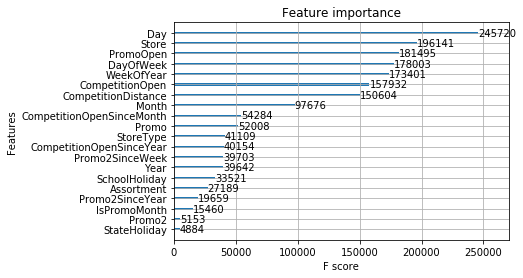

In [46]:
#模型特征重要性
xgb.plot_importance(gbm)

In [47]:
# - 从模型特征重要性分析，比较重要的特征有四类包括1.周期性特征'Day'，'DayOfWeek'，'WeekOfYera'，'Month'等，可见店铺的销售额与时间是息息相关的，尤其是周期较短的时间特征；
# - 2.店铺差异'Store'和'StoreTyp'特征，不同店铺的销售额存在特异性；
# - 3.短期促销（Promo)情况:'PromoOpen'和'Promo'特征，促销时间的长短与营业额相关性比较大；
# - 4.竞争对手相关特征包括：'CompetitionOpen'，‘CompetitionDistance'，'CompetitionOpenSinceMoth'以及'CompetitionOpenScinceyear'，竞争者的距离与营业年限对销售额有影响。
# - 作用不大的特征主要两类包括：1.假期特征：'SchoolHoliday'和'StateHoliday'，假期对销售额影响不大，有可能是假期店铺大多不营业，对模型预测没有太大帮助。2.持续促销(Promo2)相关的特征：'Promo2'，'Prom2SinceYear'以及'Prom2SinceWeek'等特征，有可能持续的促销活动对短期的销售额影响有限。

In [48]:
#采用新的权值融合模型构建保留数据集预测结果
res1 = pd.DataFrame(data = ho_ytest)
res1['Prediction']=bagged_ho_preds2
res1 = pd.merge(ho_xtest,res1, left_index= True, right_index=True)
res1['Ratio'] = res1.Prediction/res.Sales
res1['Error'] =abs(res1.Ratio-1)
res1.head()

Store  DayOfWeek  Promo  StateHoliday  SchoolHoliday  StoreType  \
0      1          4      1             0              1          3   
1      1          3      1             0              1          3   
2      1          2      1             0              1          3   
3      1          1      1             0              1          3   
4      1          0      1             0              1          3   

   Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0           1               1270.0                        9.0   
1           1               1270.0                        9.0   
2           1               1270.0                        9.0   
3           1               1270.0                        9.0   
4           1               1270.0                        9.0   

   CompetitionOpenSinceYear    ...     Month  Day  WeekOfYear  \
0                    2008.0    ...         7   31          31   
1                    2008.0    ...         7   30          31   
2                    2008.0    ...         7   29          31   
3                    2008.0    ...         7   28          31   
4                    2008.0    ...         7   27          31   

   CompetitionOpen  PromoOpen  IsPromoMonth     Sales  Prediction     Ratio  \
0             82.0   24187.75             0  8.568646    8.592970  1.002839   
1             82.0   24187.75             0  8.521384    8.520023  0.999840   
2             82.0   24187.75             0  8.472823    8.458242  0.998279   
3             82.0   24187.75             0  8.519590    8.448968  0.991711   
4             82.0   24187.75             0  8.716536    8.560365  0.982083   

      Error  
0  0.002839  
1  0.000160  
2  0.001721  
3  0.008289  
4  0.017917  

[5 rows x 24 columns]

In [49]:
#分析偏差最大的10个预测结果与初始模型差异
res1.sort_values(['Error'],ascending=False,inplace= True)
res['Store_new'] = res1['Store']
res['Error_new'] = res1['Error']
res['Ratio_new'] = res1['Ratio']
col_3 = ['Store','Ratio','Error','Store_new','Ratio_new','Error_new']
com = pd.DataFrame(res,columns = col_3)
com[:10]


Store     Ratio     Error  Store_new  Ratio_new  Error_new
843572    292  1.235678  0.235678        292   1.234547   0.234547
590129    782  1.181846  0.181846        782   1.168798   0.168798
685531    909  1.173372  0.173372        909   1.157299   0.157299
685539    909  0.857764  0.142236        909   0.853990   0.146010
842815    876  0.865537  0.134463        876   0.861162   0.138838
843577    292  1.120908  0.120908        292   1.115333   0.115333
843582    292  0.880069  0.119931        292   0.878579   0.121421
842814    876  0.882011  0.117989        876   0.886210   0.113790
685538    909  0.883586  0.116414        909   0.876918   0.123082
590128    782  1.110833  0.110833        782   1.099782   0.099782